## Project 4 : I will be making a basic version of maze runner game trained on Q-learning algorithm

In [1]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches  # Import Rectangle from patches
class CustomMazeEnv(gym.Env):
    def __init__(self):
        super(CustomMazeEnv, self).__init__()
        self.grid_size = 5
        self.state = None
        self.goal = (4, 4)
        self.walls = [(1, 1), (2, 2), (3, 3)]
        self.action_space = spaces.Discrete(4)  # 0: up, 1: right, 2: down, 3: left
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(2,), dtype=np.int32)
        self.reset()

    def reset(self):
        self.state = (0, 0)
        return np.array(self.state)

    def step(self, action):
        x, y = self.state
        if action == 0 and y < self.grid_size - 1:  # up
            y += 1
        elif action == 1 and x < self.grid_size - 1:  # right
            x += 1
        elif action == 2 and y > 0:  # down
            y -= 1
        elif action == 3 and x > 0:  # left
            x -= 1
        
        if (x, y) in self.walls:
            x, y = self.state  # undo move if it's a wall

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        return np.array(self.state), reward, done, {}

    def render(self, mode='human'):
        fig, ax = plt.subplots()
        ax.set_xticks(np.arange(0.5, self.grid_size, 1))
        ax.set_yticks(np.arange(0.5, self.grid_size, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)
        for wall in self.walls:
            rect = patches.Rectangle(wall, 1, 1, linewidth=1, edgecolor='r', facecolor='gray')
            ax.add_patch(rect)
        goal_rect = patches.Rectangle(self.goal, 1, 1, linewidth=1, edgecolor='g', facecolor='yellow')
        ax.add_patch(goal_rect)
        agent_rect = patches.Rectangle(self.state, 1, 1, linewidth=1, edgecolor='b', facecolor='blue')
        ax.add_patch(agent_rect)
        plt.xlim(0, self.grid_size)
        plt.ylim(0, self.grid_size)
        plt.gca().invert_yaxis()
        plt.show()

In [2]:
from gym.envs.registration import register

register(
    id='CustomMaze-v0',
    entry_point='__main__:CustomMazeEnv',
)

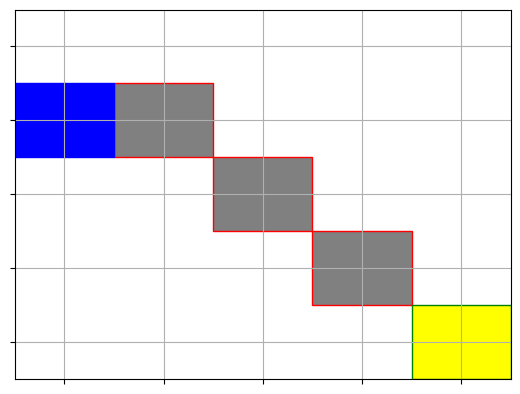

State: [0 1], Reward: -0.1, Done: False


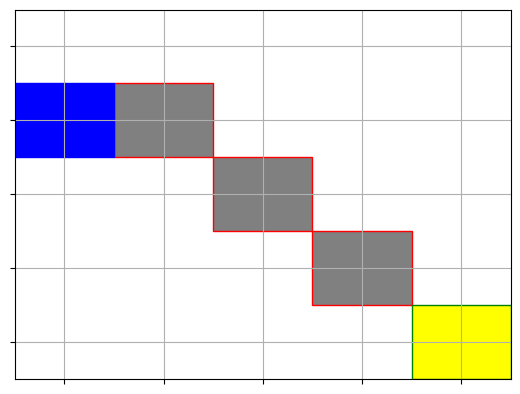

State: [0 1], Reward: -0.1, Done: False


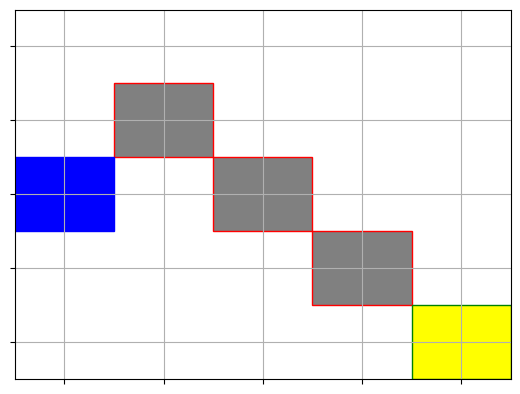

State: [0 2], Reward: -0.1, Done: False


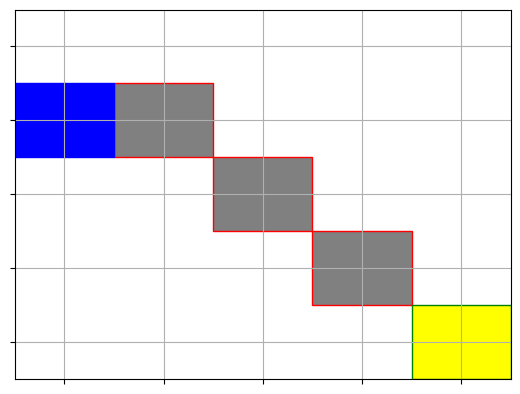

State: [0 1], Reward: -0.1, Done: False


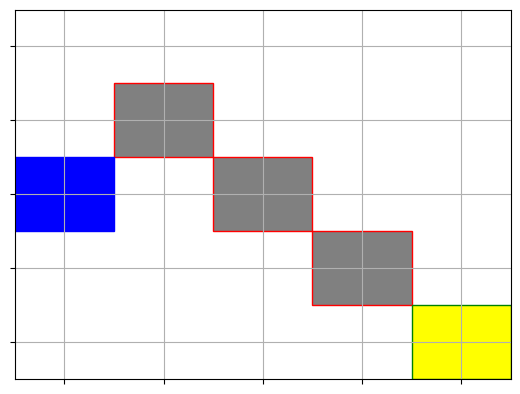

State: [0 2], Reward: -0.1, Done: False


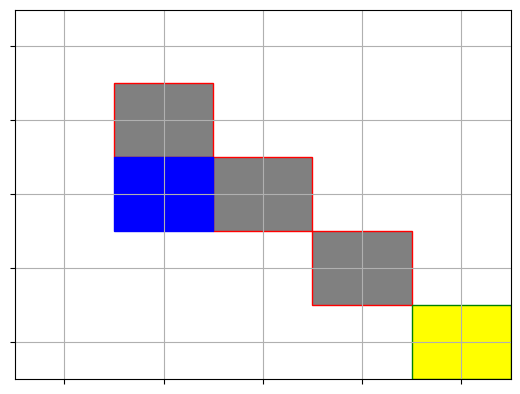

State: [1 2], Reward: -0.1, Done: False


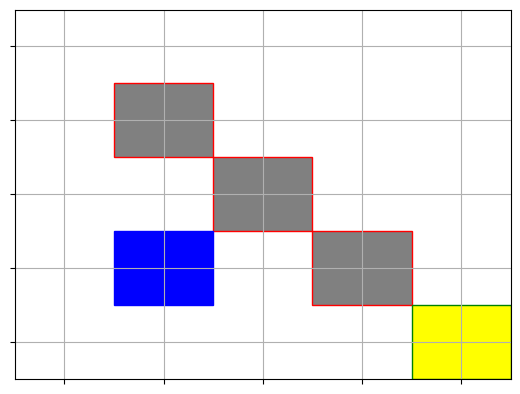

State: [1 3], Reward: -0.1, Done: False


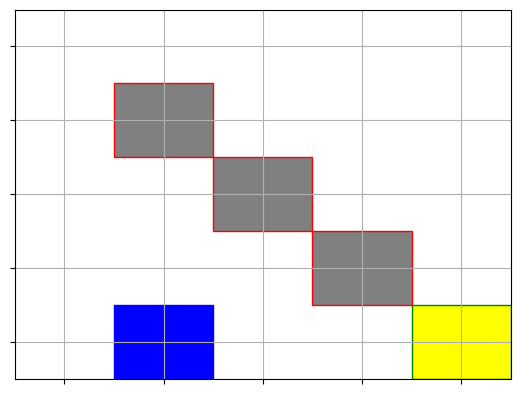

State: [1 4], Reward: -0.1, Done: False


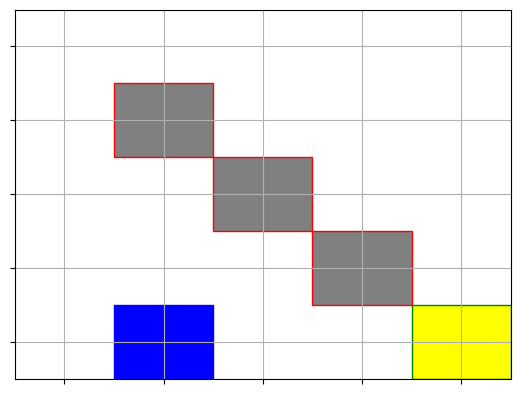

State: [1 4], Reward: -0.1, Done: False


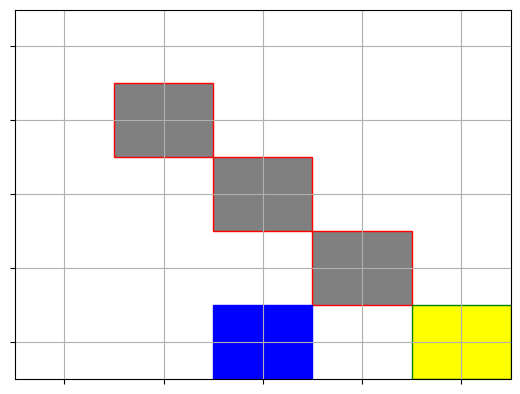

State: [2 4], Reward: -0.1, Done: False


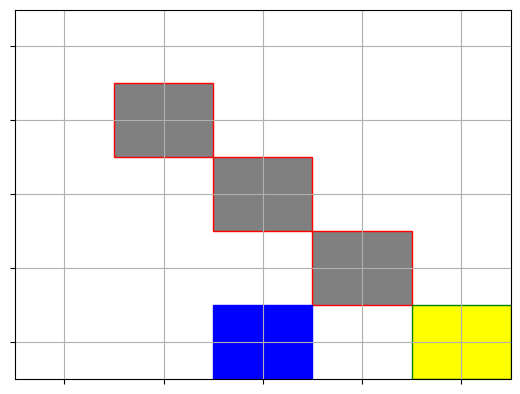

State: [2 4], Reward: -0.1, Done: False


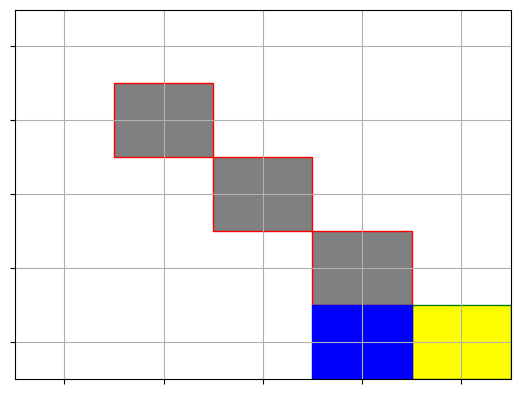

State: [3 4], Reward: -0.1, Done: False


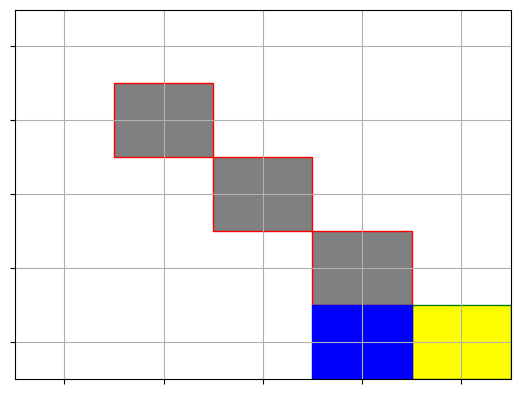

State: [3 4], Reward: -0.1, Done: False


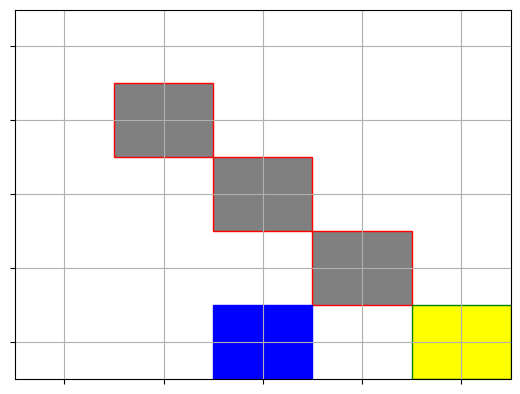

State: [2 4], Reward: -0.1, Done: False


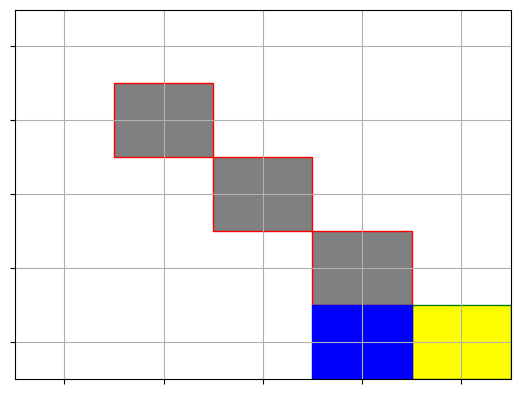

State: [3 4], Reward: -0.1, Done: False


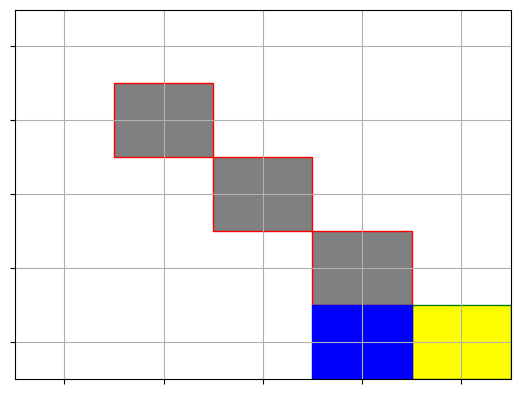

State: [3 4], Reward: -0.1, Done: False


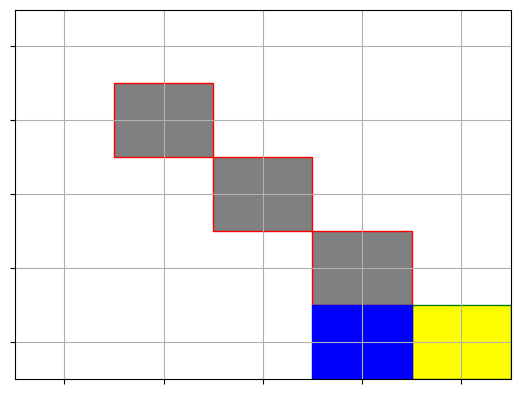

State: [3 4], Reward: -0.1, Done: False


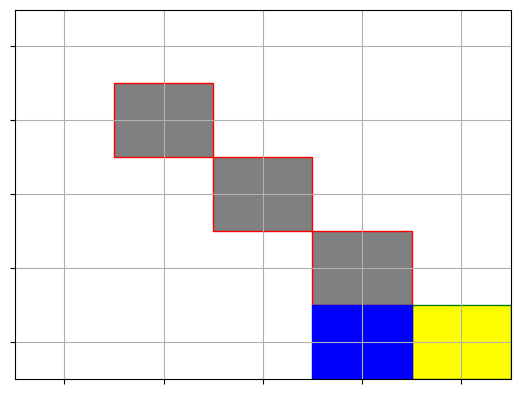

State: [3 4], Reward: -0.1, Done: False


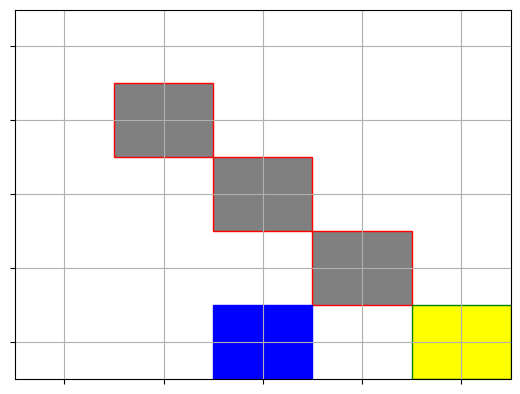

State: [2 4], Reward: -0.1, Done: False


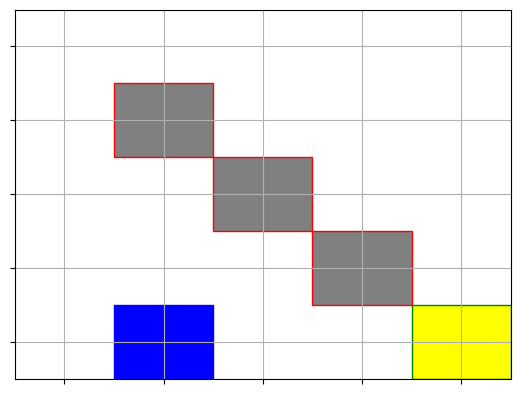

State: [1 4], Reward: -0.1, Done: False


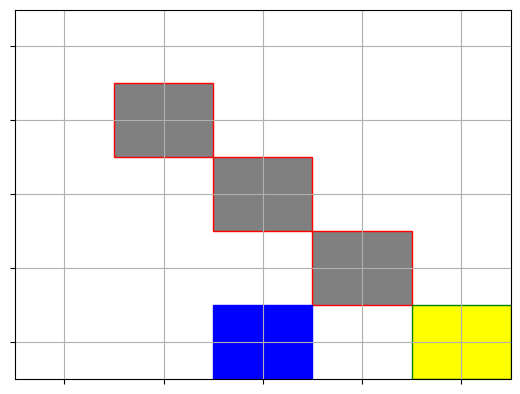

State: [2 4], Reward: -0.1, Done: False


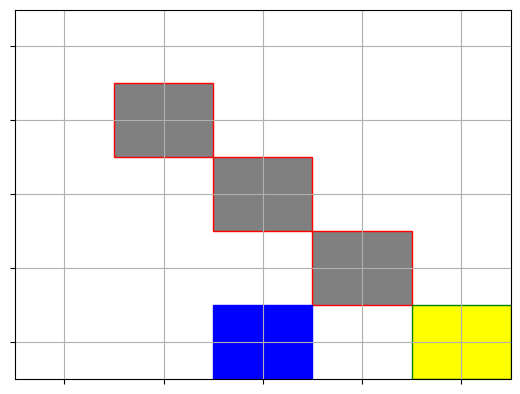

State: [2 4], Reward: -0.1, Done: False


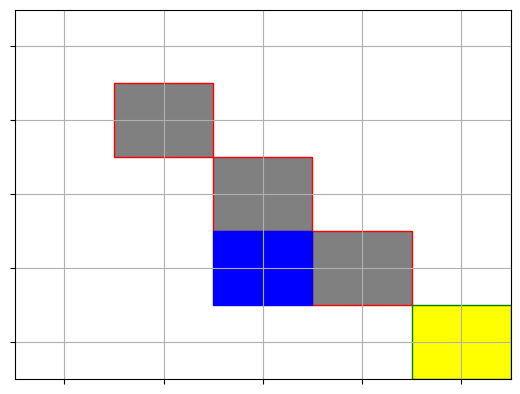

State: [2 3], Reward: -0.1, Done: False


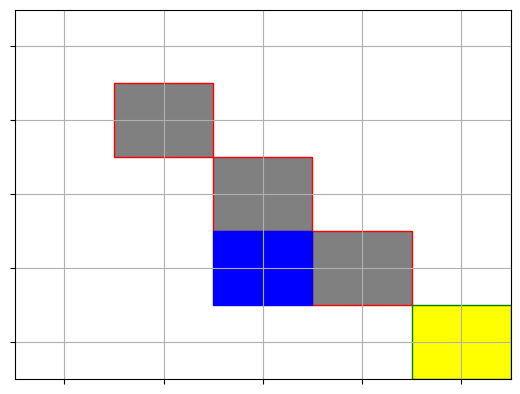

State: [2 3], Reward: -0.1, Done: False


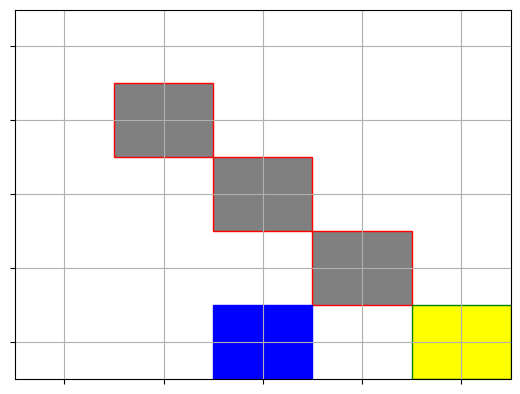

State: [2 4], Reward: -0.1, Done: False


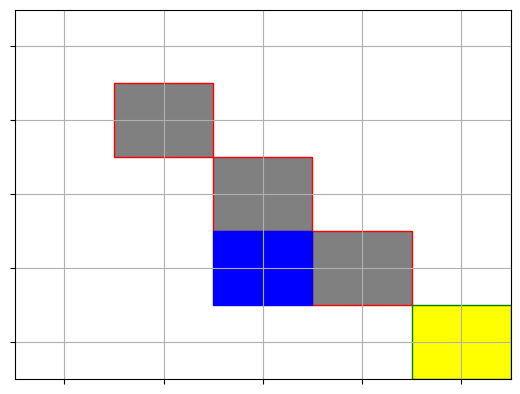

State: [2 3], Reward: -0.1, Done: False


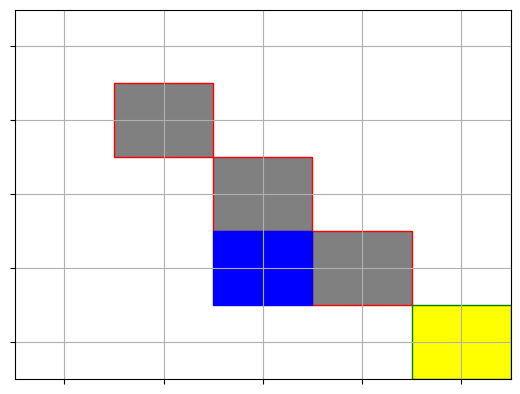

State: [2 3], Reward: -0.1, Done: False


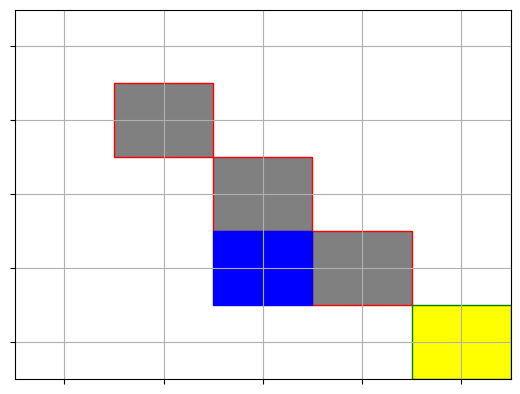

State: [2 3], Reward: -0.1, Done: False


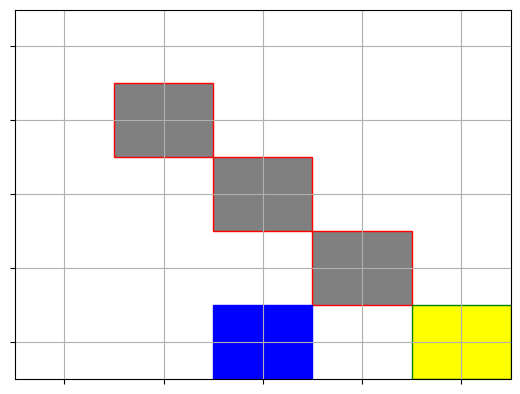

State: [2 4], Reward: -0.1, Done: False


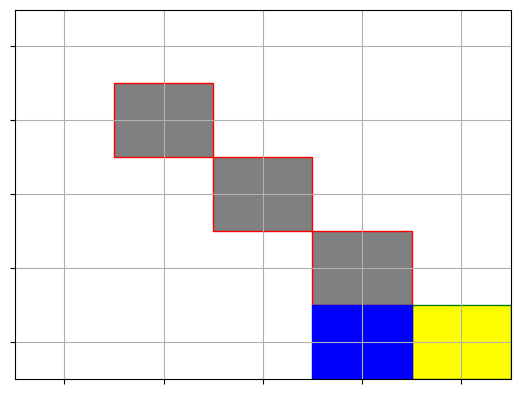

State: [3 4], Reward: -0.1, Done: False


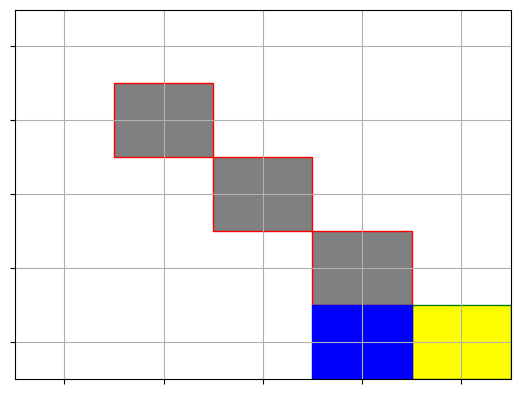

State: [3 4], Reward: -0.1, Done: False


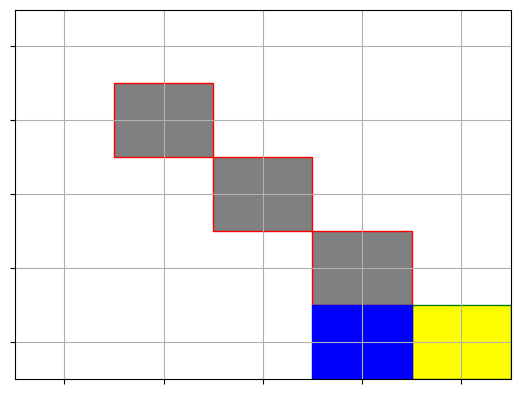

State: [3 4], Reward: -0.1, Done: False


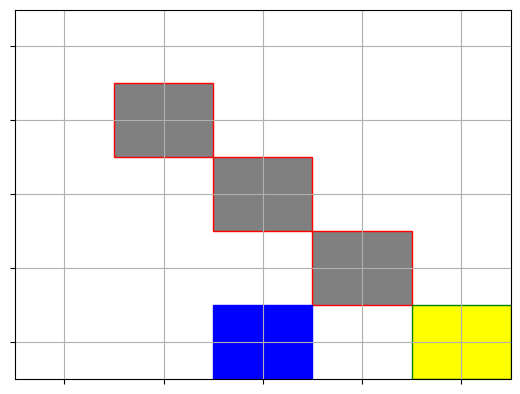

State: [2 4], Reward: -0.1, Done: False


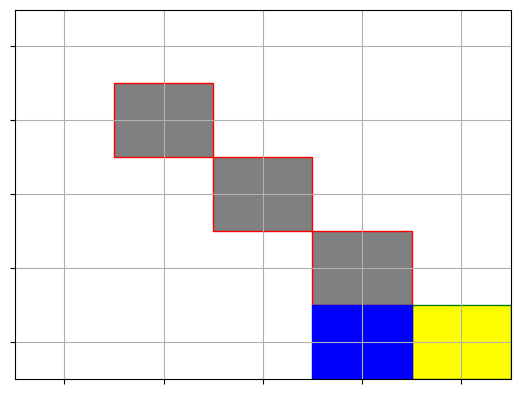

State: [3 4], Reward: -0.1, Done: False


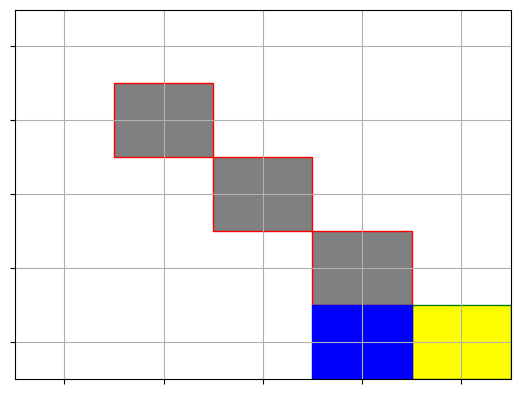

State: [3 4], Reward: -0.1, Done: False


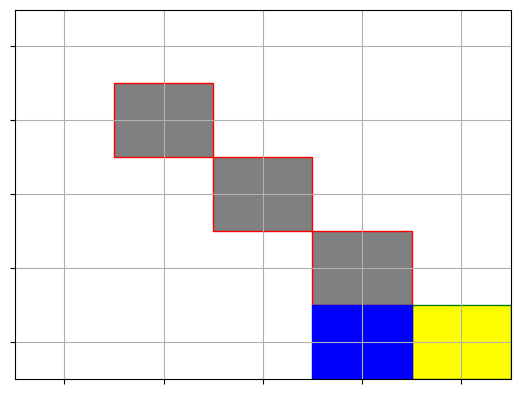

State: [3 4], Reward: -0.1, Done: False


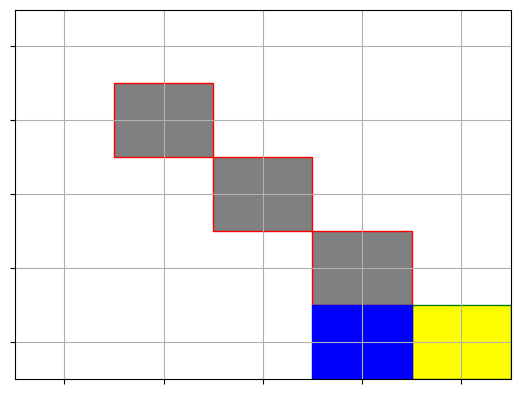

State: [3 4], Reward: -0.1, Done: False


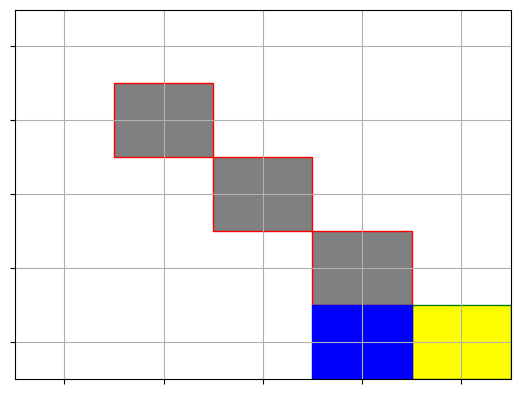

State: [3 4], Reward: -0.1, Done: False


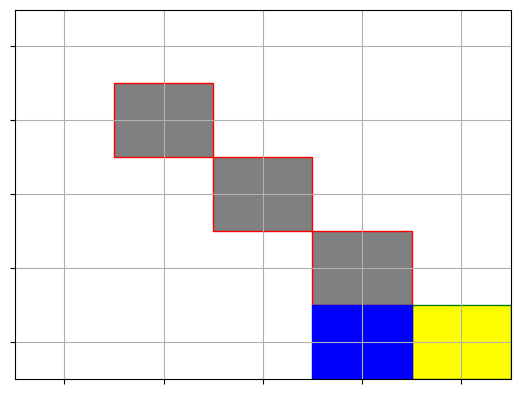

State: [3 4], Reward: -0.1, Done: False


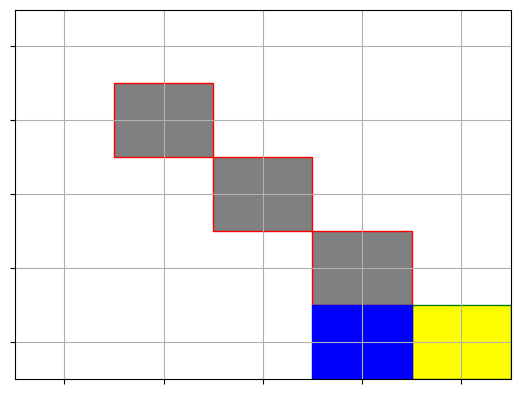

State: [3 4], Reward: -0.1, Done: False


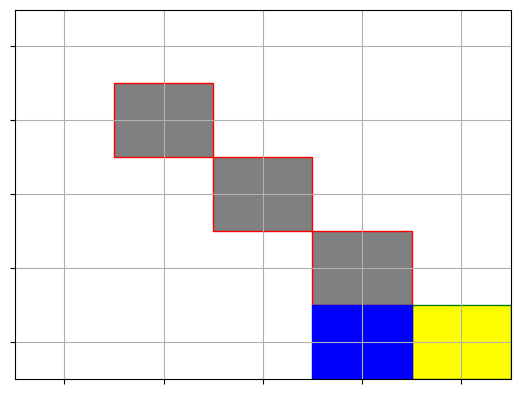

State: [3 4], Reward: -0.1, Done: False


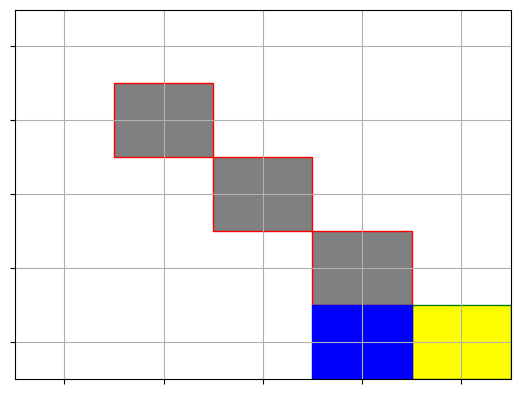

State: [3 4], Reward: -0.1, Done: False


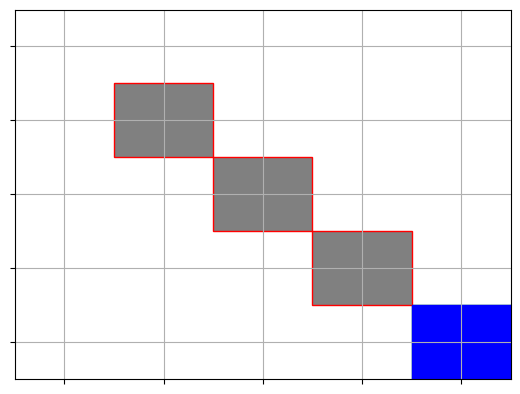

State: [4 4], Reward: 1, Done: True


In [3]:
env = gym.make('CustomMaze-v0')
env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Take random action
    state, reward, done, _ = env.step(action)
    env.render()
    print(f"State: {state}, Reward: {reward}, Done: {done}")


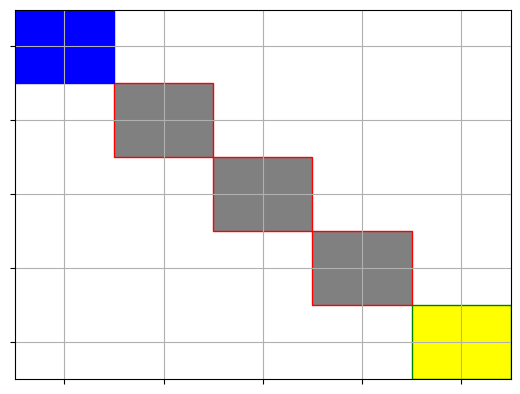

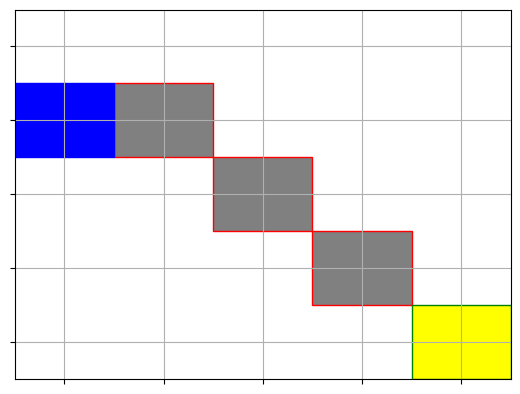

State: [0 1], Reward: -0.1, Done: False


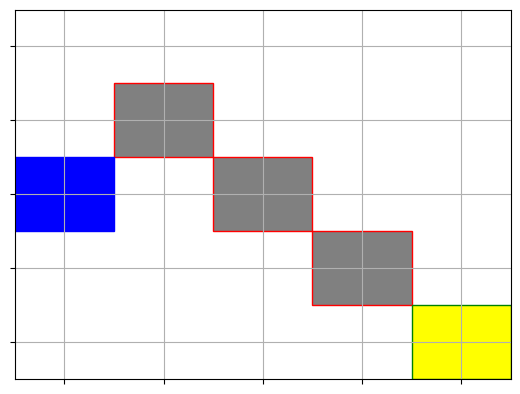

State: [0 2], Reward: -0.1, Done: False


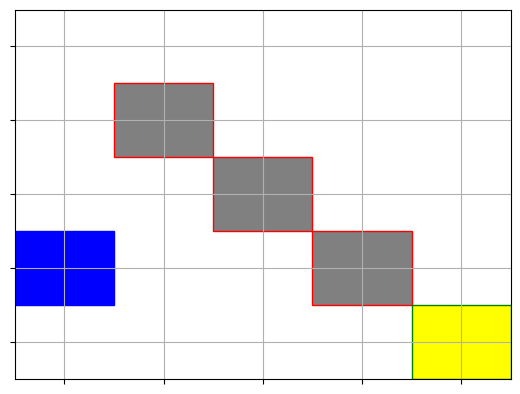

State: [0 3], Reward: -0.1, Done: False


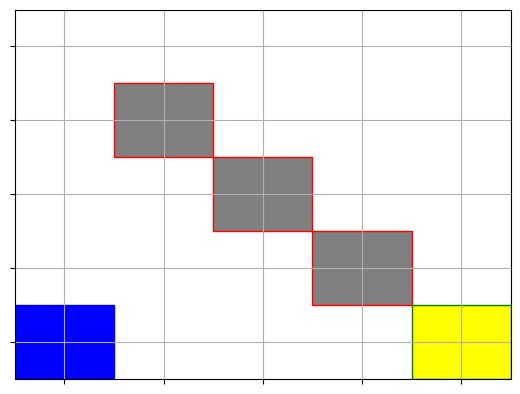

State: [0 4], Reward: -0.1, Done: False


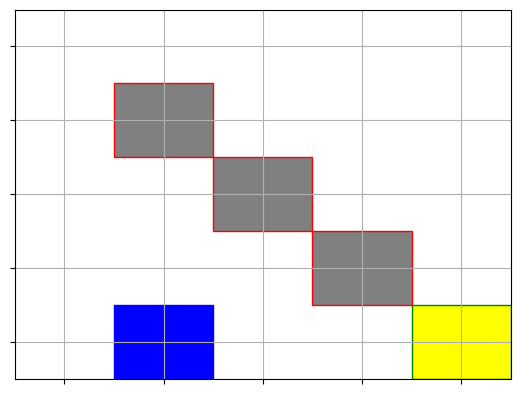

State: [1 4], Reward: -0.1, Done: False


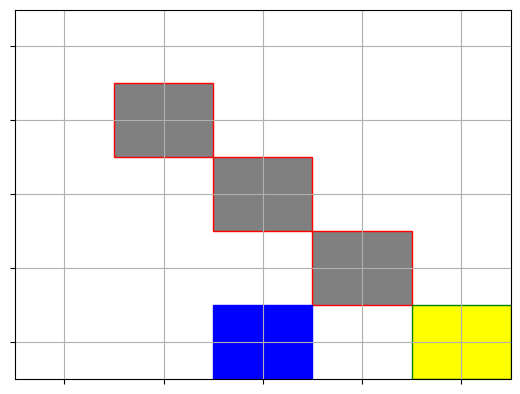

State: [2 4], Reward: -0.1, Done: False


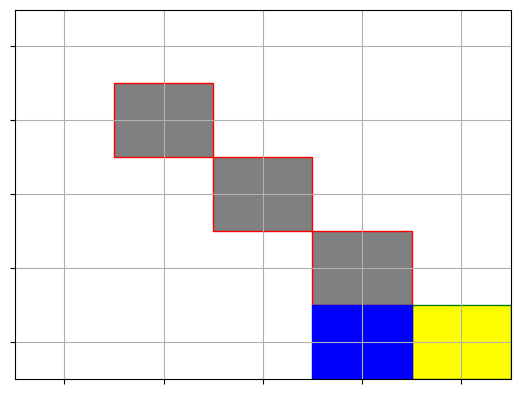

State: [3 4], Reward: -0.1, Done: False


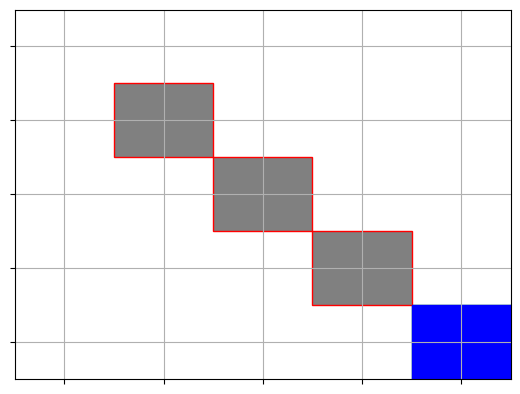

State: [4 4], Reward: 1, Done: True


In [4]:
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
q_table = np.zeros((env.grid_size, env.grid_size, env.action_space.n))
rewards = []
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state[0], state[1], :])
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state[0], next_state[1], :])
    td_target = reward + gamma * q_table[next_state[0], next_state[1], best_next_action]
    td_error = td_target - q_table[state[0], state[1], action]
    q_table[state[0], state[1], action] += alpha * td_error
episodes = 1000
for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    rewards.append(total_reward)
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# Evaluate the trained astate = env.reset()
done = False
env.render()
while not done:
    action = np.argmax(q_table[state[0], state[1], :])
    state, reward, done, _ = env.step(action)
    env.render()
    print(f"State: {state}, Reward: {reward}, Done: {done}")


### Evaluation

In [5]:
def evaluate_agent(q_table, episodes=100):
    success_count = 0
    for _ in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = np.argmax(q_table[state[0], state[1], :])
            state, reward, done, _ = env.step(action)
            if done and reward > 0:
                success_count += 1
    success_rate = success_count / episodes
    return success_rate

success_rate = evaluate_agent(q_table, episodes=100)
print(f"Success rate over 100 episodes: {success_rate * 100}%")


Success rate over 100 episodes: 100.0%


# Q-learning-agent performance

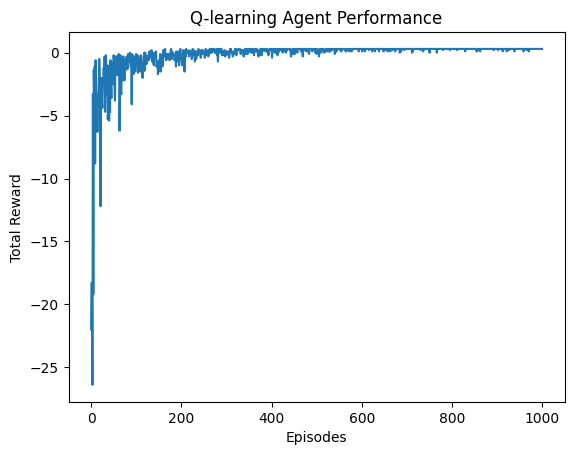

In [6]:
plt.plot(range(episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-learning Agent Performance')
plt.show()

## Experimenting with different hyperparameters

In [7]:
alpha_values = [0.1, 0.5, 0.9]
gamma_values = [0.5, 0.99]
epsilon_values = [1.0, 0.5]
for alpha in alpha_values:
    for gamma in gamma_values:
        for epsilon in epsilon_values:
            q_table = np.zeros((env.grid_size, env.grid_size, env.action_space.n))
            epsilon_min = 0.01
            epsilon_decay = 0.995
            for episode in range(1000):
                state = env.reset()
                done = False
                while not done:
                    action = choose_action(state)
                    next_state, reward, done, _ = env.step(action)
                    update_q_table(state, action, reward, next_state)
                    state = next_state
                if epsilon > epsilon_min:
                    epsilon *= epsilon_decay
            success_rate = evaluate_agent(q_table, episodes=100)
            print(f"Alpha: {alpha}, Gamma: {gamma}, Epsilon: {epsilon}, Success Rate: {success_rate * 100}%")


Alpha: 0.1, Gamma: 0.5, Epsilon: 0.00998645168764533, Success Rate: 100.0%
Alpha: 0.1, Gamma: 0.5, Epsilon: 0.009972316801240002, Success Rate: 100.0%
Alpha: 0.1, Gamma: 0.99, Epsilon: 0.00998645168764533, Success Rate: 100.0%
Alpha: 0.1, Gamma: 0.99, Epsilon: 0.009972316801240002, Success Rate: 100.0%
Alpha: 0.5, Gamma: 0.5, Epsilon: 0.00998645168764533, Success Rate: 100.0%
Alpha: 0.5, Gamma: 0.5, Epsilon: 0.009972316801240002, Success Rate: 100.0%
Alpha: 0.5, Gamma: 0.99, Epsilon: 0.00998645168764533, Success Rate: 100.0%
Alpha: 0.5, Gamma: 0.99, Epsilon: 0.009972316801240002, Success Rate: 100.0%
Alpha: 0.9, Gamma: 0.5, Epsilon: 0.00998645168764533, Success Rate: 100.0%
Alpha: 0.9, Gamma: 0.5, Epsilon: 0.009972316801240002, Success Rate: 100.0%
Alpha: 0.9, Gamma: 0.99, Epsilon: 0.00998645168764533, Success Rate: 100.0%
Alpha: 0.9, Gamma: 0.99, Epsilon: 0.009972316801240002, Success Rate: 100.0%


## A method to test

State: [0 1], Action: 0, Reward: -0.1, Done: False


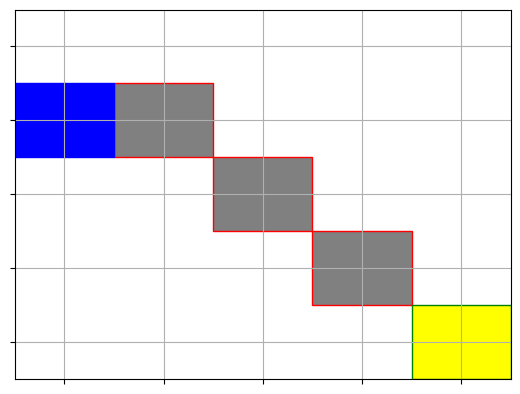

State: [0 0], Action: 2, Reward: -0.1, Done: False


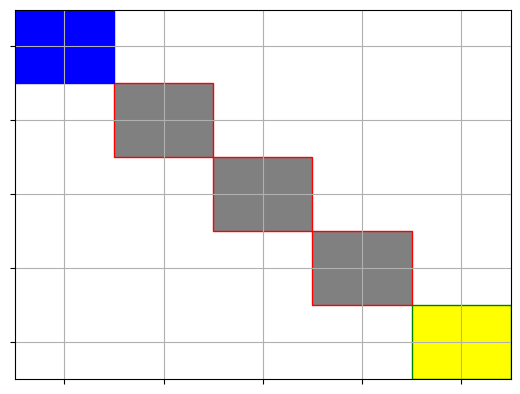

State: [1 0], Action: 1, Reward: -0.1, Done: False


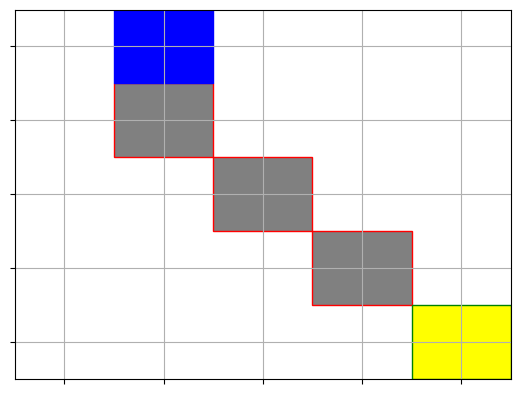

State: [1 0], Action: 0, Reward: -0.1, Done: False


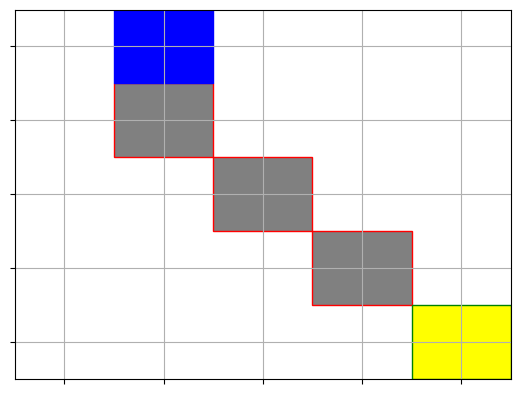

State: [1 0], Action: 2, Reward: -0.1, Done: False


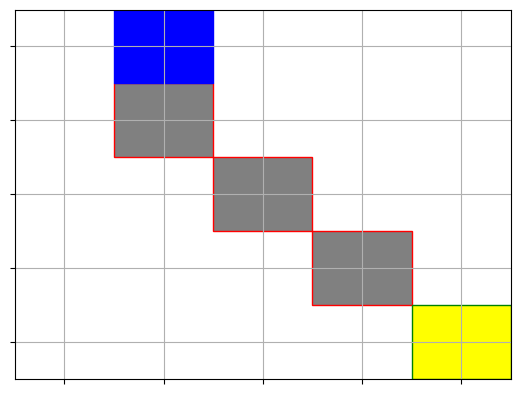

State: [0 0], Action: 3, Reward: -0.1, Done: False


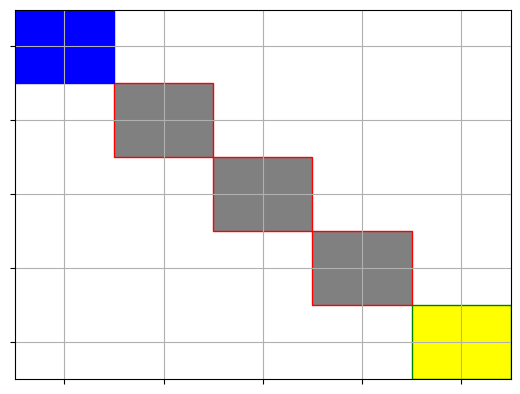

State: [0 0], Action: 3, Reward: -0.1, Done: False


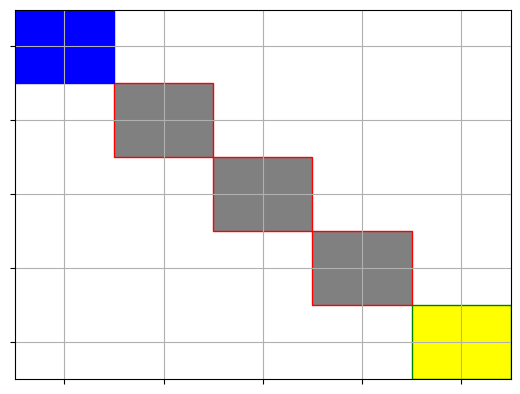

State: [0 1], Action: 0, Reward: -0.1, Done: False


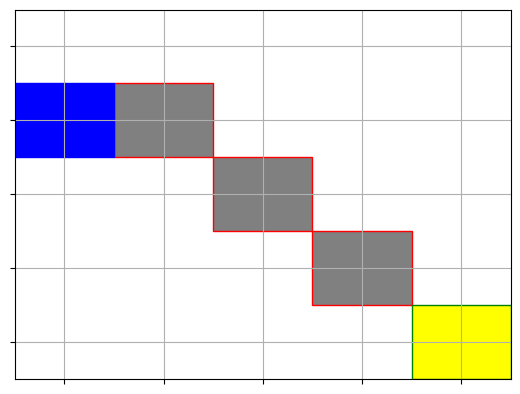

State: [0 1], Action: 3, Reward: -0.1, Done: False


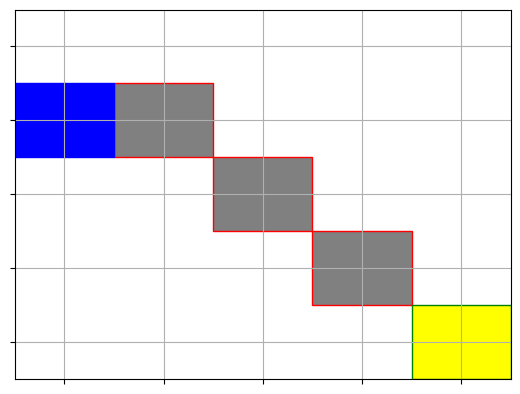

State: [0 0], Action: 2, Reward: -0.1, Done: False


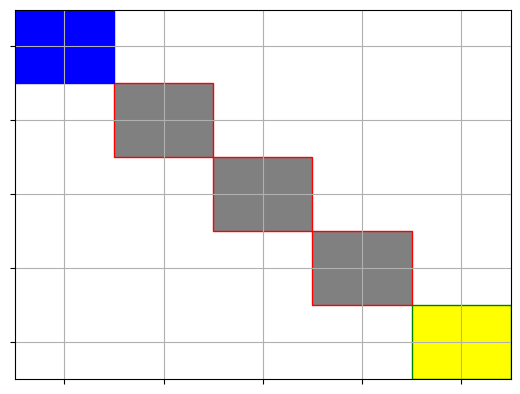

State: [0 0], Action: 3, Reward: -0.1, Done: False


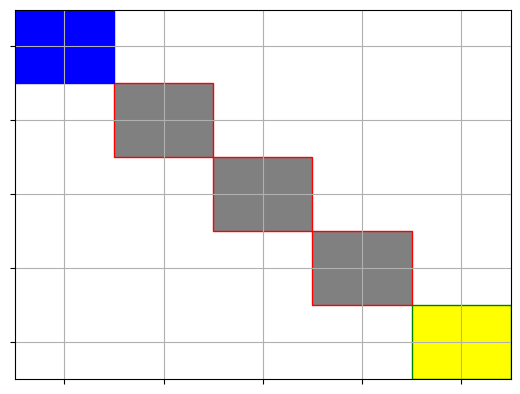

State: [0 0], Action: 3, Reward: -0.1, Done: False


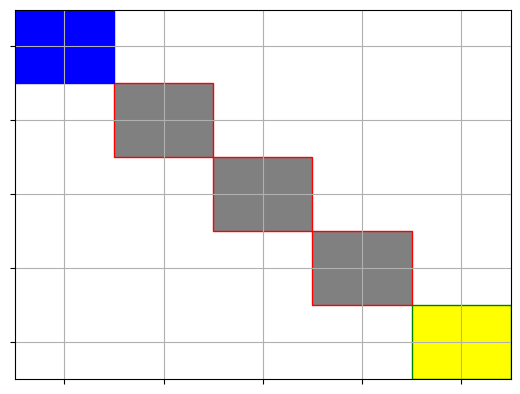

State: [0 0], Action: 2, Reward: -0.1, Done: False


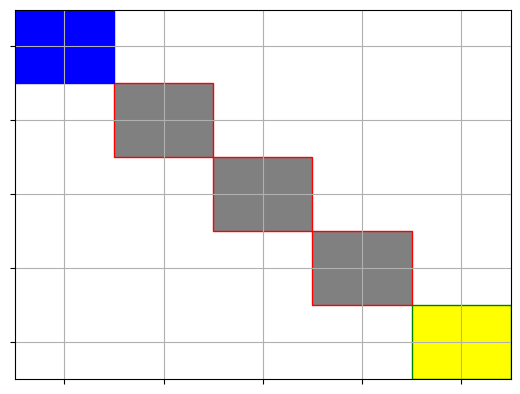

State: [0 0], Action: 2, Reward: -0.1, Done: False


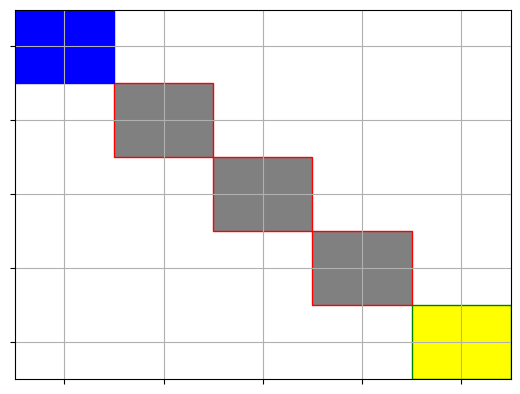

State: [0 0], Action: 2, Reward: -0.1, Done: False


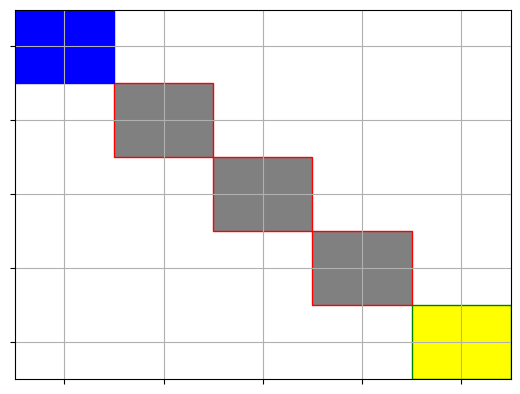

State: [0 1], Action: 0, Reward: -0.1, Done: False


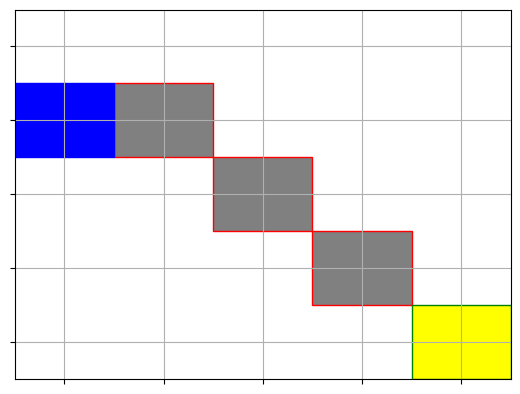

State: [0 1], Action: 1, Reward: -0.1, Done: False


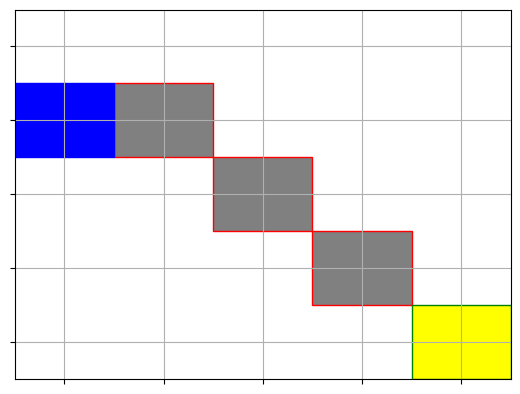

State: [0 2], Action: 0, Reward: -0.1, Done: False


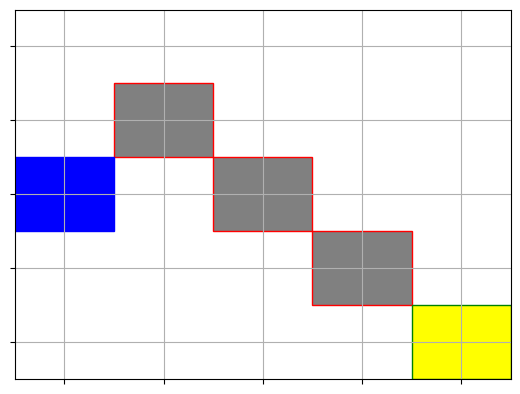

State: [0 2], Action: 3, Reward: -0.1, Done: False


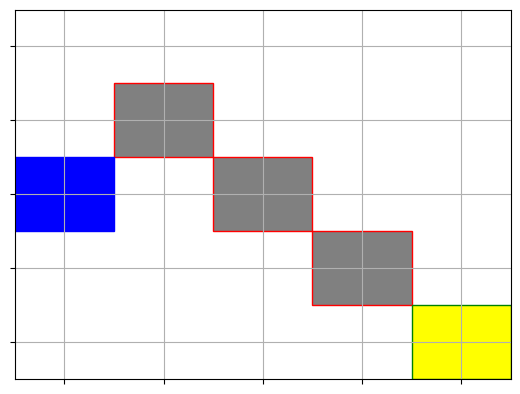

State: [0 1], Action: 2, Reward: -0.1, Done: False


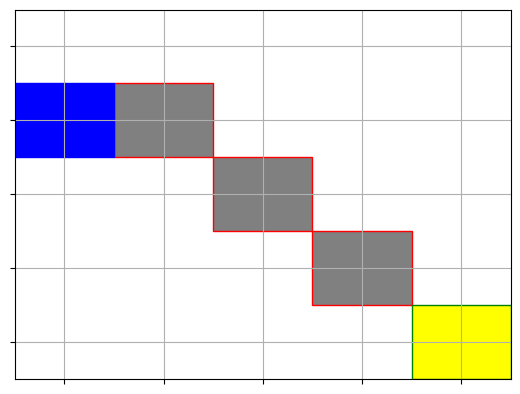

State: [0 0], Action: 2, Reward: -0.1, Done: False


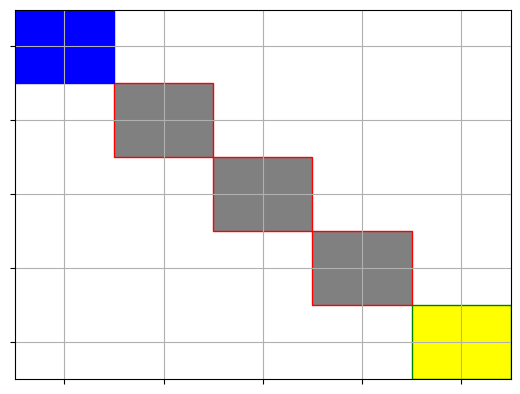

State: [0 0], Action: 3, Reward: -0.1, Done: False


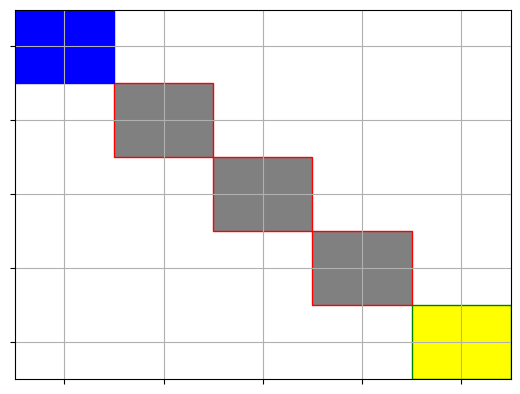

State: [0 0], Action: 2, Reward: -0.1, Done: False


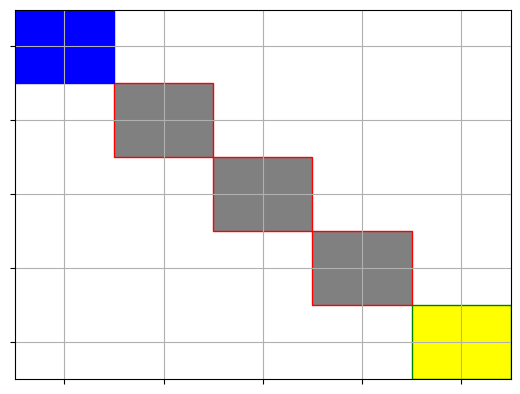

State: [0 0], Action: 3, Reward: -0.1, Done: False


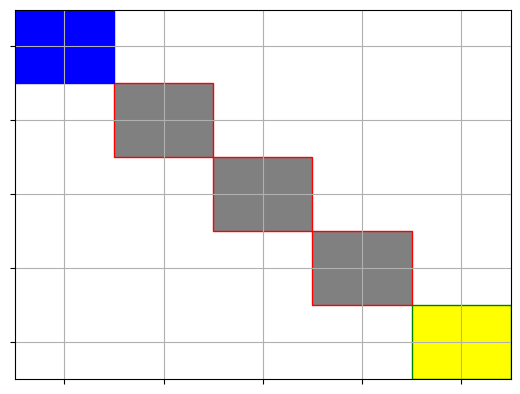

State: [0 0], Action: 2, Reward: -0.1, Done: False


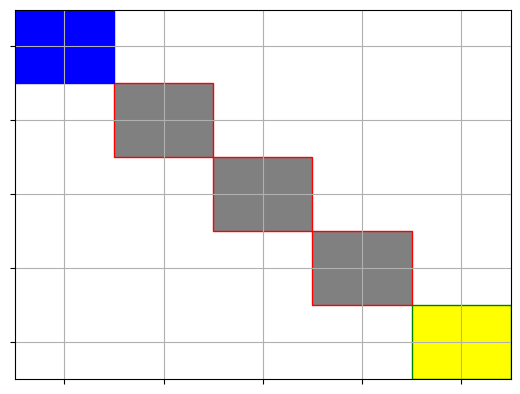

State: [1 0], Action: 1, Reward: -0.1, Done: False


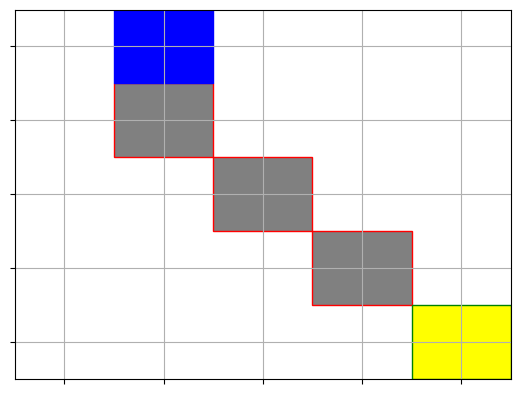

State: [0 0], Action: 3, Reward: -0.1, Done: False


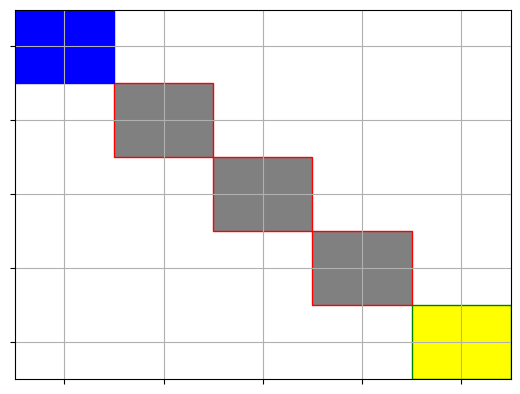

State: [0 0], Action: 2, Reward: -0.1, Done: False


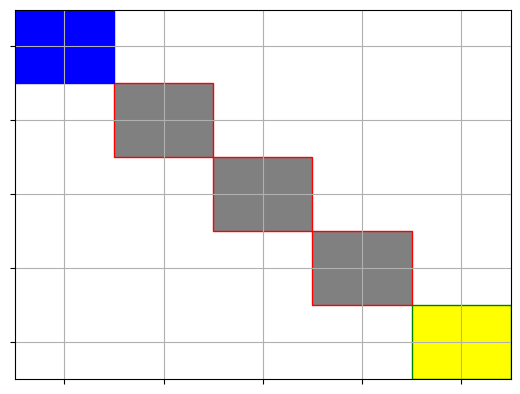

State: [0 1], Action: 0, Reward: -0.1, Done: False


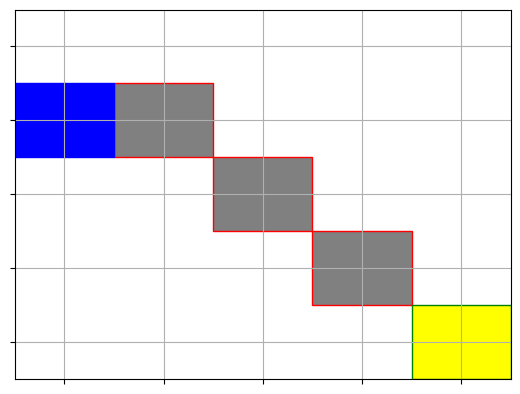

State: [0 1], Action: 3, Reward: -0.1, Done: False


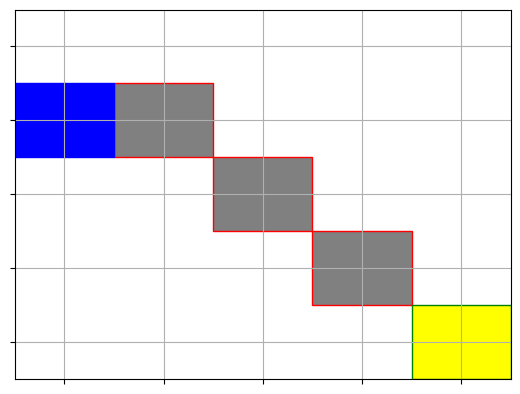

State: [0 1], Action: 1, Reward: -0.1, Done: False


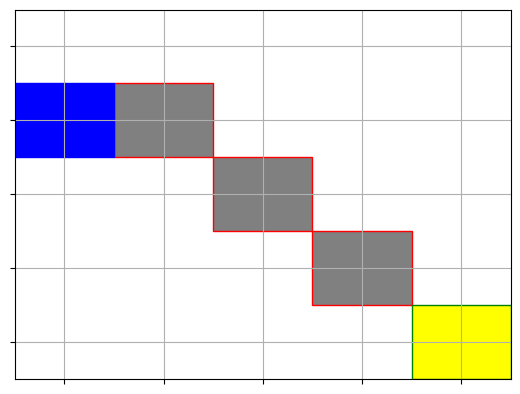

State: [0 2], Action: 0, Reward: -0.1, Done: False


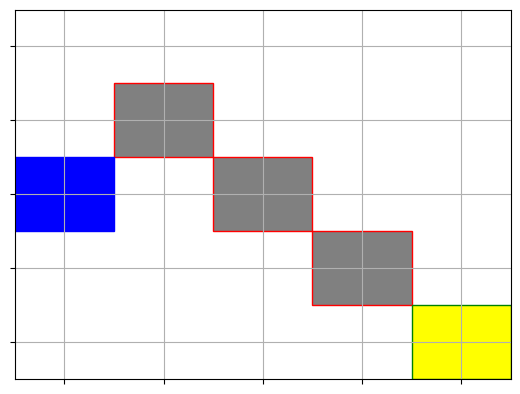

State: [0 2], Action: 3, Reward: -0.1, Done: False


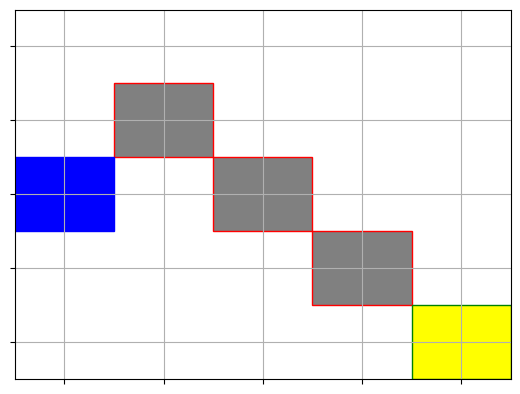

State: [0 3], Action: 0, Reward: -0.1, Done: False


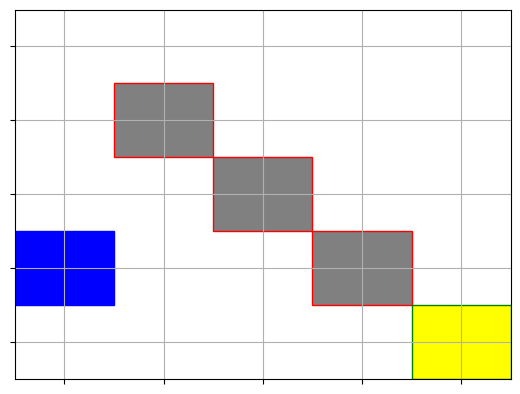

State: [0 4], Action: 0, Reward: -0.1, Done: False


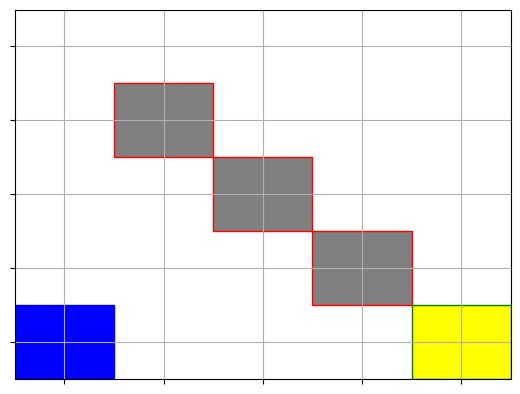

State: [0 4], Action: 3, Reward: -0.1, Done: False


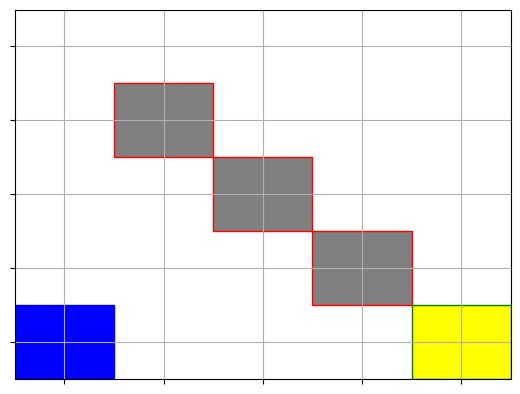

State: [0 3], Action: 2, Reward: -0.1, Done: False


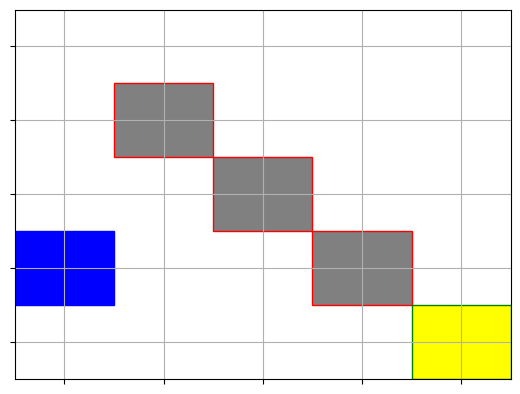

State: [1 3], Action: 1, Reward: -0.1, Done: False


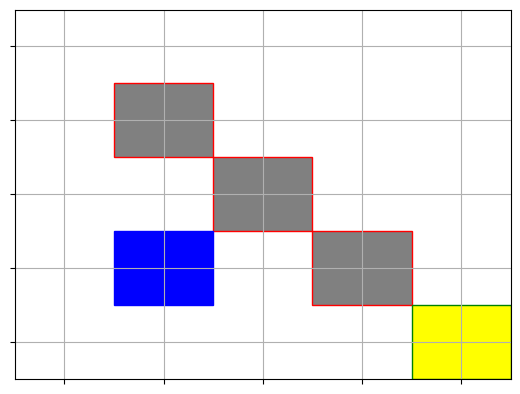

State: [0 3], Action: 3, Reward: -0.1, Done: False


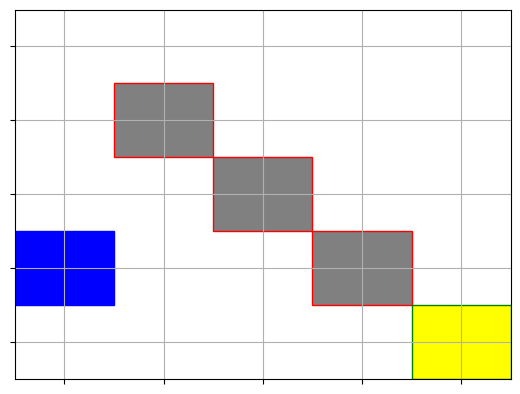

State: [0 2], Action: 2, Reward: -0.1, Done: False


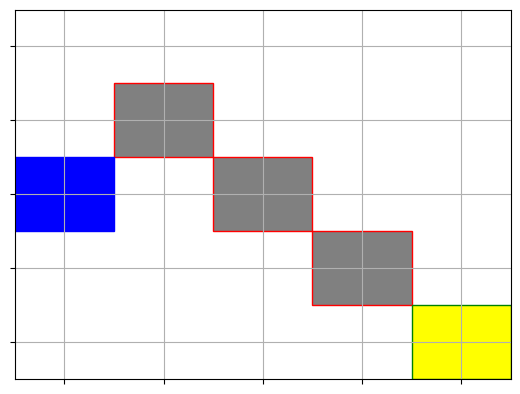

State: [1 2], Action: 1, Reward: -0.1, Done: False


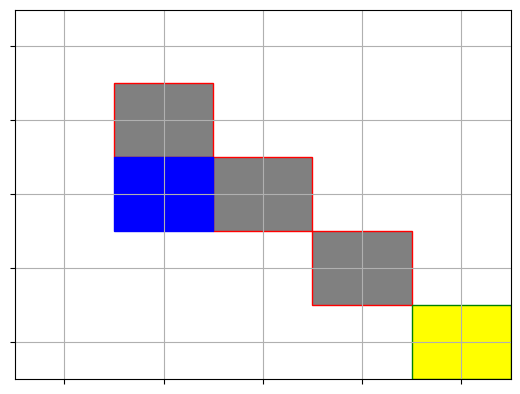

State: [1 3], Action: 0, Reward: -0.1, Done: False


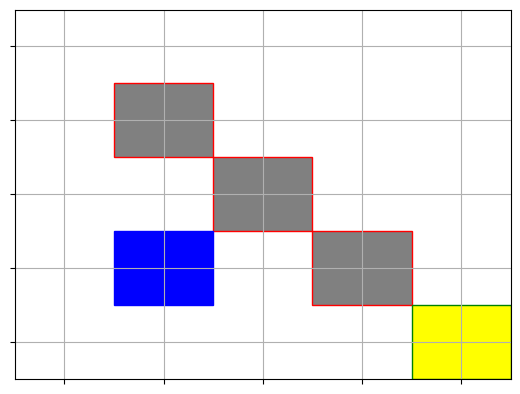

State: [0 3], Action: 3, Reward: -0.1, Done: False


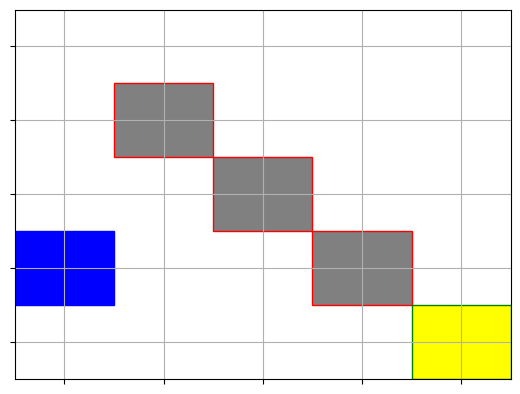

State: [0 3], Action: 3, Reward: -0.1, Done: False


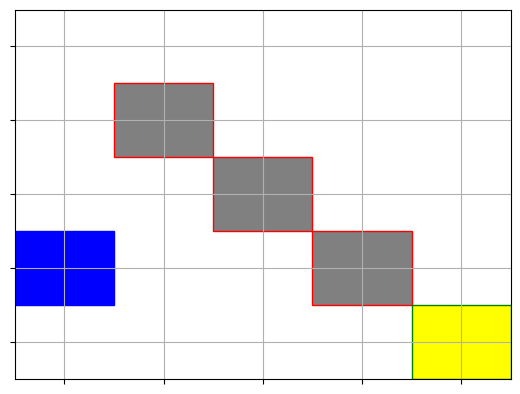

State: [0 4], Action: 0, Reward: -0.1, Done: False


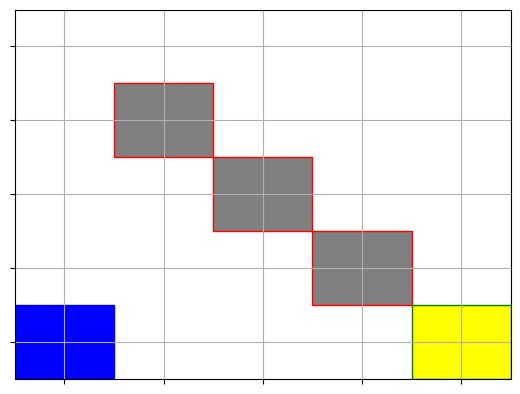

State: [0 4], Action: 3, Reward: -0.1, Done: False


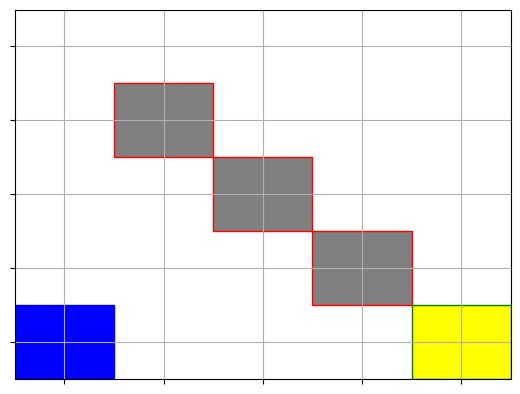

State: [1 4], Action: 1, Reward: -0.1, Done: False


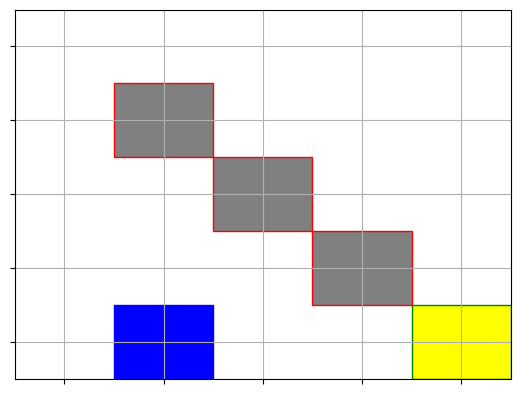

State: [1 4], Action: 0, Reward: -0.1, Done: False


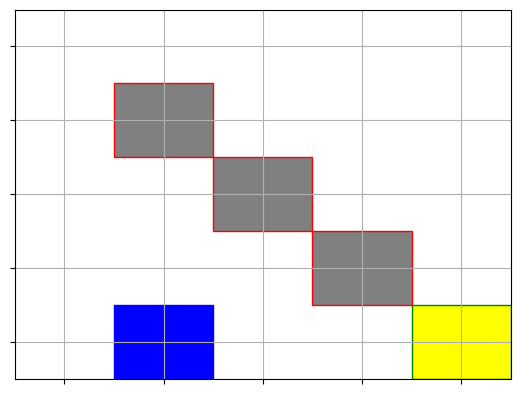

State: [0 4], Action: 3, Reward: -0.1, Done: False


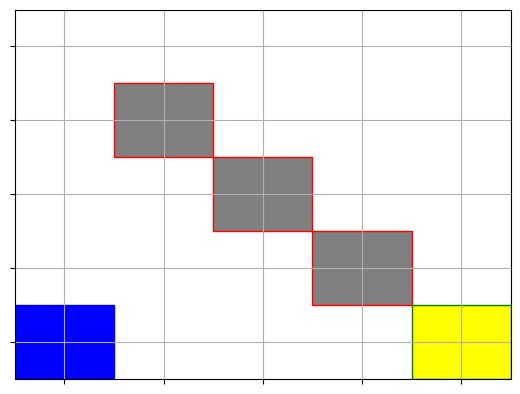

State: [1 4], Action: 1, Reward: -0.1, Done: False


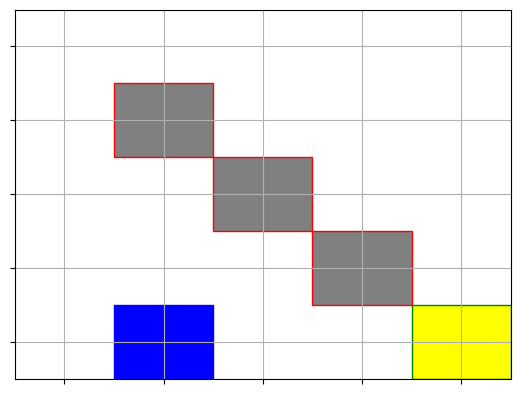

State: [1 3], Action: 2, Reward: -0.1, Done: False


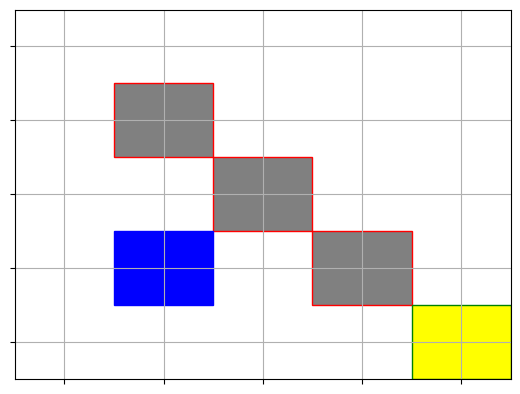

State: [1 2], Action: 2, Reward: -0.1, Done: False


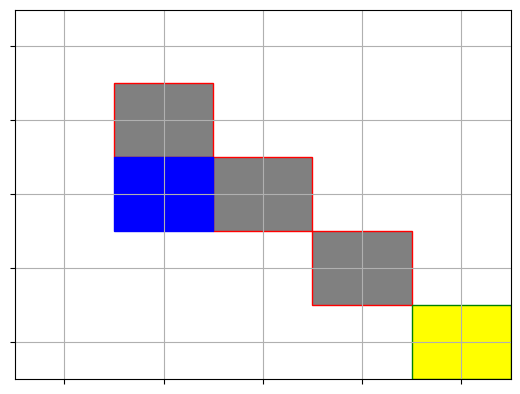

State: [0 2], Action: 3, Reward: -0.1, Done: False


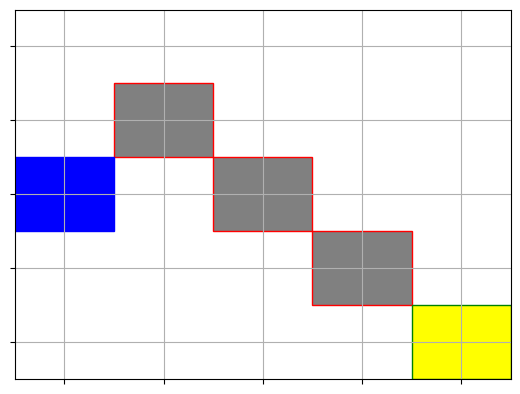

State: [0 2], Action: 3, Reward: -0.1, Done: False


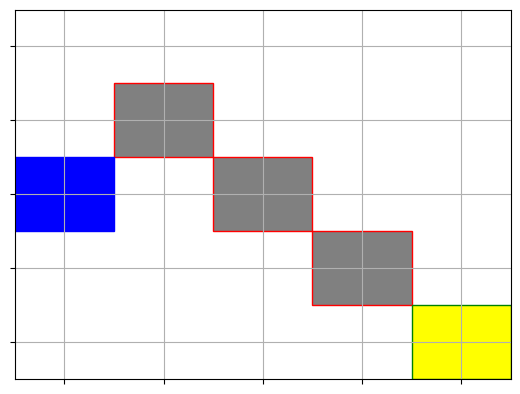

State: [0 2], Action: 3, Reward: -0.1, Done: False


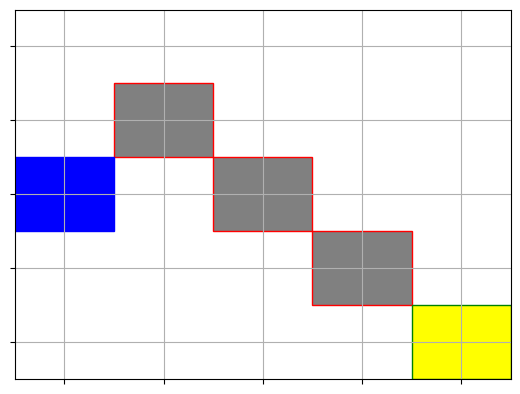

State: [0 3], Action: 0, Reward: -0.1, Done: False


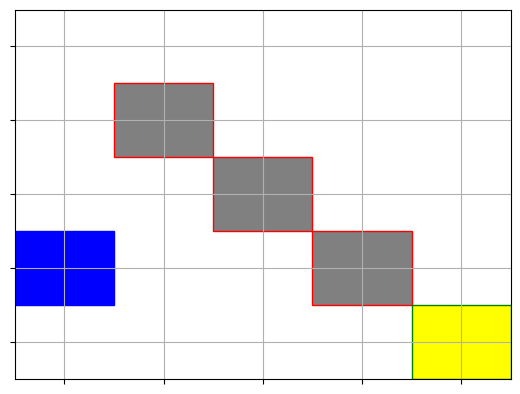

State: [0 2], Action: 2, Reward: -0.1, Done: False


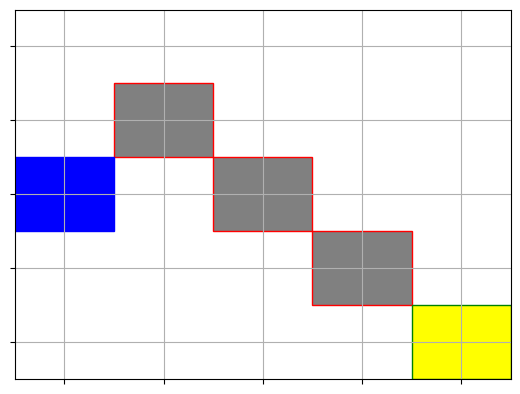

State: [1 2], Action: 1, Reward: -0.1, Done: False


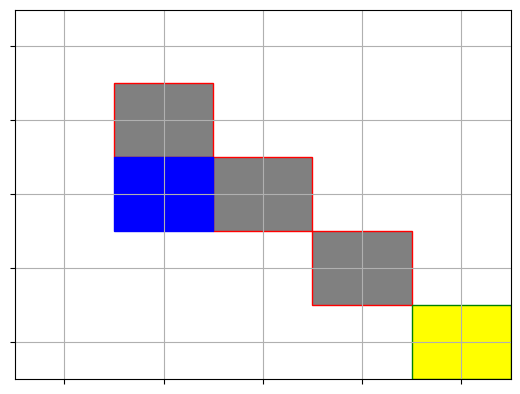

State: [1 2], Action: 1, Reward: -0.1, Done: False


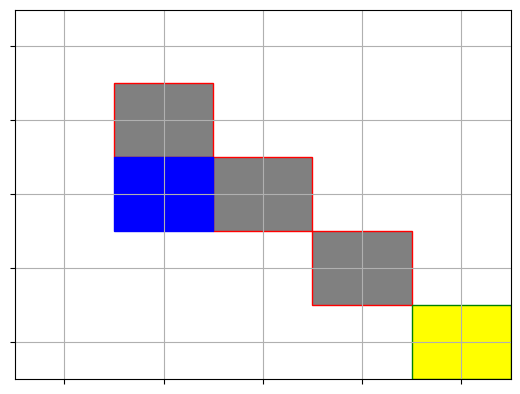

State: [1 2], Action: 1, Reward: -0.1, Done: False


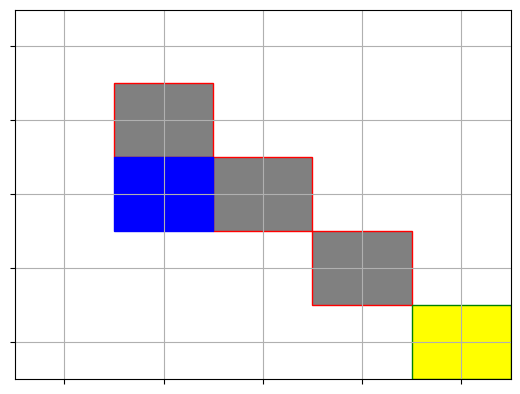

State: [1 3], Action: 0, Reward: -0.1, Done: False


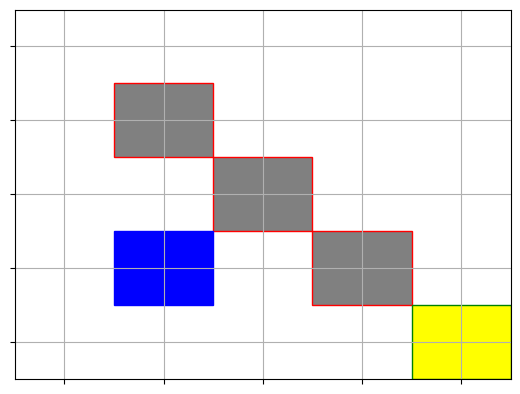

State: [0 3], Action: 3, Reward: -0.1, Done: False


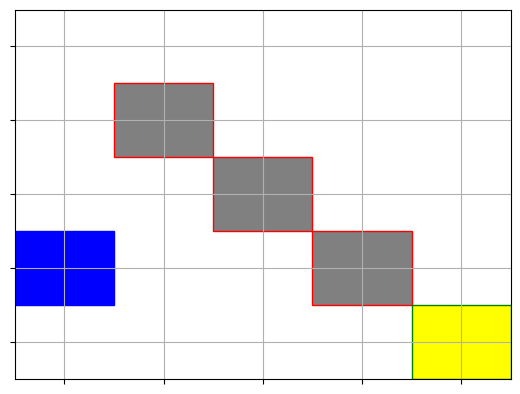

State: [0 3], Action: 3, Reward: -0.1, Done: False


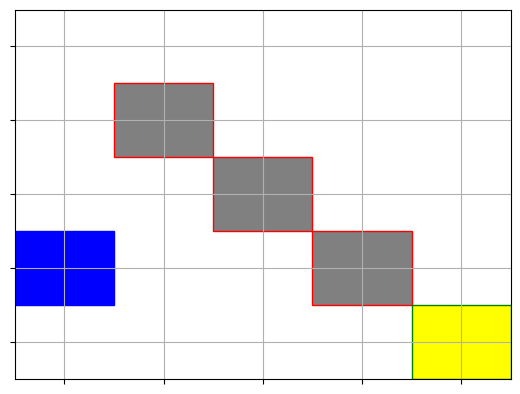

State: [1 3], Action: 1, Reward: -0.1, Done: False


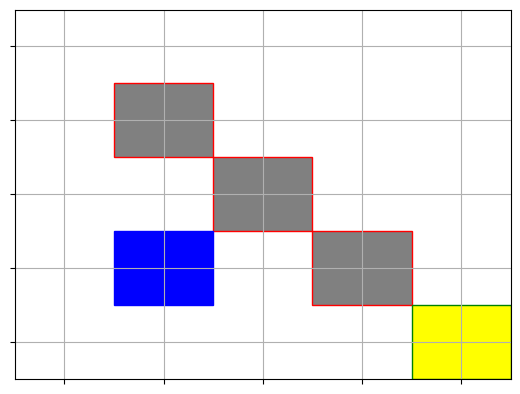

State: [1 4], Action: 0, Reward: -0.1, Done: False


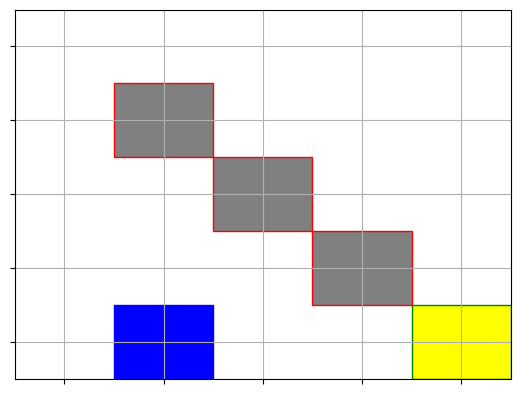

State: [2 4], Action: 1, Reward: -0.1, Done: False


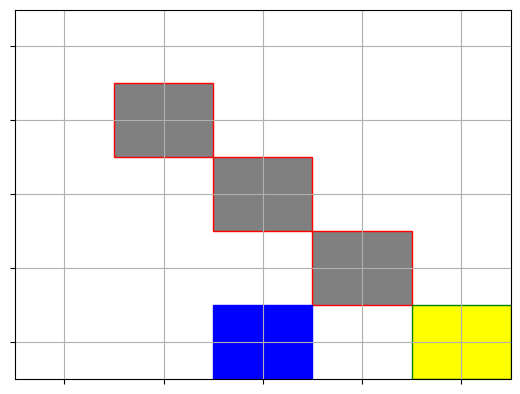

State: [1 4], Action: 3, Reward: -0.1, Done: False


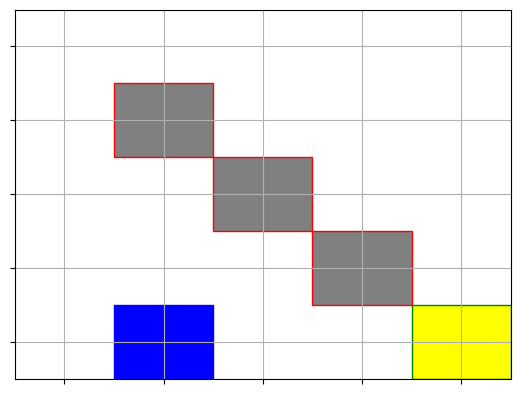

State: [1 3], Action: 2, Reward: -0.1, Done: False


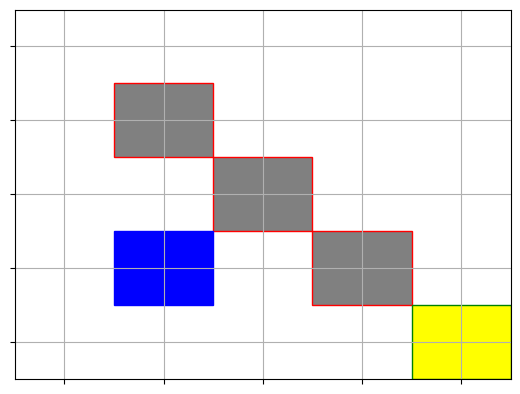

State: [1 2], Action: 2, Reward: -0.1, Done: False


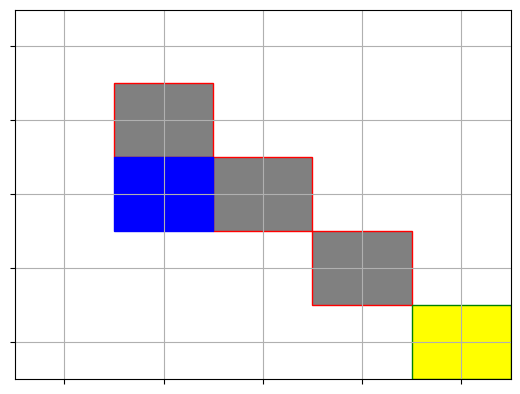

State: [1 2], Action: 2, Reward: -0.1, Done: False


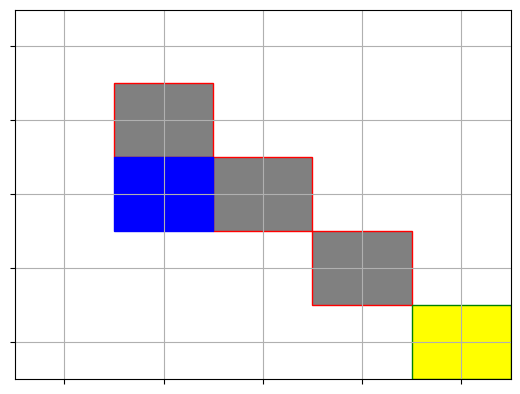

State: [1 2], Action: 1, Reward: -0.1, Done: False


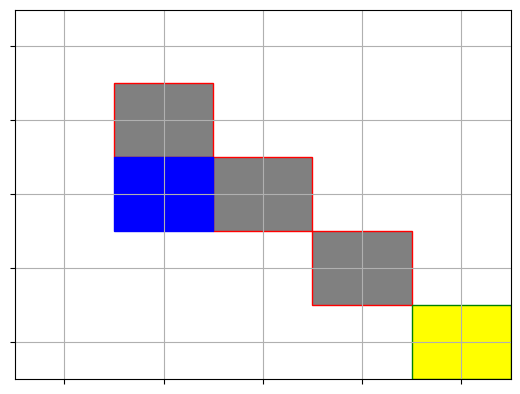

State: [1 2], Action: 1, Reward: -0.1, Done: False


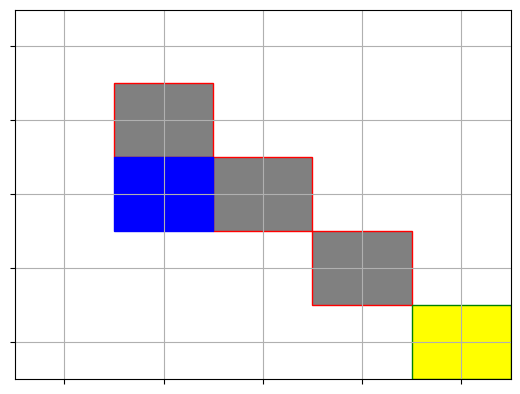

State: [0 2], Action: 3, Reward: -0.1, Done: False


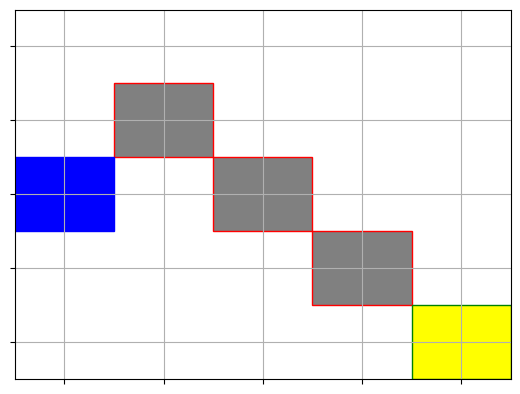

State: [0 2], Action: 3, Reward: -0.1, Done: False


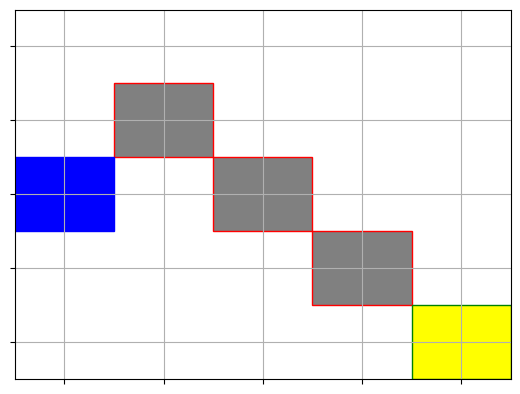

State: [0 2], Action: 3, Reward: -0.1, Done: False


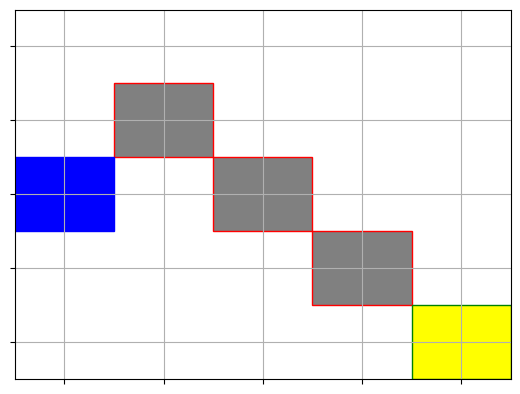

State: [0 3], Action: 0, Reward: -0.1, Done: False


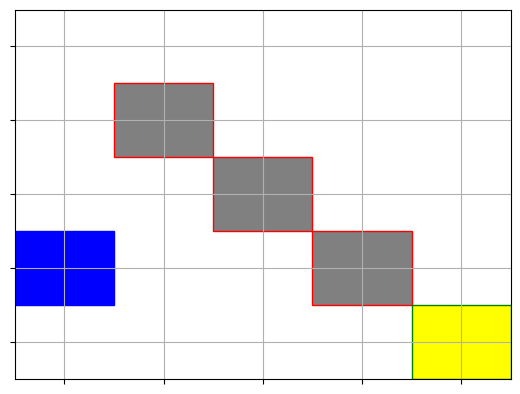

State: [0 3], Action: 3, Reward: -0.1, Done: False


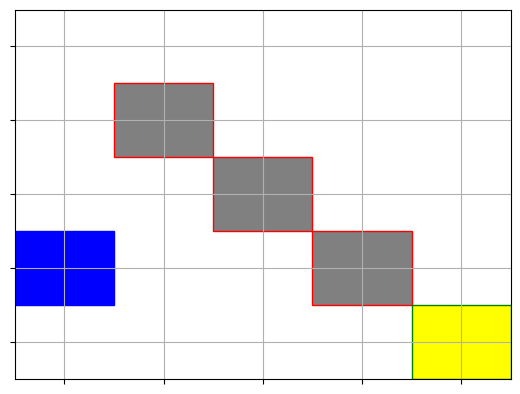

State: [0 2], Action: 2, Reward: -0.1, Done: False


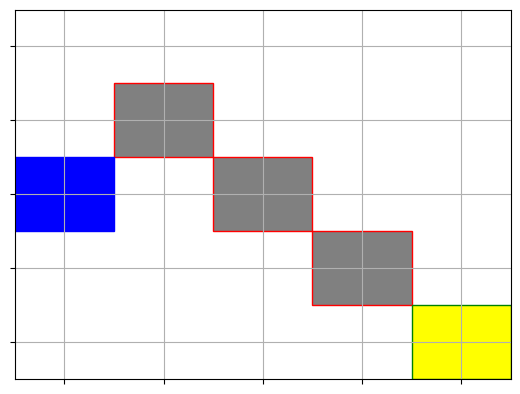

State: [0 1], Action: 2, Reward: -0.1, Done: False


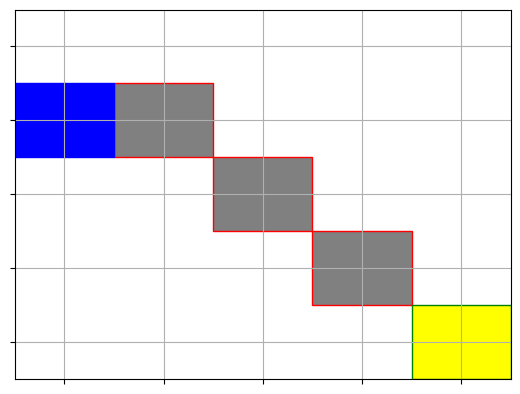

State: [0 2], Action: 0, Reward: -0.1, Done: False


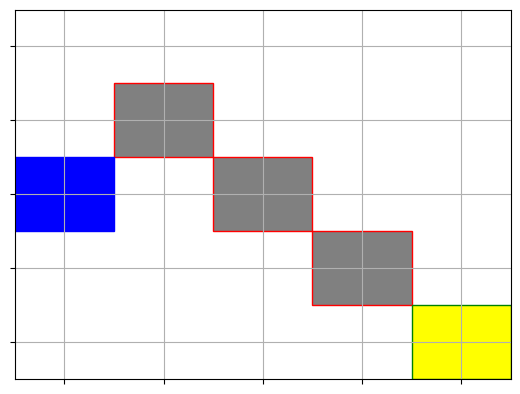

State: [0 3], Action: 0, Reward: -0.1, Done: False


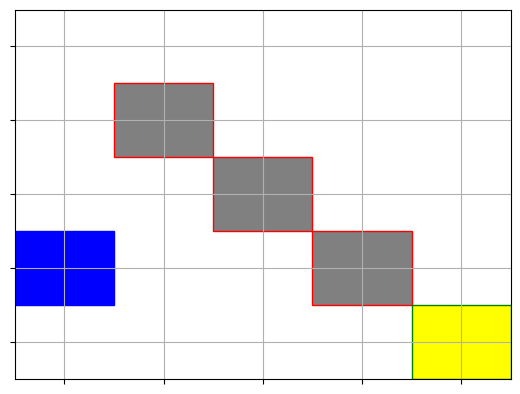

State: [0 4], Action: 0, Reward: -0.1, Done: False


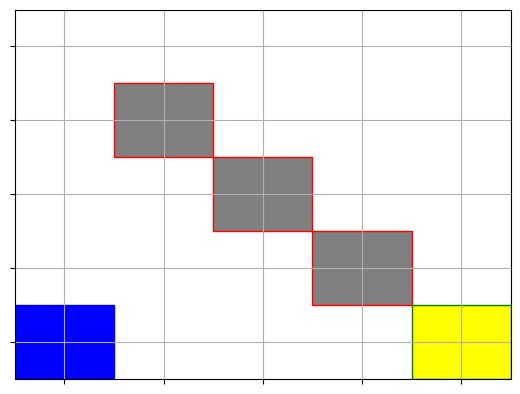

State: [1 4], Action: 1, Reward: -0.1, Done: False


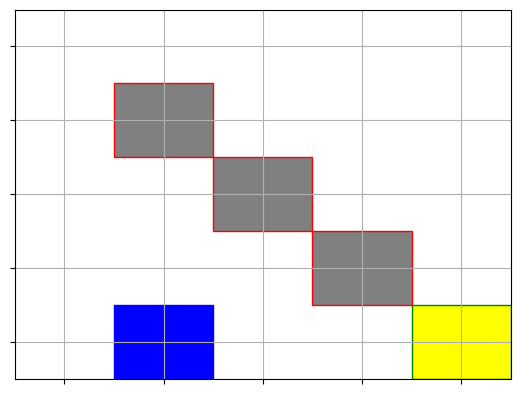

State: [1 3], Action: 2, Reward: -0.1, Done: False


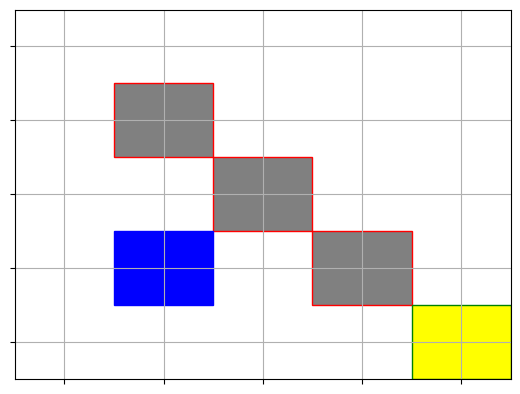

State: [1 2], Action: 2, Reward: -0.1, Done: False


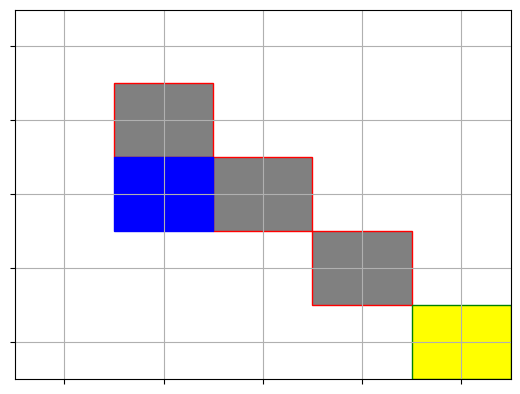

State: [1 2], Action: 1, Reward: -0.1, Done: False


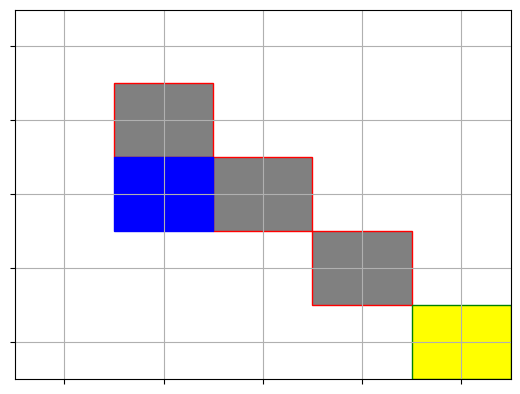

State: [0 2], Action: 3, Reward: -0.1, Done: False


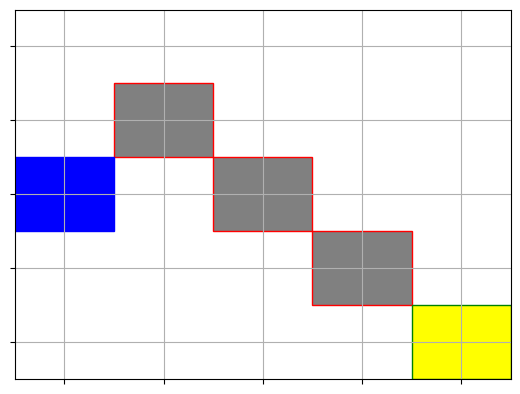

State: [0 3], Action: 0, Reward: -0.1, Done: False


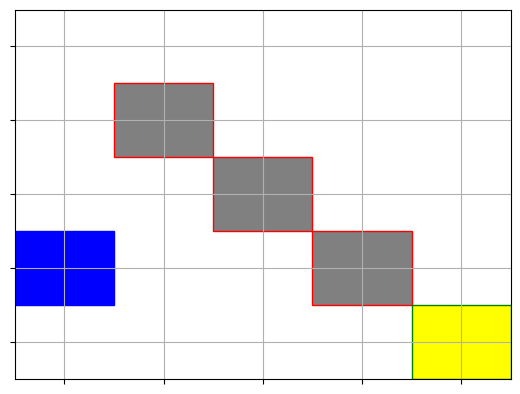

State: [0 3], Action: 3, Reward: -0.1, Done: False


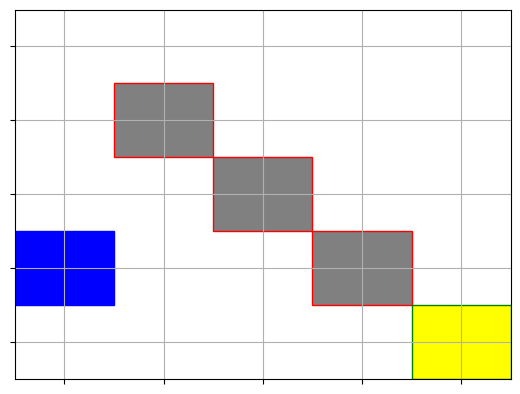

State: [1 3], Action: 1, Reward: -0.1, Done: False


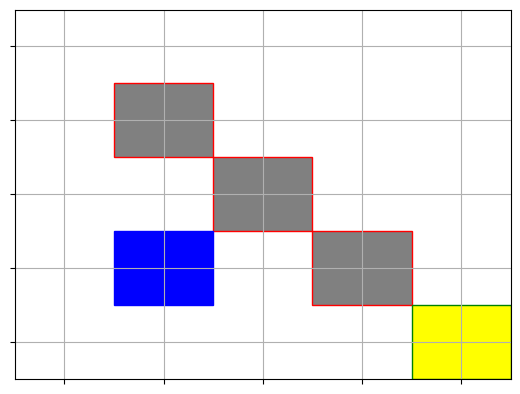

State: [1 2], Action: 2, Reward: -0.1, Done: False


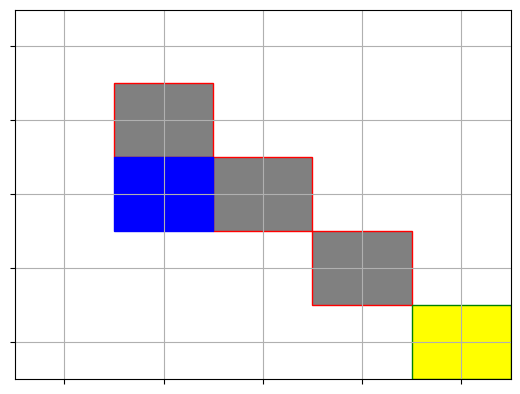

State: [1 3], Action: 0, Reward: -0.1, Done: False


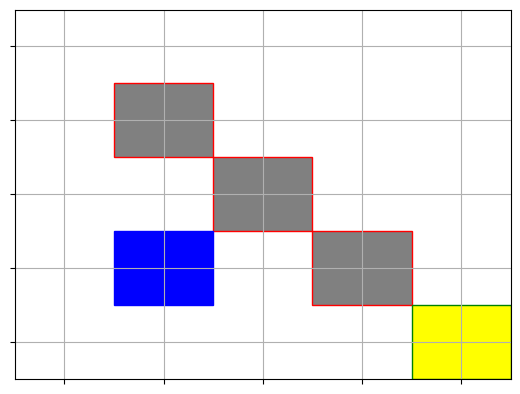

State: [1 4], Action: 0, Reward: -0.1, Done: False


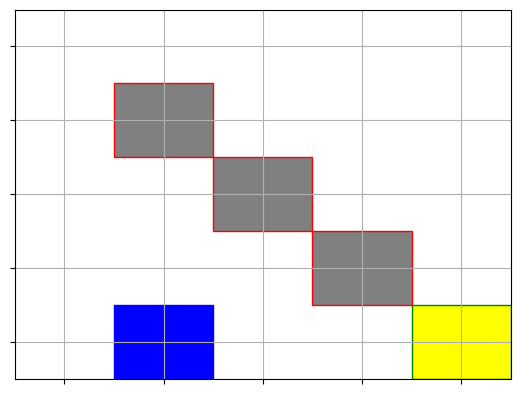

State: [1 4], Action: 0, Reward: -0.1, Done: False


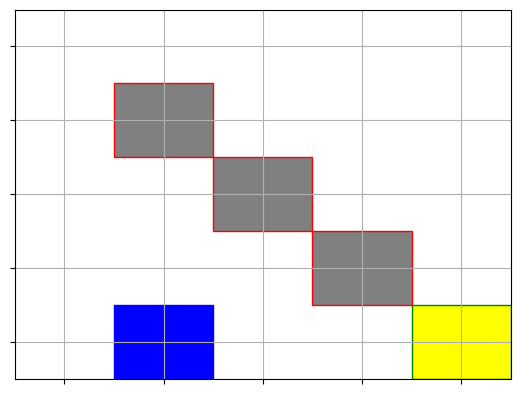

State: [1 3], Action: 2, Reward: -0.1, Done: False


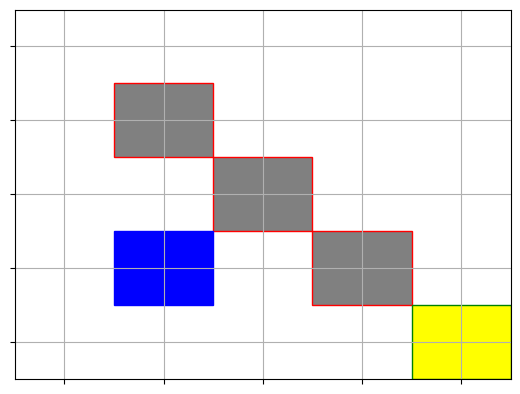

State: [2 3], Action: 1, Reward: -0.1, Done: False


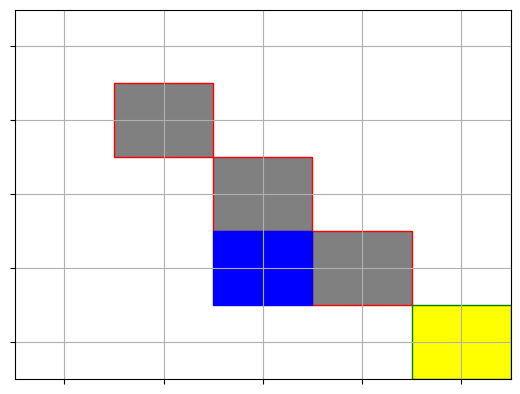

State: [2 3], Action: 2, Reward: -0.1, Done: False


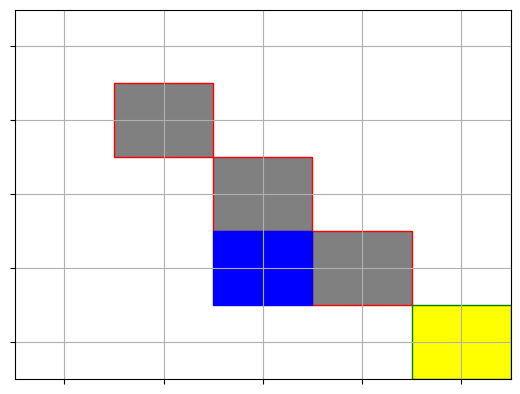

State: [2 4], Action: 0, Reward: -0.1, Done: False


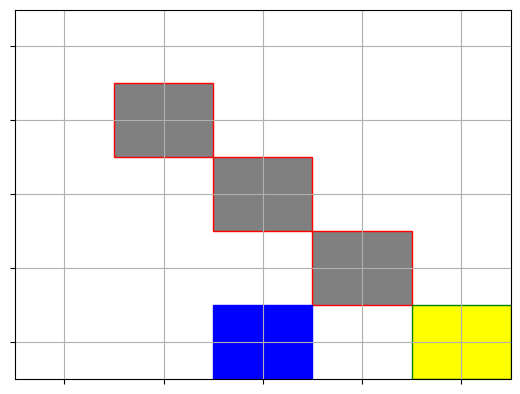

State: [3 4], Action: 1, Reward: -0.1, Done: False


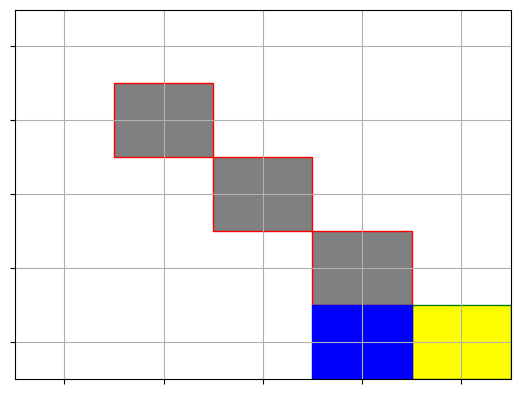

State: [2 4], Action: 3, Reward: -0.1, Done: False


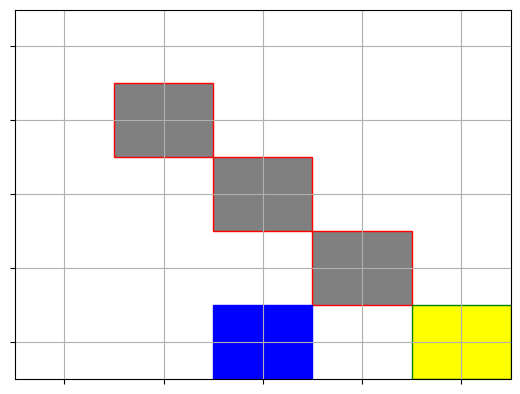

State: [3 4], Action: 1, Reward: -0.1, Done: False


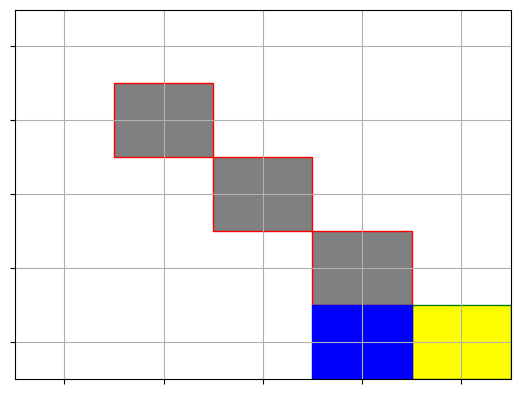

State: [4 4], Action: 1, Reward: 1, Done: True


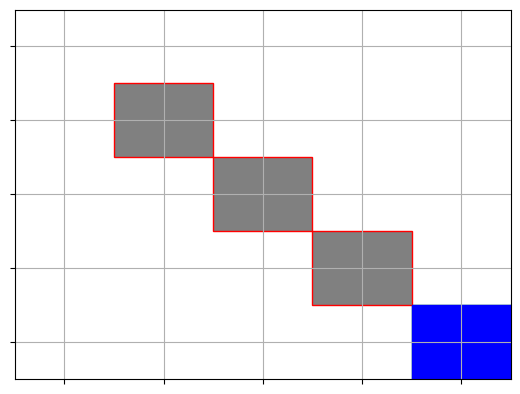

State: [0 0], Action: 3, Reward: -0.1, Done: False


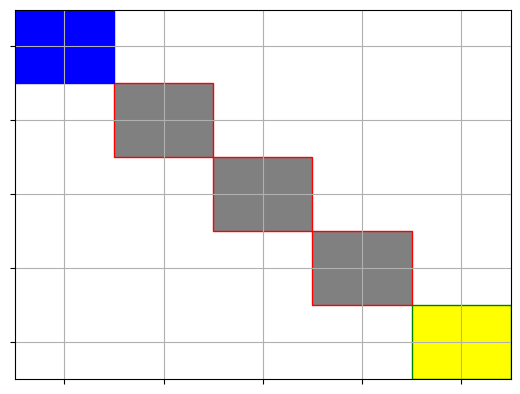

State: [1 0], Action: 1, Reward: -0.1, Done: False


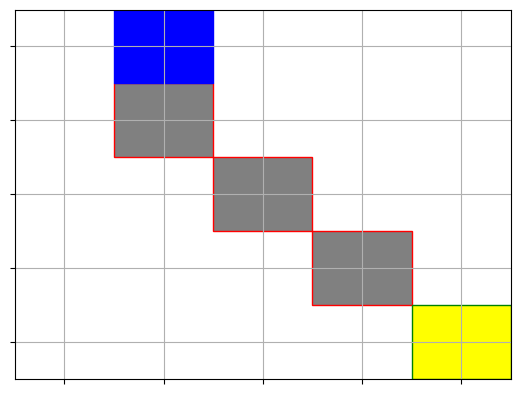

State: [1 0], Action: 2, Reward: -0.1, Done: False


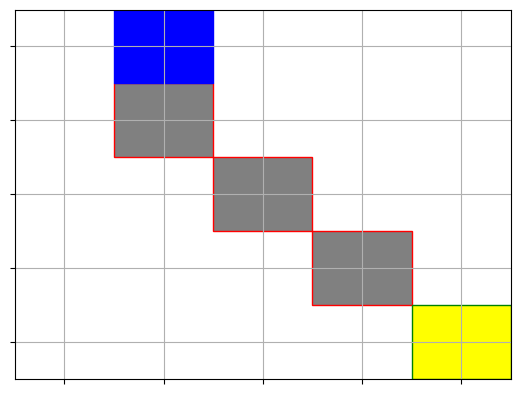

State: [0 0], Action: 3, Reward: -0.1, Done: False


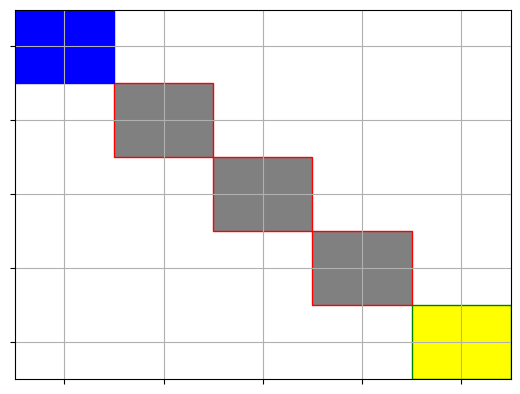

State: [0 1], Action: 0, Reward: -0.1, Done: False


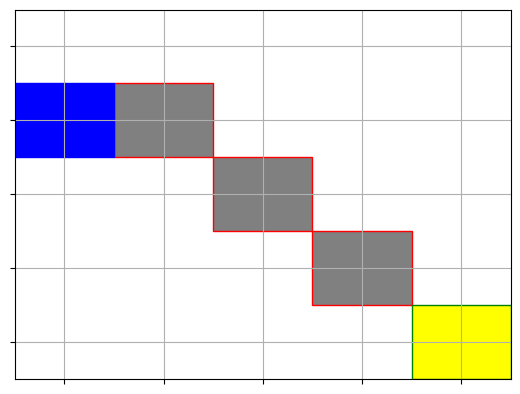

State: [0 1], Action: 3, Reward: -0.1, Done: False


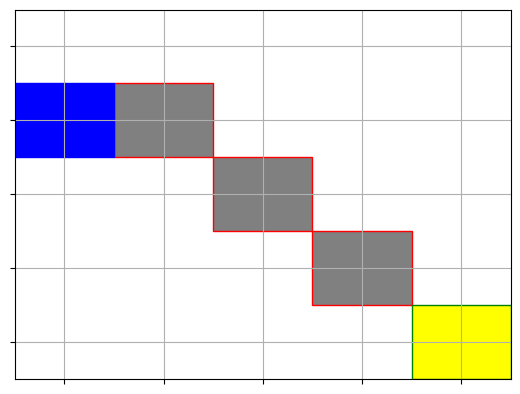

State: [0 1], Action: 3, Reward: -0.1, Done: False


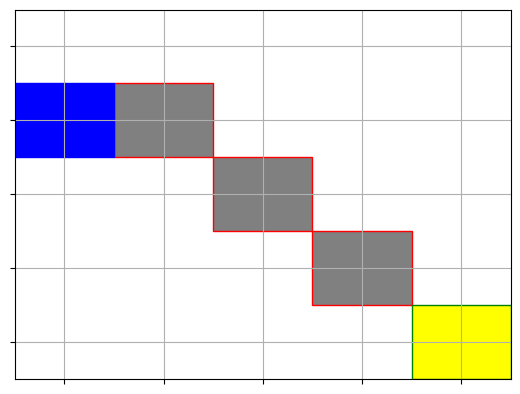

State: [0 1], Action: 3, Reward: -0.1, Done: False


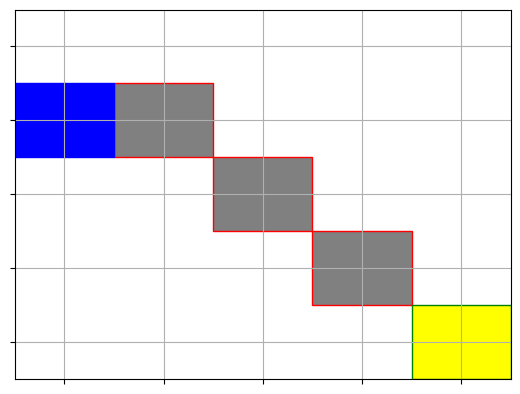

State: [0 1], Action: 3, Reward: -0.1, Done: False


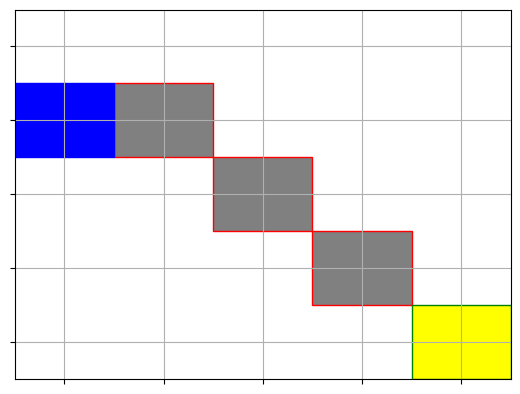

State: [0 1], Action: 1, Reward: -0.1, Done: False


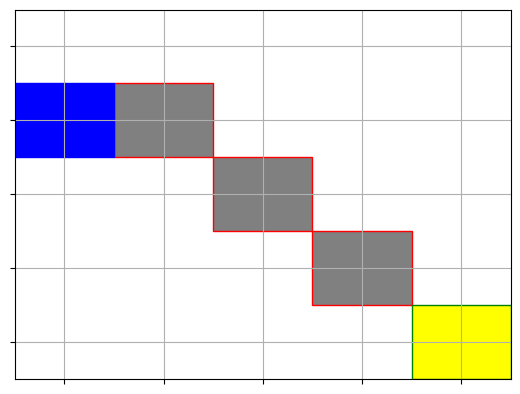

State: [0 1], Action: 3, Reward: -0.1, Done: False


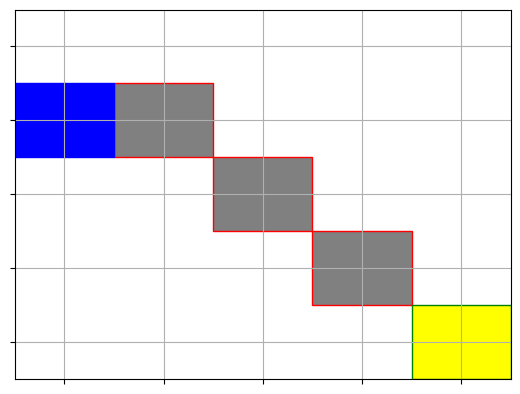

State: [0 1], Action: 3, Reward: -0.1, Done: False


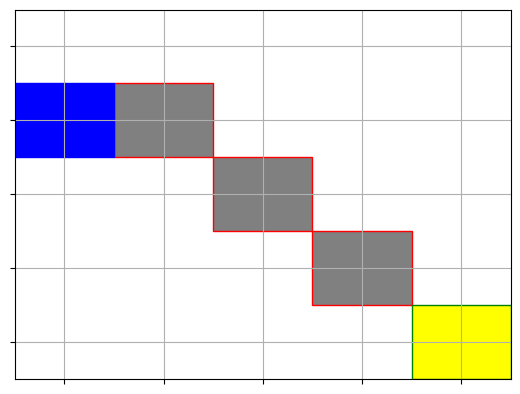

State: [0 0], Action: 2, Reward: -0.1, Done: False


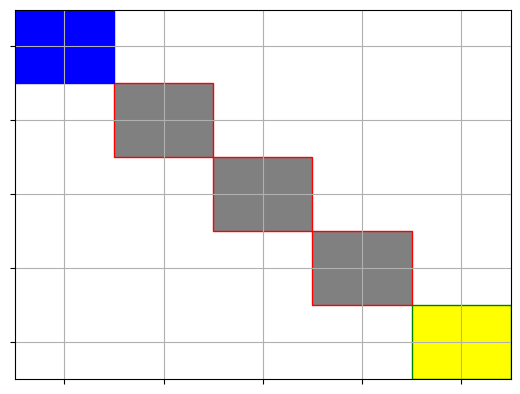

State: [0 0], Action: 2, Reward: -0.1, Done: False


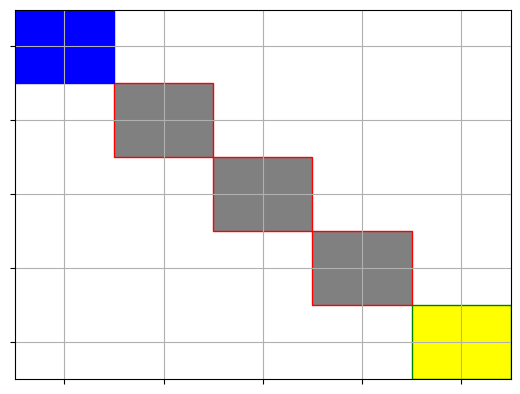

State: [0 1], Action: 0, Reward: -0.1, Done: False


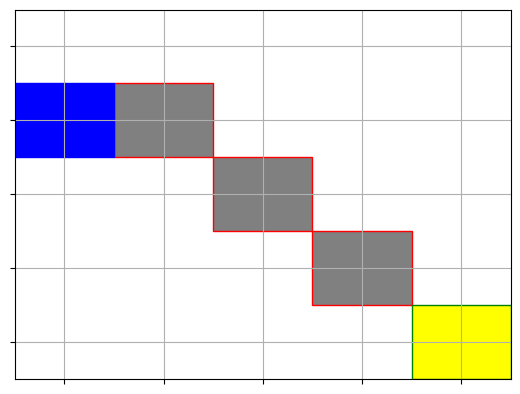

State: [0 1], Action: 3, Reward: -0.1, Done: False


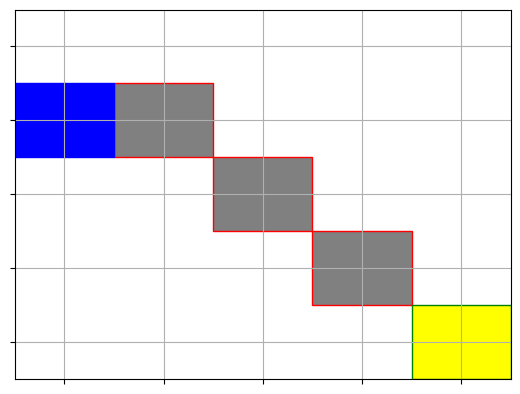

State: [0 0], Action: 2, Reward: -0.1, Done: False


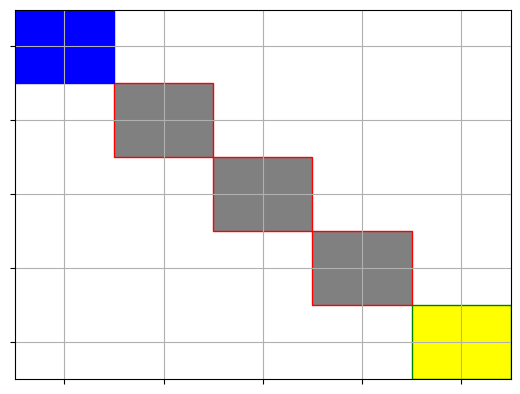

State: [1 0], Action: 1, Reward: -0.1, Done: False


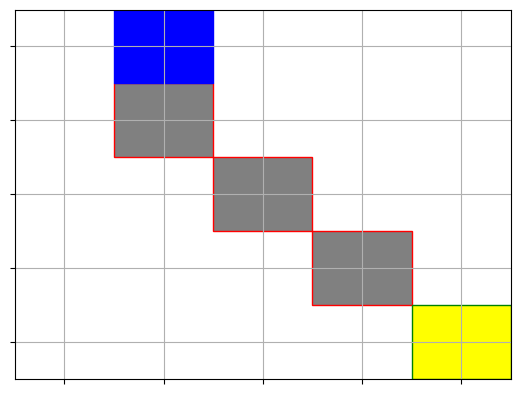

State: [2 0], Action: 1, Reward: -0.1, Done: False


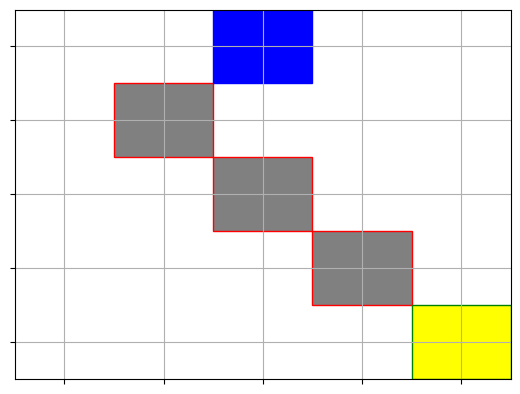

State: [2 1], Action: 0, Reward: -0.1, Done: False


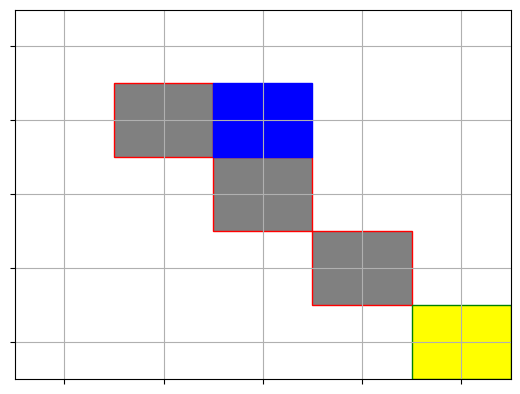

State: [2 1], Action: 3, Reward: -0.1, Done: False


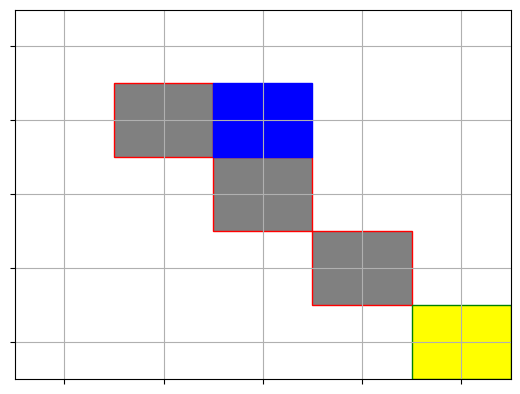

State: [3 1], Action: 1, Reward: -0.1, Done: False


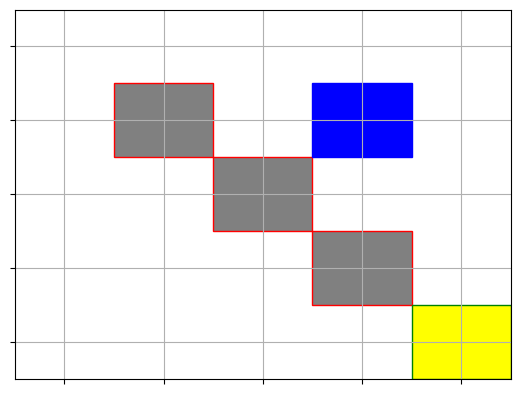

State: [2 1], Action: 3, Reward: -0.1, Done: False


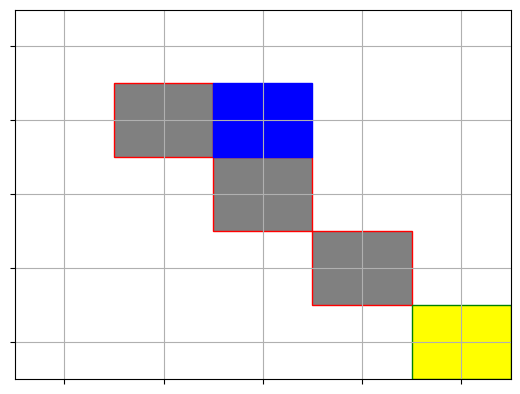

State: [2 1], Action: 3, Reward: -0.1, Done: False


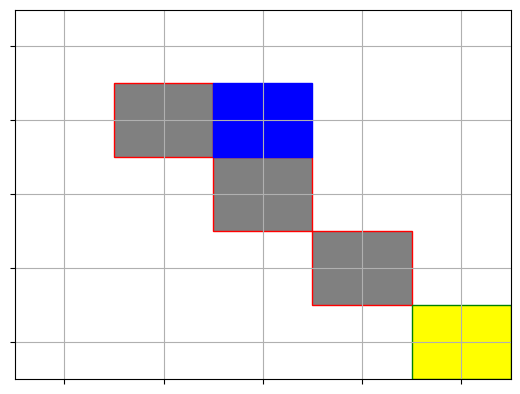

State: [2 1], Action: 0, Reward: -0.1, Done: False


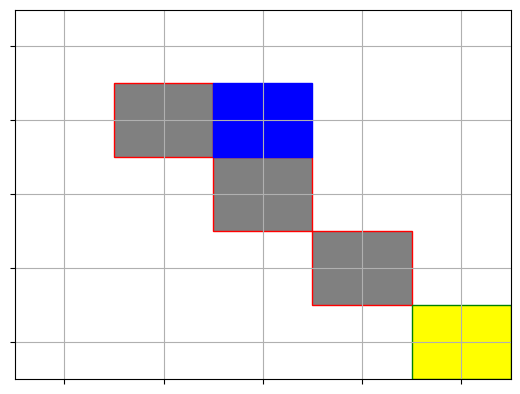

State: [2 1], Action: 3, Reward: -0.1, Done: False


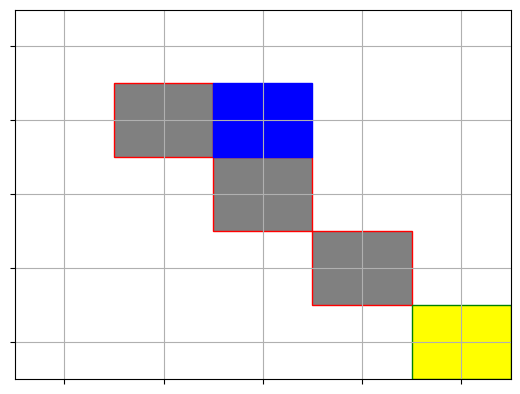

State: [2 1], Action: 3, Reward: -0.1, Done: False


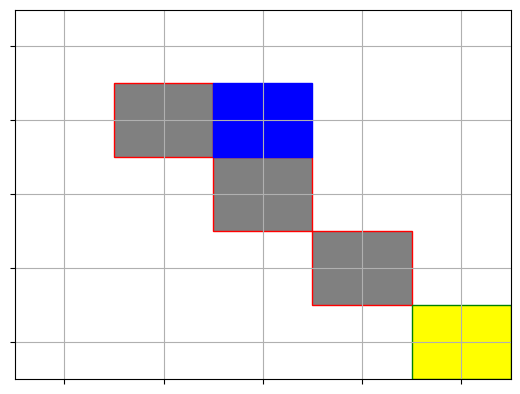

State: [2 1], Action: 3, Reward: -0.1, Done: False


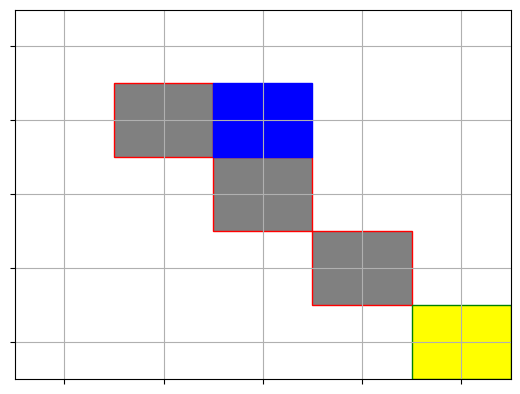

State: [2 1], Action: 0, Reward: -0.1, Done: False


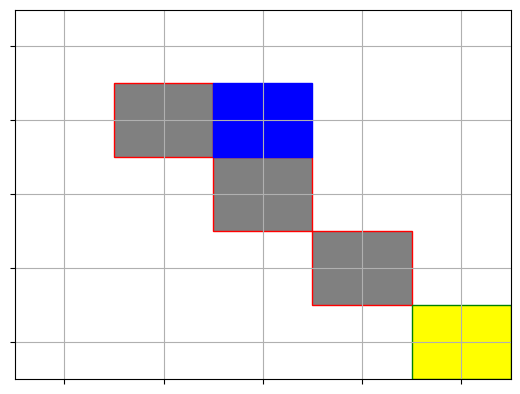

State: [3 1], Action: 1, Reward: -0.1, Done: False


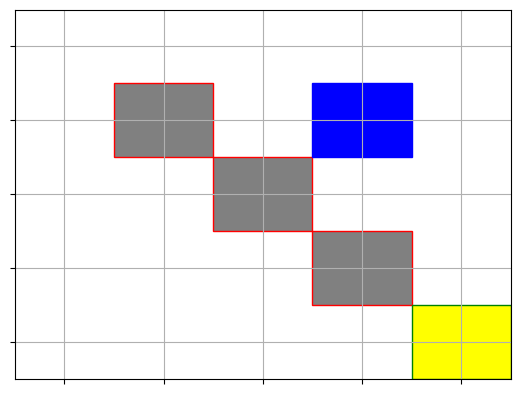

State: [4 1], Action: 1, Reward: -0.1, Done: False


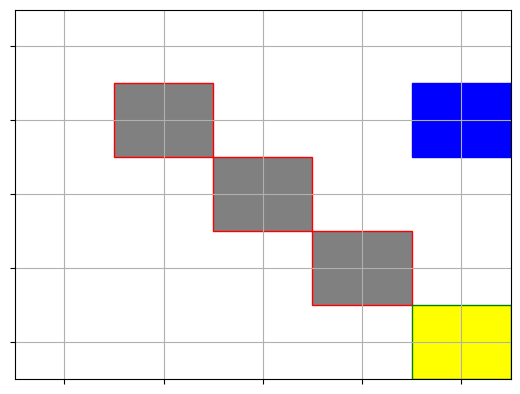

State: [4 0], Action: 2, Reward: -0.1, Done: False


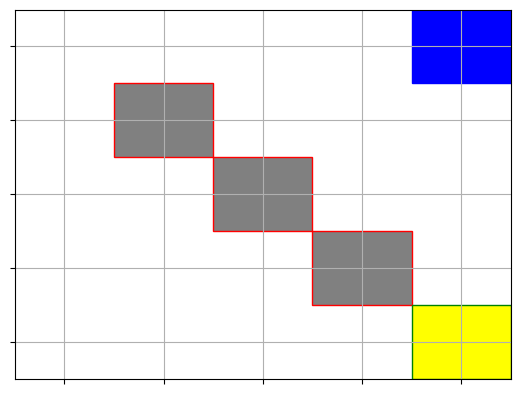

State: [4 1], Action: 0, Reward: -0.1, Done: False


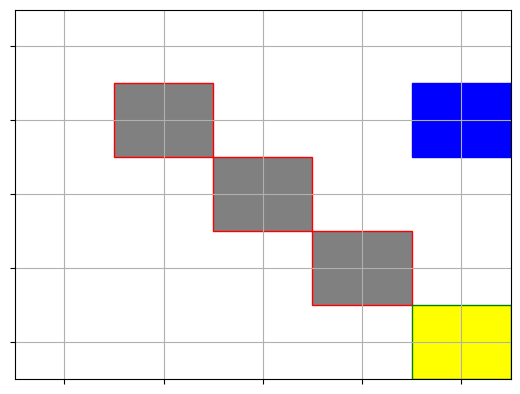

State: [3 1], Action: 3, Reward: -0.1, Done: False


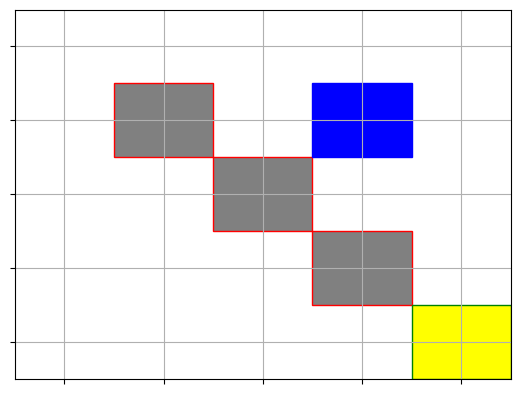

State: [3 2], Action: 0, Reward: -0.1, Done: False


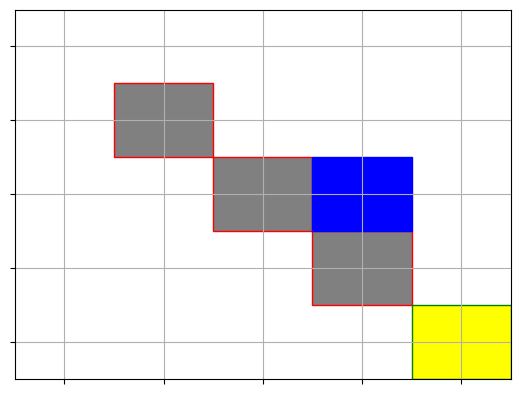

State: [4 2], Action: 1, Reward: -0.1, Done: False


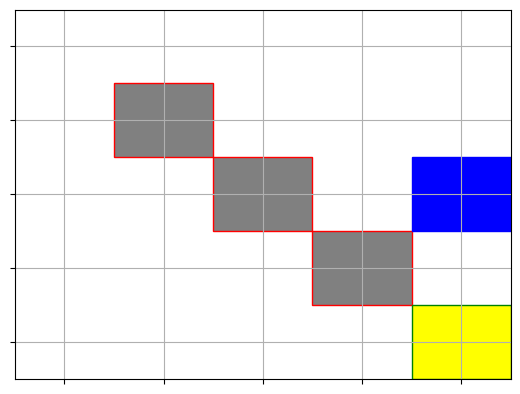

State: [4 2], Action: 1, Reward: -0.1, Done: False


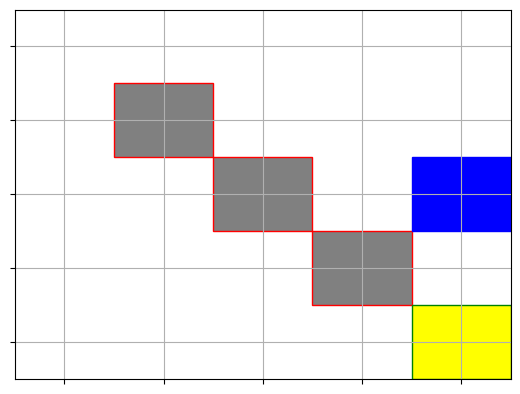

State: [3 2], Action: 3, Reward: -0.1, Done: False


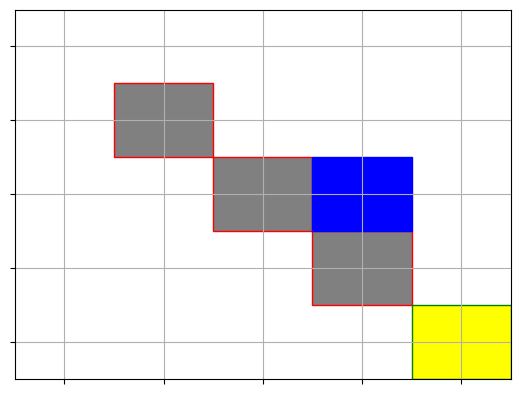

State: [3 1], Action: 2, Reward: -0.1, Done: False


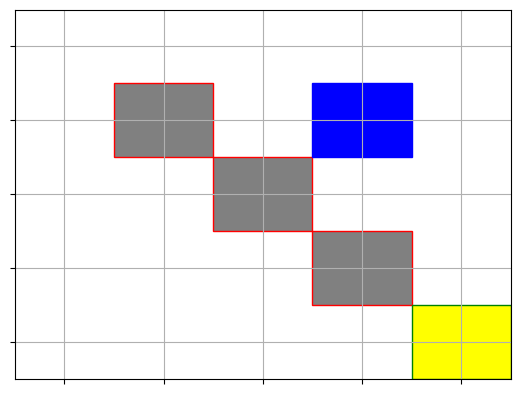

State: [3 0], Action: 2, Reward: -0.1, Done: False


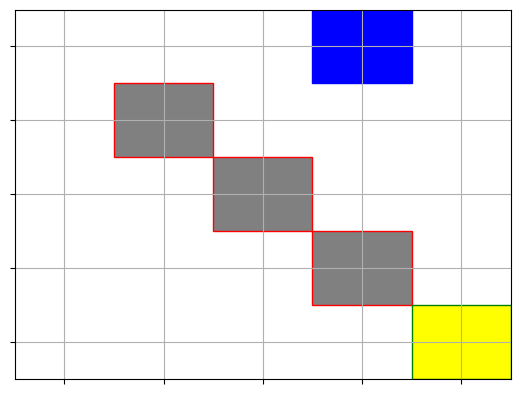

State: [4 0], Action: 1, Reward: -0.1, Done: False


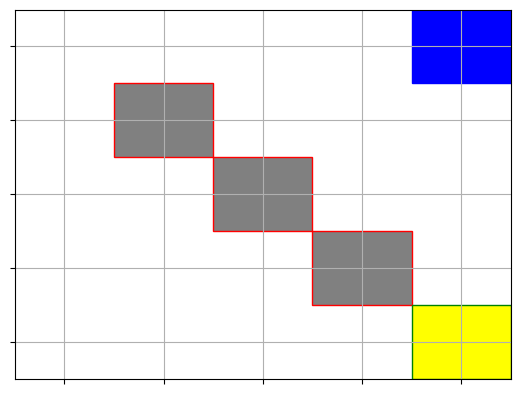

State: [4 0], Action: 2, Reward: -0.1, Done: False


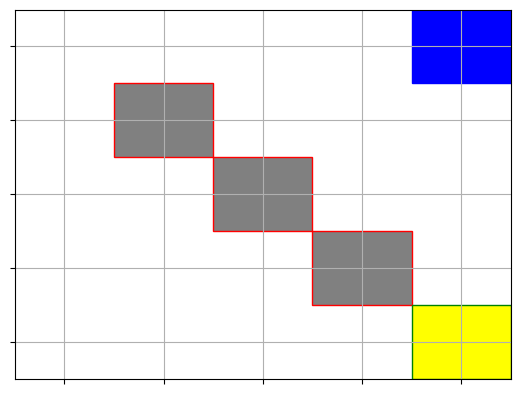

State: [4 0], Action: 2, Reward: -0.1, Done: False


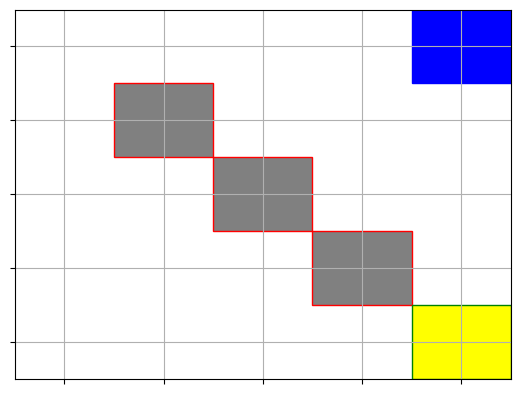

State: [3 0], Action: 3, Reward: -0.1, Done: False


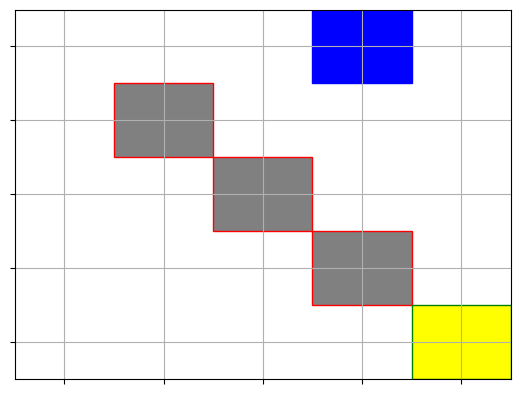

State: [4 0], Action: 1, Reward: -0.1, Done: False


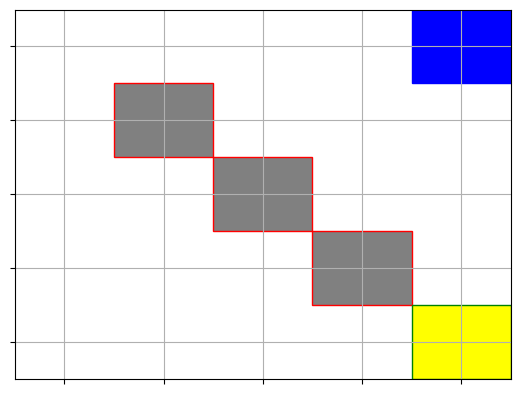

State: [4 0], Action: 2, Reward: -0.1, Done: False


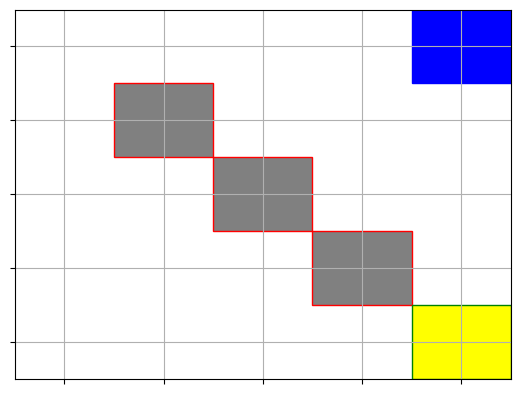

State: [4 1], Action: 0, Reward: -0.1, Done: False


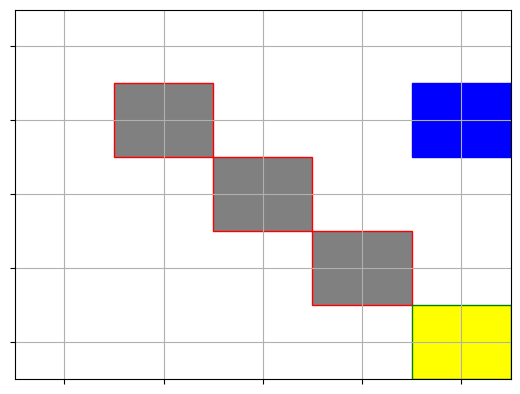

State: [4 0], Action: 2, Reward: -0.1, Done: False


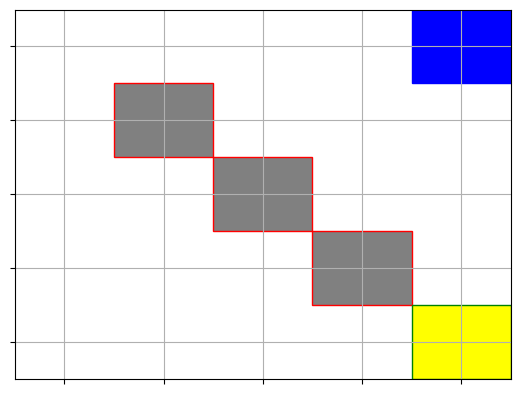

State: [4 1], Action: 0, Reward: -0.1, Done: False


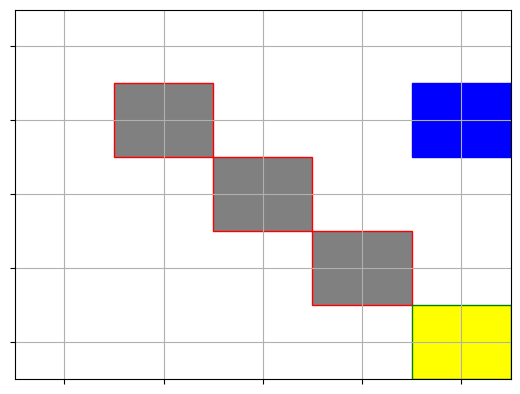

State: [4 0], Action: 2, Reward: -0.1, Done: False


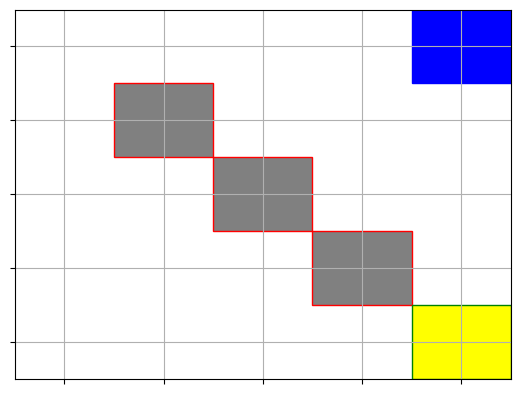

State: [3 0], Action: 3, Reward: -0.1, Done: False


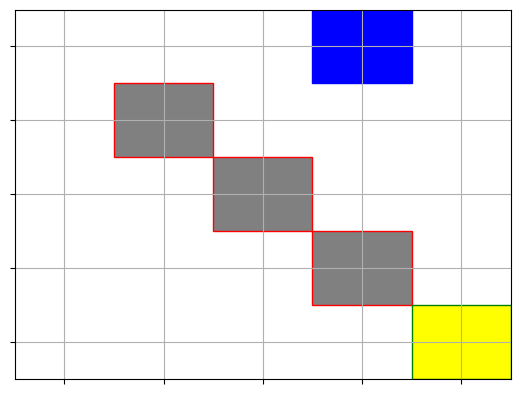

State: [4 0], Action: 1, Reward: -0.1, Done: False


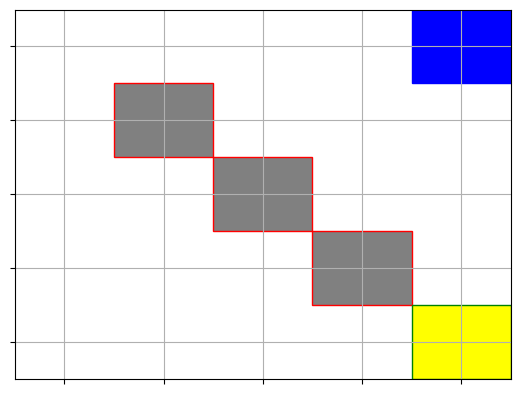

State: [4 1], Action: 0, Reward: -0.1, Done: False


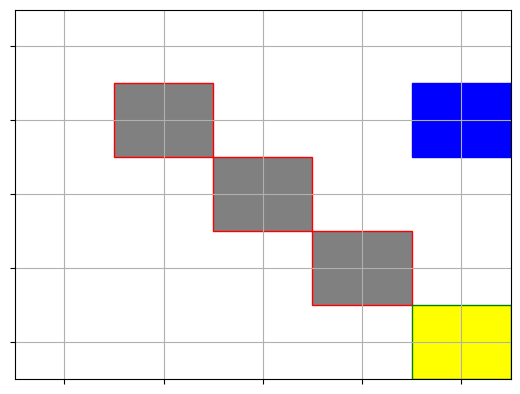

State: [4 1], Action: 1, Reward: -0.1, Done: False


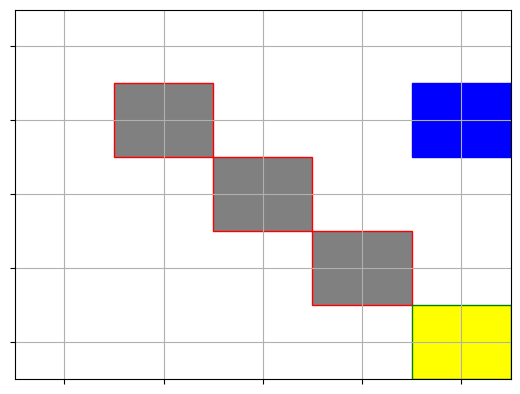

State: [4 2], Action: 0, Reward: -0.1, Done: False


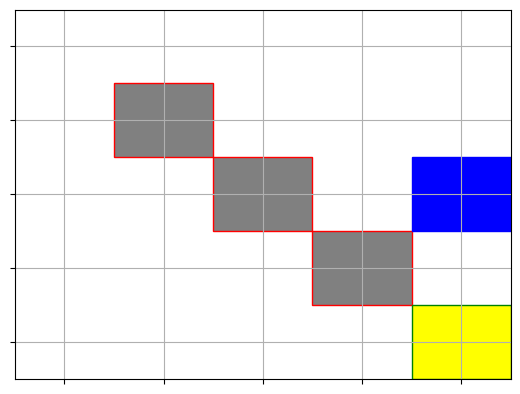

State: [4 3], Action: 0, Reward: -0.1, Done: False


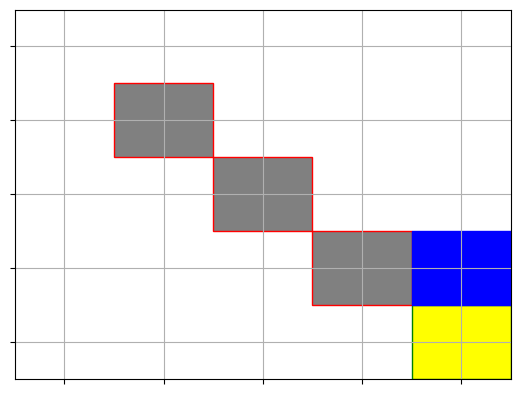

State: [4 2], Action: 2, Reward: -0.1, Done: False


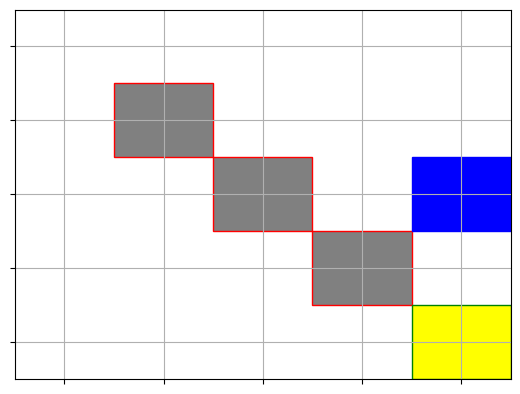

State: [3 2], Action: 3, Reward: -0.1, Done: False


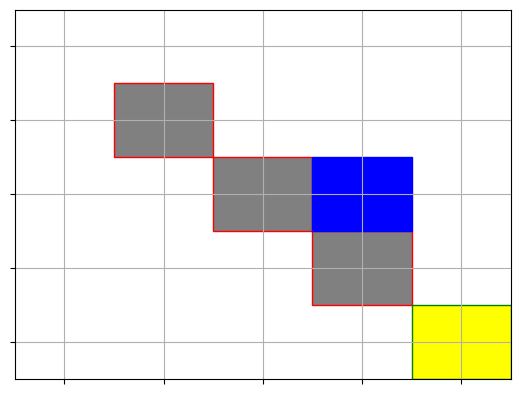

State: [3 1], Action: 2, Reward: -0.1, Done: False


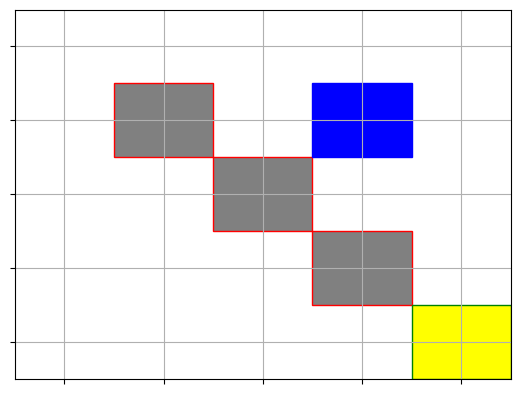

State: [3 0], Action: 2, Reward: -0.1, Done: False


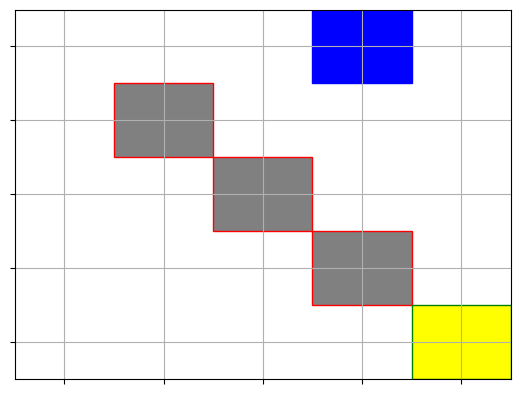

State: [2 0], Action: 3, Reward: -0.1, Done: False


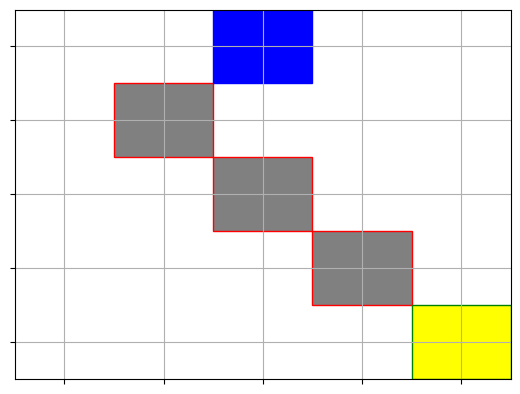

State: [1 0], Action: 3, Reward: -0.1, Done: False


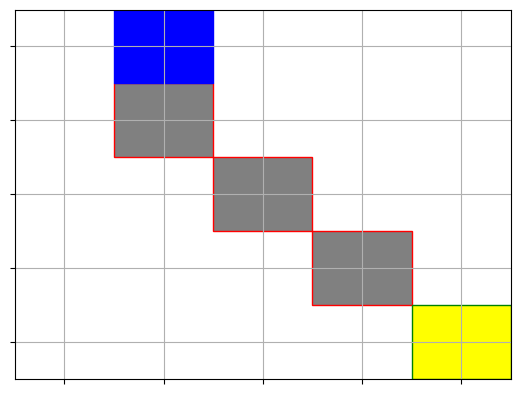

State: [2 0], Action: 1, Reward: -0.1, Done: False


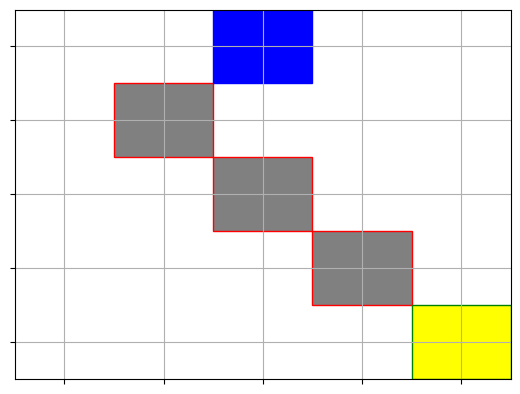

State: [3 0], Action: 1, Reward: -0.1, Done: False


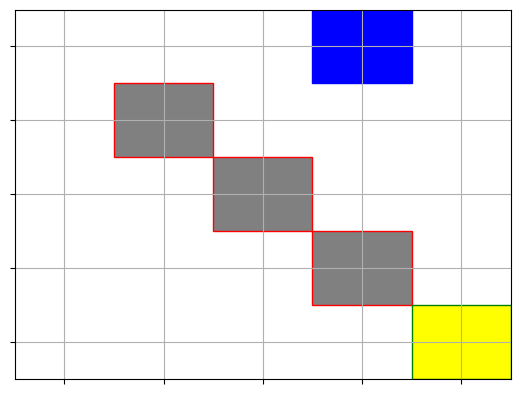

State: [3 0], Action: 2, Reward: -0.1, Done: False


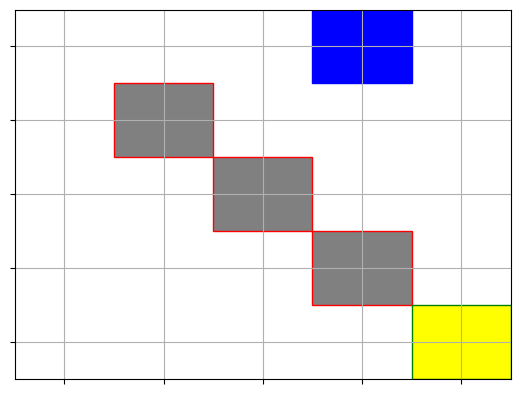

State: [4 0], Action: 1, Reward: -0.1, Done: False


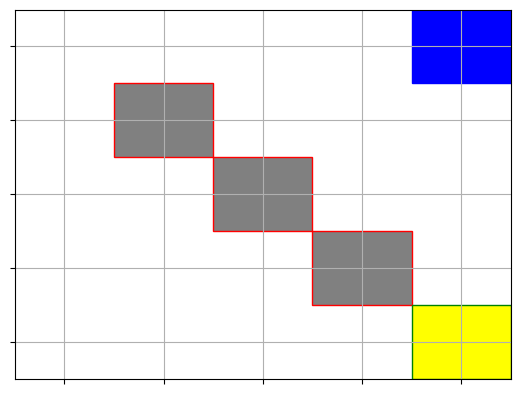

State: [4 0], Action: 2, Reward: -0.1, Done: False


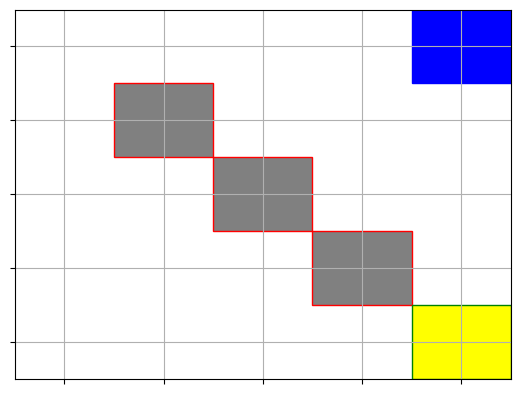

State: [4 1], Action: 0, Reward: -0.1, Done: False


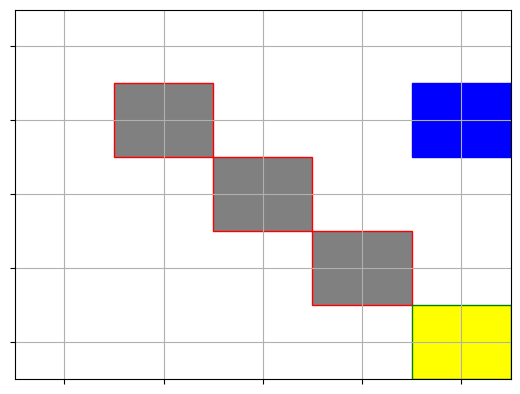

State: [4 0], Action: 2, Reward: -0.1, Done: False


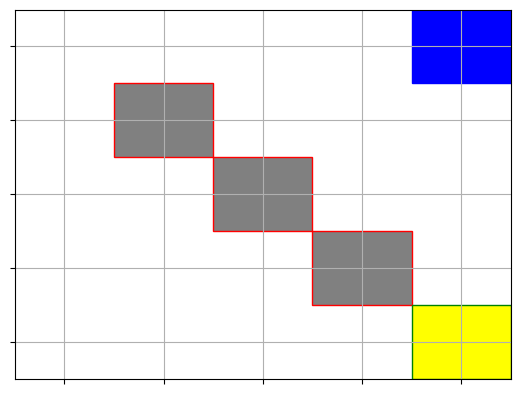

State: [3 0], Action: 3, Reward: -0.1, Done: False


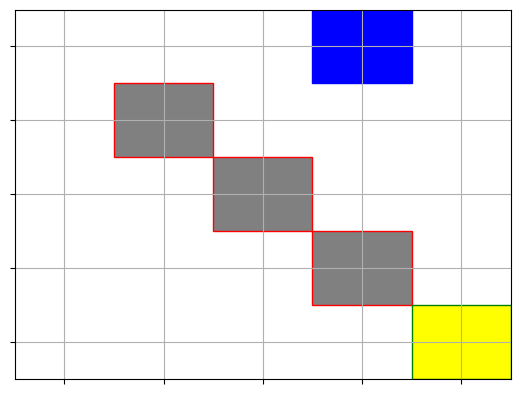

State: [3 0], Action: 2, Reward: -0.1, Done: False


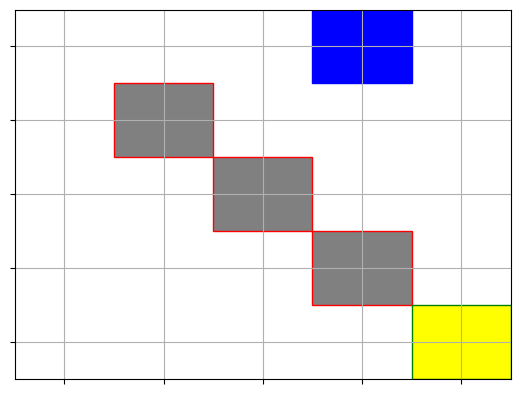

State: [3 0], Action: 2, Reward: -0.1, Done: False


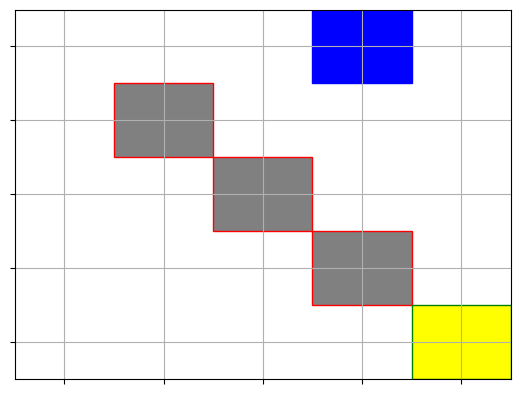

State: [3 0], Action: 2, Reward: -0.1, Done: False


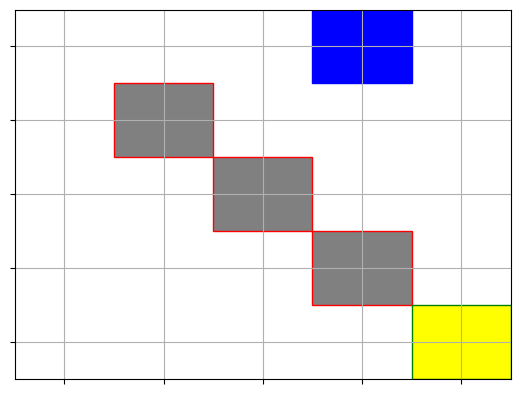

State: [3 0], Action: 2, Reward: -0.1, Done: False


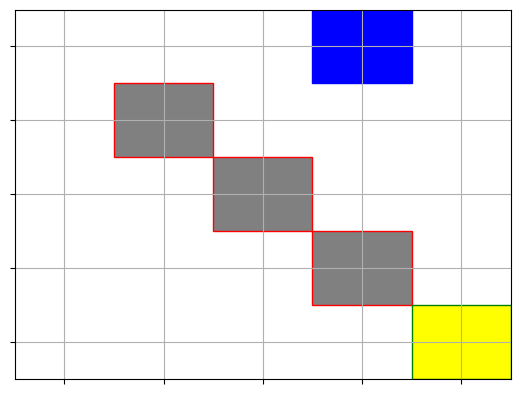

State: [4 0], Action: 1, Reward: -0.1, Done: False


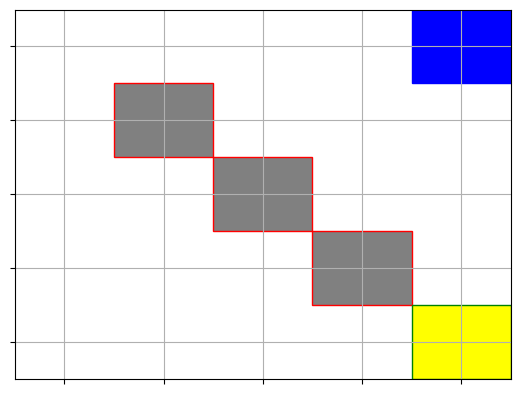

State: [4 1], Action: 0, Reward: -0.1, Done: False


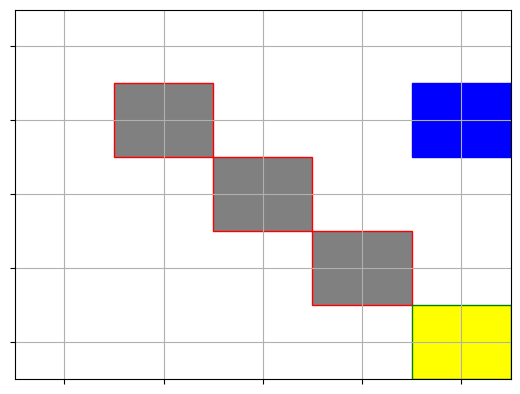

State: [4 1], Action: 1, Reward: -0.1, Done: False


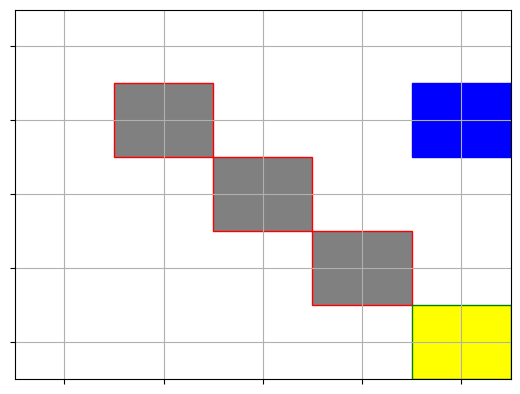

State: [4 1], Action: 1, Reward: -0.1, Done: False


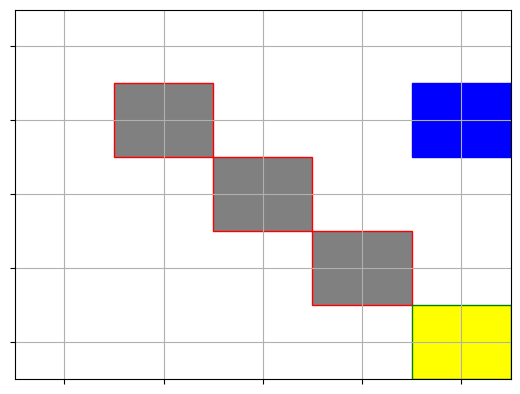

State: [3 1], Action: 3, Reward: -0.1, Done: False


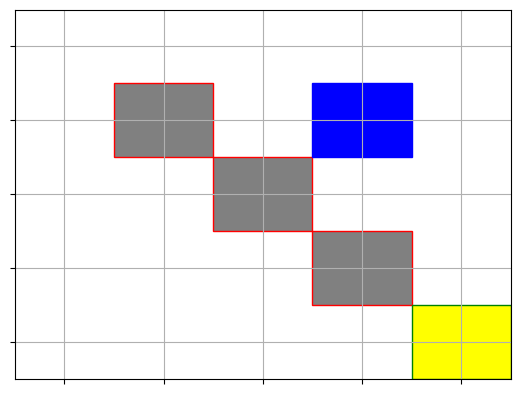

State: [3 0], Action: 2, Reward: -0.1, Done: False


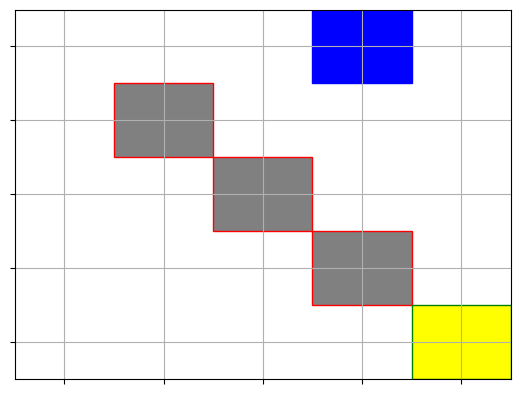

State: [3 0], Action: 2, Reward: -0.1, Done: False


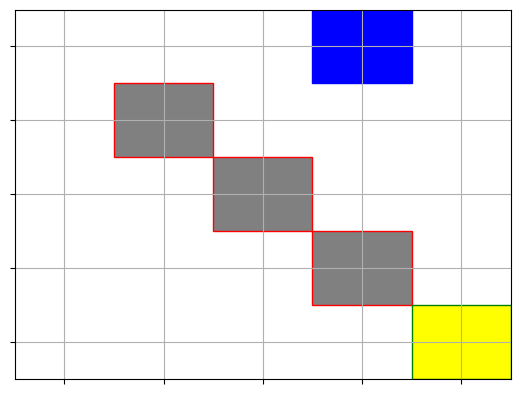

State: [2 0], Action: 3, Reward: -0.1, Done: False


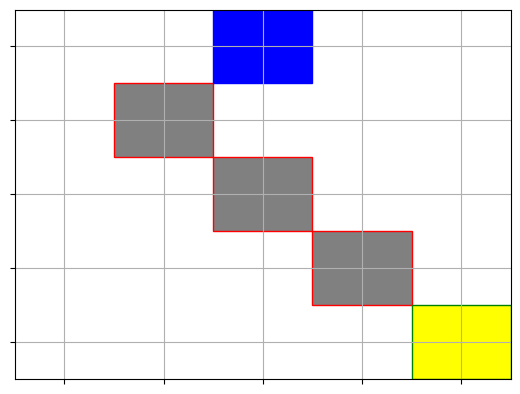

State: [1 0], Action: 3, Reward: -0.1, Done: False


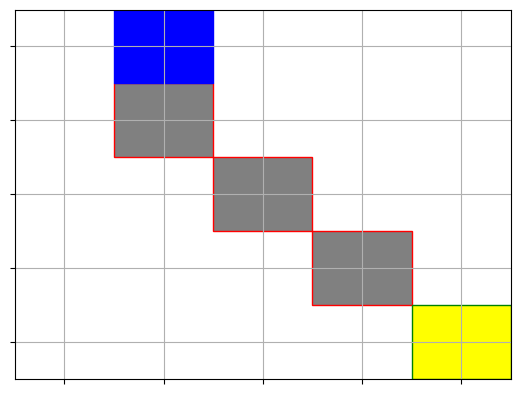

State: [1 0], Action: 0, Reward: -0.1, Done: False


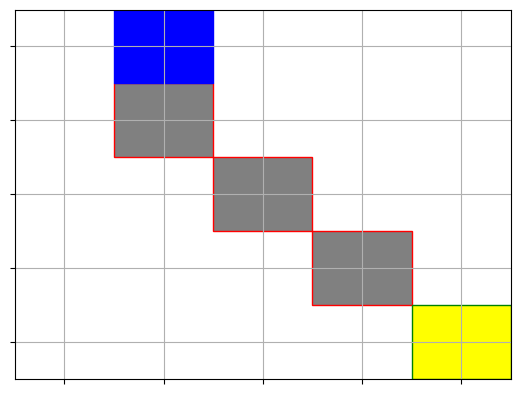

State: [2 0], Action: 1, Reward: -0.1, Done: False


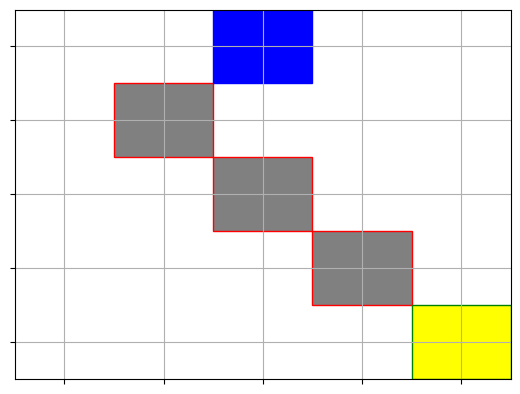

State: [3 0], Action: 1, Reward: -0.1, Done: False


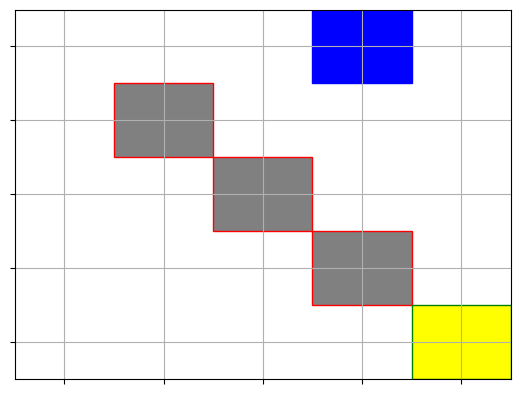

State: [4 0], Action: 1, Reward: -0.1, Done: False


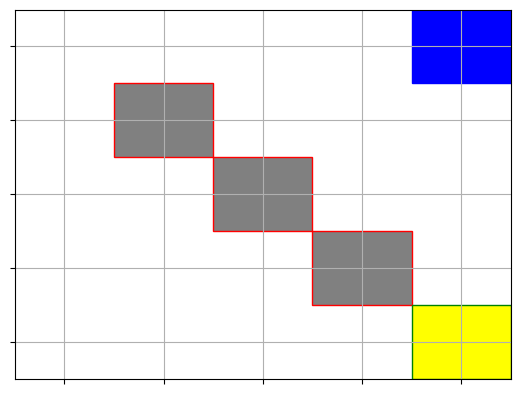

State: [4 1], Action: 0, Reward: -0.1, Done: False


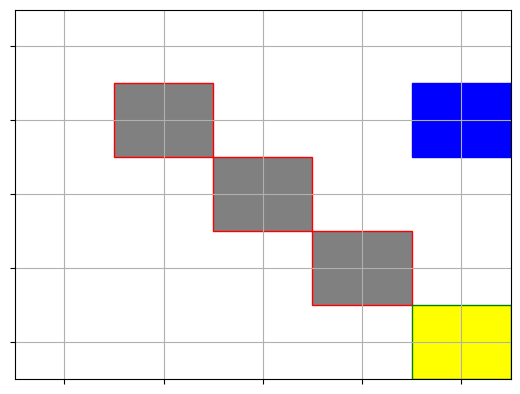

State: [3 1], Action: 3, Reward: -0.1, Done: False


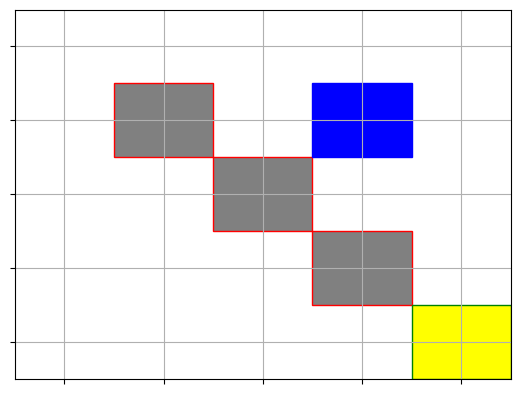

State: [4 1], Action: 1, Reward: -0.1, Done: False


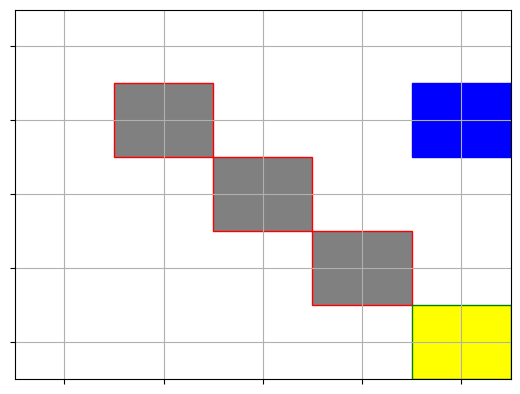

State: [4 0], Action: 2, Reward: -0.1, Done: False


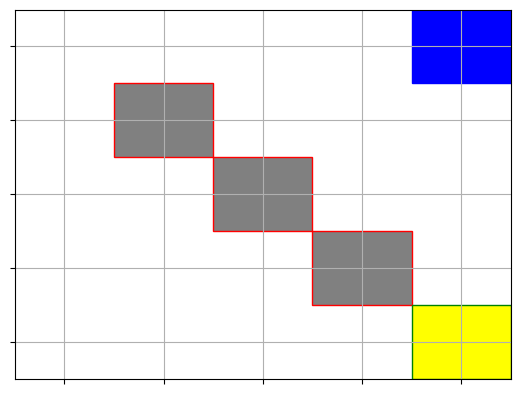

State: [4 0], Action: 1, Reward: -0.1, Done: False


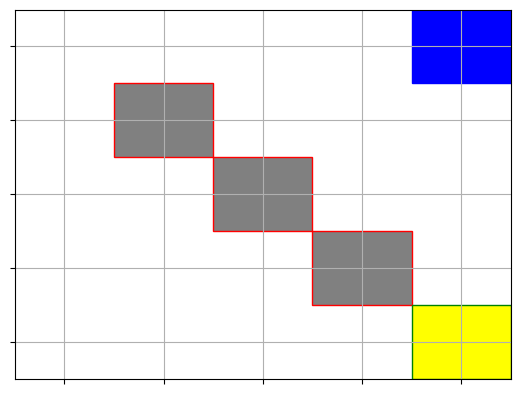

State: [3 0], Action: 3, Reward: -0.1, Done: False


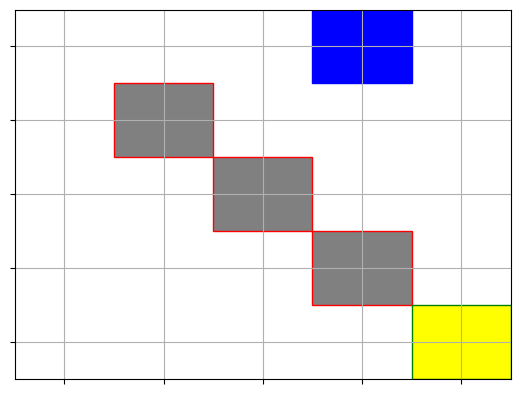

State: [4 0], Action: 1, Reward: -0.1, Done: False


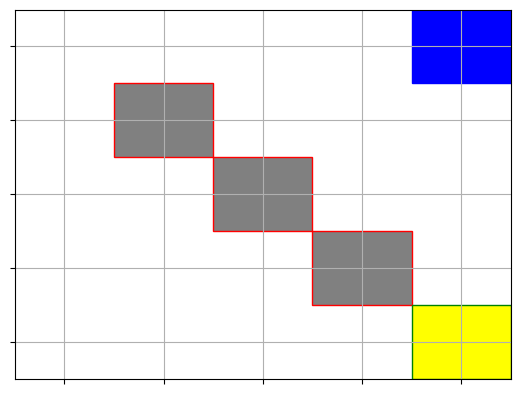

State: [4 0], Action: 2, Reward: -0.1, Done: False


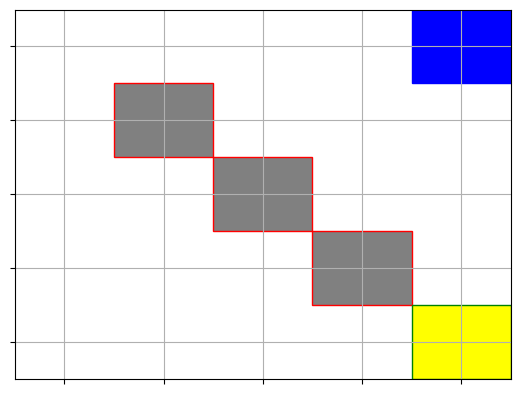

State: [4 0], Action: 2, Reward: -0.1, Done: False


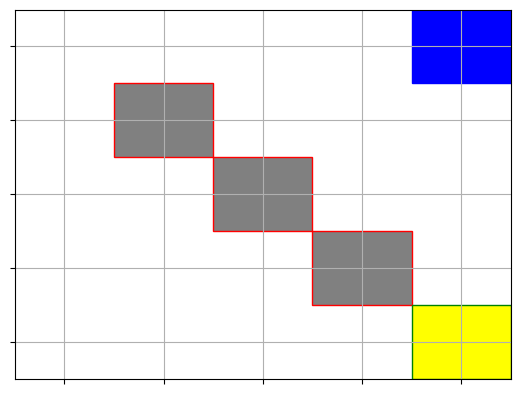

State: [3 0], Action: 3, Reward: -0.1, Done: False


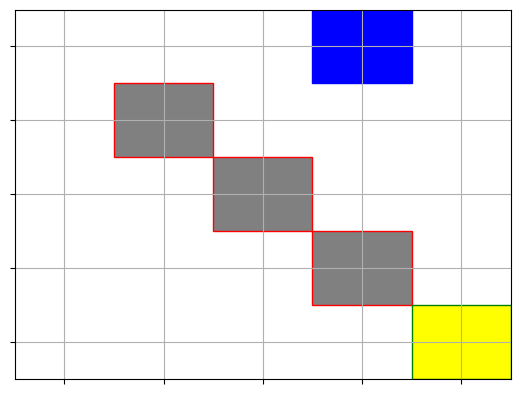

State: [3 0], Action: 2, Reward: -0.1, Done: False


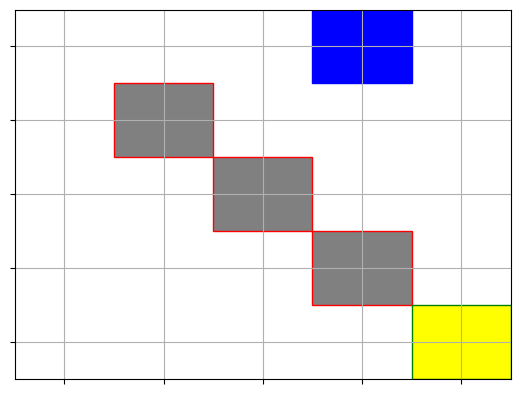

State: [4 0], Action: 1, Reward: -0.1, Done: False


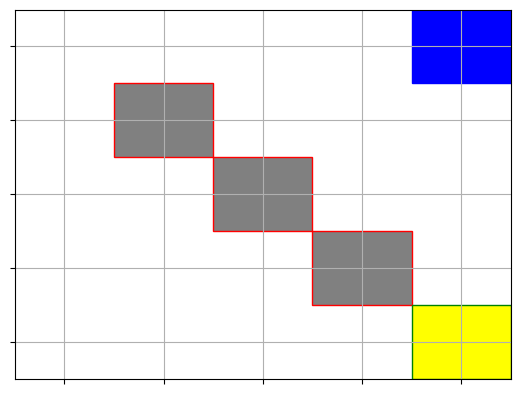

State: [4 0], Action: 2, Reward: -0.1, Done: False


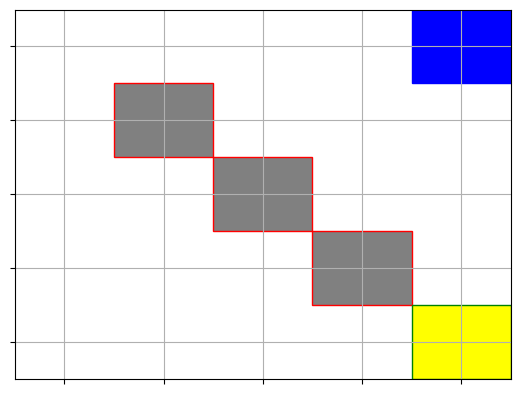

State: [4 1], Action: 0, Reward: -0.1, Done: False


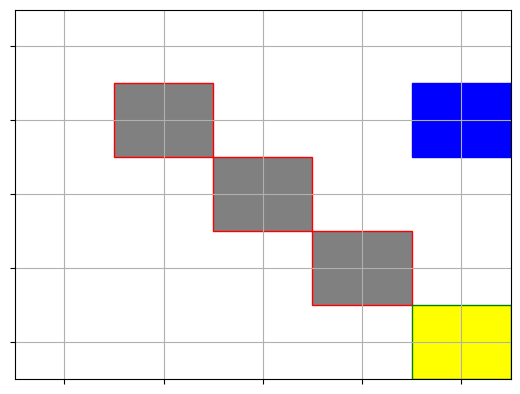

State: [4 1], Action: 1, Reward: -0.1, Done: False


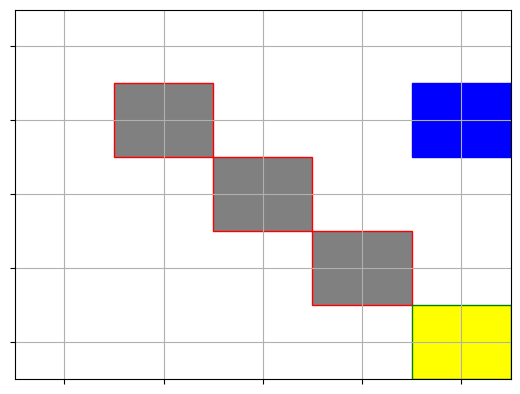

State: [4 0], Action: 2, Reward: -0.1, Done: False


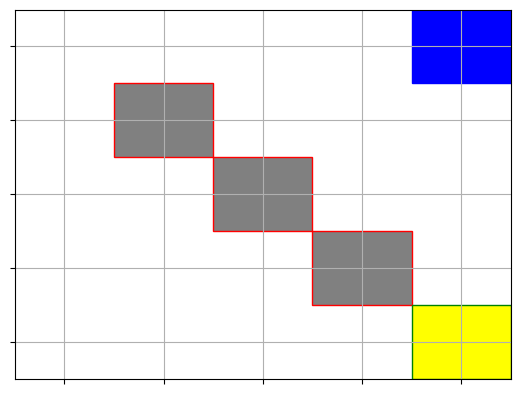

State: [3 0], Action: 3, Reward: -0.1, Done: False


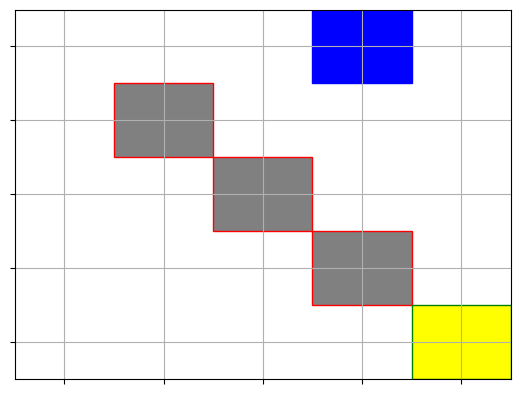

State: [3 0], Action: 2, Reward: -0.1, Done: False


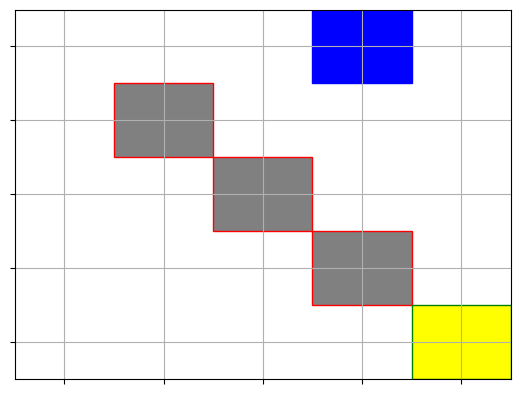

State: [2 0], Action: 3, Reward: -0.1, Done: False


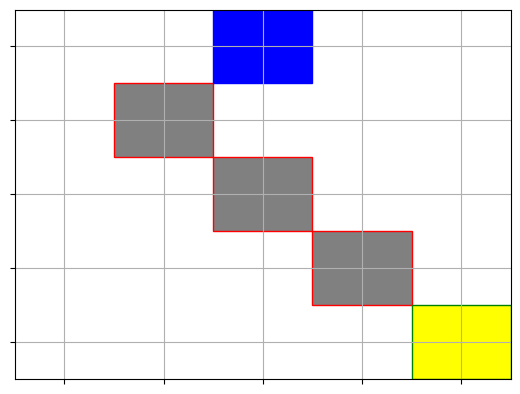

State: [1 0], Action: 3, Reward: -0.1, Done: False


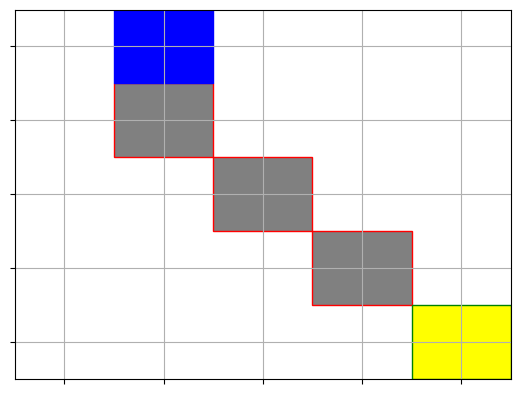

State: [1 0], Action: 2, Reward: -0.1, Done: False


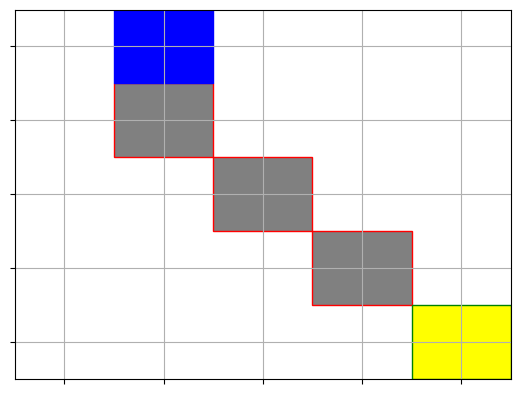

State: [1 0], Action: 0, Reward: -0.1, Done: False


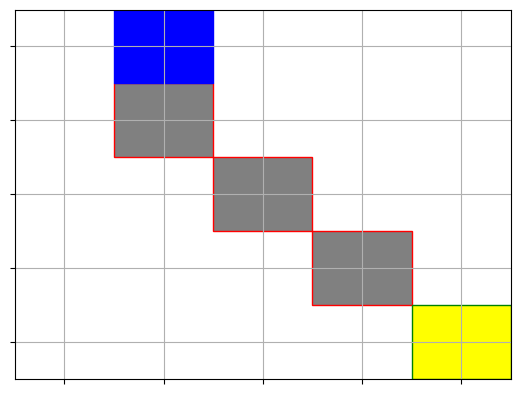

State: [2 0], Action: 1, Reward: -0.1, Done: False


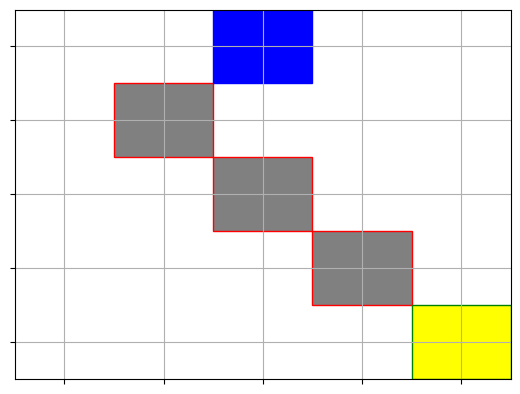

State: [1 0], Action: 3, Reward: -0.1, Done: False


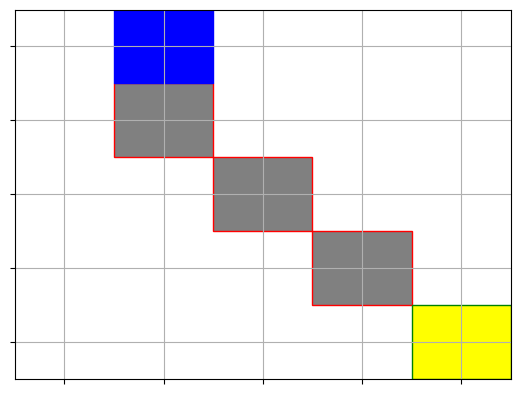

State: [1 0], Action: 0, Reward: -0.1, Done: False


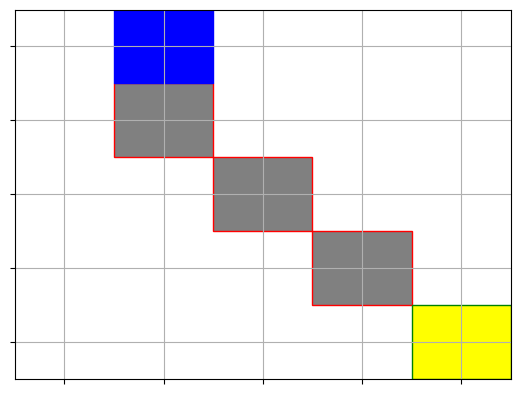

State: [1 0], Action: 2, Reward: -0.1, Done: False


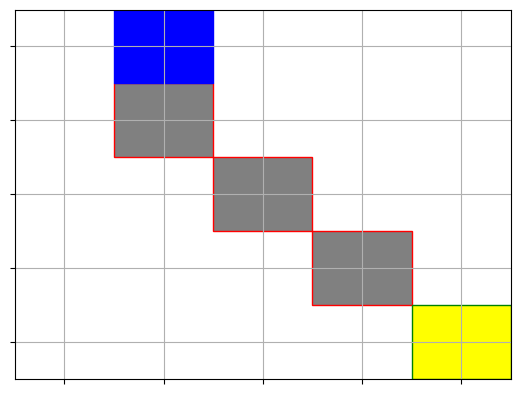

State: [0 0], Action: 3, Reward: -0.1, Done: False


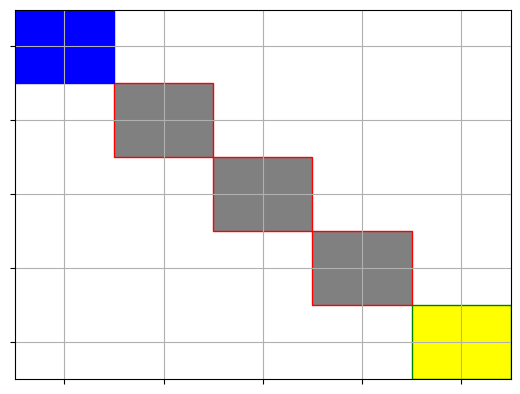

State: [0 0], Action: 2, Reward: -0.1, Done: False


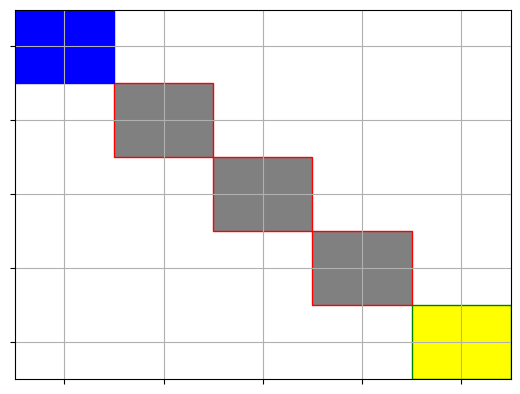

State: [0 0], Action: 2, Reward: -0.1, Done: False


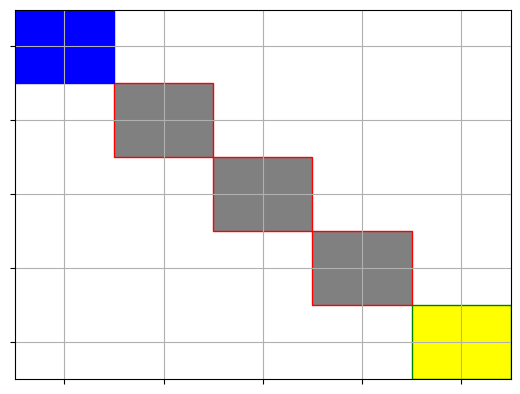

State: [0 0], Action: 2, Reward: -0.1, Done: False


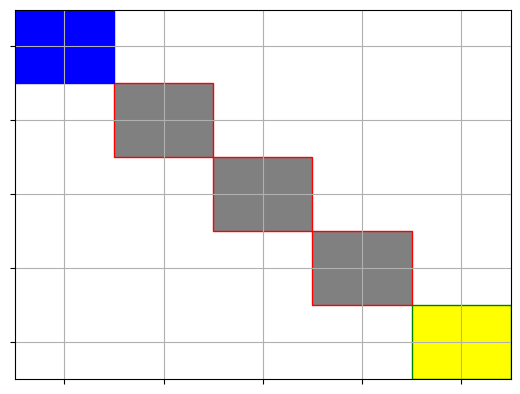

State: [1 0], Action: 1, Reward: -0.1, Done: False


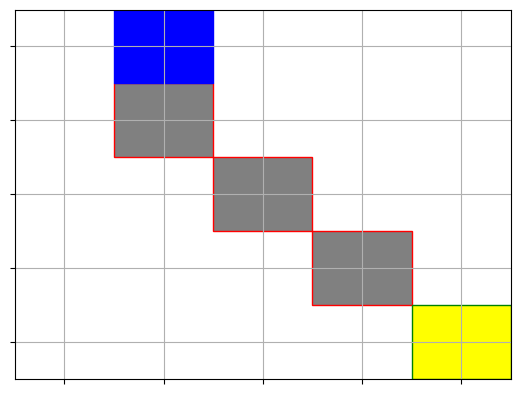

State: [1 0], Action: 0, Reward: -0.1, Done: False


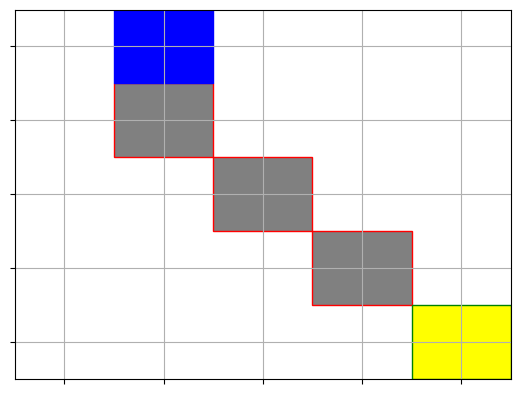

State: [2 0], Action: 1, Reward: -0.1, Done: False


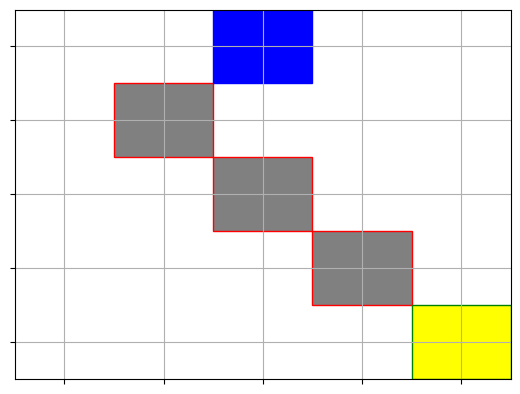

State: [3 0], Action: 1, Reward: -0.1, Done: False


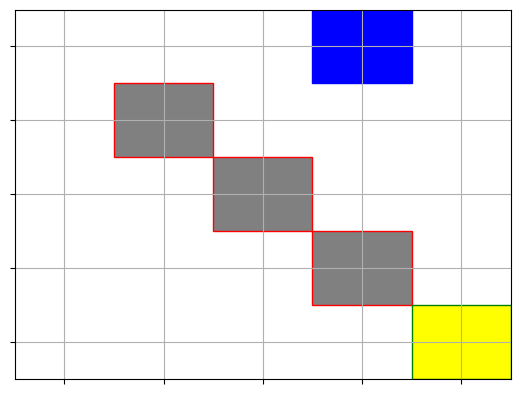

State: [3 0], Action: 2, Reward: -0.1, Done: False


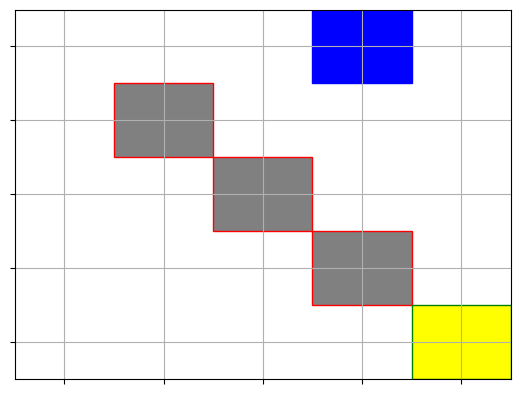

State: [4 0], Action: 1, Reward: -0.1, Done: False


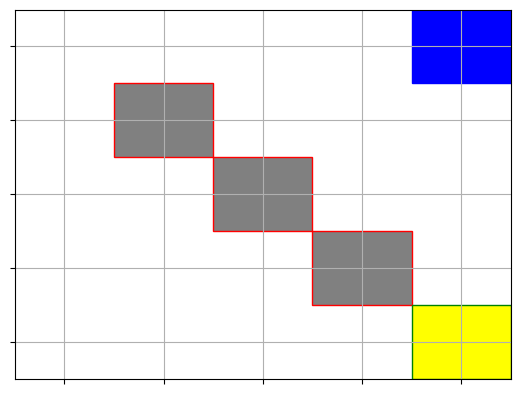

State: [4 0], Action: 1, Reward: -0.1, Done: False


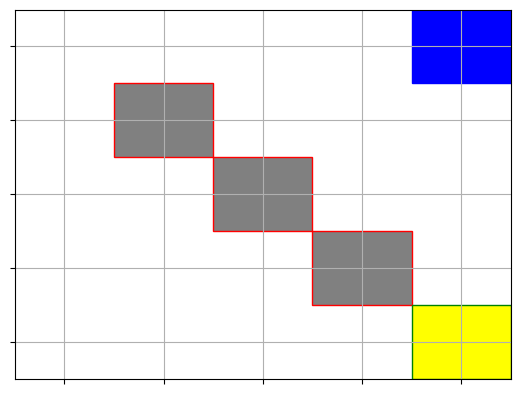

State: [4 0], Action: 1, Reward: -0.1, Done: False


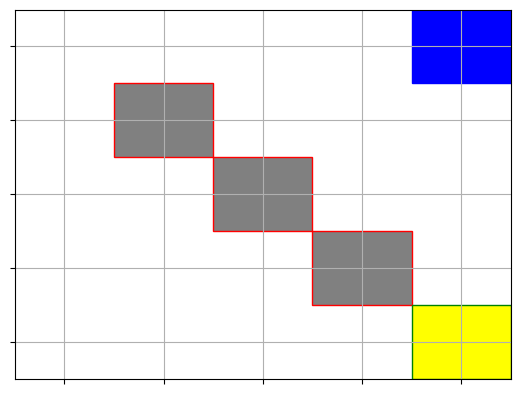

State: [4 1], Action: 0, Reward: -0.1, Done: False


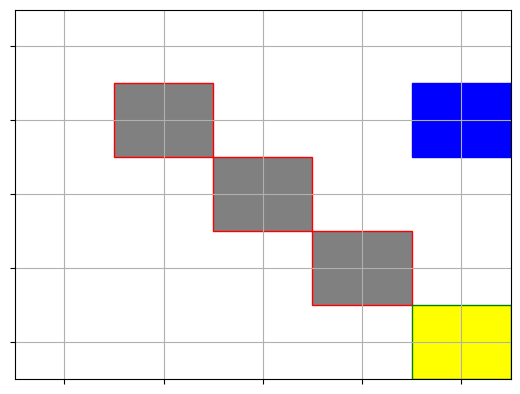

State: [4 1], Action: 1, Reward: -0.1, Done: False


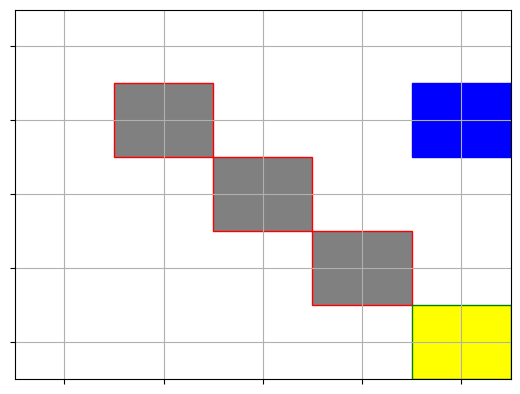

State: [4 1], Action: 1, Reward: -0.1, Done: False


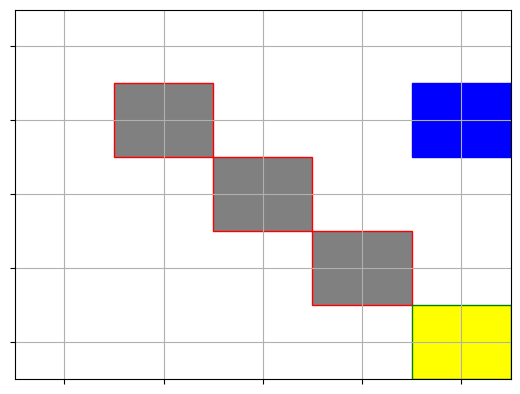

State: [4 0], Action: 2, Reward: -0.1, Done: False


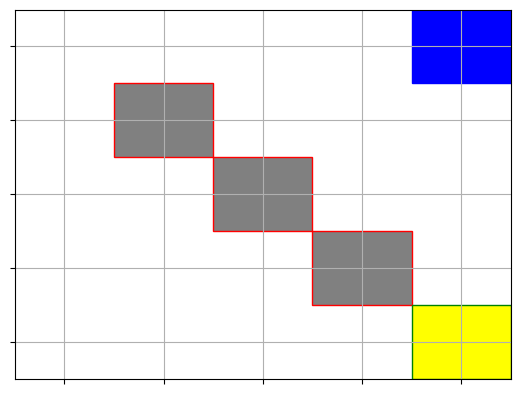

State: [3 0], Action: 3, Reward: -0.1, Done: False


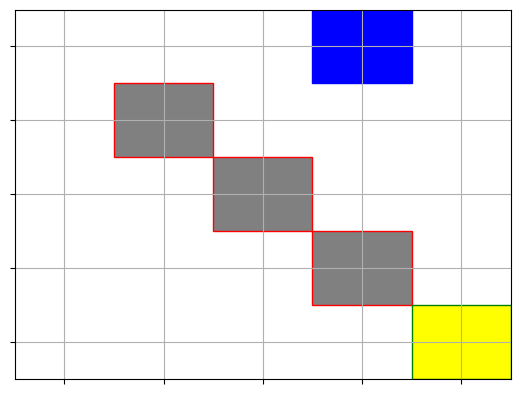

State: [2 0], Action: 3, Reward: -0.1, Done: False


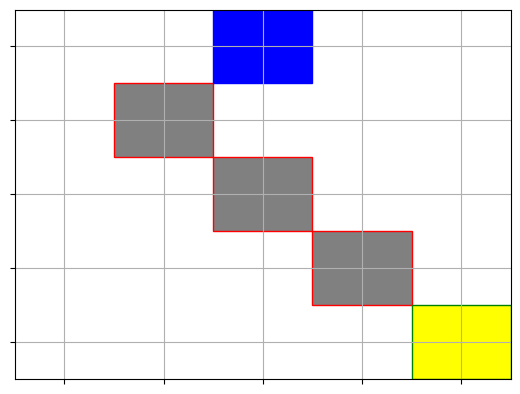

State: [3 0], Action: 1, Reward: -0.1, Done: False


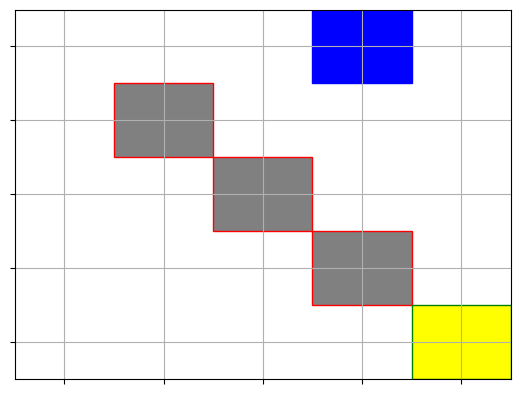

State: [3 1], Action: 0, Reward: -0.1, Done: False


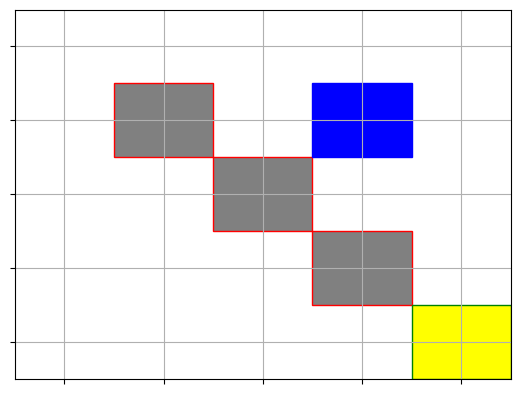

State: [4 1], Action: 1, Reward: -0.1, Done: False


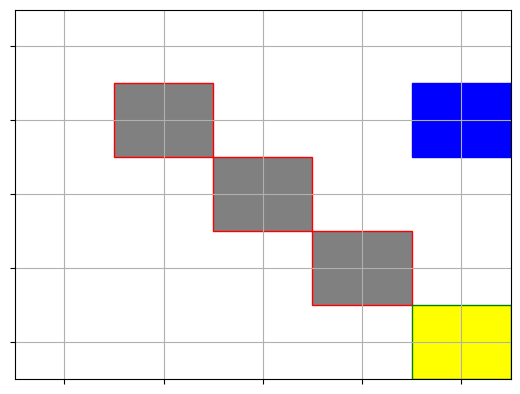

State: [4 0], Action: 2, Reward: -0.1, Done: False


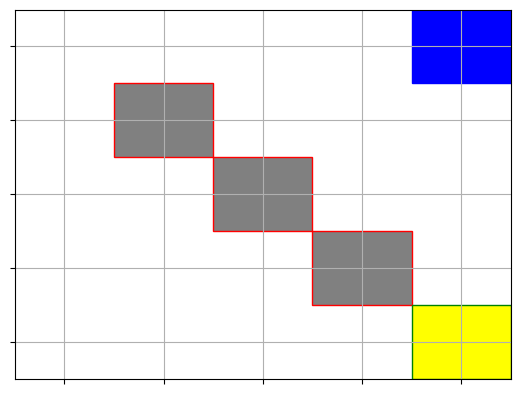

State: [3 0], Action: 3, Reward: -0.1, Done: False


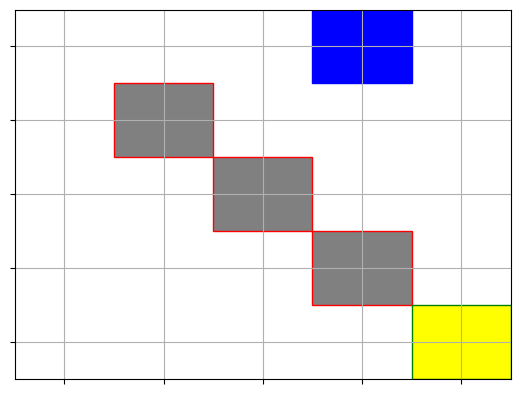

State: [3 1], Action: 0, Reward: -0.1, Done: False


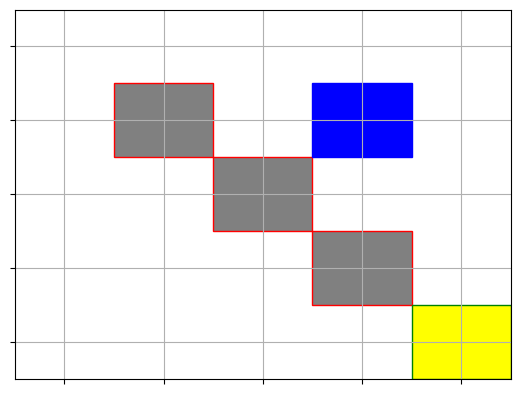

State: [4 1], Action: 1, Reward: -0.1, Done: False


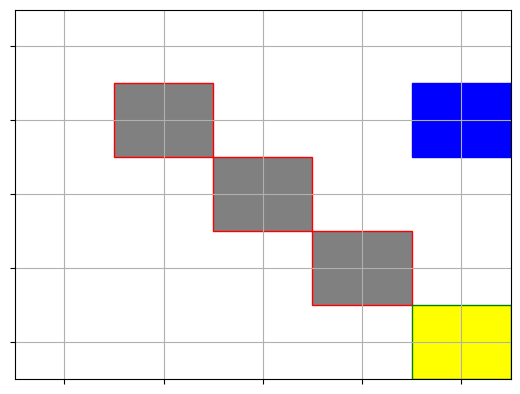

State: [3 1], Action: 3, Reward: -0.1, Done: False


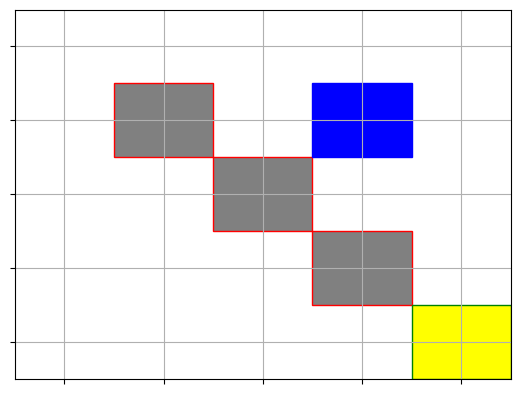

State: [2 1], Action: 3, Reward: -0.1, Done: False


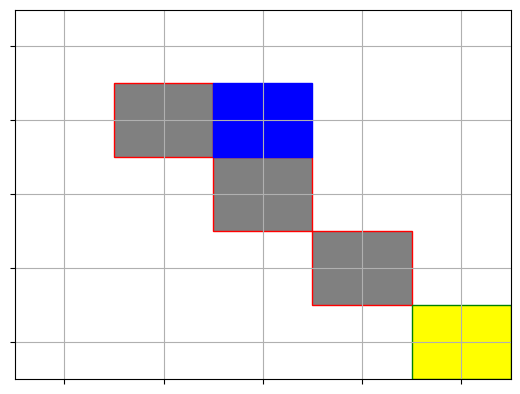

State: [3 1], Action: 1, Reward: -0.1, Done: False


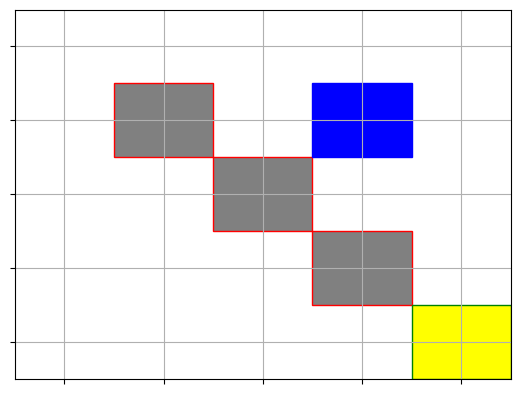

State: [2 1], Action: 3, Reward: -0.1, Done: False


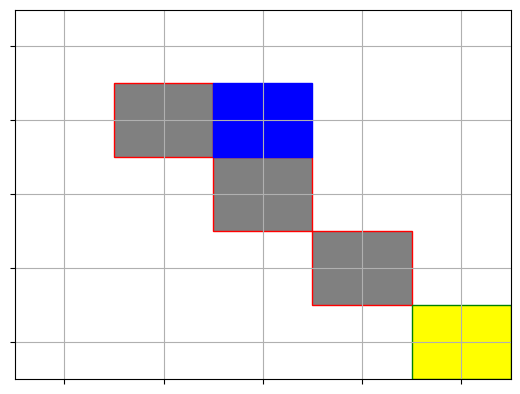

State: [2 1], Action: 3, Reward: -0.1, Done: False


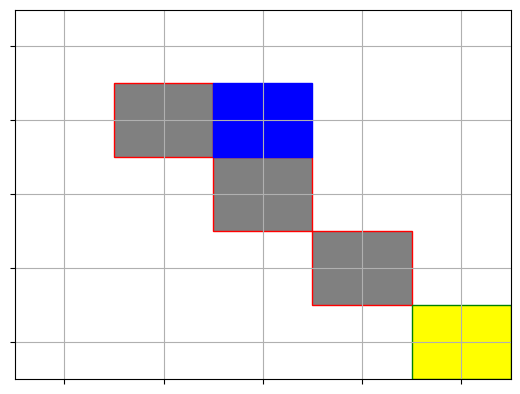

State: [3 1], Action: 1, Reward: -0.1, Done: False


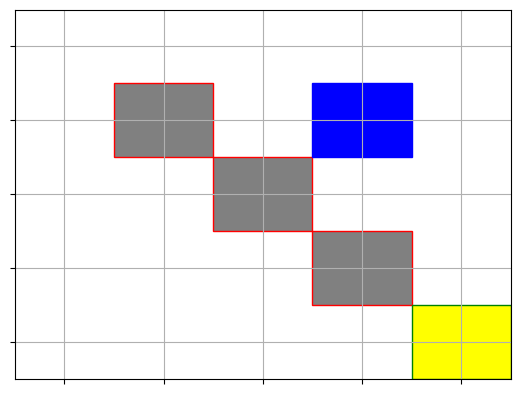

State: [3 0], Action: 2, Reward: -0.1, Done: False


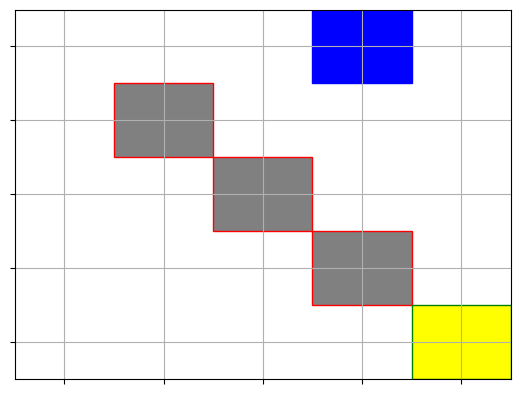

State: [4 0], Action: 1, Reward: -0.1, Done: False


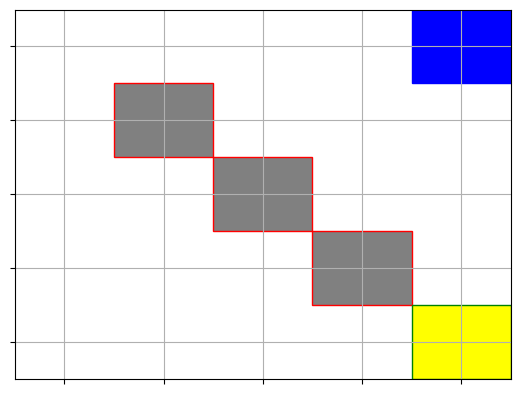

State: [4 1], Action: 0, Reward: -0.1, Done: False


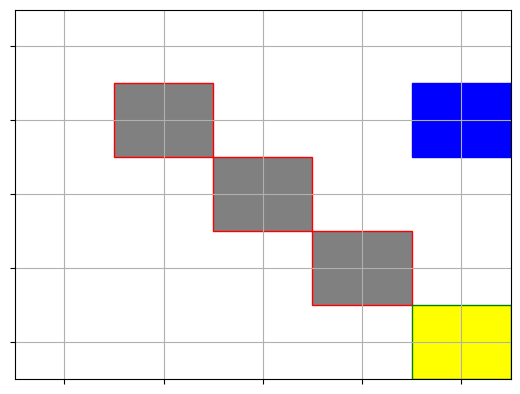

State: [3 1], Action: 3, Reward: -0.1, Done: False


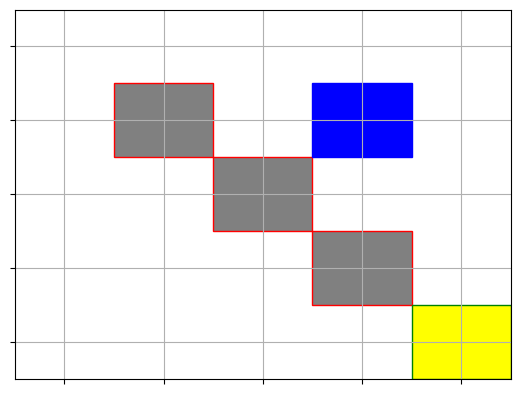

State: [4 1], Action: 1, Reward: -0.1, Done: False


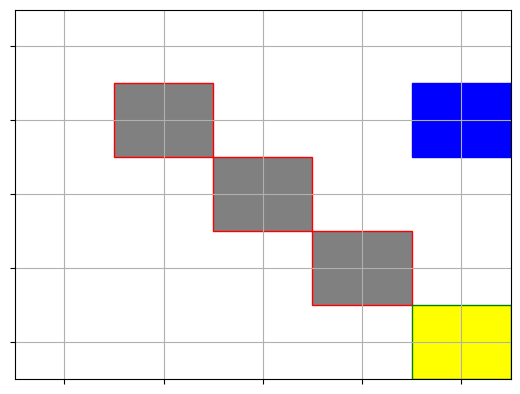

State: [4 0], Action: 2, Reward: -0.1, Done: False


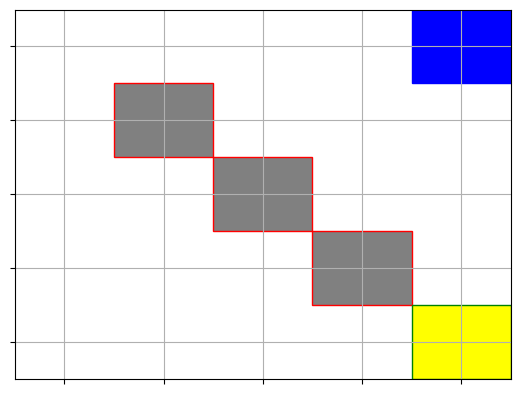

State: [3 0], Action: 3, Reward: -0.1, Done: False


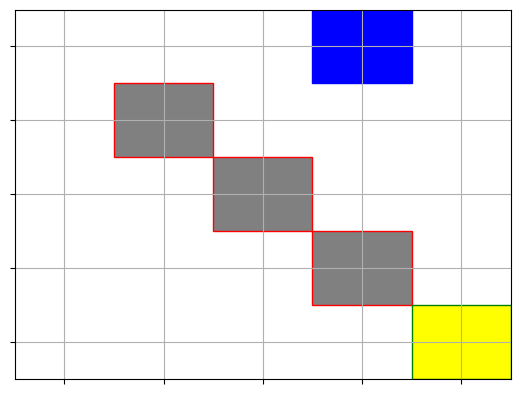

State: [4 0], Action: 1, Reward: -0.1, Done: False


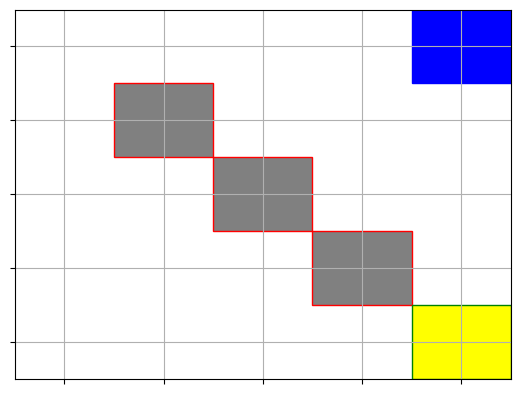

State: [4 0], Action: 2, Reward: -0.1, Done: False


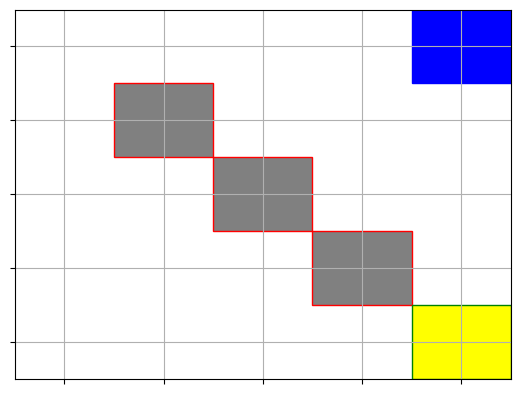

State: [4 0], Action: 1, Reward: -0.1, Done: False


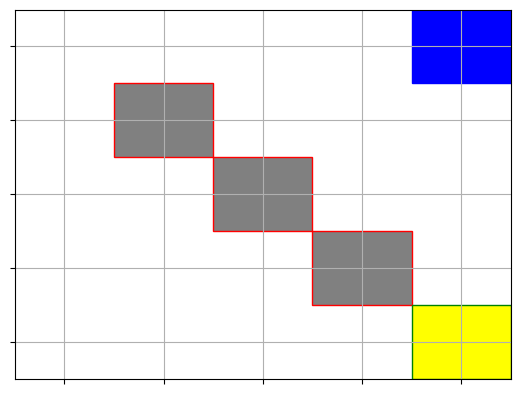

State: [4 1], Action: 0, Reward: -0.1, Done: False


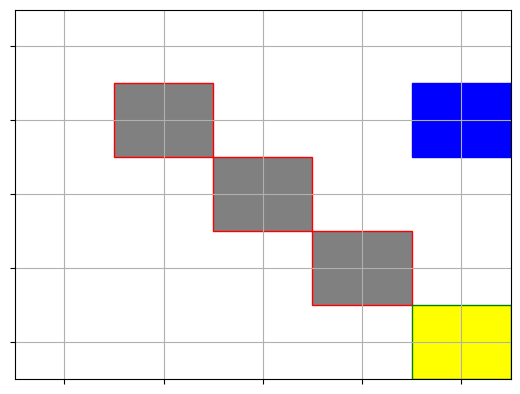

State: [4 1], Action: 1, Reward: -0.1, Done: False


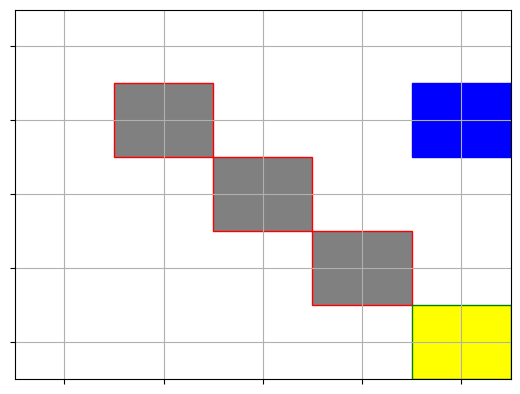

State: [4 2], Action: 0, Reward: -0.1, Done: False


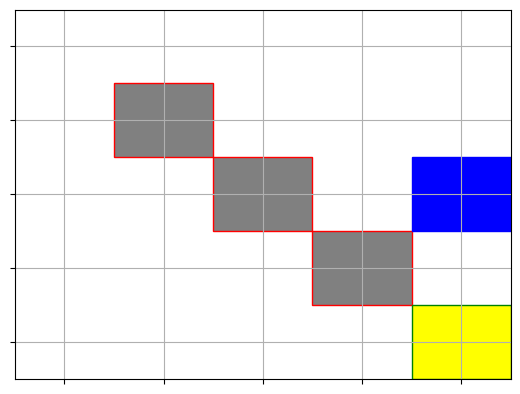

State: [4 1], Action: 2, Reward: -0.1, Done: False


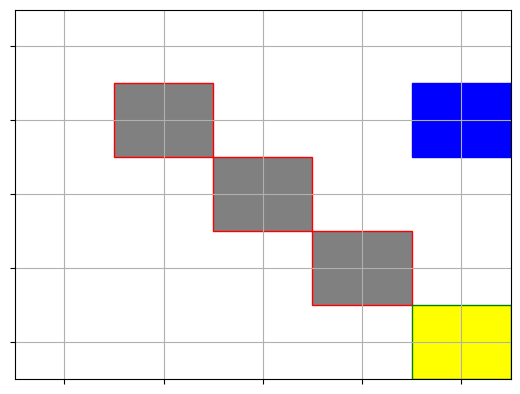

State: [4 1], Action: 1, Reward: -0.1, Done: False


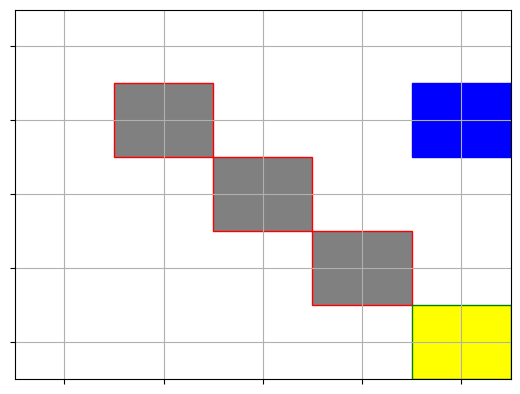

State: [4 2], Action: 0, Reward: -0.1, Done: False


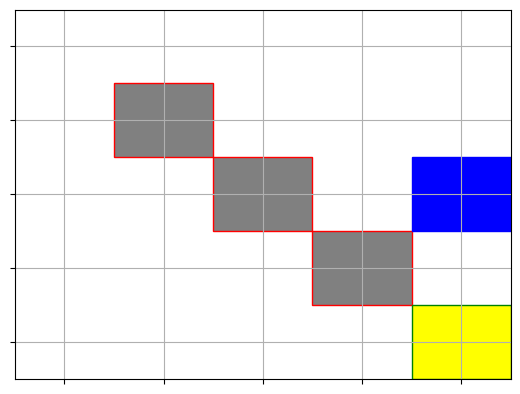

State: [4 1], Action: 2, Reward: -0.1, Done: False


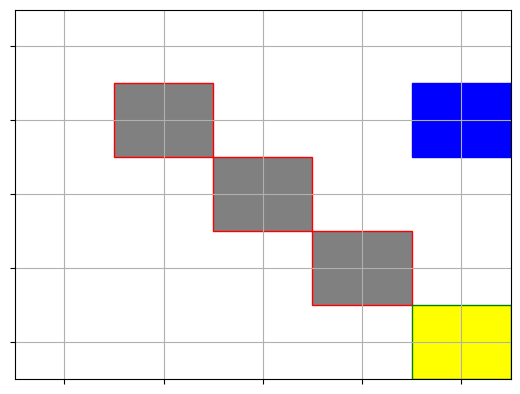

State: [4 0], Action: 2, Reward: -0.1, Done: False


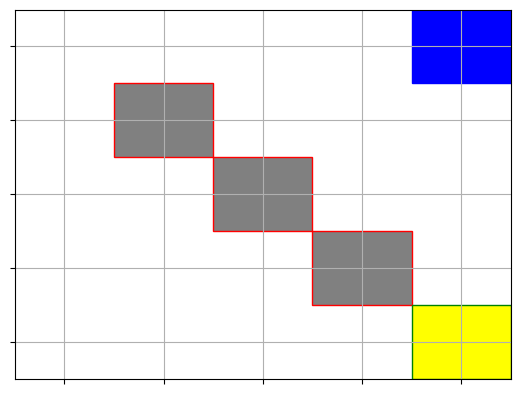

State: [4 1], Action: 0, Reward: -0.1, Done: False


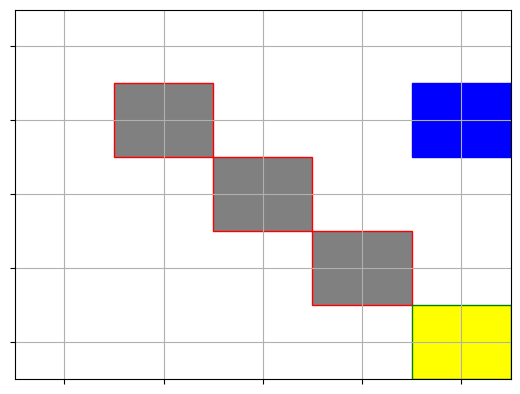

State: [3 1], Action: 3, Reward: -0.1, Done: False


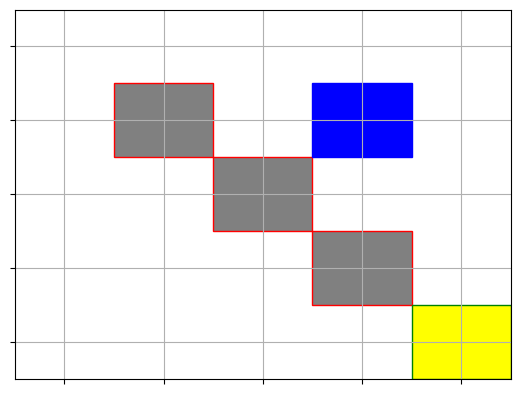

State: [3 0], Action: 2, Reward: -0.1, Done: False


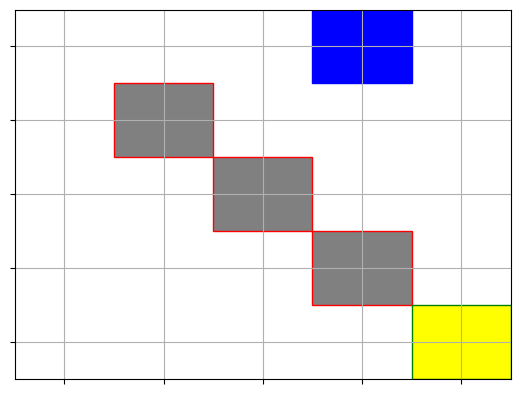

State: [3 1], Action: 0, Reward: -0.1, Done: False


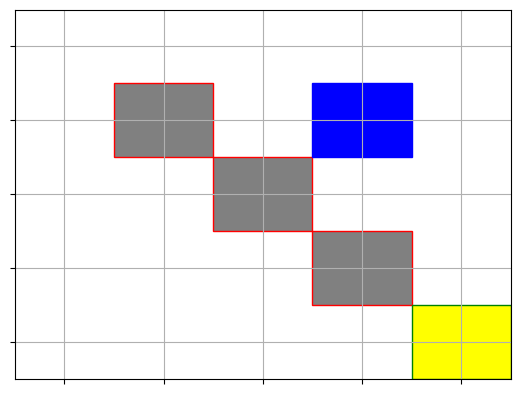

State: [4 1], Action: 1, Reward: -0.1, Done: False


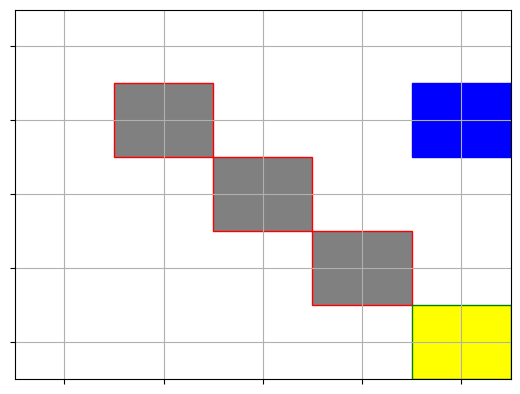

State: [4 1], Action: 1, Reward: -0.1, Done: False


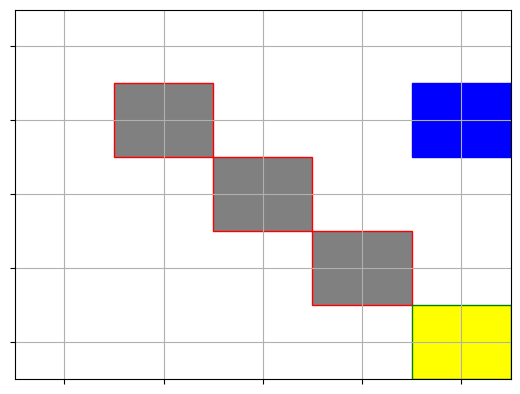

State: [3 1], Action: 3, Reward: -0.1, Done: False


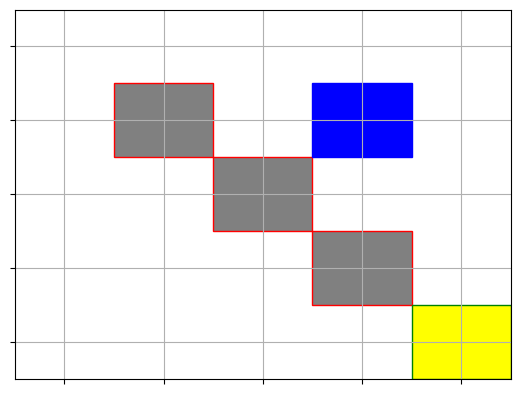

State: [3 0], Action: 2, Reward: -0.1, Done: False


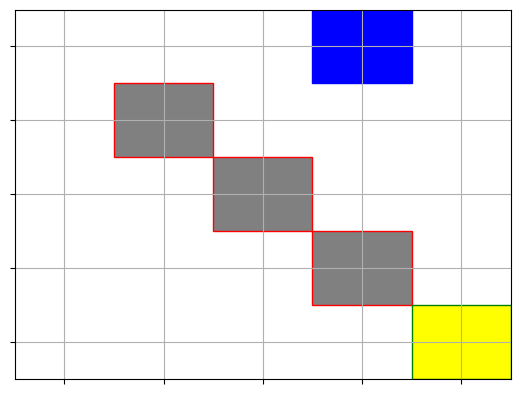

State: [2 0], Action: 3, Reward: -0.1, Done: False


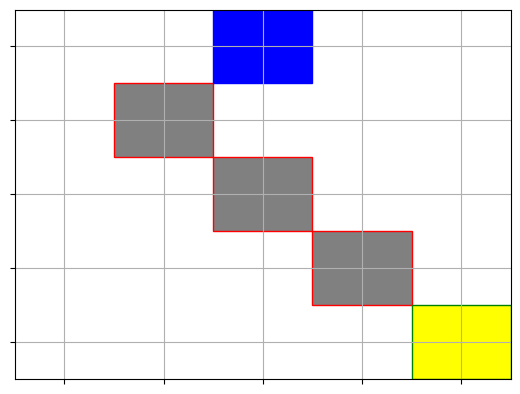

State: [2 1], Action: 0, Reward: -0.1, Done: False


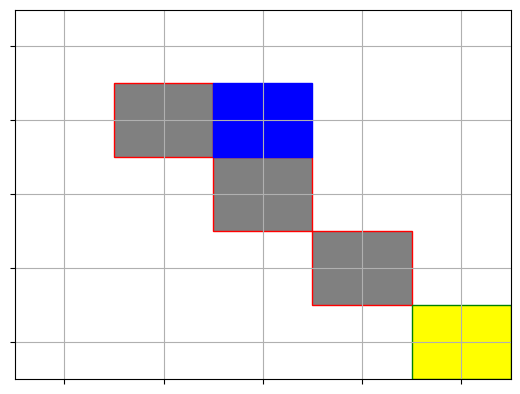

State: [2 1], Action: 3, Reward: -0.1, Done: False


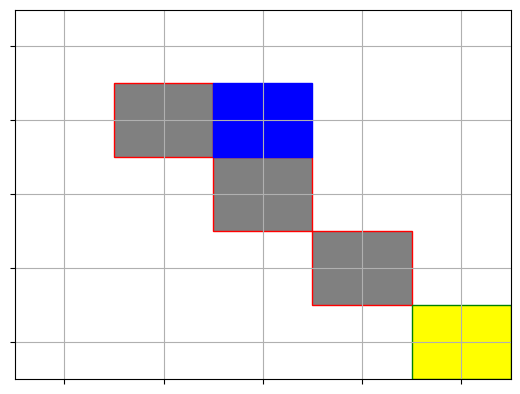

State: [2 1], Action: 0, Reward: -0.1, Done: False


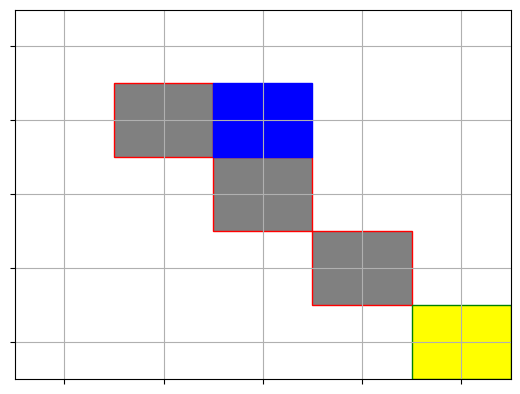

State: [3 1], Action: 1, Reward: -0.1, Done: False


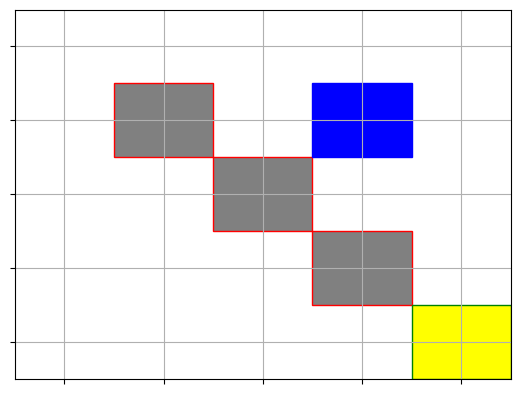

State: [3 2], Action: 0, Reward: -0.1, Done: False


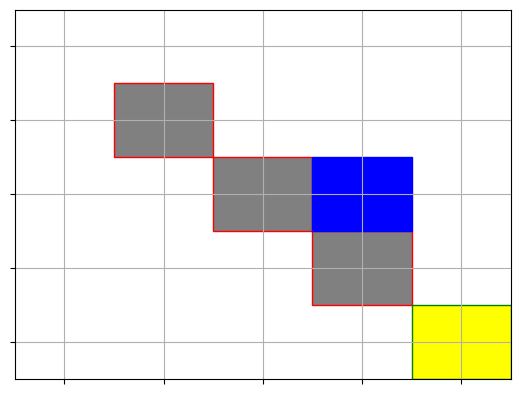

State: [4 2], Action: 1, Reward: -0.1, Done: False


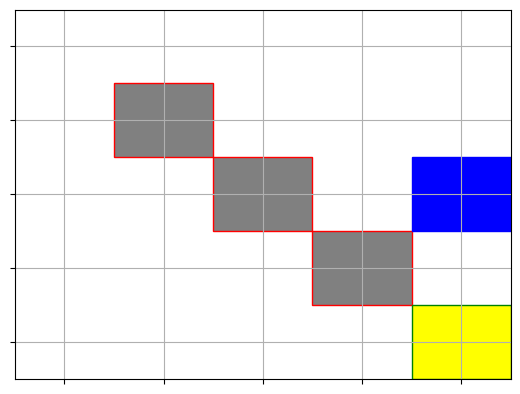

State: [4 2], Action: 1, Reward: -0.1, Done: False


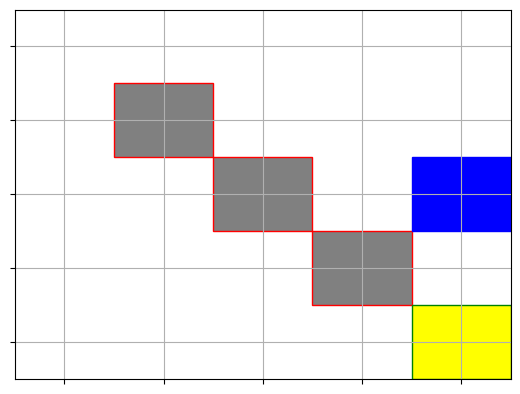

State: [4 2], Action: 1, Reward: -0.1, Done: False


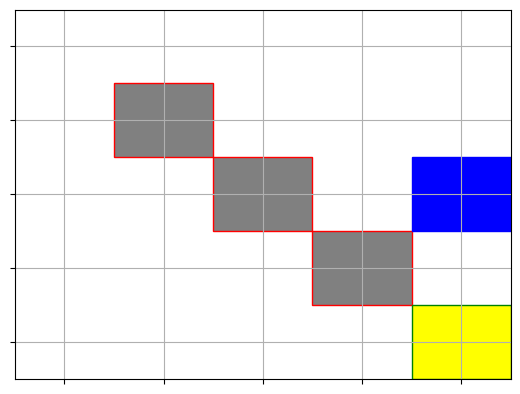

State: [3 2], Action: 3, Reward: -0.1, Done: False


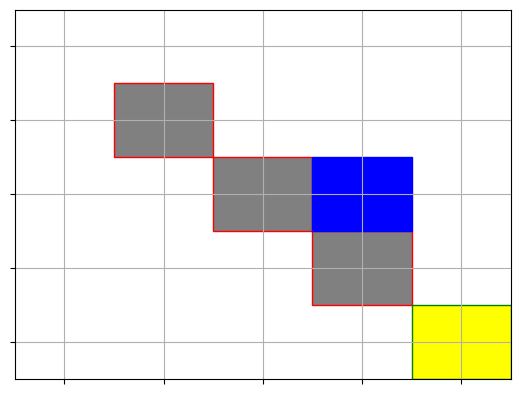

State: [3 1], Action: 2, Reward: -0.1, Done: False


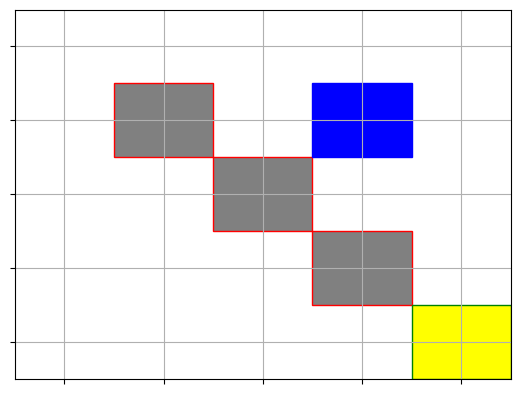

State: [3 0], Action: 2, Reward: -0.1, Done: False


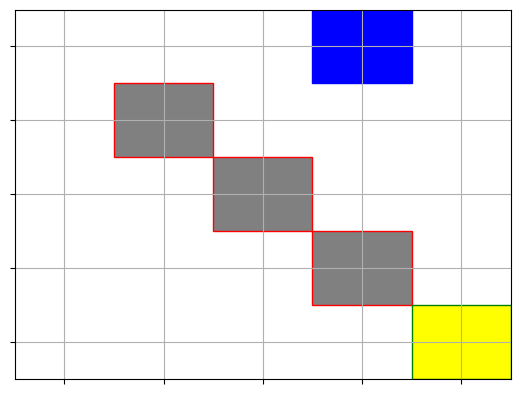

State: [2 0], Action: 3, Reward: -0.1, Done: False


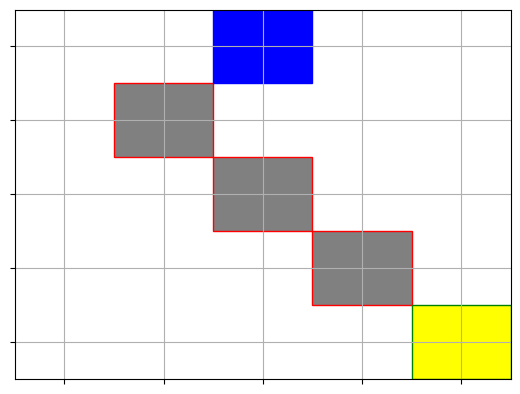

State: [3 0], Action: 1, Reward: -0.1, Done: False


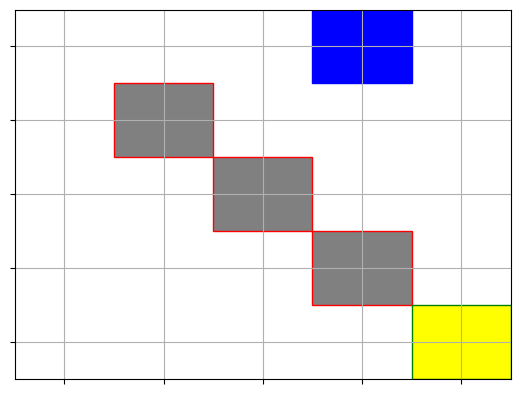

State: [3 0], Action: 2, Reward: -0.1, Done: False


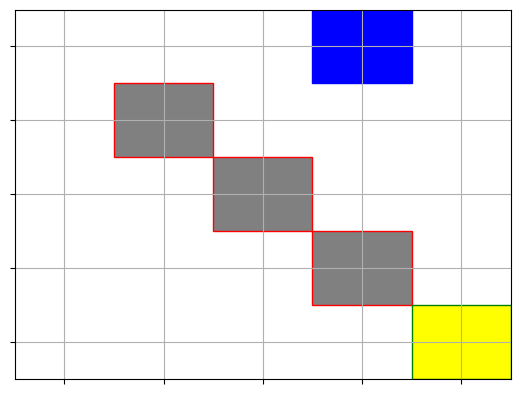

State: [3 0], Action: 2, Reward: -0.1, Done: False


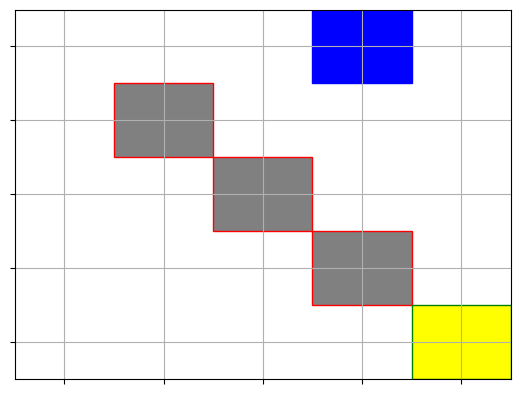

State: [4 0], Action: 1, Reward: -0.1, Done: False


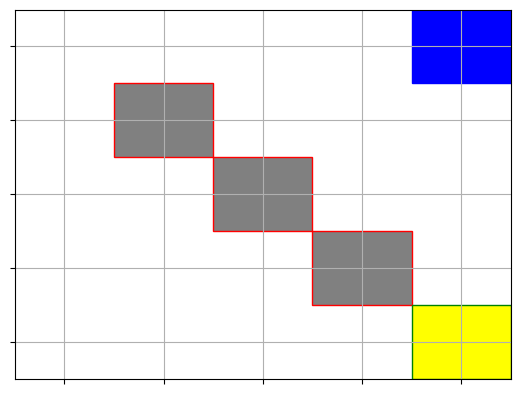

State: [4 1], Action: 0, Reward: -0.1, Done: False


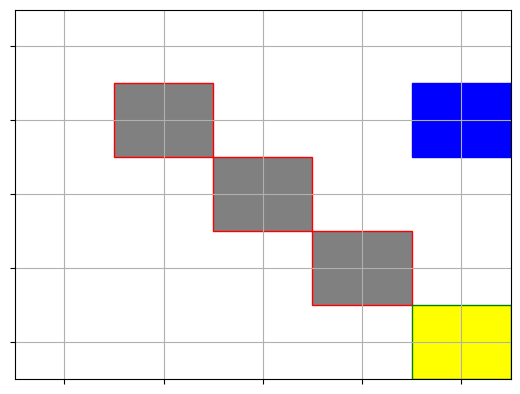

State: [4 1], Action: 1, Reward: -0.1, Done: False


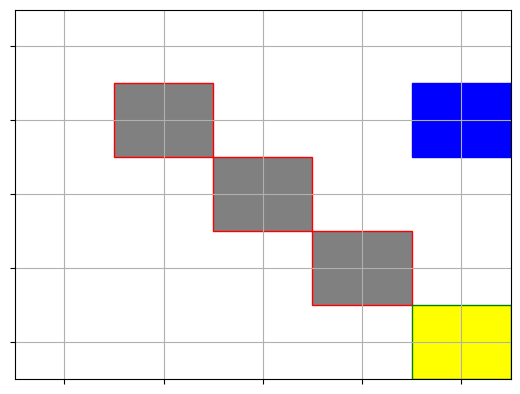

State: [4 0], Action: 2, Reward: -0.1, Done: False


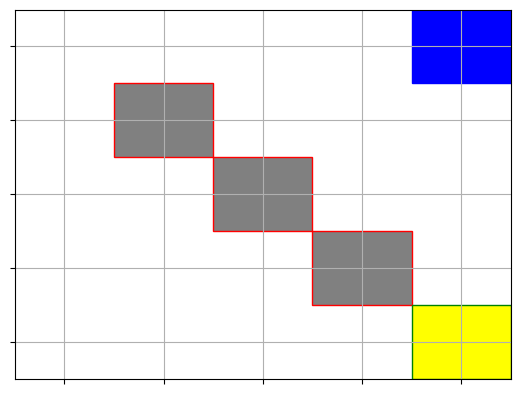

State: [4 1], Action: 0, Reward: -0.1, Done: False


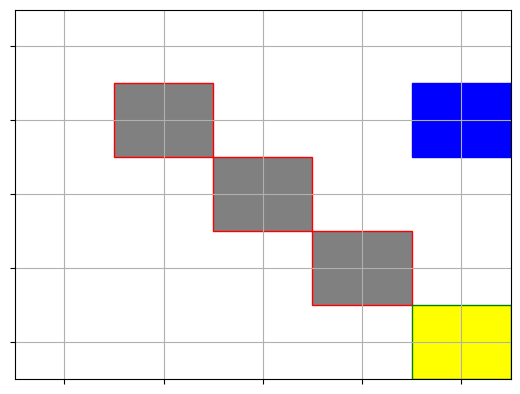

State: [4 1], Action: 1, Reward: -0.1, Done: False


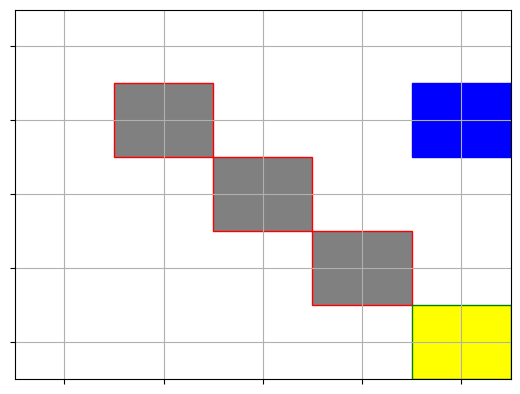

State: [4 1], Action: 1, Reward: -0.1, Done: False


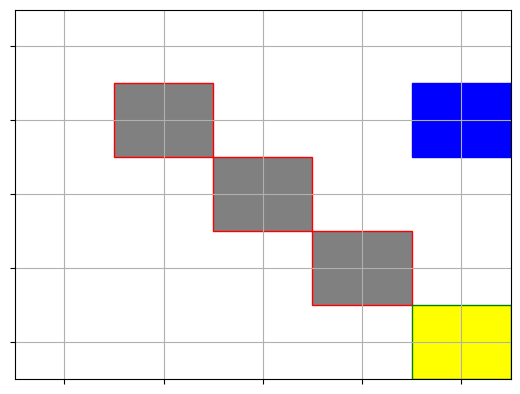

State: [4 0], Action: 2, Reward: -0.1, Done: False


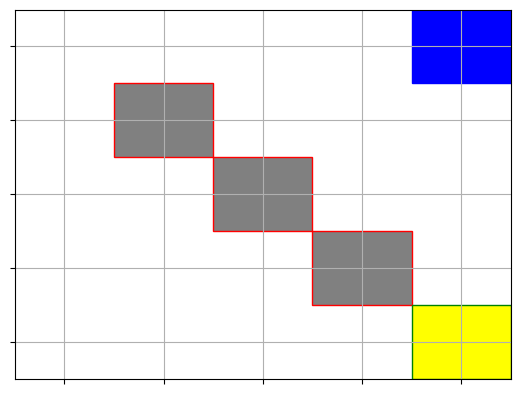

State: [4 0], Action: 2, Reward: -0.1, Done: False


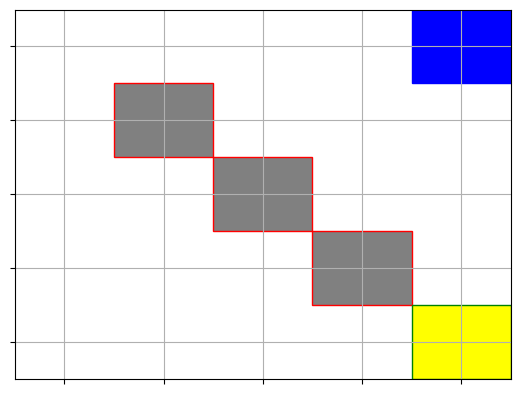

State: [4 0], Action: 1, Reward: -0.1, Done: False


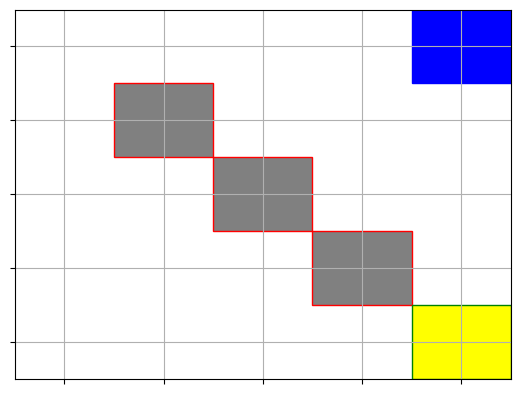

State: [4 1], Action: 0, Reward: -0.1, Done: False


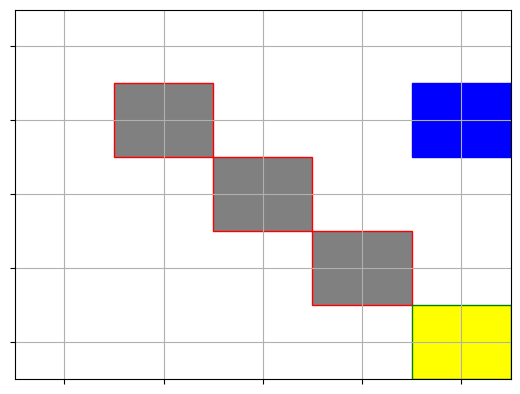

State: [4 2], Action: 0, Reward: -0.1, Done: False


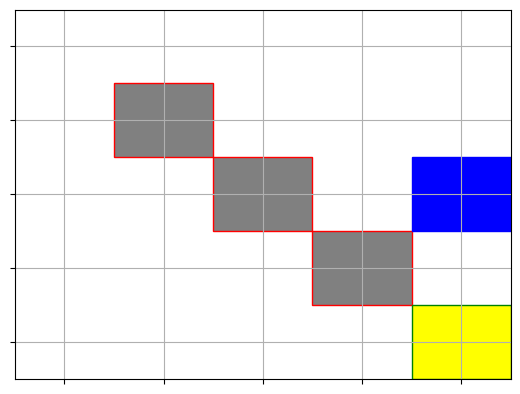

State: [3 2], Action: 3, Reward: -0.1, Done: False


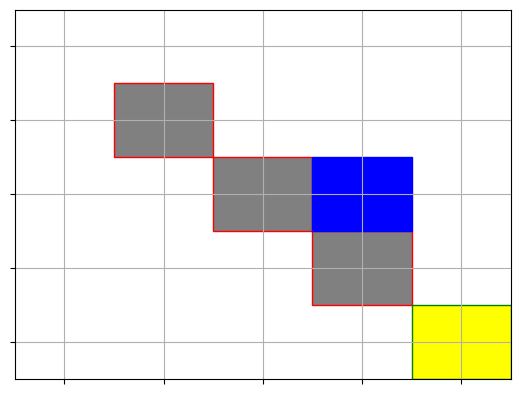

State: [3 1], Action: 2, Reward: -0.1, Done: False


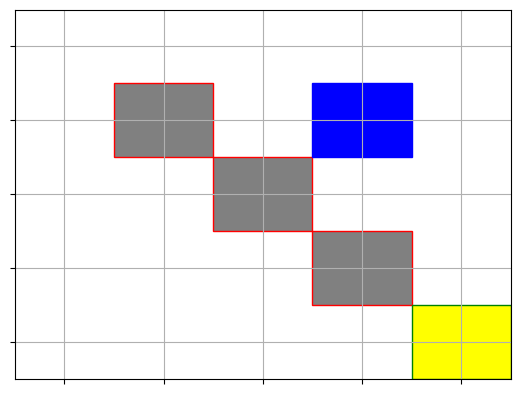

State: [4 1], Action: 1, Reward: -0.1, Done: False


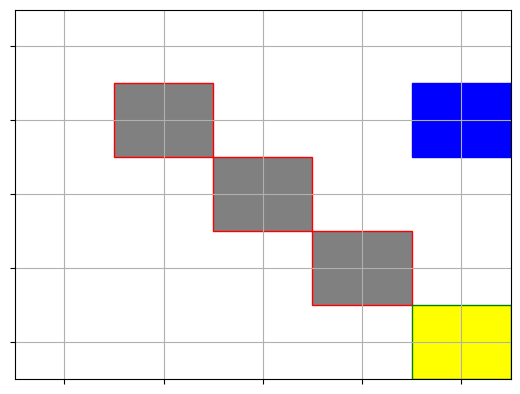

State: [4 1], Action: 1, Reward: -0.1, Done: False


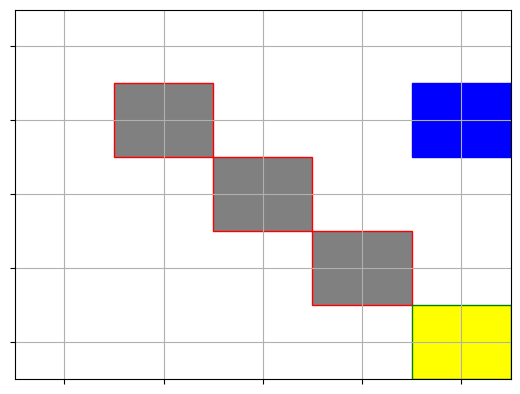

State: [3 1], Action: 3, Reward: -0.1, Done: False


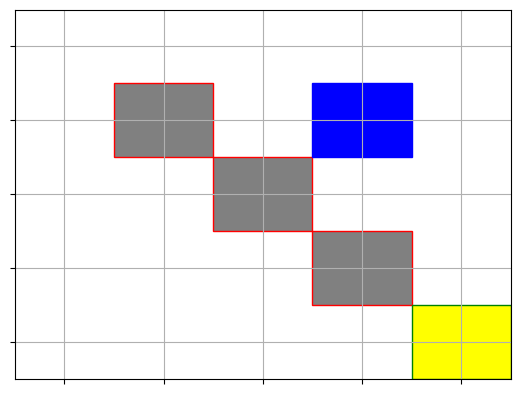

State: [3 0], Action: 2, Reward: -0.1, Done: False


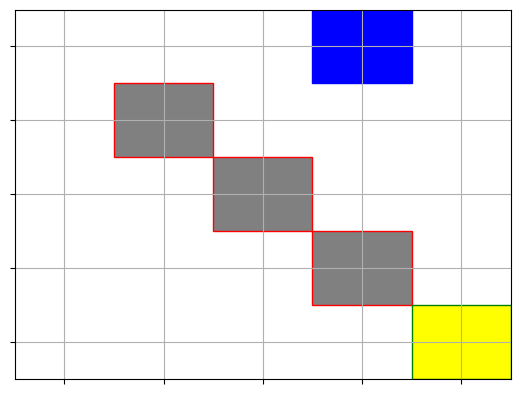

State: [4 0], Action: 1, Reward: -0.1, Done: False


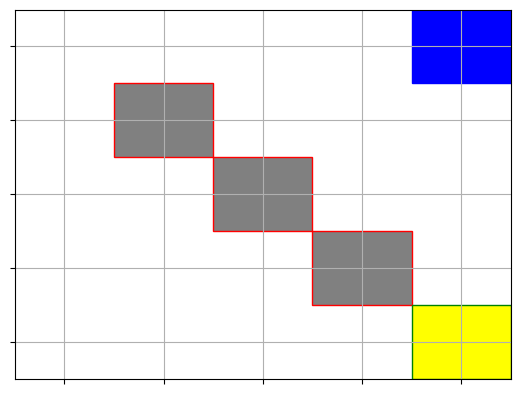

State: [4 1], Action: 0, Reward: -0.1, Done: False


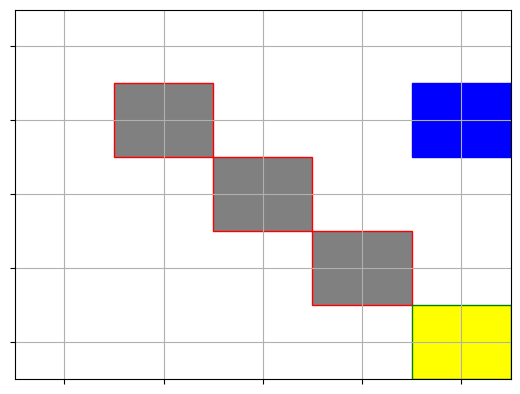

State: [4 0], Action: 2, Reward: -0.1, Done: False


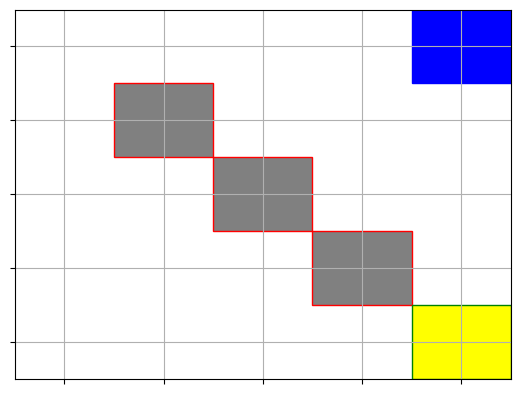

State: [3 0], Action: 3, Reward: -0.1, Done: False


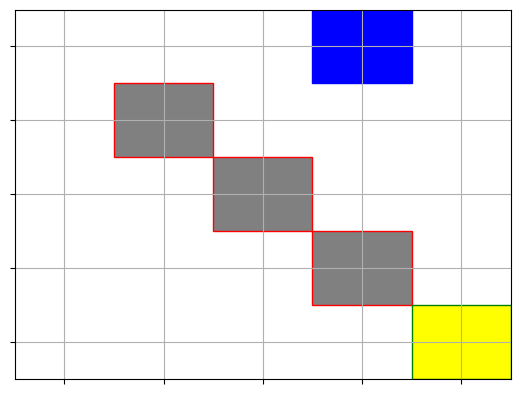

State: [3 0], Action: 2, Reward: -0.1, Done: False


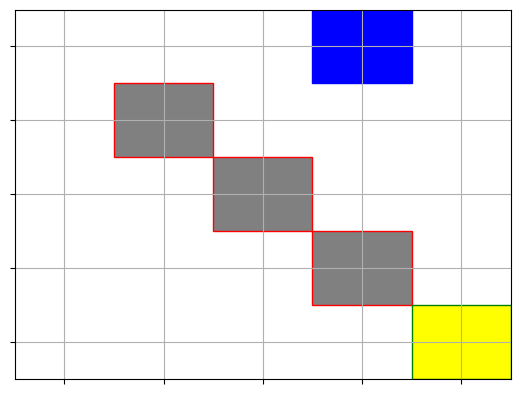

State: [4 0], Action: 1, Reward: -0.1, Done: False


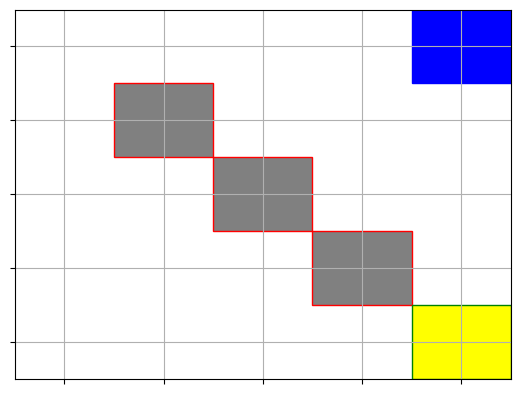

State: [4 1], Action: 0, Reward: -0.1, Done: False


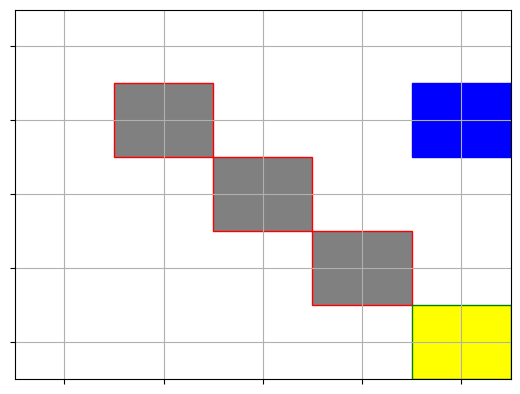

State: [4 1], Action: 1, Reward: -0.1, Done: False


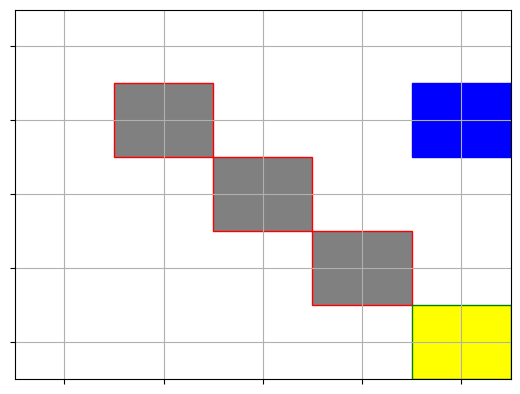

State: [4 1], Action: 1, Reward: -0.1, Done: False


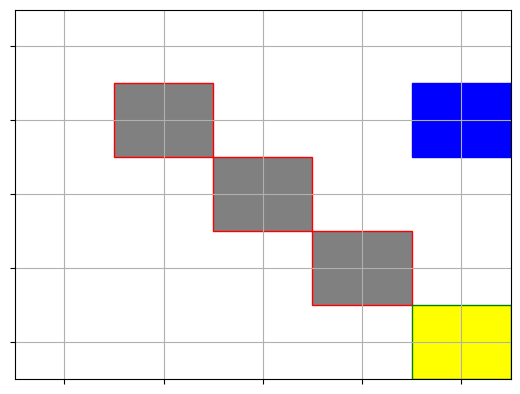

State: [3 1], Action: 3, Reward: -0.1, Done: False


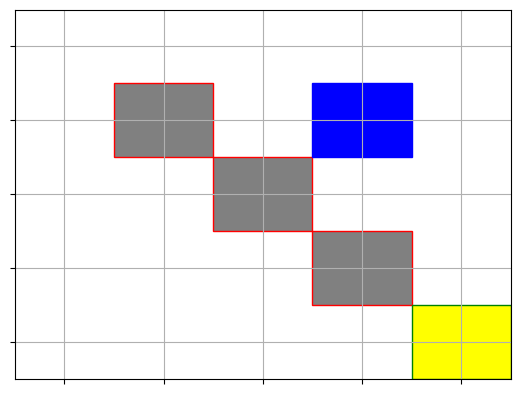

State: [4 1], Action: 1, Reward: -0.1, Done: False


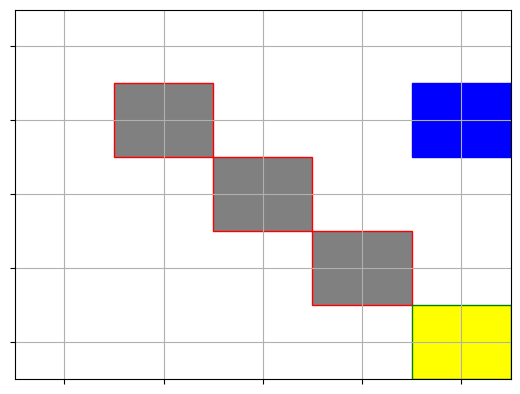

State: [4 0], Action: 2, Reward: -0.1, Done: False


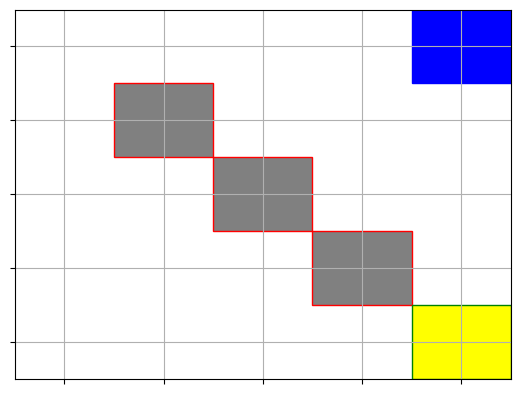

State: [4 1], Action: 0, Reward: -0.1, Done: False


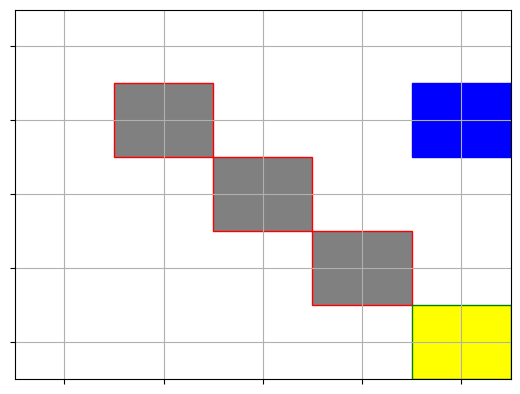

State: [3 1], Action: 3, Reward: -0.1, Done: False


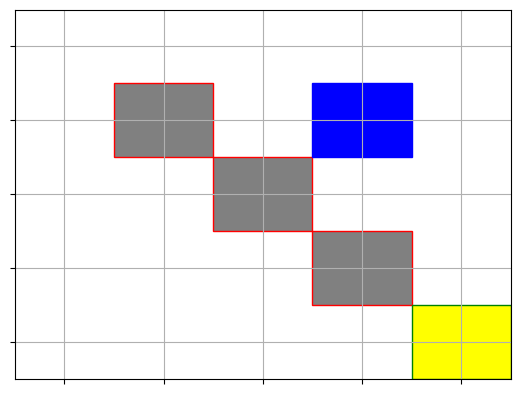

State: [4 1], Action: 1, Reward: -0.1, Done: False


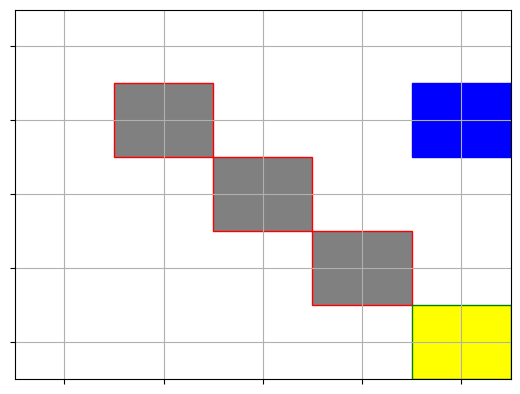

State: [4 0], Action: 2, Reward: -0.1, Done: False


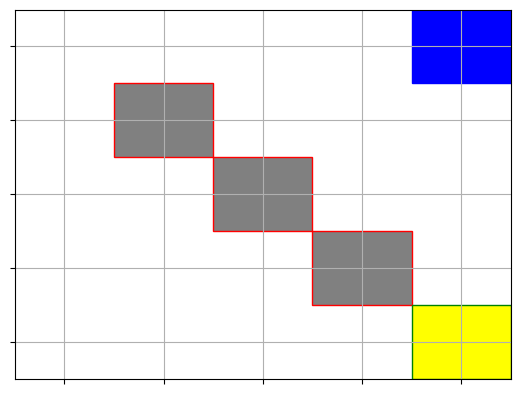

State: [4 1], Action: 0, Reward: -0.1, Done: False


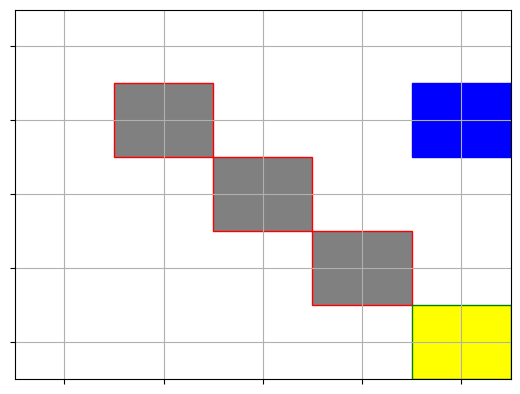

State: [4 1], Action: 1, Reward: -0.1, Done: False


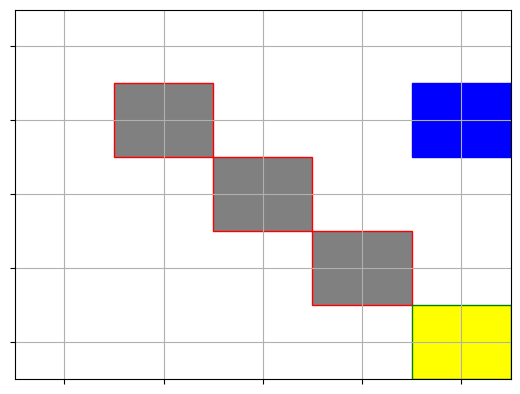

State: [3 1], Action: 3, Reward: -0.1, Done: False


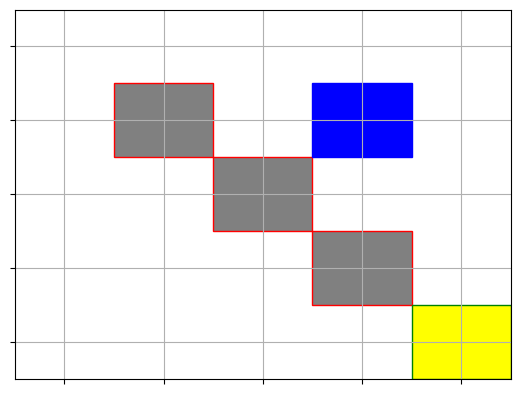

State: [2 1], Action: 3, Reward: -0.1, Done: False


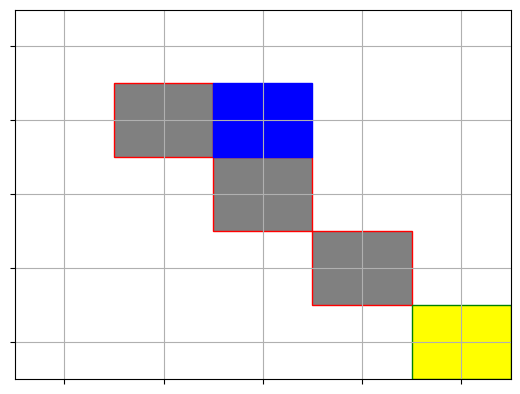

State: [2 0], Action: 2, Reward: -0.1, Done: False


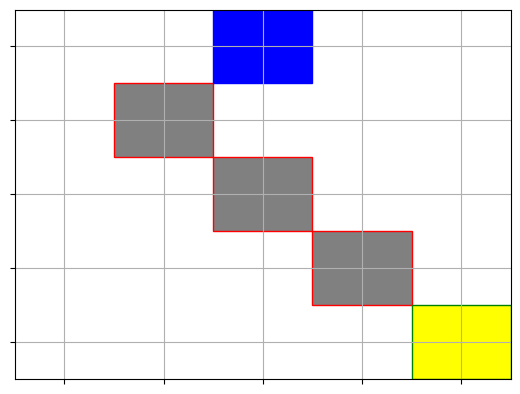

State: [2 0], Action: 2, Reward: -0.1, Done: False


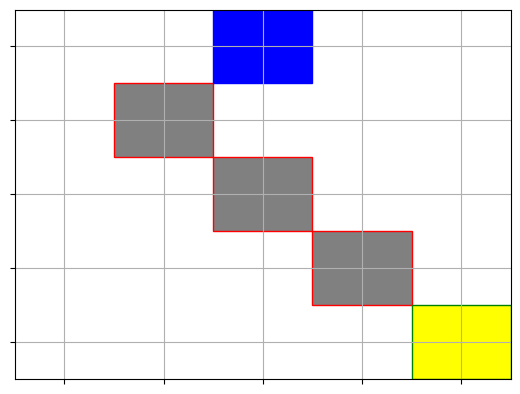

State: [2 0], Action: 2, Reward: -0.1, Done: False


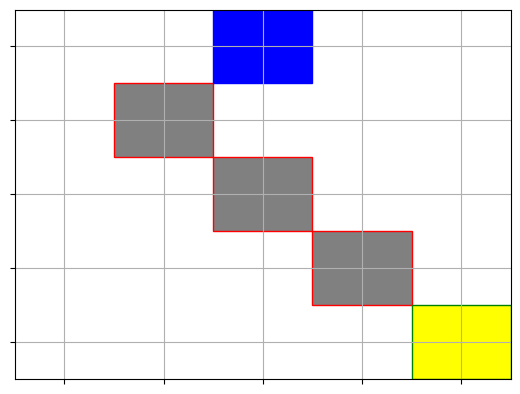

State: [3 0], Action: 1, Reward: -0.1, Done: False


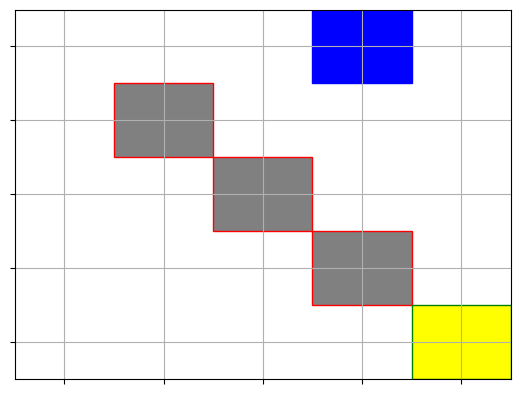

State: [3 1], Action: 0, Reward: -0.1, Done: False


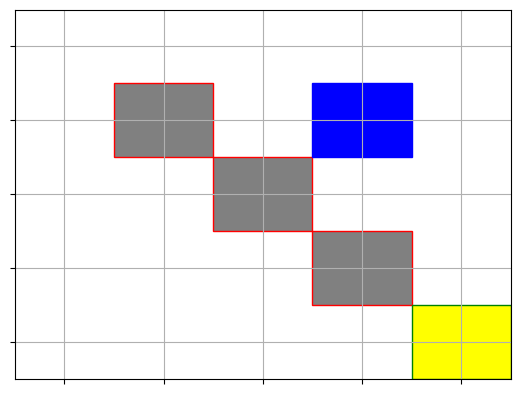

State: [3 0], Action: 2, Reward: -0.1, Done: False


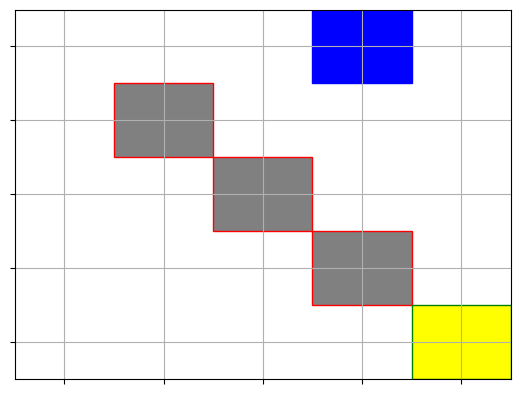

State: [2 0], Action: 3, Reward: -0.1, Done: False


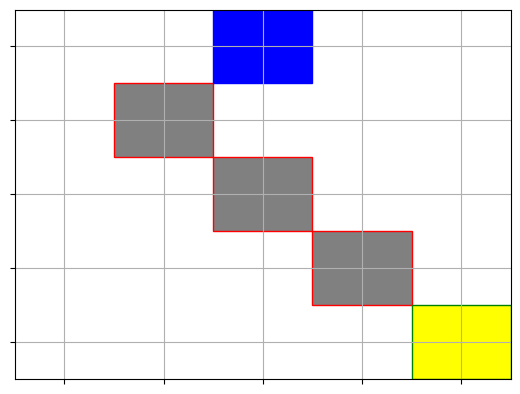

State: [2 0], Action: 2, Reward: -0.1, Done: False


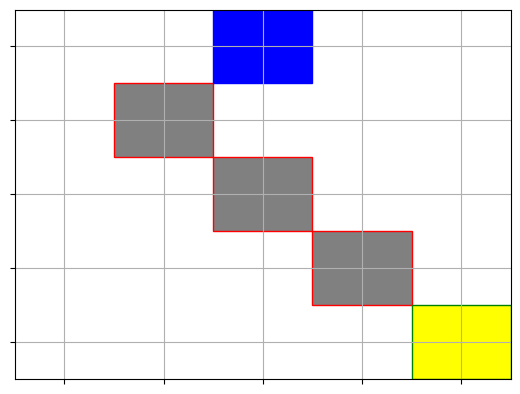

State: [2 1], Action: 0, Reward: -0.1, Done: False


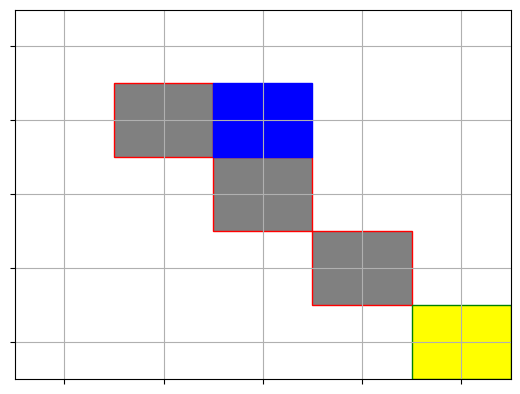

State: [2 0], Action: 2, Reward: -0.1, Done: False


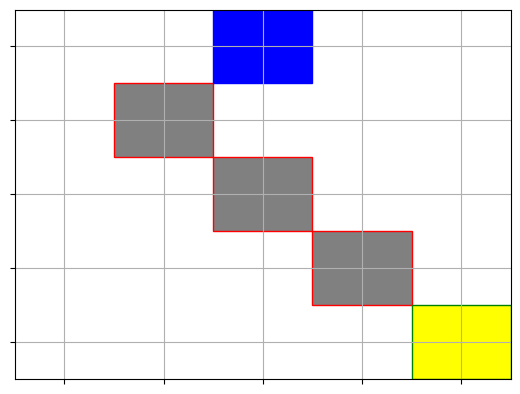

State: [2 0], Action: 2, Reward: -0.1, Done: False


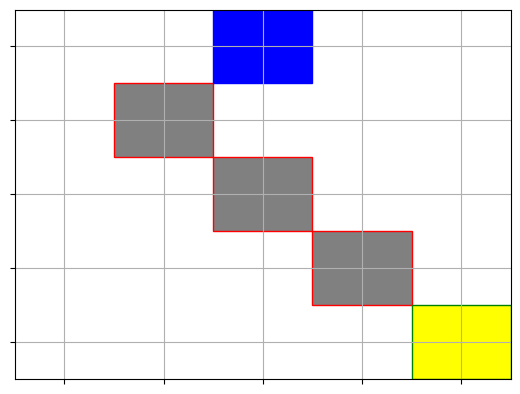

State: [2 0], Action: 2, Reward: -0.1, Done: False


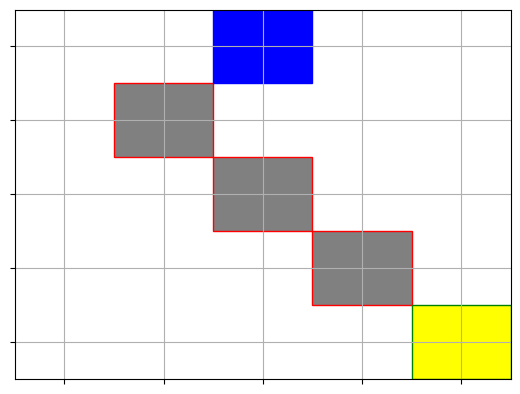

State: [2 1], Action: 0, Reward: -0.1, Done: False


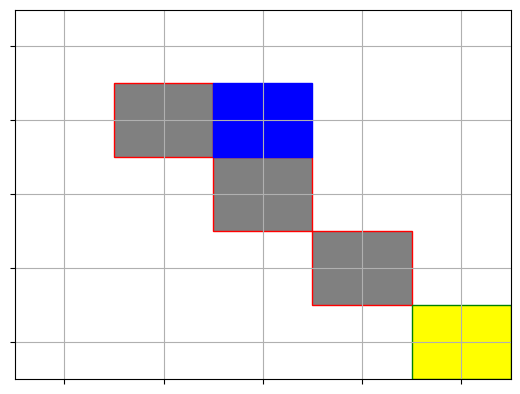

State: [2 0], Action: 2, Reward: -0.1, Done: False


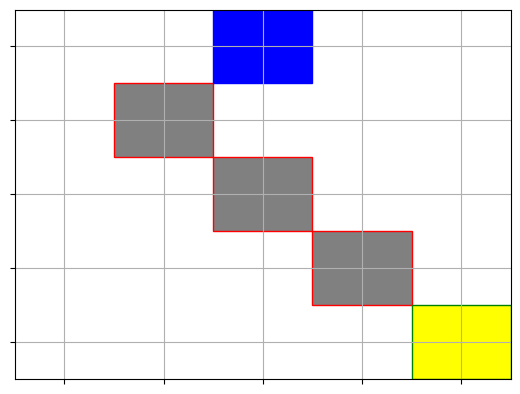

State: [2 0], Action: 2, Reward: -0.1, Done: False


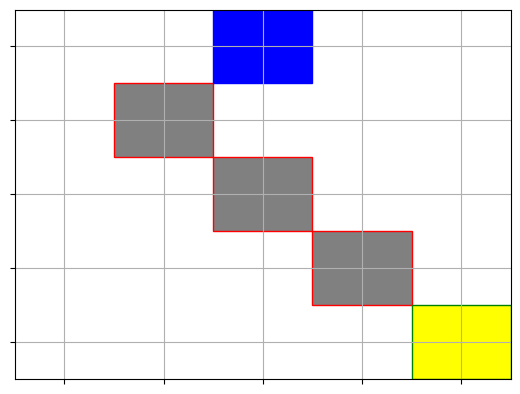

State: [2 1], Action: 0, Reward: -0.1, Done: False


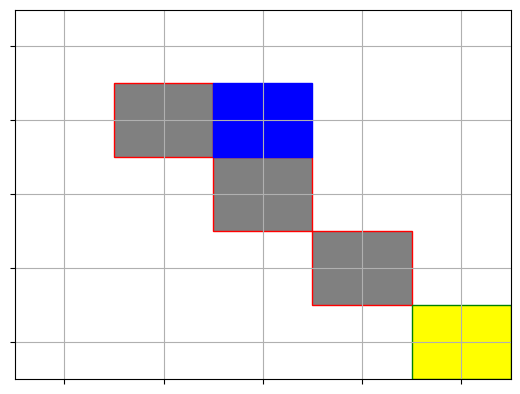

State: [2 1], Action: 3, Reward: -0.1, Done: False


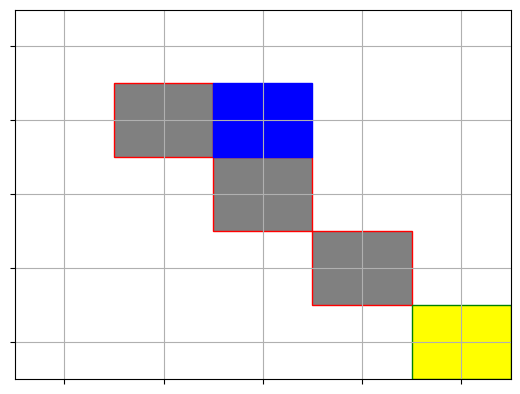

State: [2 1], Action: 0, Reward: -0.1, Done: False


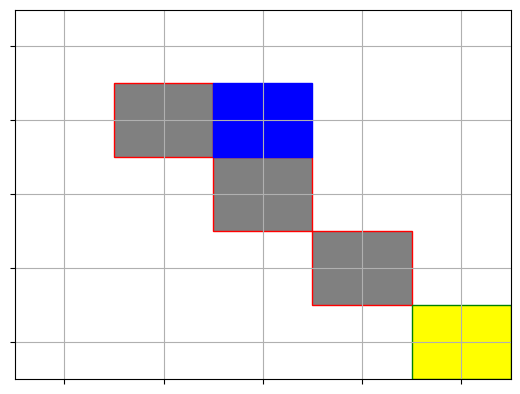

State: [3 1], Action: 1, Reward: -0.1, Done: False


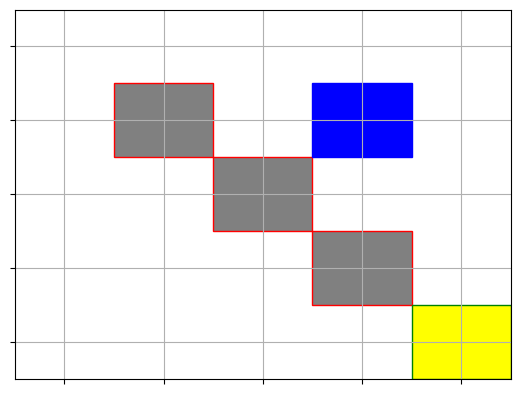

State: [3 2], Action: 0, Reward: -0.1, Done: False


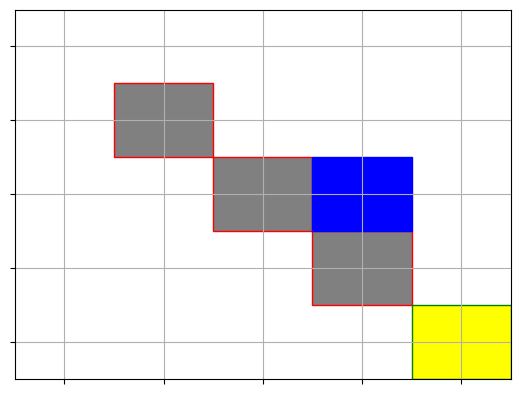

State: [3 1], Action: 2, Reward: -0.1, Done: False


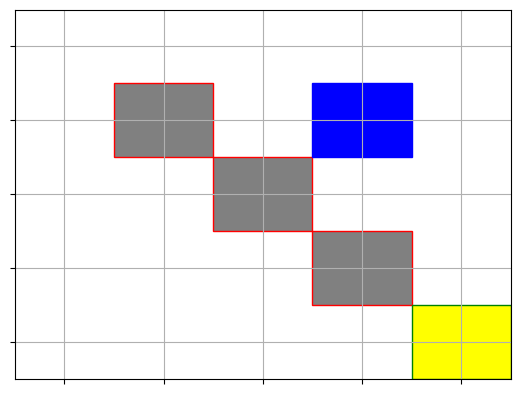

State: [4 1], Action: 1, Reward: -0.1, Done: False


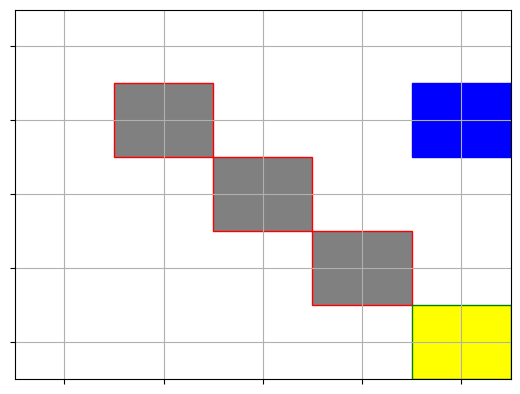

State: [3 1], Action: 3, Reward: -0.1, Done: False


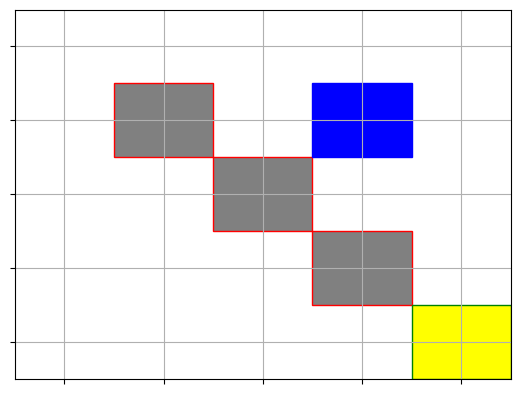

State: [2 1], Action: 3, Reward: -0.1, Done: False


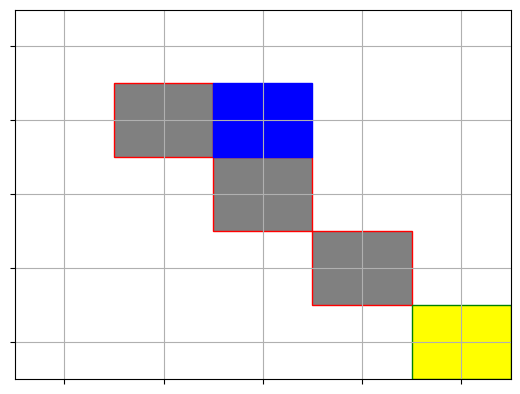

State: [2 1], Action: 3, Reward: -0.1, Done: False


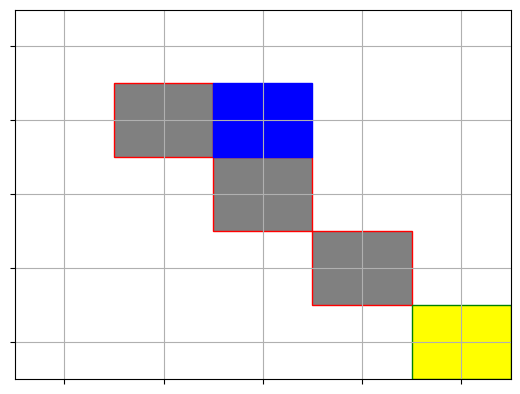

State: [3 1], Action: 1, Reward: -0.1, Done: False


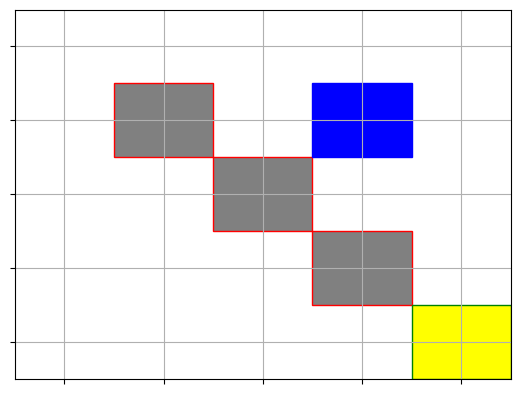

State: [3 0], Action: 2, Reward: -0.1, Done: False


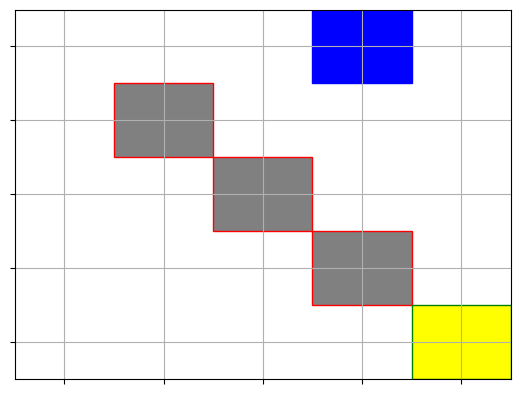

State: [4 0], Action: 1, Reward: -0.1, Done: False


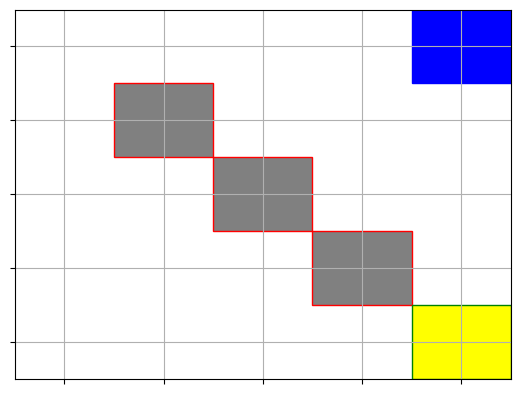

State: [4 0], Action: 2, Reward: -0.1, Done: False


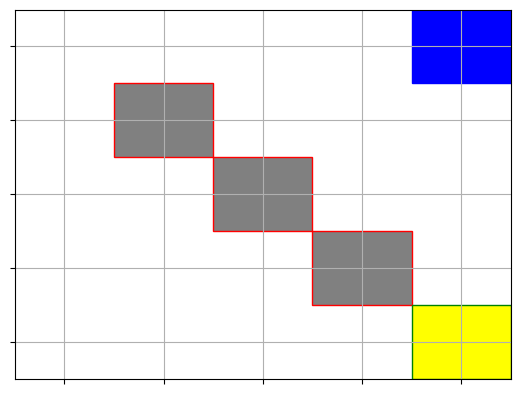

State: [4 0], Action: 2, Reward: -0.1, Done: False


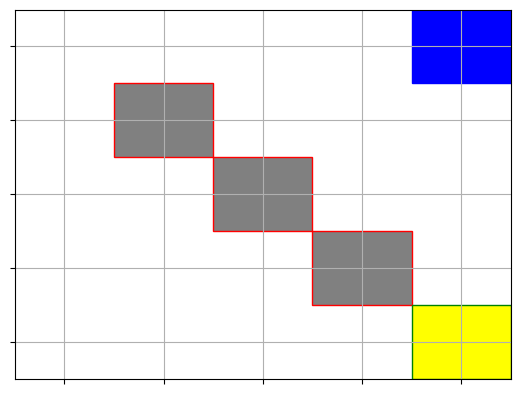

State: [3 0], Action: 3, Reward: -0.1, Done: False


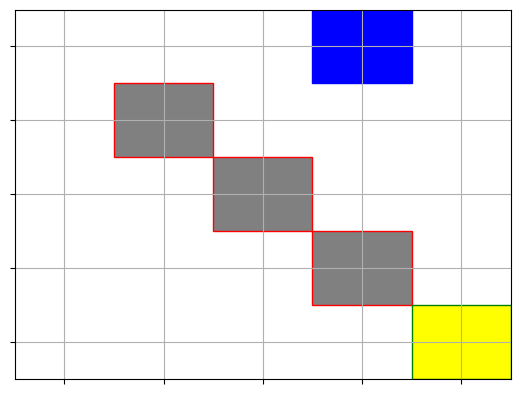

State: [3 1], Action: 0, Reward: -0.1, Done: False


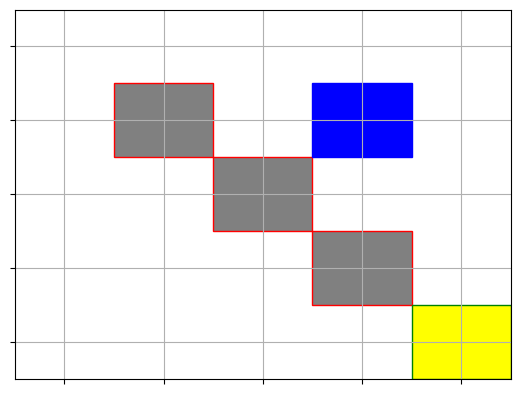

State: [3 0], Action: 2, Reward: -0.1, Done: False


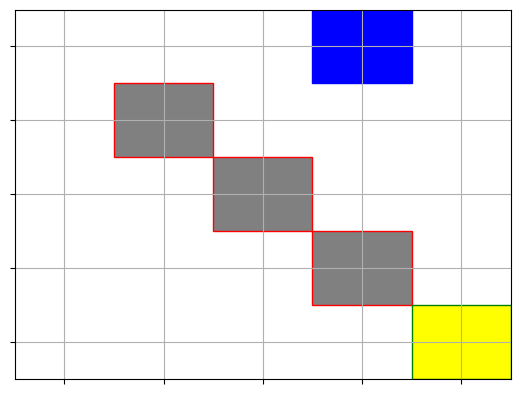

State: [2 0], Action: 3, Reward: -0.1, Done: False


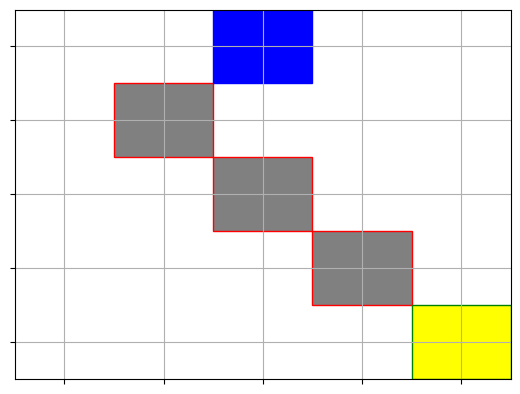

State: [2 0], Action: 2, Reward: -0.1, Done: False


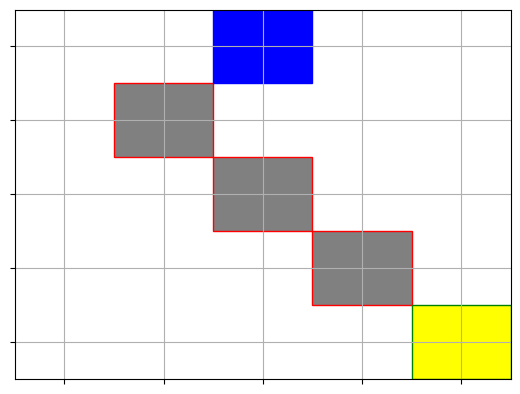

State: [2 1], Action: 0, Reward: -0.1, Done: False


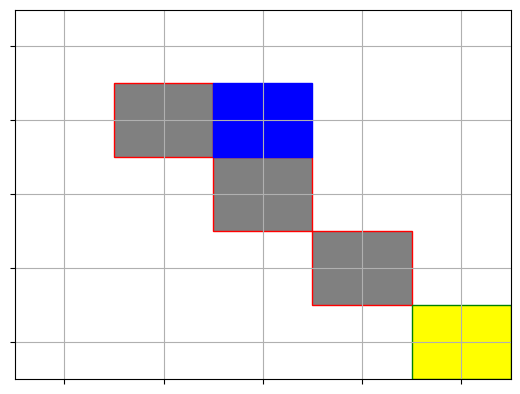

State: [2 1], Action: 0, Reward: -0.1, Done: False


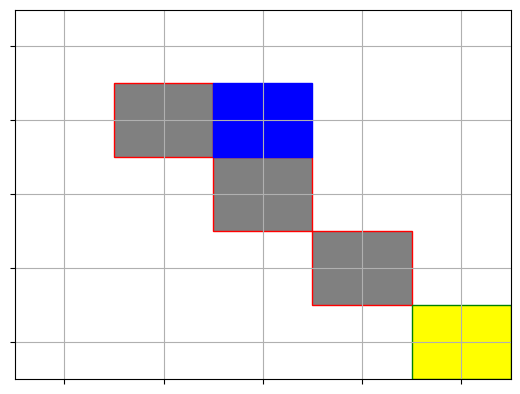

State: [2 1], Action: 0, Reward: -0.1, Done: False


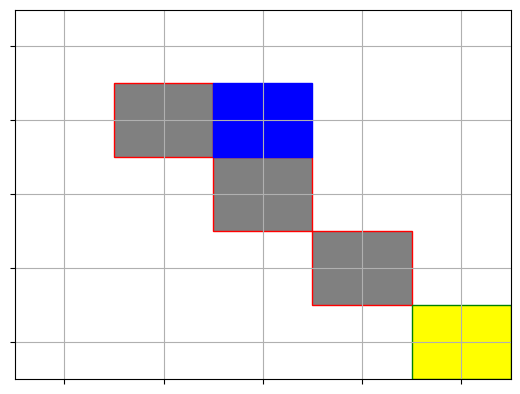

State: [3 1], Action: 1, Reward: -0.1, Done: False


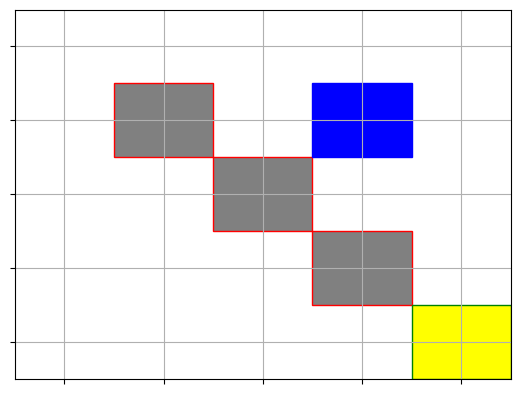

State: [2 1], Action: 3, Reward: -0.1, Done: False


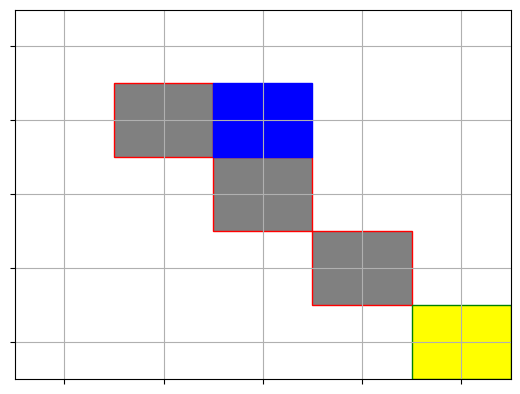

State: [2 0], Action: 2, Reward: -0.1, Done: False


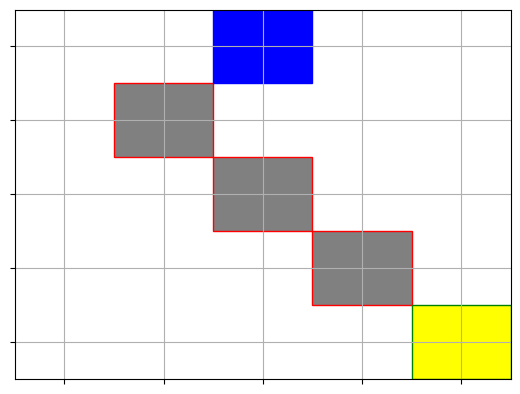

State: [2 1], Action: 0, Reward: -0.1, Done: False


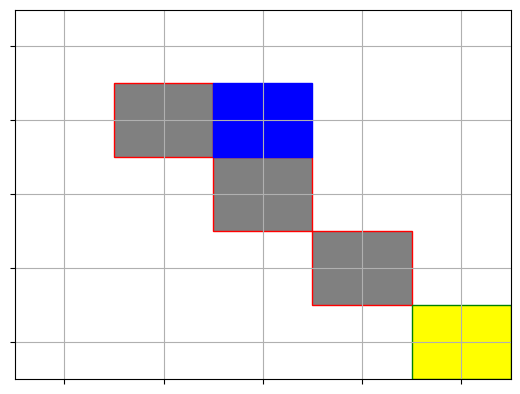

State: [2 1], Action: 0, Reward: -0.1, Done: False


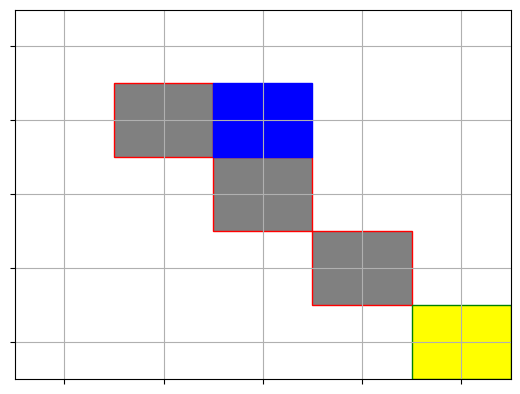

State: [3 1], Action: 1, Reward: -0.1, Done: False


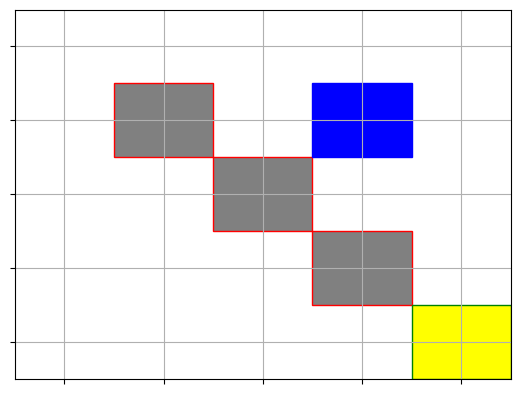

State: [3 0], Action: 2, Reward: -0.1, Done: False


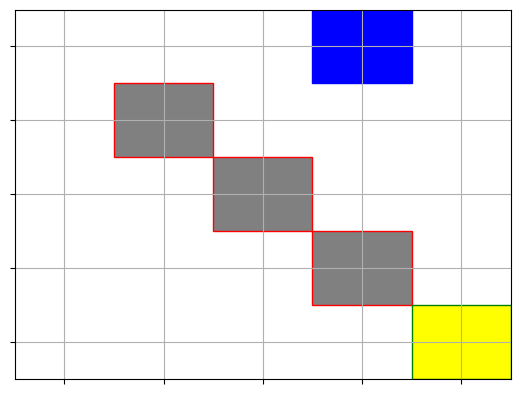

State: [3 0], Action: 2, Reward: -0.1, Done: False


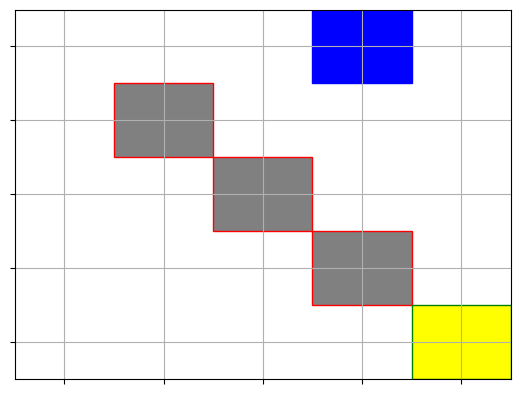

State: [3 0], Action: 2, Reward: -0.1, Done: False


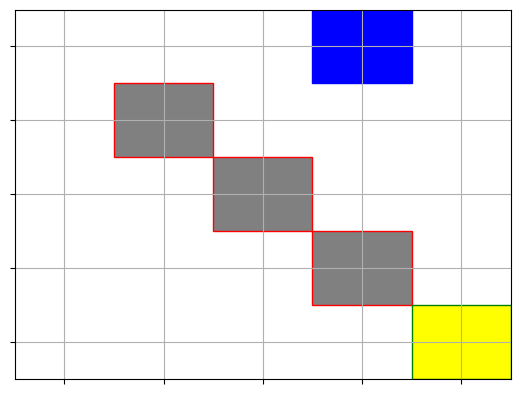

State: [3 1], Action: 0, Reward: -0.1, Done: False


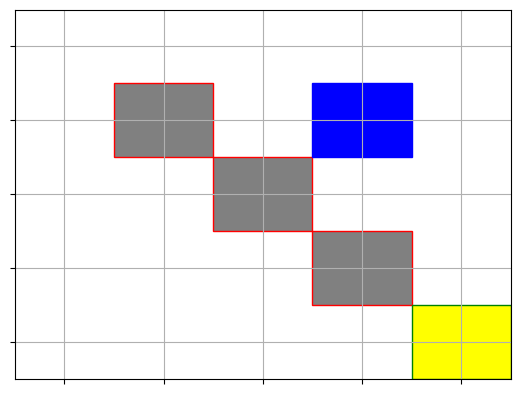

State: [2 1], Action: 3, Reward: -0.1, Done: False


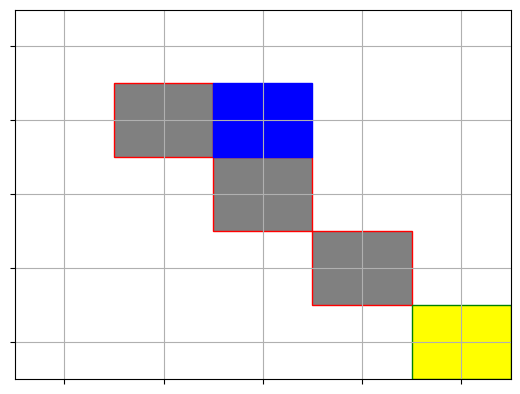

State: [3 1], Action: 1, Reward: -0.1, Done: False


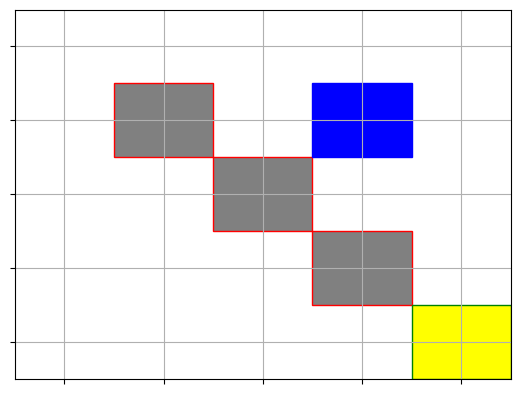

State: [2 1], Action: 3, Reward: -0.1, Done: False


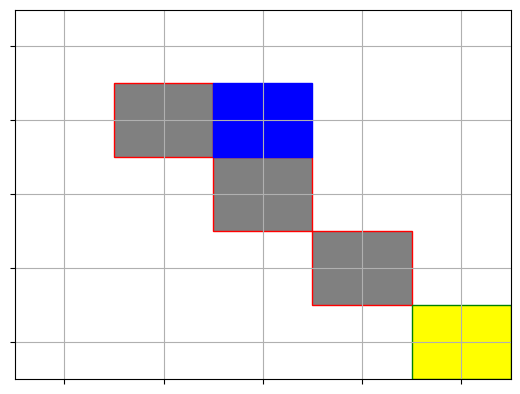

State: [3 1], Action: 1, Reward: -0.1, Done: False


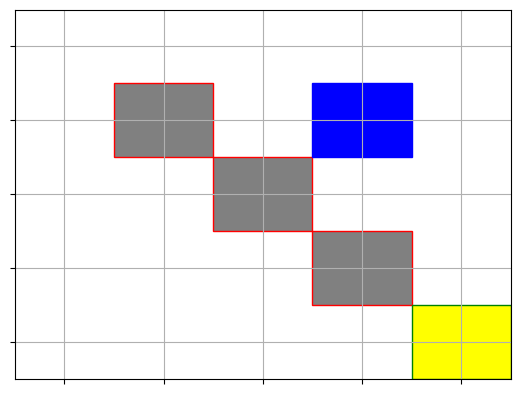

State: [3 2], Action: 0, Reward: -0.1, Done: False


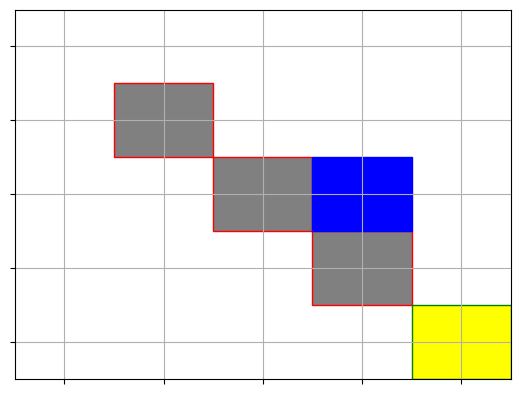

State: [4 2], Action: 1, Reward: -0.1, Done: False


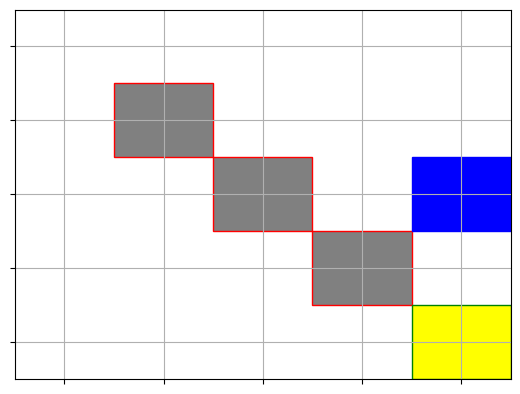

State: [3 2], Action: 3, Reward: -0.1, Done: False


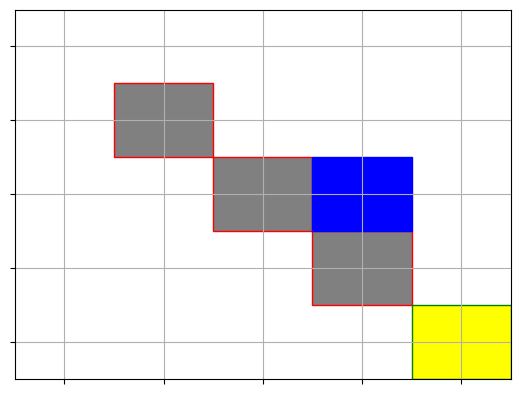

State: [3 2], Action: 0, Reward: -0.1, Done: False


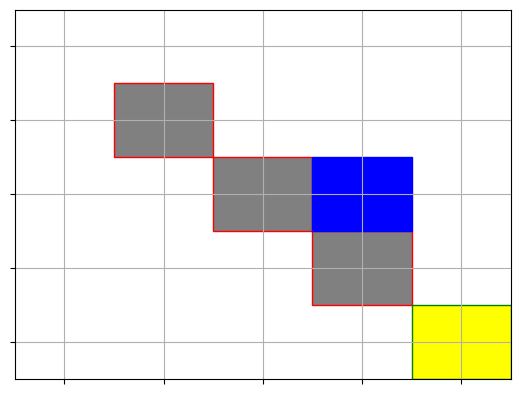

State: [3 1], Action: 2, Reward: -0.1, Done: False


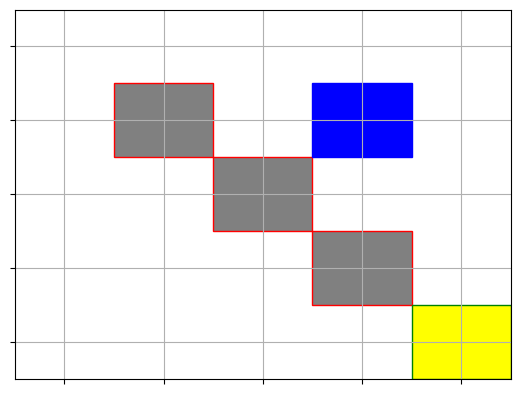

State: [4 1], Action: 1, Reward: -0.1, Done: False


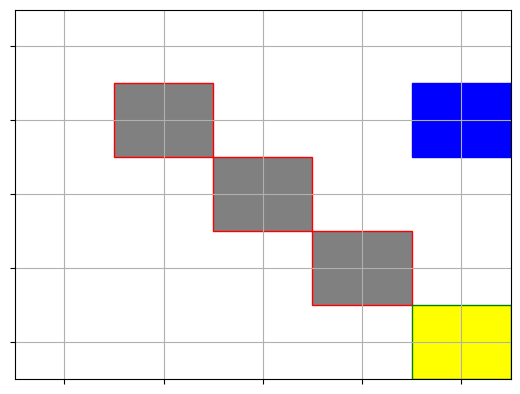

State: [4 1], Action: 1, Reward: -0.1, Done: False


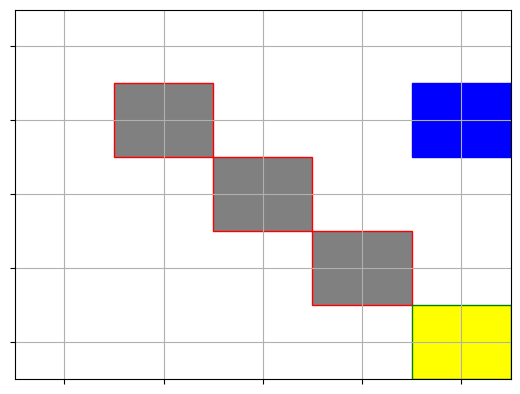

State: [4 0], Action: 2, Reward: -0.1, Done: False


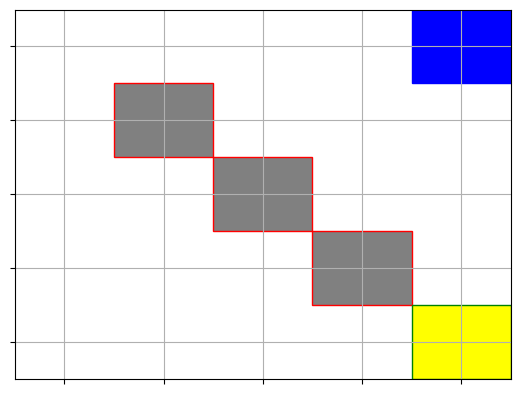

State: [4 0], Action: 2, Reward: -0.1, Done: False


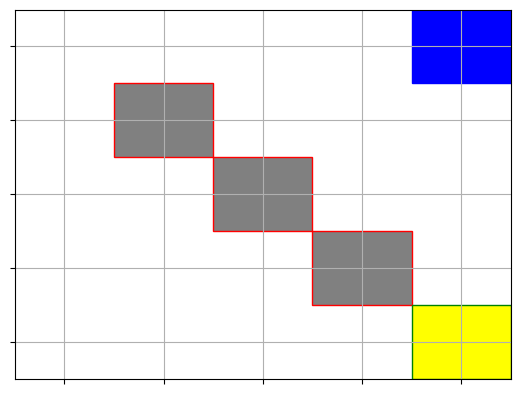

State: [4 0], Action: 1, Reward: -0.1, Done: False


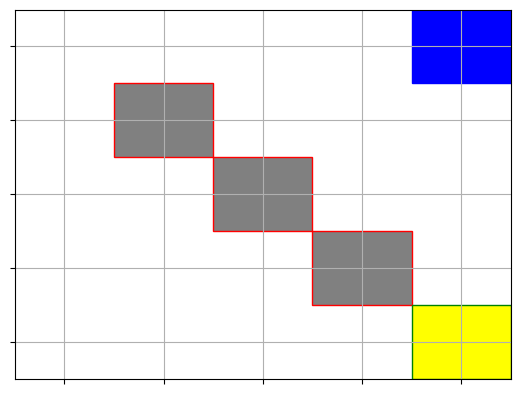

State: [4 0], Action: 1, Reward: -0.1, Done: False


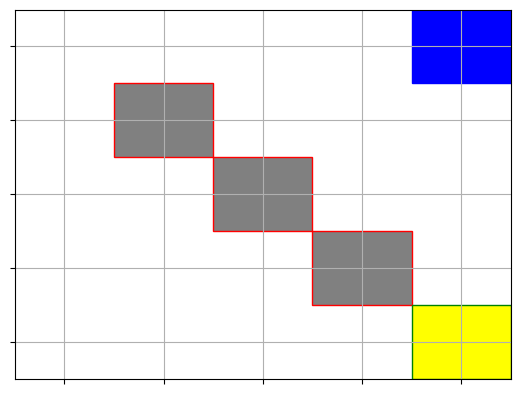

State: [4 0], Action: 2, Reward: -0.1, Done: False


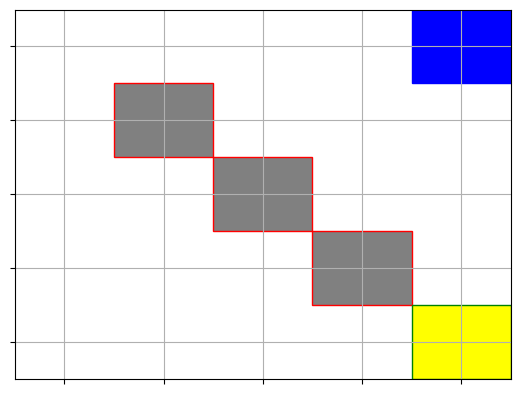

State: [4 0], Action: 1, Reward: -0.1, Done: False


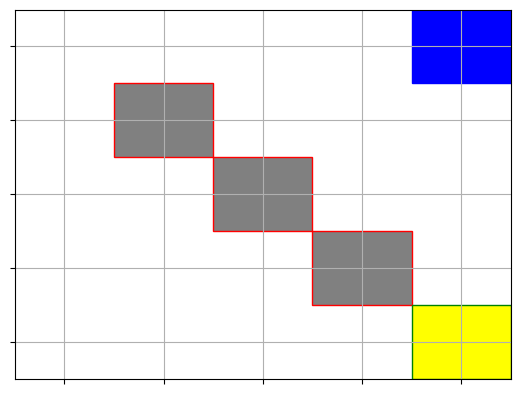

State: [4 0], Action: 1, Reward: -0.1, Done: False


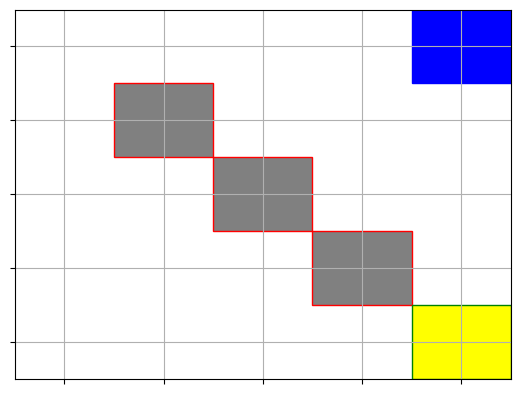

State: [4 0], Action: 2, Reward: -0.1, Done: False


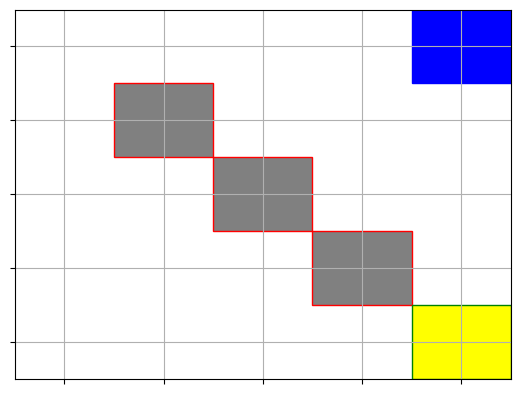

State: [3 0], Action: 3, Reward: -0.1, Done: False


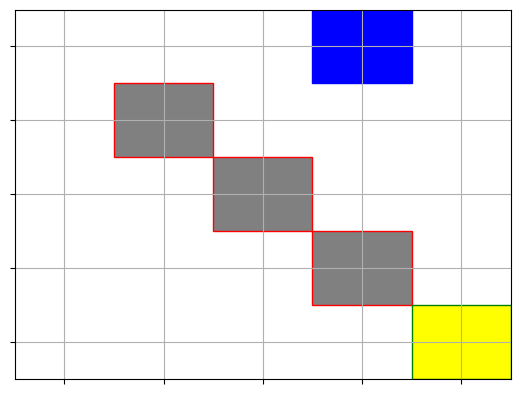

State: [4 0], Action: 1, Reward: -0.1, Done: False


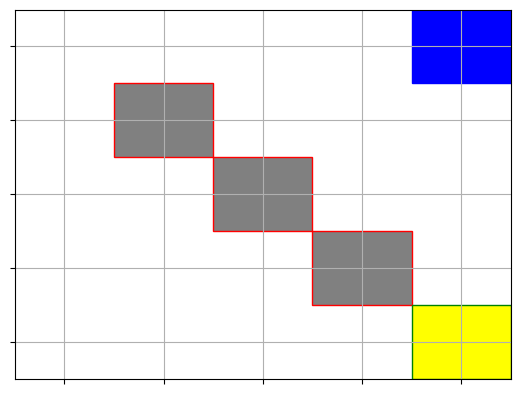

State: [3 0], Action: 3, Reward: -0.1, Done: False


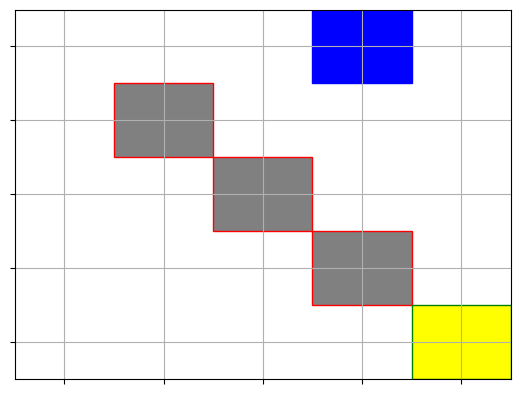

State: [3 0], Action: 2, Reward: -0.1, Done: False


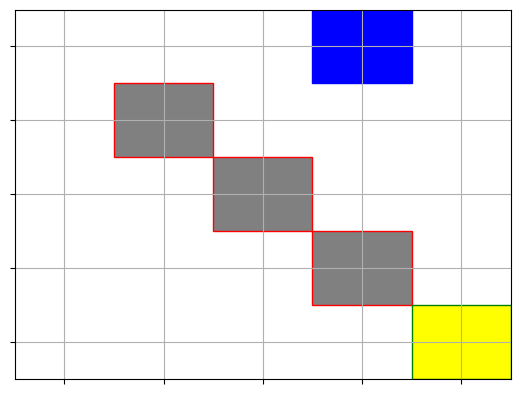

State: [4 0], Action: 1, Reward: -0.1, Done: False


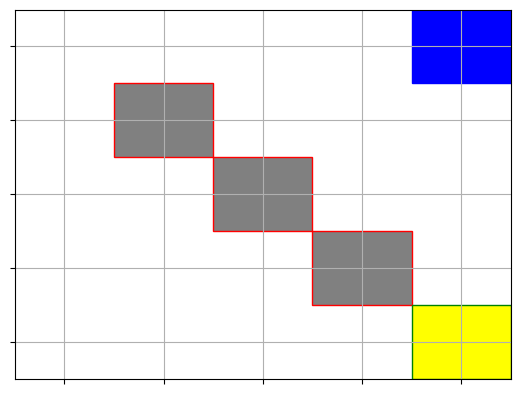

State: [3 0], Action: 3, Reward: -0.1, Done: False


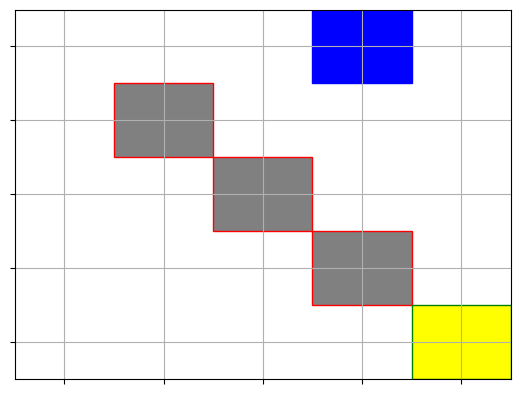

State: [2 0], Action: 3, Reward: -0.1, Done: False


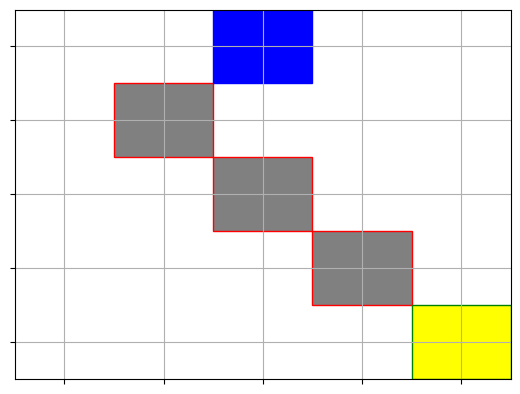

State: [2 1], Action: 0, Reward: -0.1, Done: False


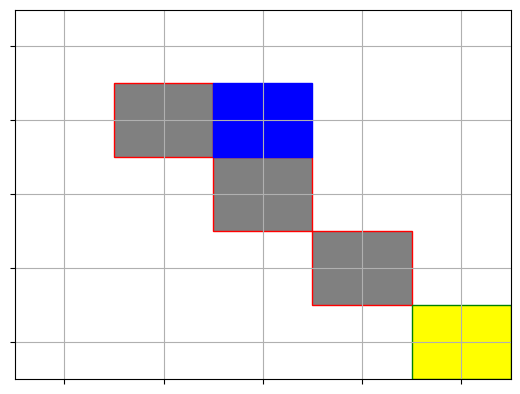

State: [2 1], Action: 0, Reward: -0.1, Done: False


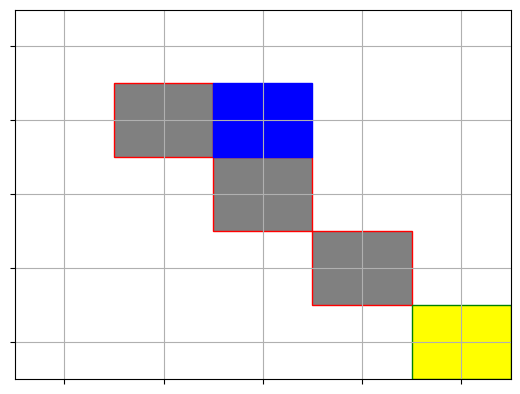

State: [2 0], Action: 2, Reward: -0.1, Done: False


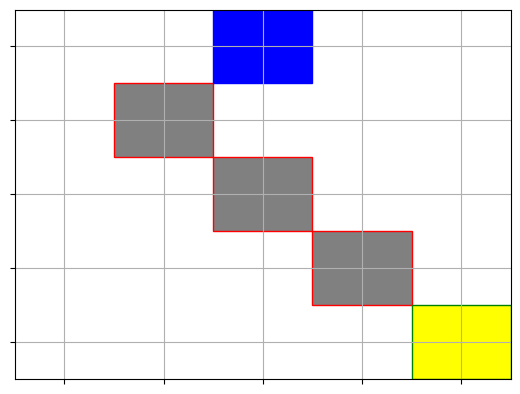

State: [1 0], Action: 3, Reward: -0.1, Done: False


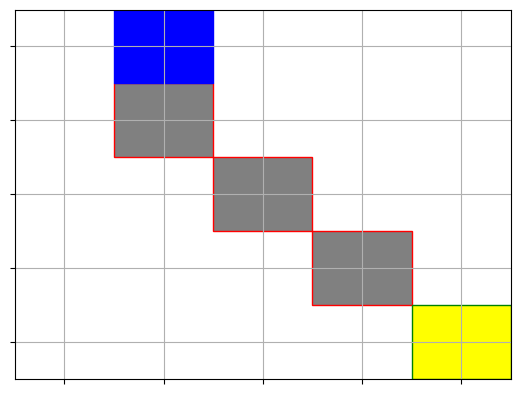

State: [0 0], Action: 3, Reward: -0.1, Done: False


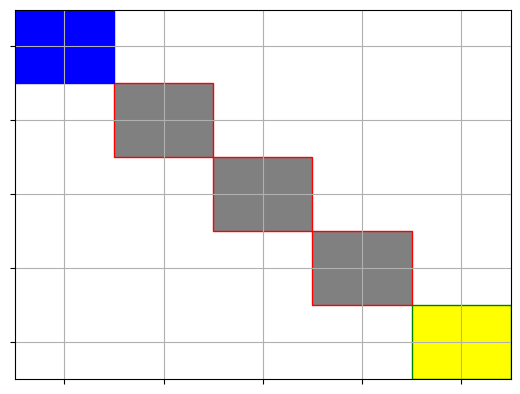

State: [0 0], Action: 3, Reward: -0.1, Done: False


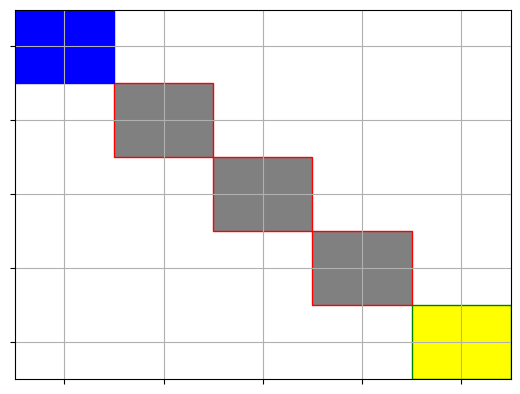

State: [0 1], Action: 0, Reward: -0.1, Done: False


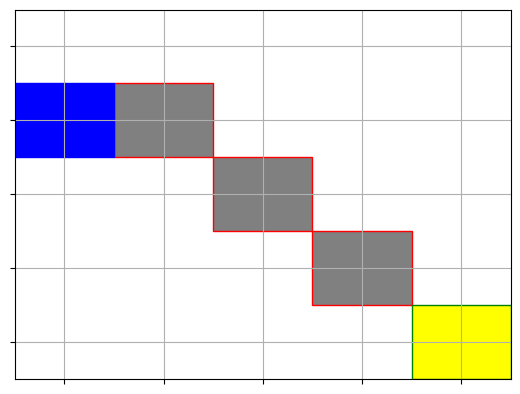

State: [0 0], Action: 2, Reward: -0.1, Done: False


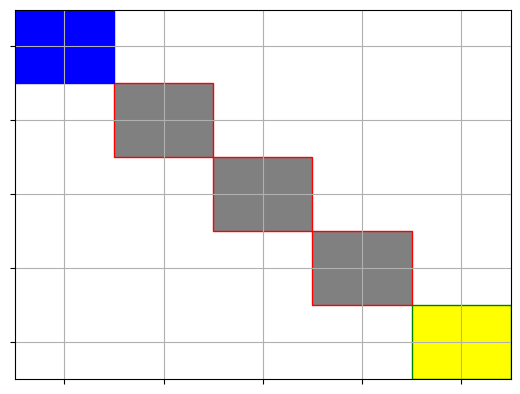

State: [0 0], Action: 2, Reward: -0.1, Done: False


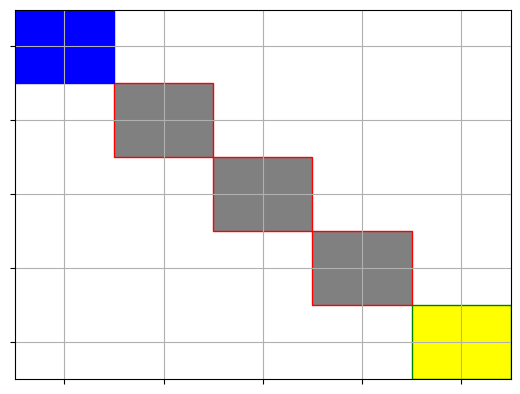

State: [0 1], Action: 0, Reward: -0.1, Done: False


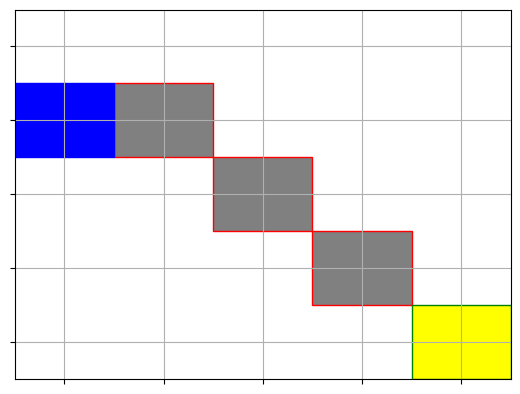

State: [0 2], Action: 0, Reward: -0.1, Done: False


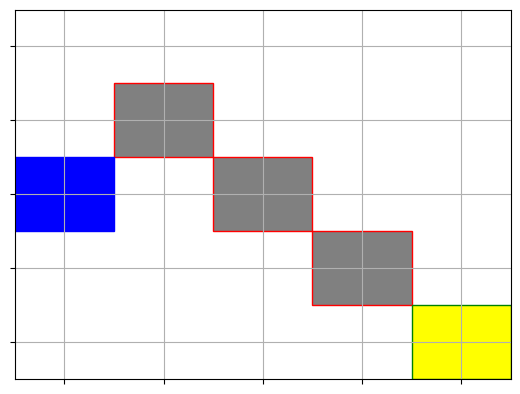

State: [0 2], Action: 3, Reward: -0.1, Done: False


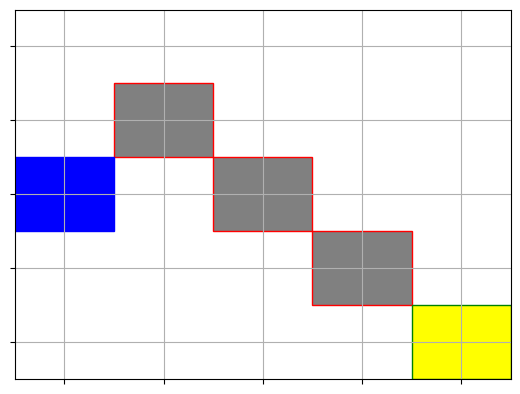

State: [0 1], Action: 2, Reward: -0.1, Done: False


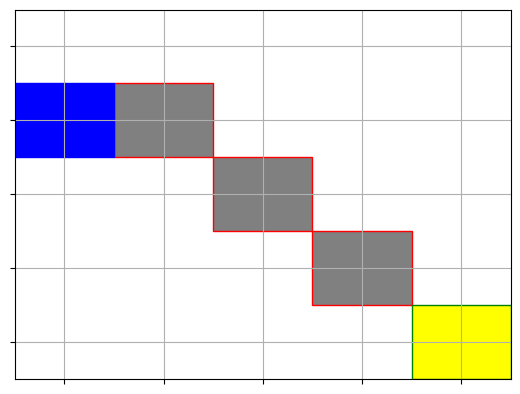

State: [0 0], Action: 2, Reward: -0.1, Done: False


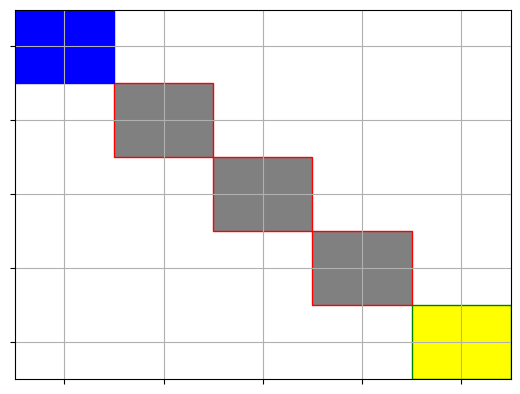

State: [0 0], Action: 3, Reward: -0.1, Done: False


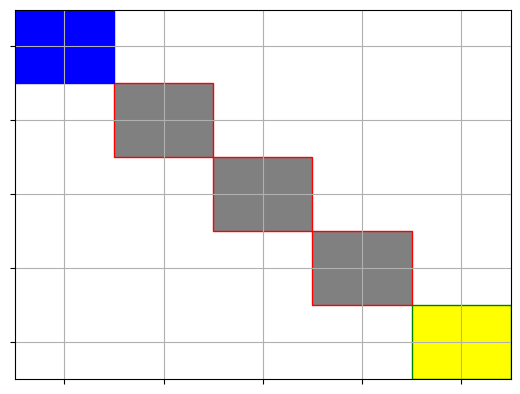

State: [1 0], Action: 1, Reward: -0.1, Done: False


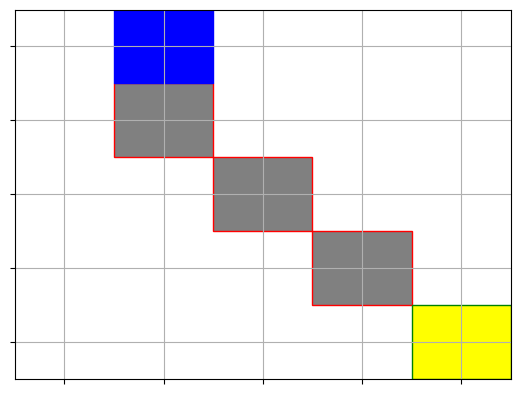

State: [1 0], Action: 0, Reward: -0.1, Done: False


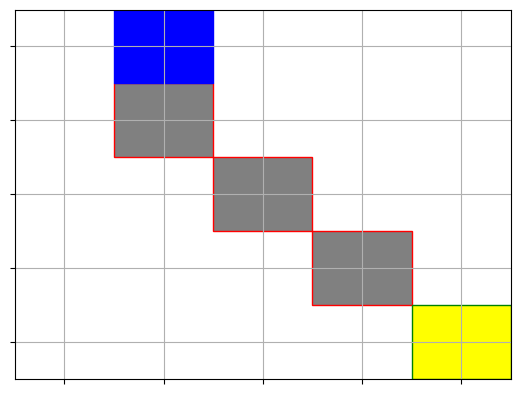

State: [1 0], Action: 0, Reward: -0.1, Done: False


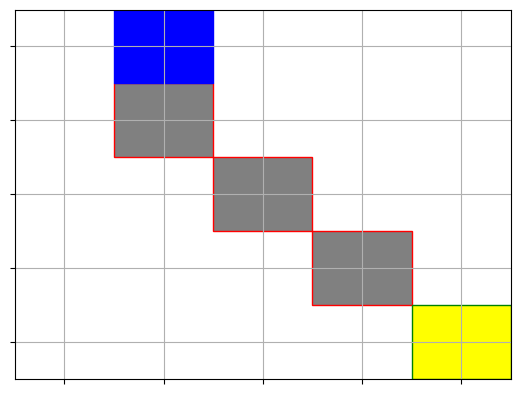

State: [1 0], Action: 2, Reward: -0.1, Done: False


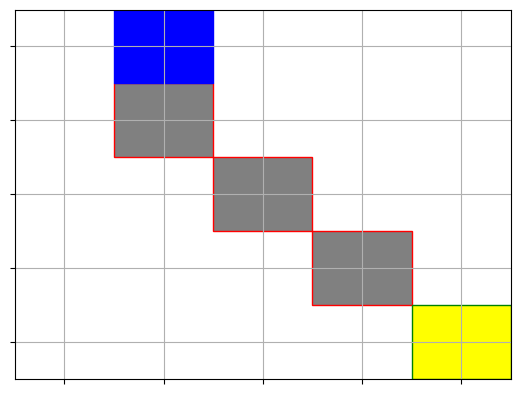

State: [1 0], Action: 0, Reward: -0.1, Done: False


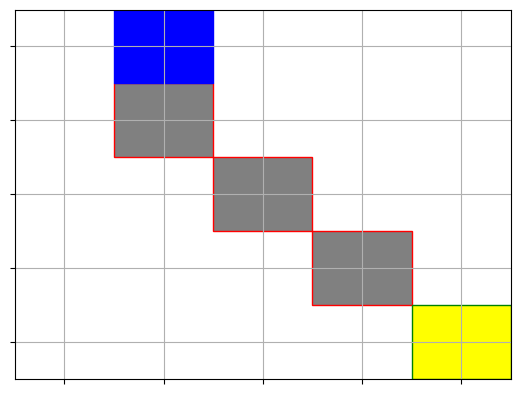

State: [0 0], Action: 3, Reward: -0.1, Done: False


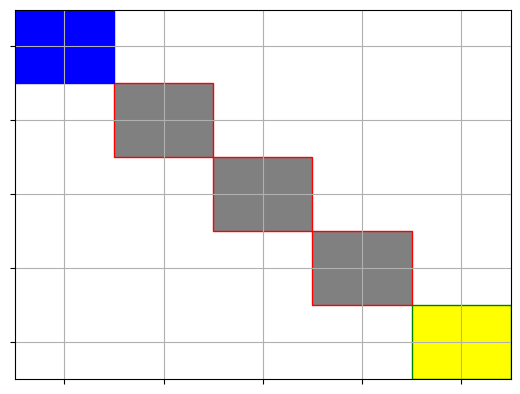

State: [0 1], Action: 0, Reward: -0.1, Done: False


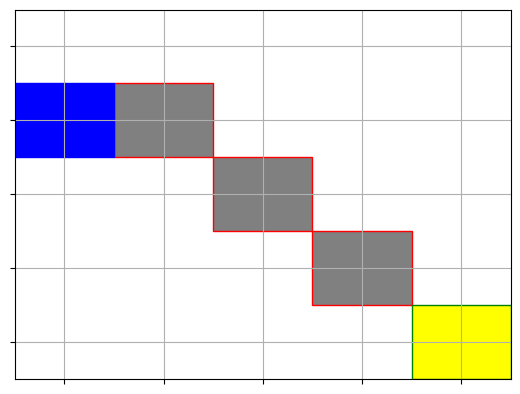

State: [0 1], Action: 3, Reward: -0.1, Done: False


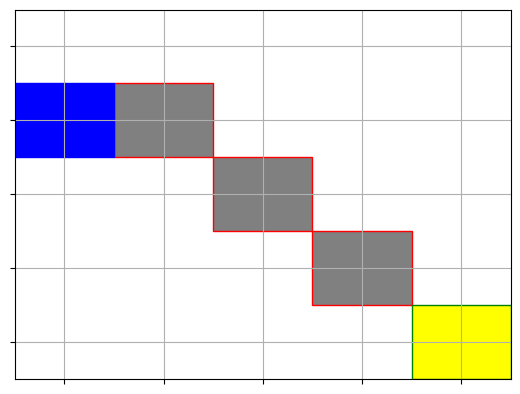

State: [0 1], Action: 1, Reward: -0.1, Done: False


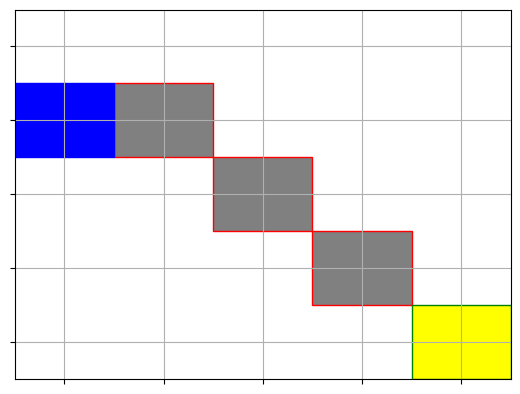

State: [0 0], Action: 2, Reward: -0.1, Done: False


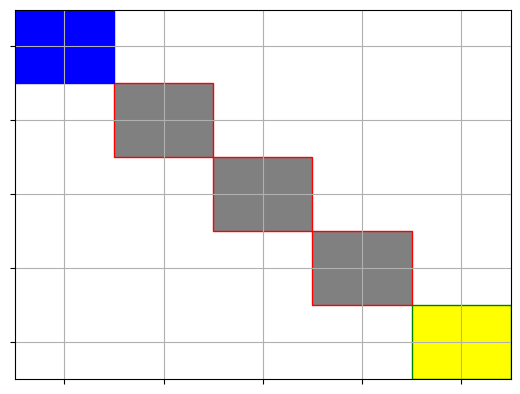

State: [0 0], Action: 2, Reward: -0.1, Done: False


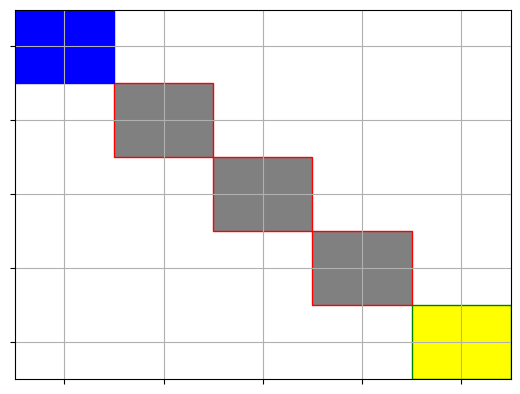

State: [0 0], Action: 3, Reward: -0.1, Done: False


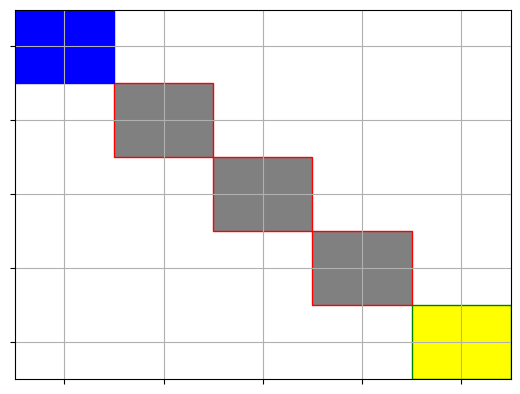

State: [0 0], Action: 2, Reward: -0.1, Done: False


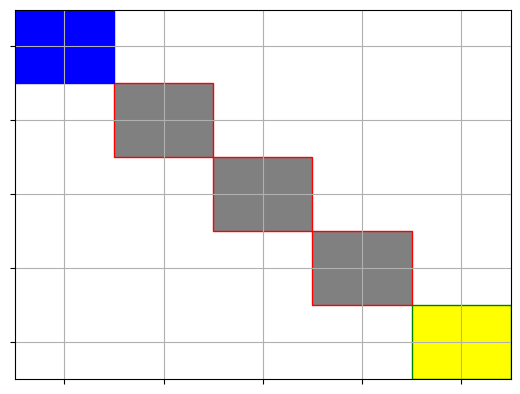

State: [0 0], Action: 2, Reward: -0.1, Done: False


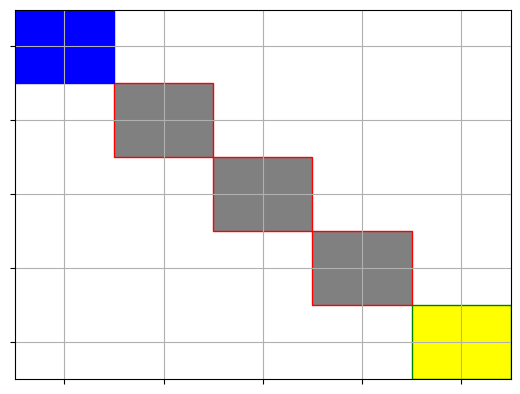

State: [1 0], Action: 1, Reward: -0.1, Done: False


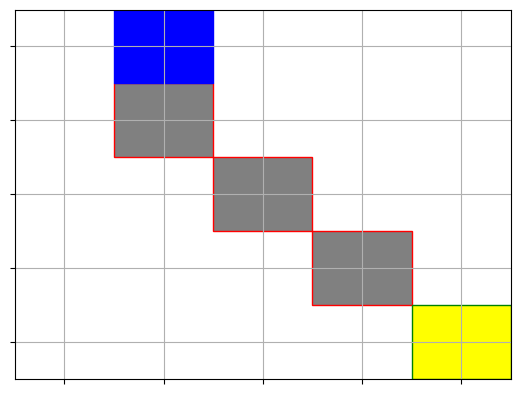

State: [1 0], Action: 0, Reward: -0.1, Done: False


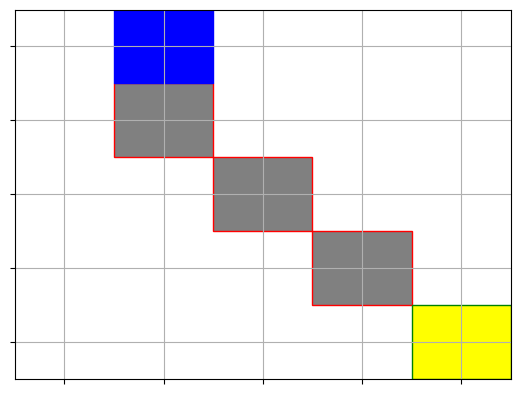

State: [2 0], Action: 1, Reward: -0.1, Done: False


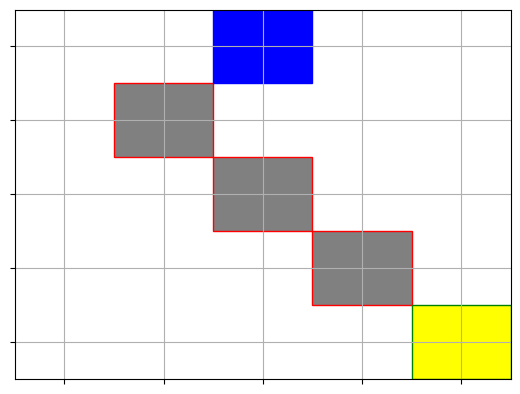

State: [3 0], Action: 1, Reward: -0.1, Done: False


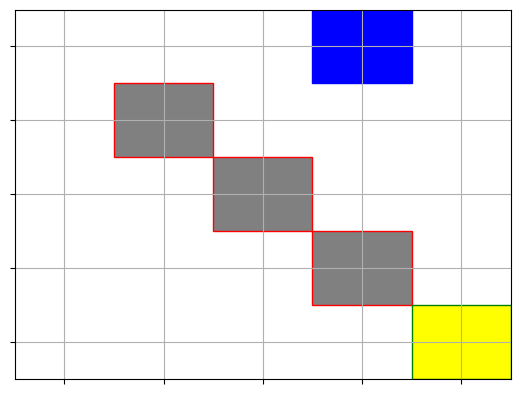

State: [4 0], Action: 1, Reward: -0.1, Done: False


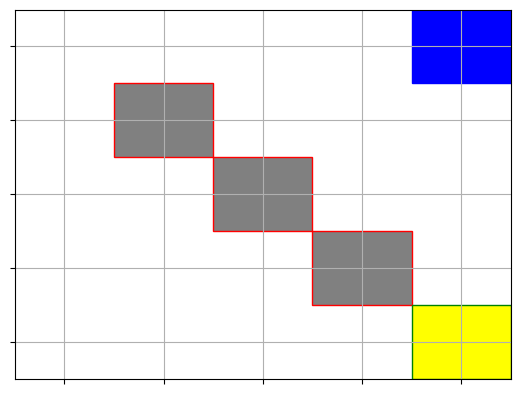

State: [3 0], Action: 3, Reward: -0.1, Done: False


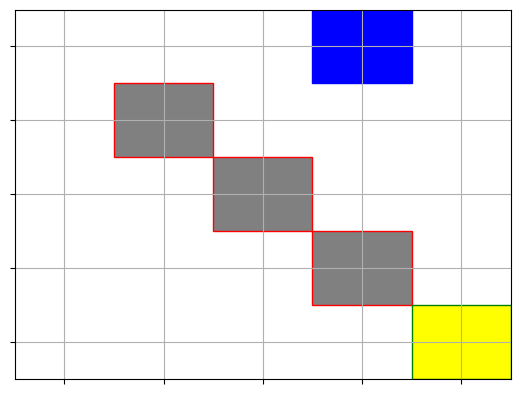

State: [2 0], Action: 3, Reward: -0.1, Done: False


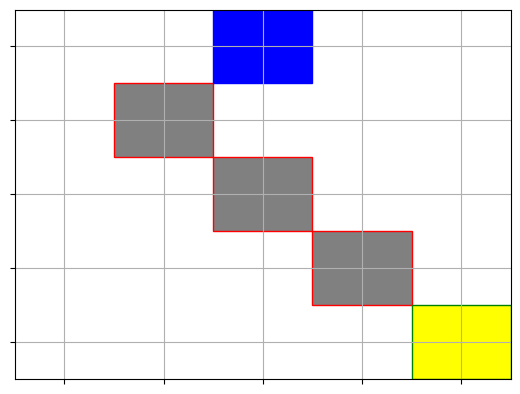

State: [2 1], Action: 0, Reward: -0.1, Done: False


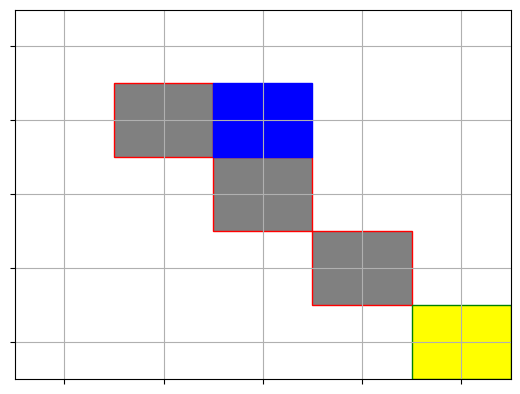

State: [2 1], Action: 0, Reward: -0.1, Done: False


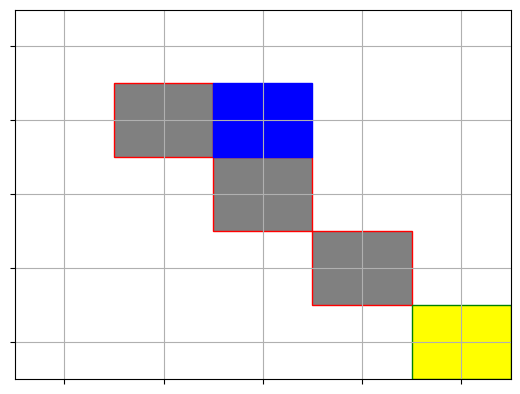

State: [2 0], Action: 2, Reward: -0.1, Done: False


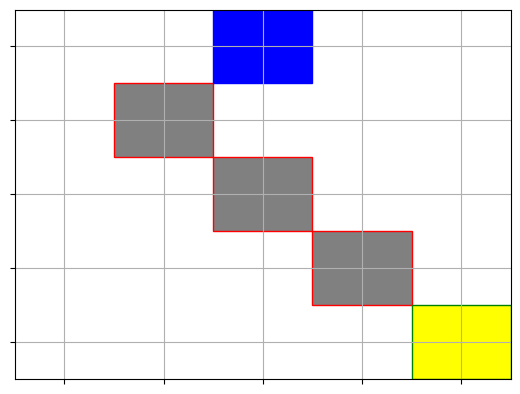

State: [3 0], Action: 1, Reward: -0.1, Done: False


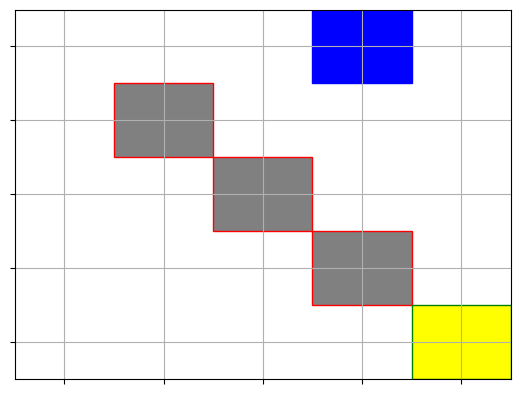

State: [2 0], Action: 3, Reward: -0.1, Done: False


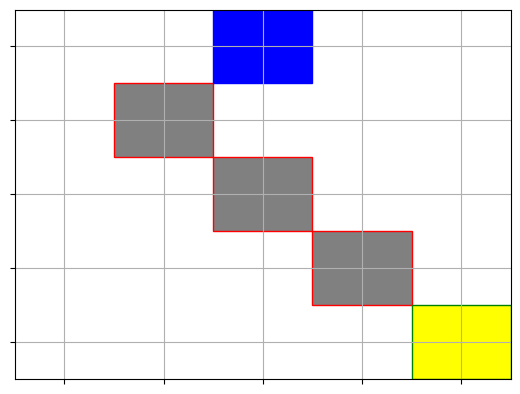

State: [2 1], Action: 0, Reward: -0.1, Done: False


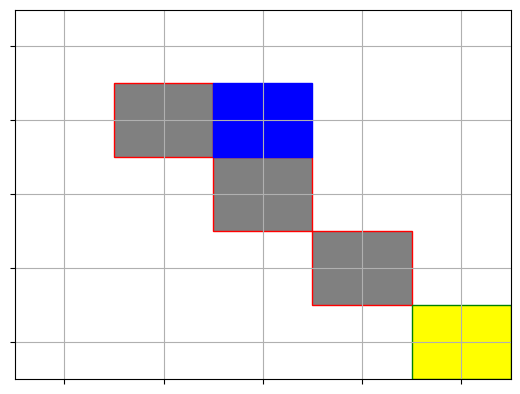

State: [2 0], Action: 2, Reward: -0.1, Done: False


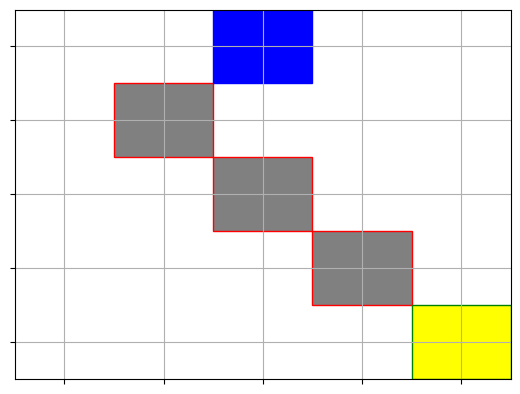

State: [1 0], Action: 3, Reward: -0.1, Done: False


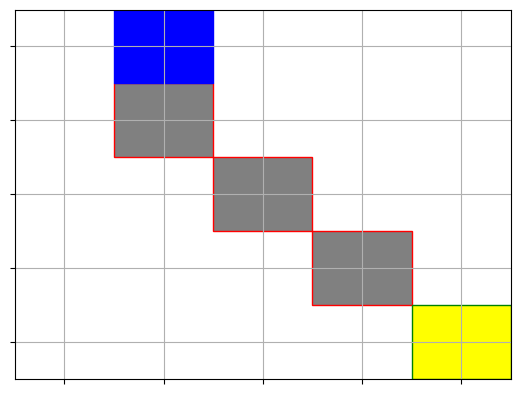

State: [2 0], Action: 1, Reward: -0.1, Done: False


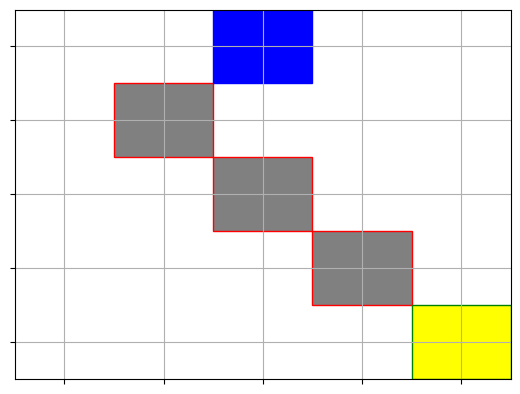

State: [3 0], Action: 1, Reward: -0.1, Done: False


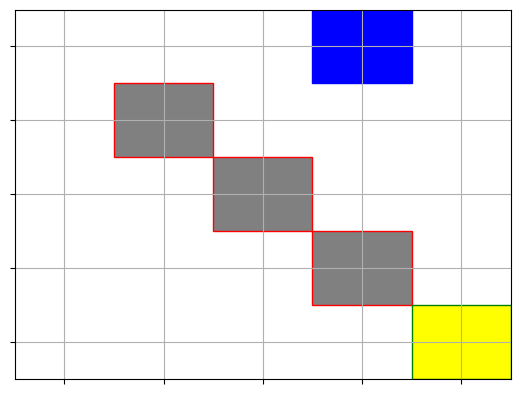

State: [2 0], Action: 3, Reward: -0.1, Done: False


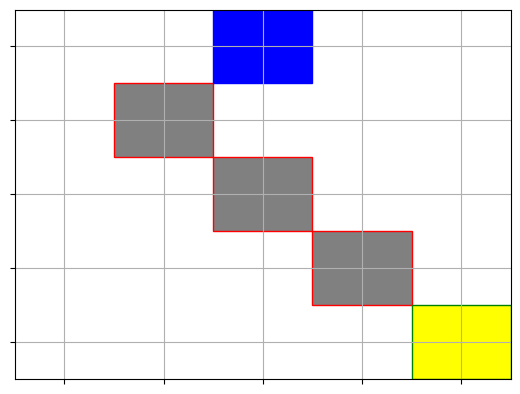

State: [2 0], Action: 2, Reward: -0.1, Done: False


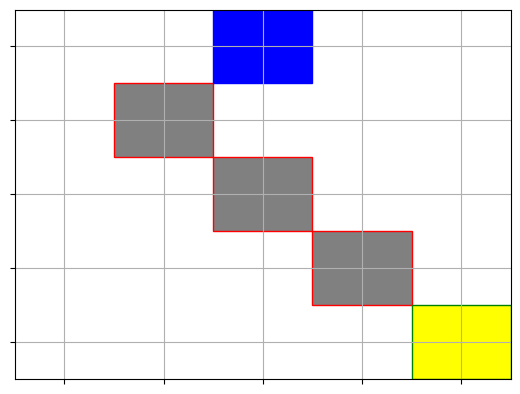

State: [2 1], Action: 0, Reward: -0.1, Done: False


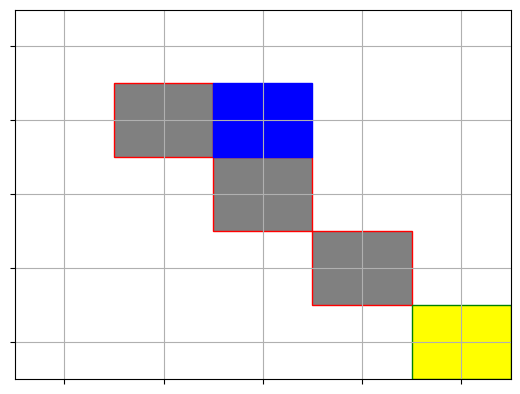

State: [2 0], Action: 2, Reward: -0.1, Done: False


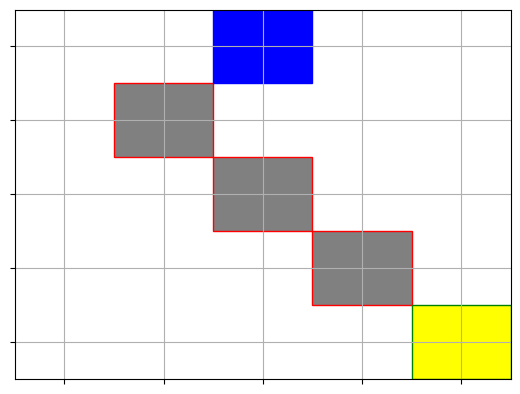

State: [2 0], Action: 2, Reward: -0.1, Done: False


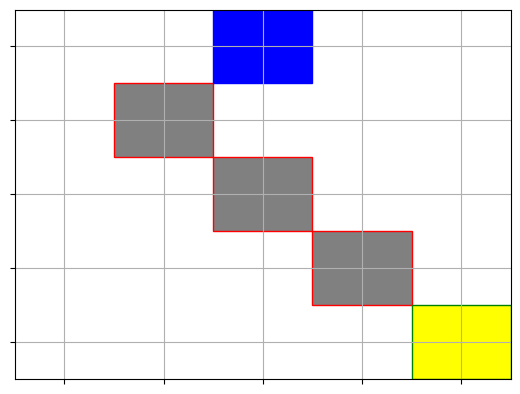

State: [1 0], Action: 3, Reward: -0.1, Done: False


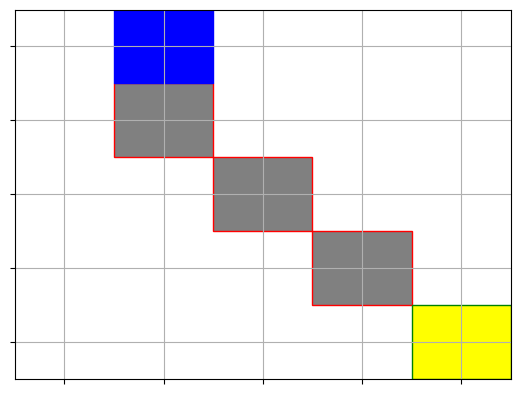

State: [1 0], Action: 2, Reward: -0.1, Done: False


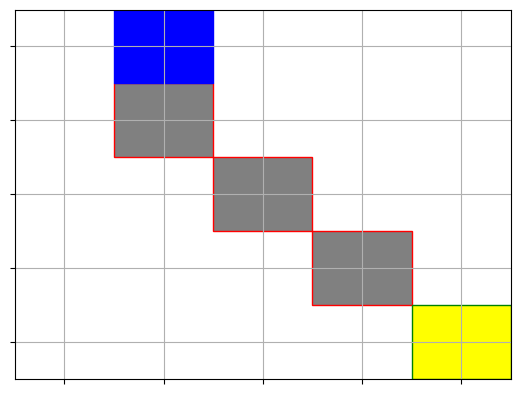

State: [1 0], Action: 0, Reward: -0.1, Done: False


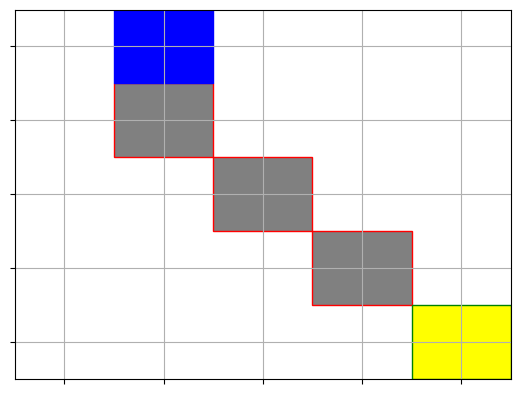

State: [1 0], Action: 2, Reward: -0.1, Done: False


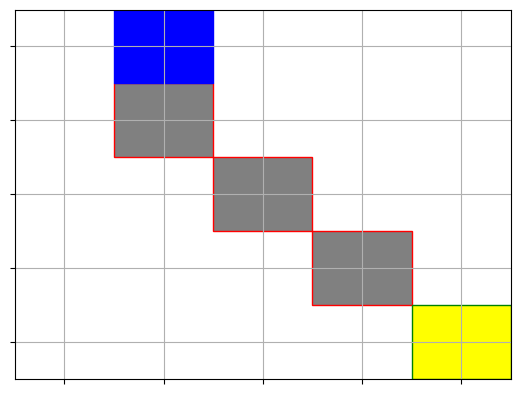

State: [0 0], Action: 3, Reward: -0.1, Done: False


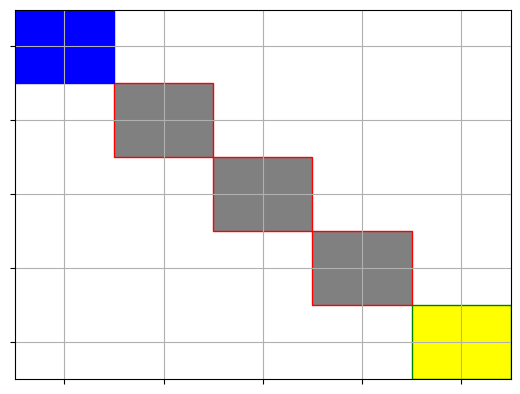

State: [0 0], Action: 2, Reward: -0.1, Done: False


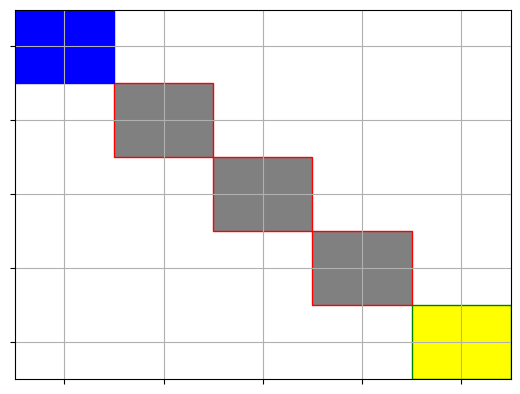

State: [1 0], Action: 1, Reward: -0.1, Done: False


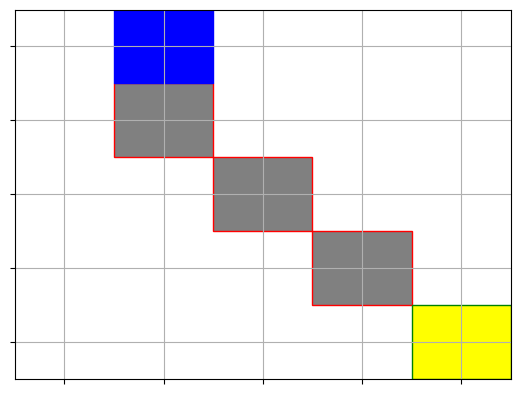

State: [1 0], Action: 2, Reward: -0.1, Done: False


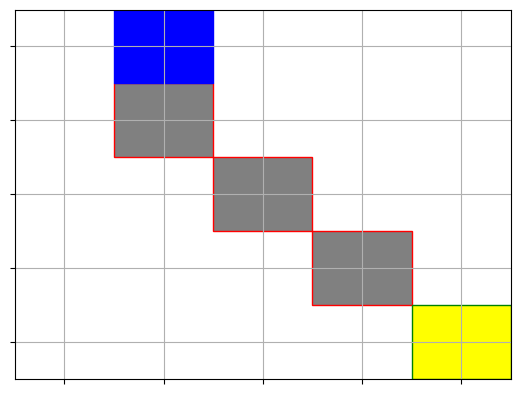

State: [1 0], Action: 0, Reward: -0.1, Done: False


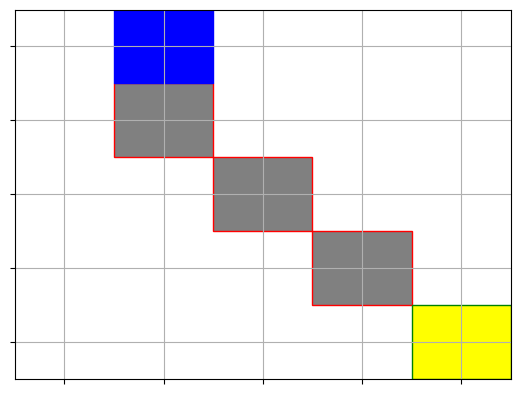

State: [0 0], Action: 3, Reward: -0.1, Done: False


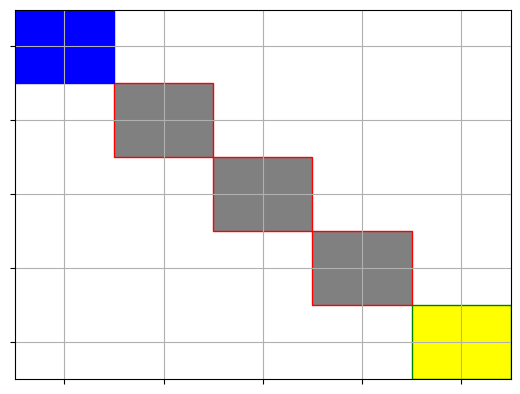

State: [0 0], Action: 2, Reward: -0.1, Done: False


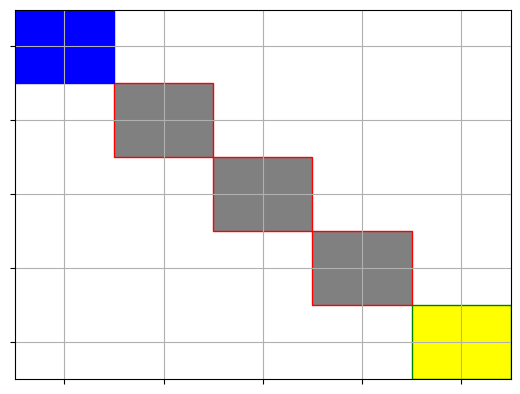

State: [0 0], Action: 3, Reward: -0.1, Done: False


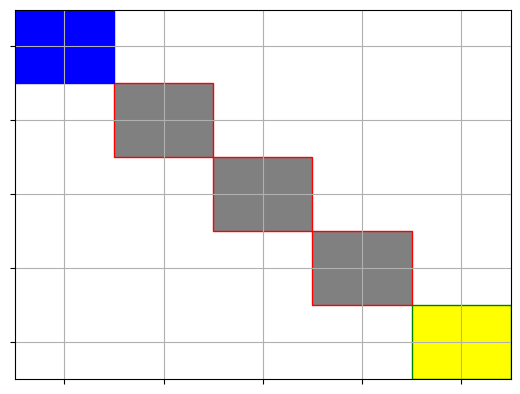

State: [1 0], Action: 1, Reward: -0.1, Done: False


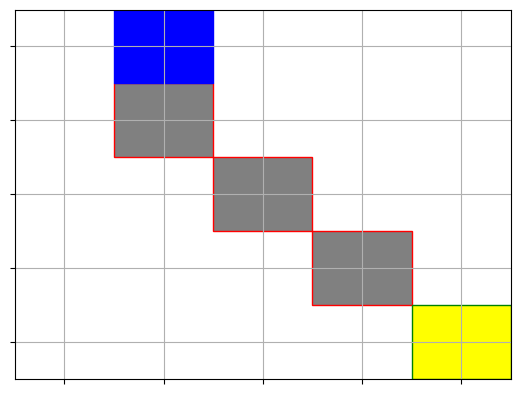

State: [0 0], Action: 3, Reward: -0.1, Done: False


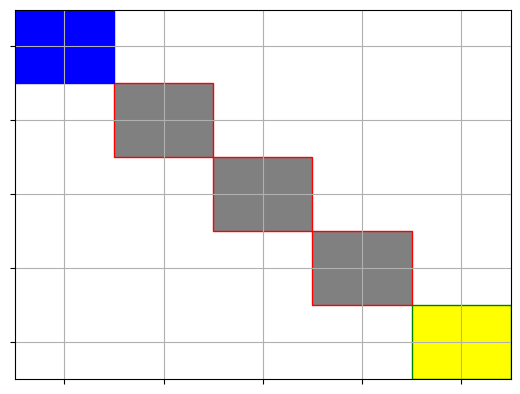

State: [0 0], Action: 2, Reward: -0.1, Done: False


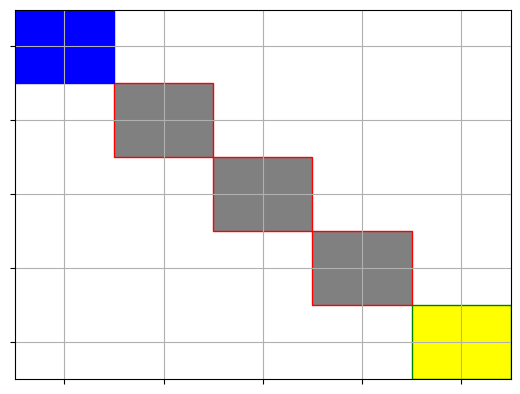

State: [0 0], Action: 2, Reward: -0.1, Done: False


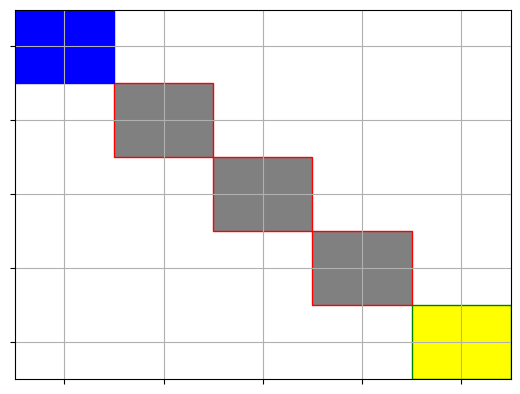

State: [0 1], Action: 0, Reward: -0.1, Done: False


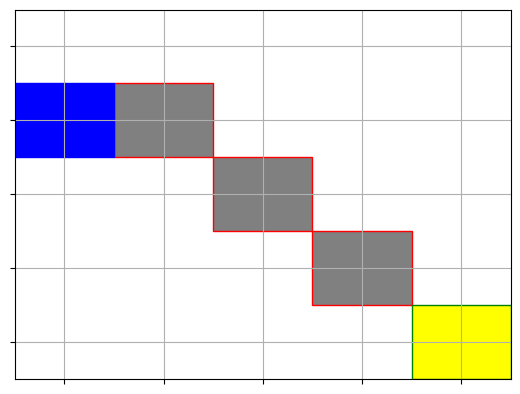

State: [0 0], Action: 2, Reward: -0.1, Done: False


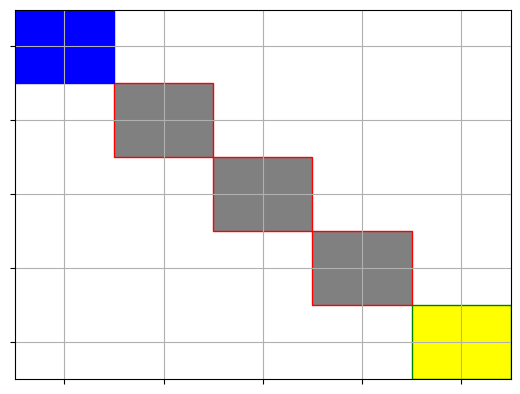

State: [0 0], Action: 3, Reward: -0.1, Done: False


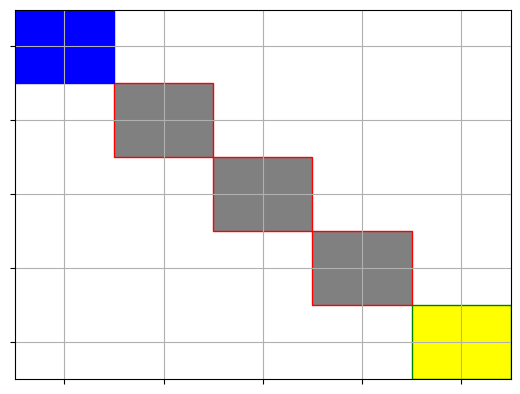

State: [0 0], Action: 3, Reward: -0.1, Done: False


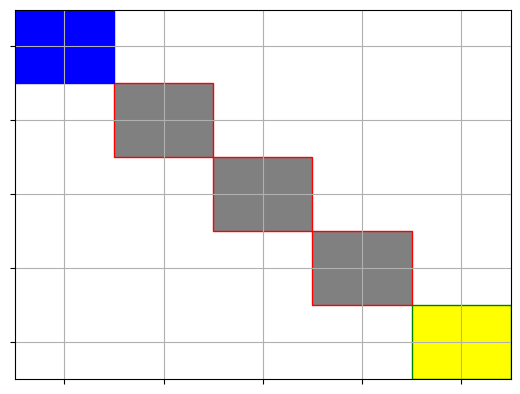

State: [0 0], Action: 3, Reward: -0.1, Done: False


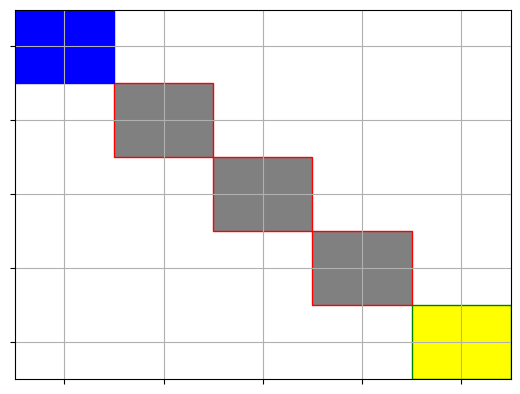

State: [1 0], Action: 1, Reward: -0.1, Done: False


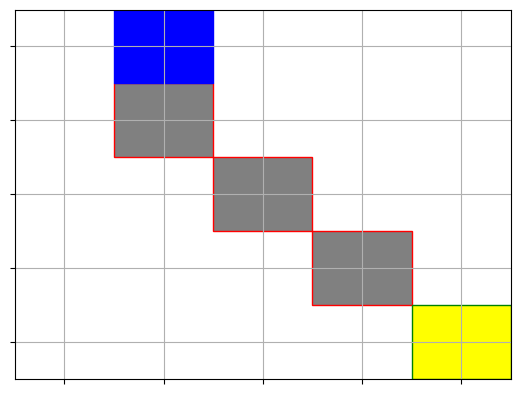

State: [2 0], Action: 1, Reward: -0.1, Done: False


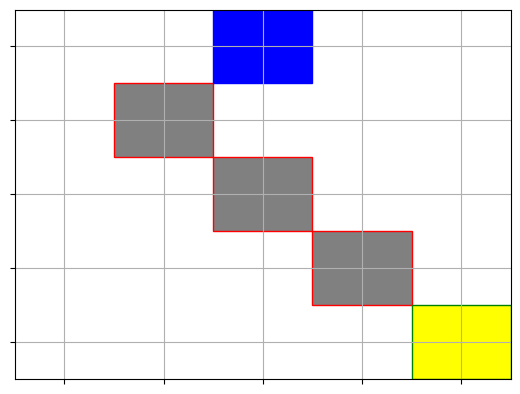

State: [2 0], Action: 2, Reward: -0.1, Done: False


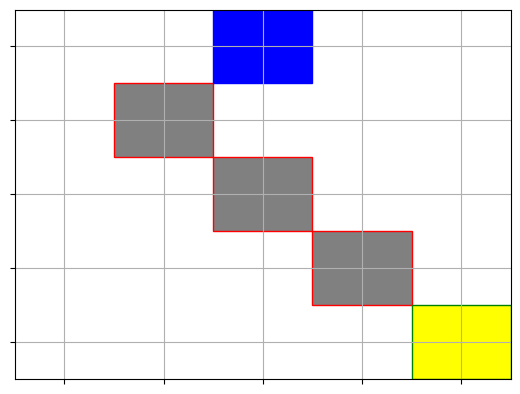

State: [1 0], Action: 3, Reward: -0.1, Done: False


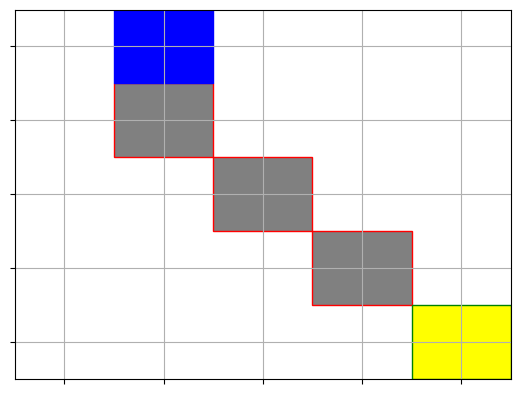

State: [1 0], Action: 2, Reward: -0.1, Done: False


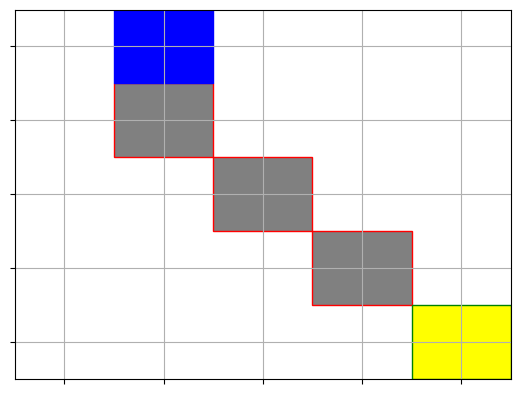

State: [2 0], Action: 1, Reward: -0.1, Done: False


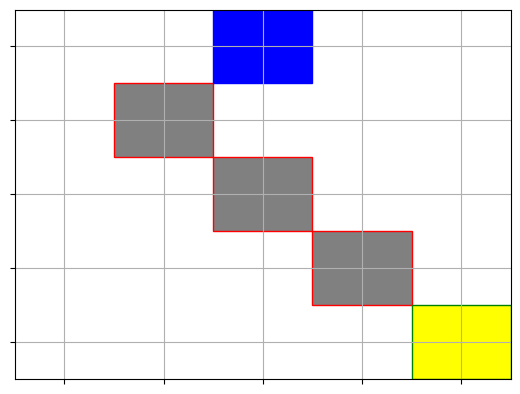

State: [2 1], Action: 0, Reward: -0.1, Done: False


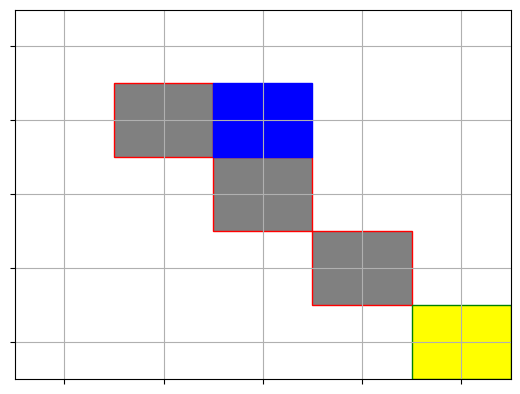

State: [2 0], Action: 2, Reward: -0.1, Done: False


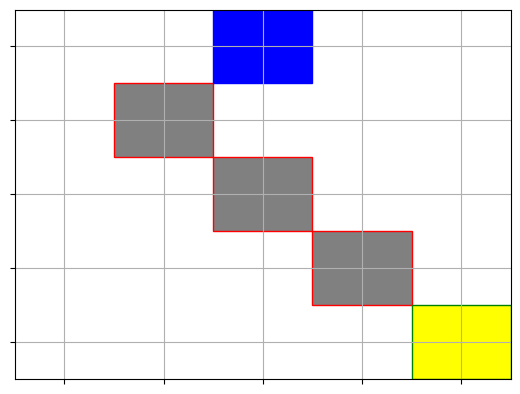

State: [1 0], Action: 3, Reward: -0.1, Done: False


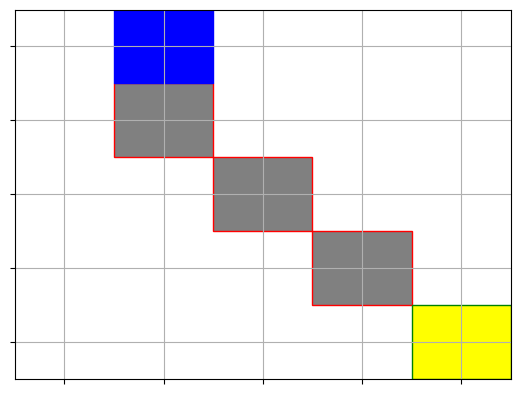

State: [0 0], Action: 3, Reward: -0.1, Done: False


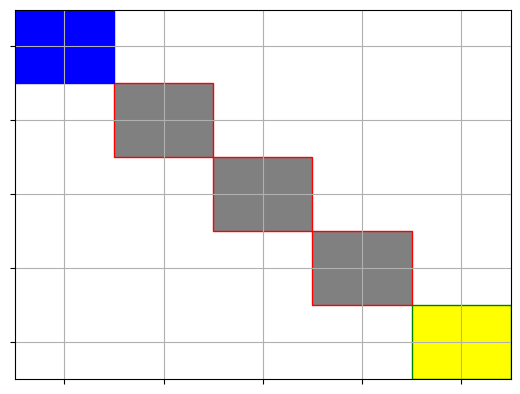

State: [0 0], Action: 3, Reward: -0.1, Done: False


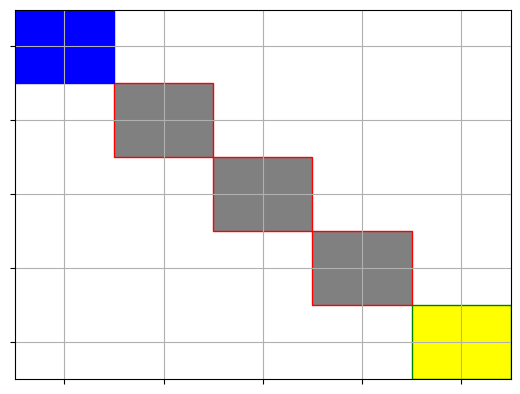

State: [0 1], Action: 0, Reward: -0.1, Done: False


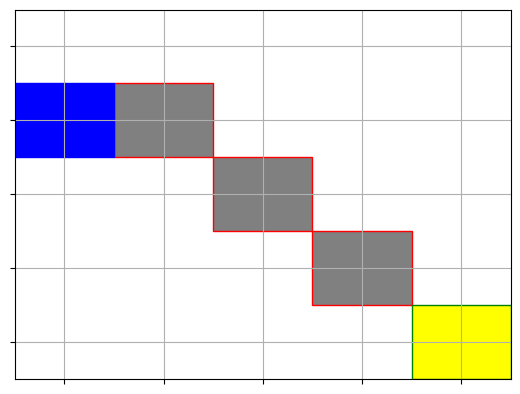

State: [0 1], Action: 1, Reward: -0.1, Done: False


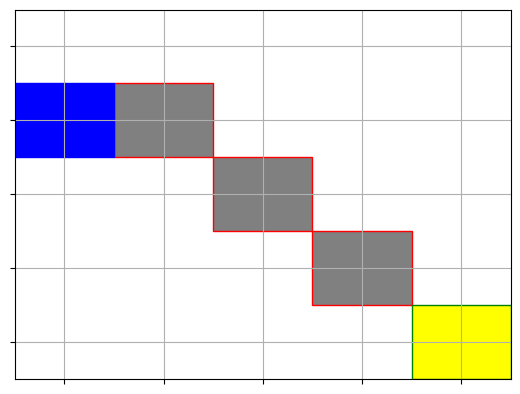

State: [0 1], Action: 3, Reward: -0.1, Done: False


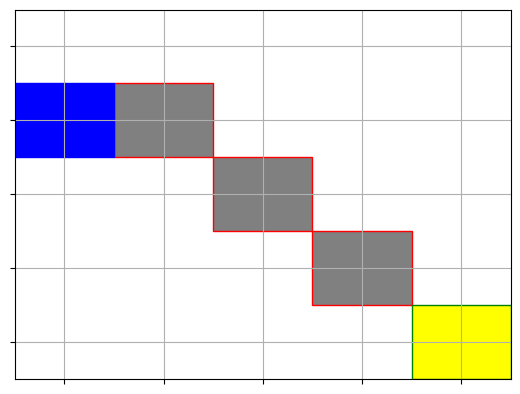

State: [0 1], Action: 1, Reward: -0.1, Done: False


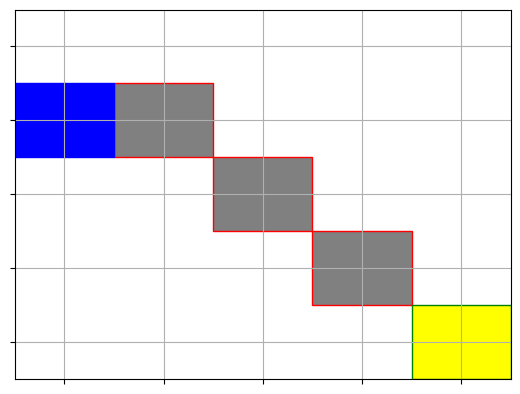

State: [0 1], Action: 1, Reward: -0.1, Done: False


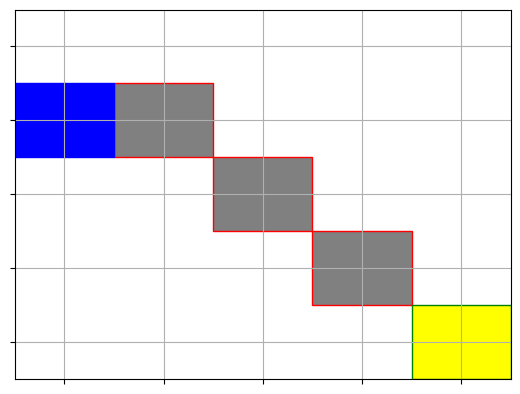

State: [0 0], Action: 2, Reward: -0.1, Done: False


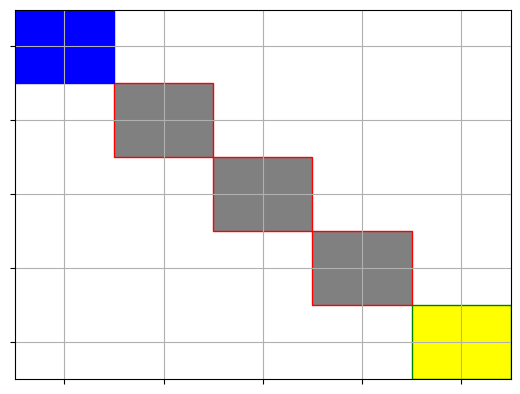

State: [0 0], Action: 3, Reward: -0.1, Done: False


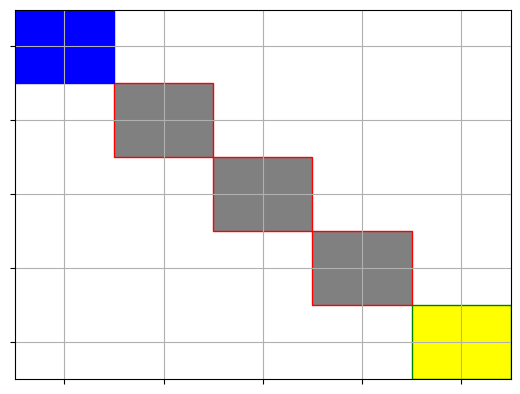

State: [1 0], Action: 1, Reward: -0.1, Done: False


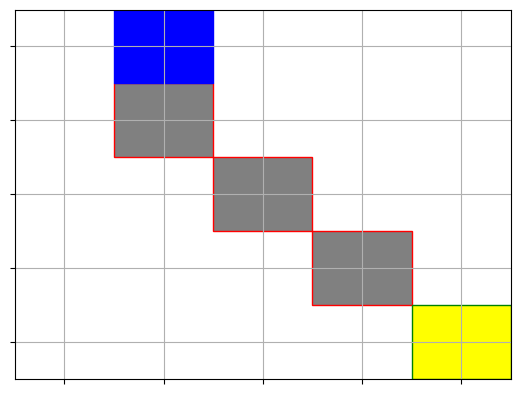

State: [1 0], Action: 2, Reward: -0.1, Done: False


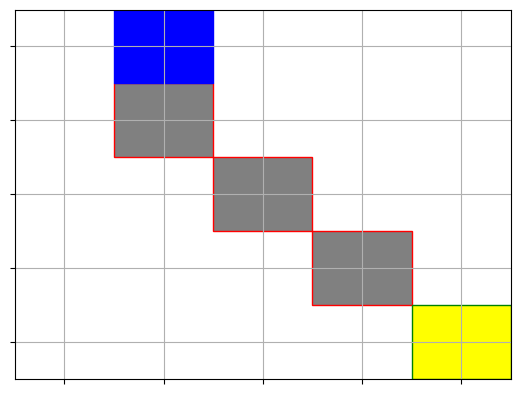

State: [0 0], Action: 3, Reward: -0.1, Done: False


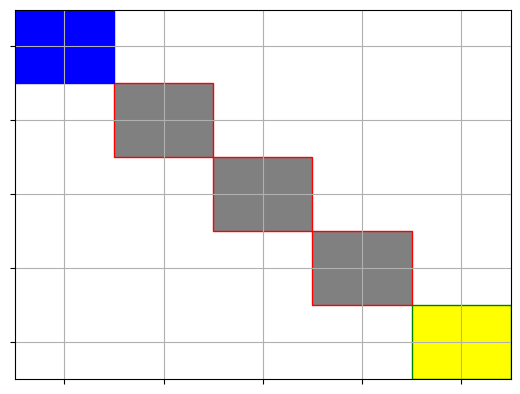

State: [1 0], Action: 1, Reward: -0.1, Done: False


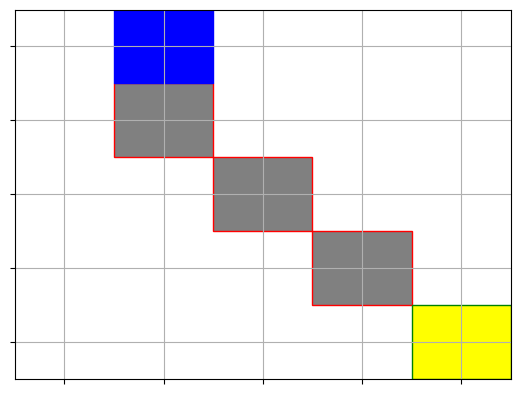

State: [0 0], Action: 3, Reward: -0.1, Done: False


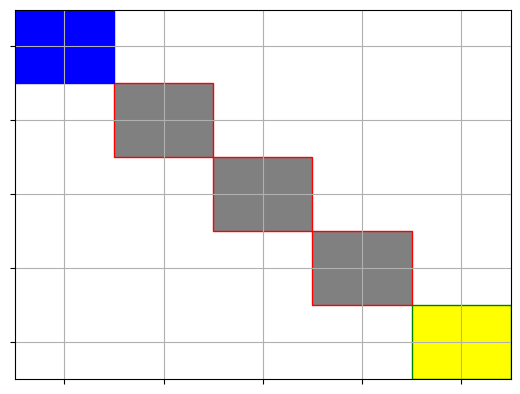

State: [0 0], Action: 3, Reward: -0.1, Done: False


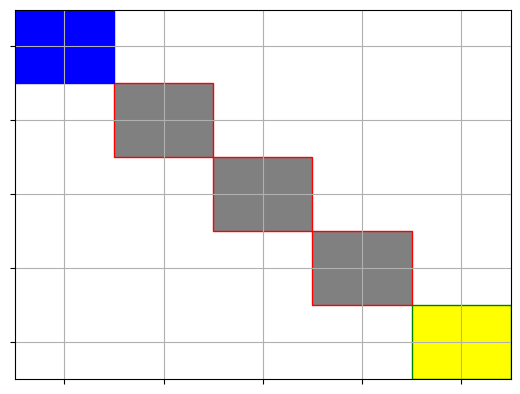

State: [0 0], Action: 3, Reward: -0.1, Done: False


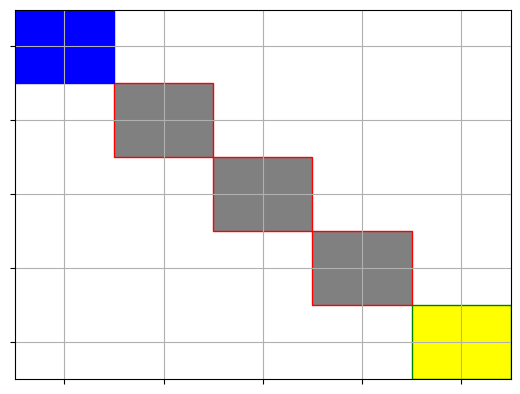

State: [0 0], Action: 3, Reward: -0.1, Done: False


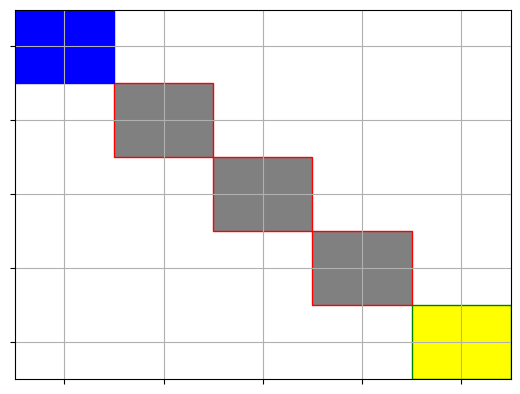

State: [0 0], Action: 2, Reward: -0.1, Done: False


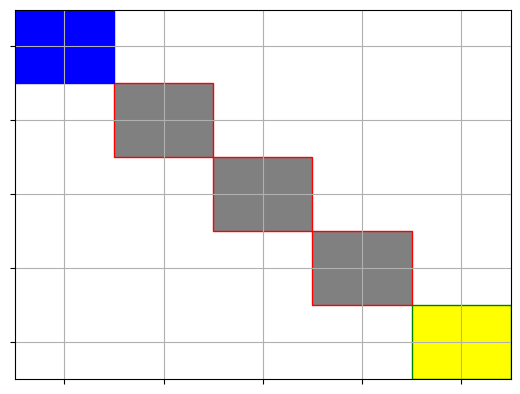

State: [0 1], Action: 0, Reward: -0.1, Done: False


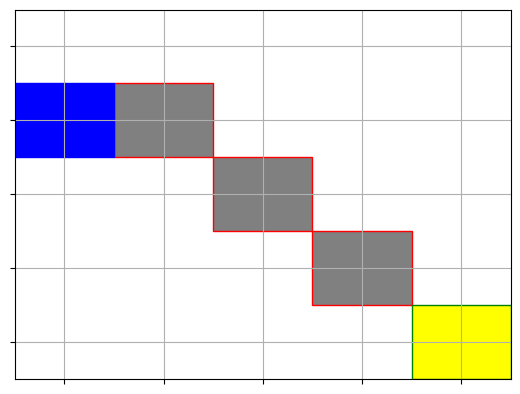

State: [0 2], Action: 0, Reward: -0.1, Done: False


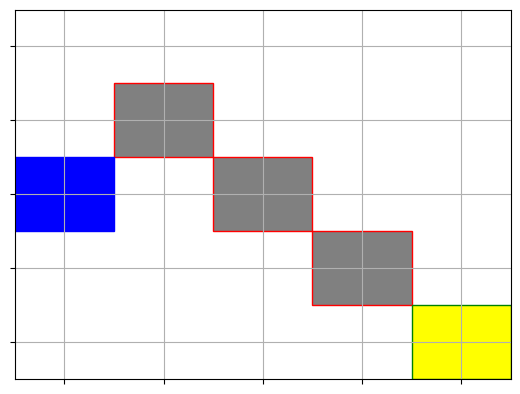

State: [0 2], Action: 3, Reward: -0.1, Done: False


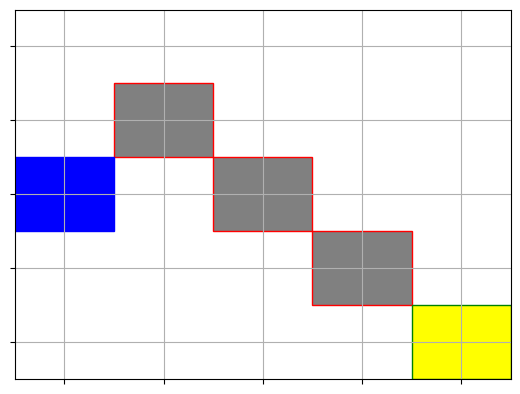

State: [1 2], Action: 1, Reward: -0.1, Done: False


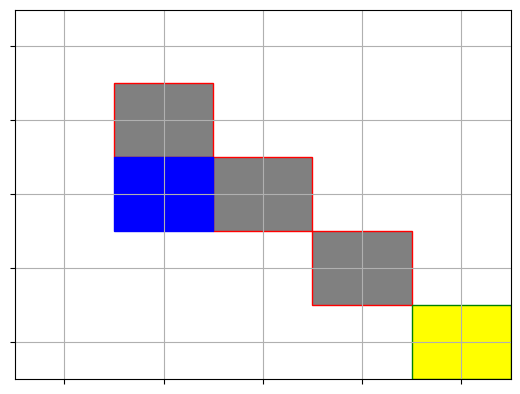

State: [1 2], Action: 2, Reward: -0.1, Done: False


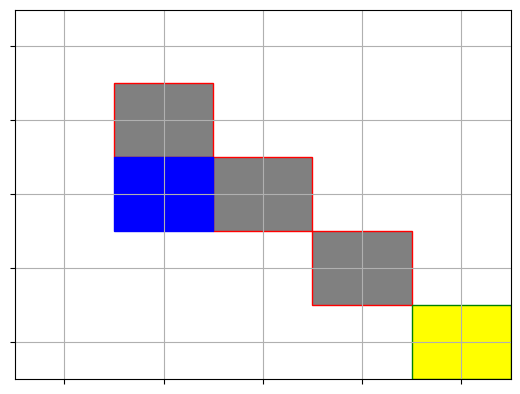

State: [1 2], Action: 1, Reward: -0.1, Done: False


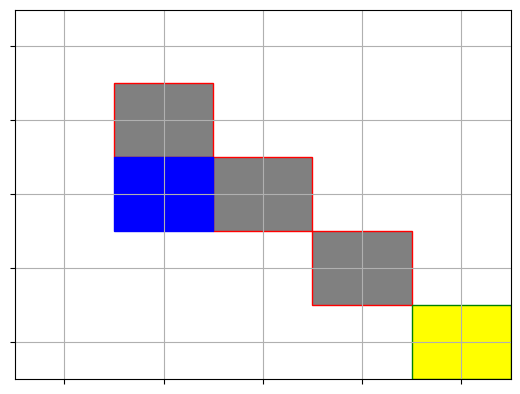

State: [1 3], Action: 0, Reward: -0.1, Done: False


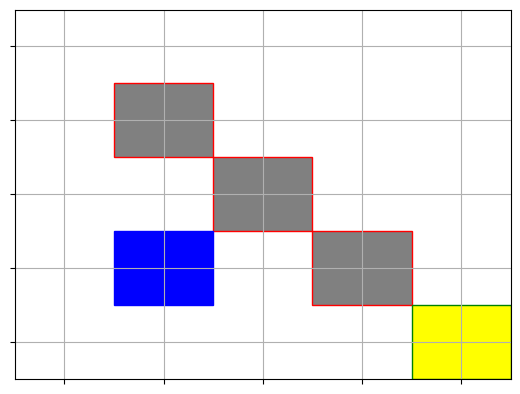

State: [0 3], Action: 3, Reward: -0.1, Done: False


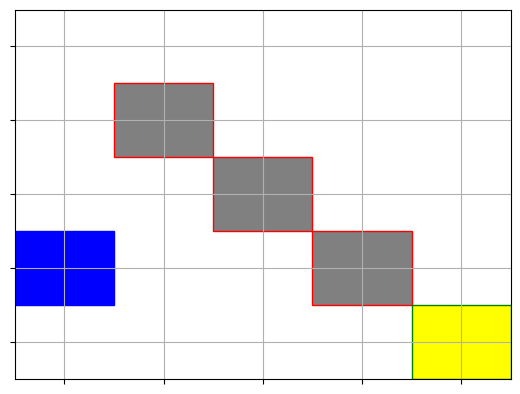

State: [0 2], Action: 2, Reward: -0.1, Done: False


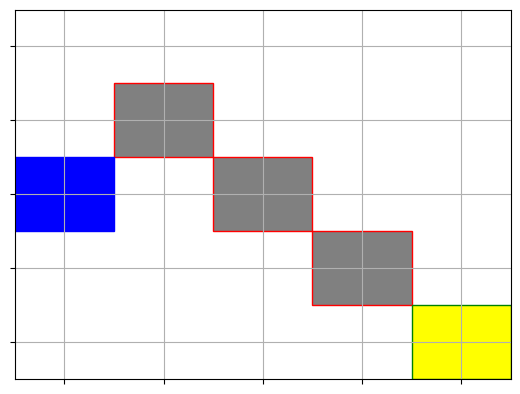

State: [1 2], Action: 1, Reward: -0.1, Done: False


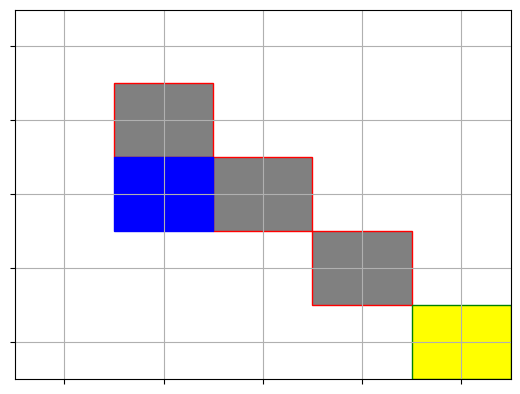

State: [0 2], Action: 3, Reward: -0.1, Done: False


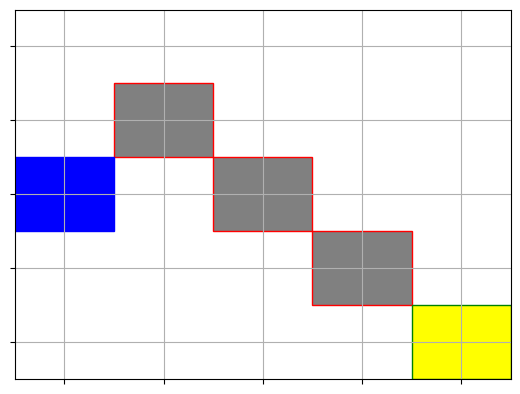

State: [0 1], Action: 2, Reward: -0.1, Done: False


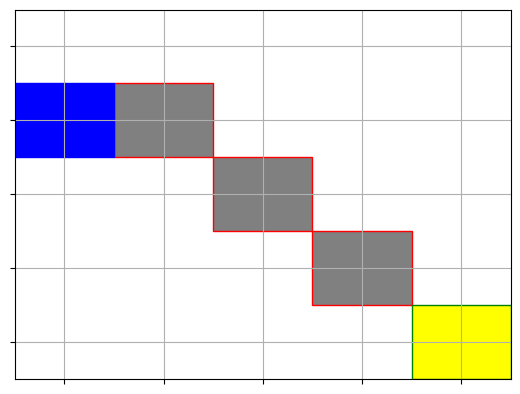

State: [0 2], Action: 0, Reward: -0.1, Done: False


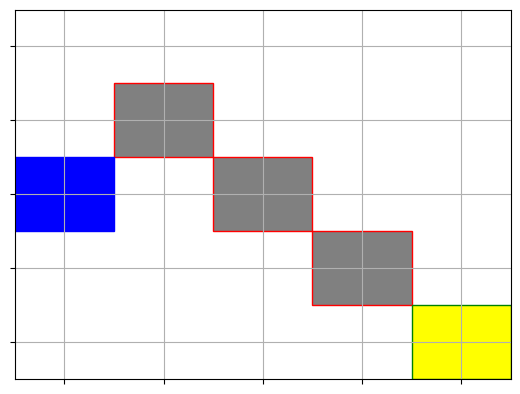

State: [0 2], Action: 3, Reward: -0.1, Done: False


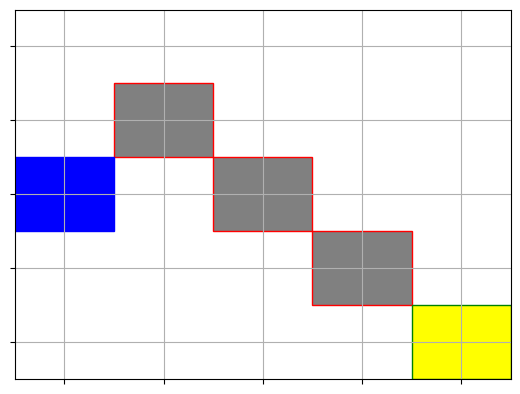

State: [0 2], Action: 3, Reward: -0.1, Done: False


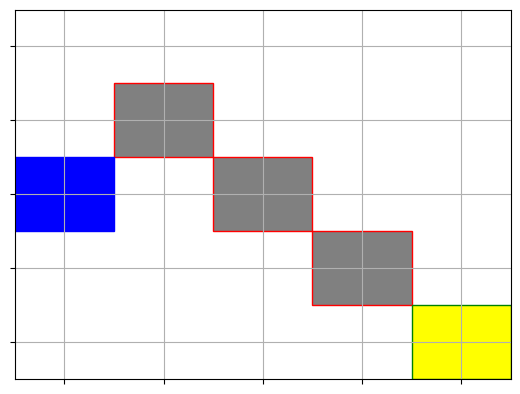

State: [0 2], Action: 3, Reward: -0.1, Done: False


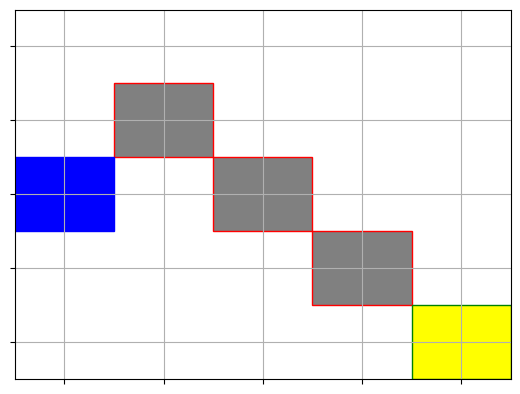

State: [1 2], Action: 1, Reward: -0.1, Done: False


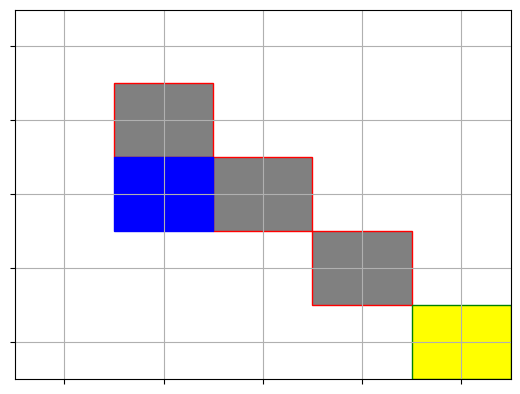

State: [1 2], Action: 2, Reward: -0.1, Done: False


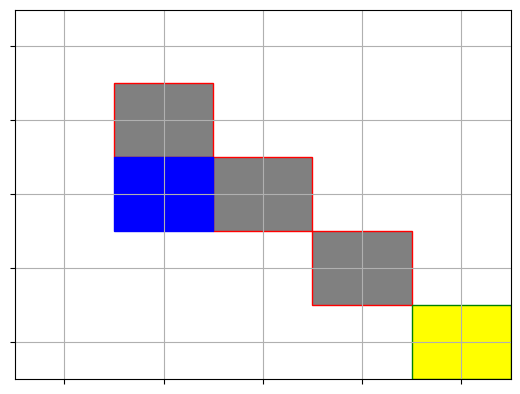

State: [1 3], Action: 0, Reward: -0.1, Done: False


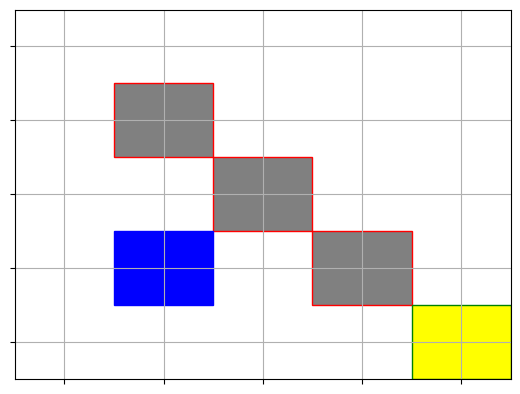

State: [0 3], Action: 3, Reward: -0.1, Done: False


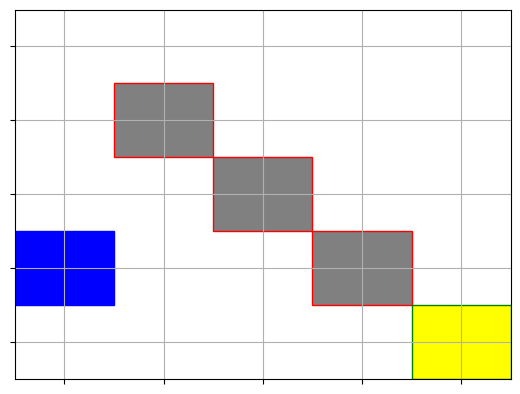

State: [1 3], Action: 1, Reward: -0.1, Done: False


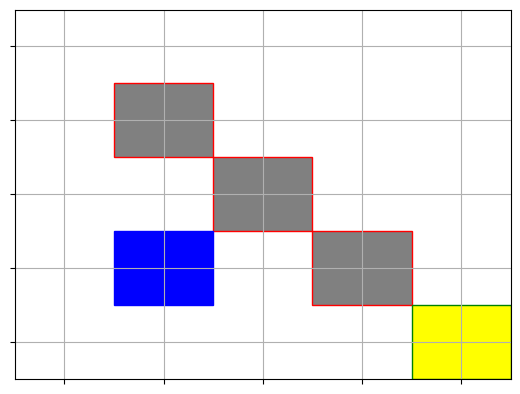

State: [0 3], Action: 3, Reward: -0.1, Done: False


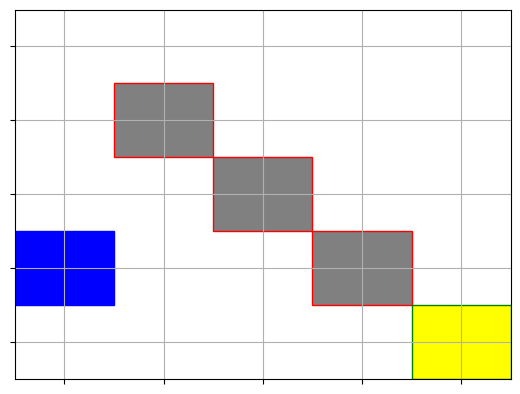

State: [0 3], Action: 3, Reward: -0.1, Done: False


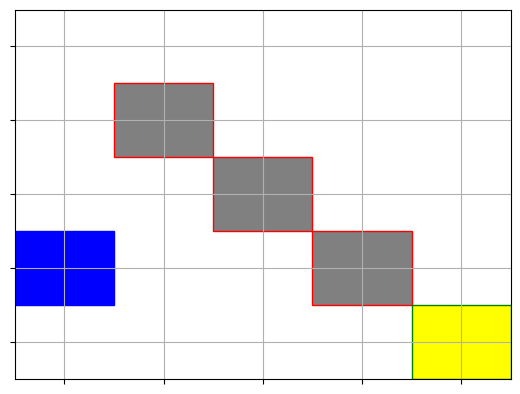

State: [0 4], Action: 0, Reward: -0.1, Done: False


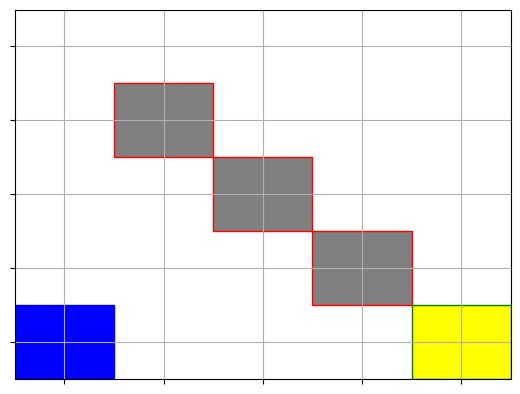

State: [1 4], Action: 1, Reward: -0.1, Done: False


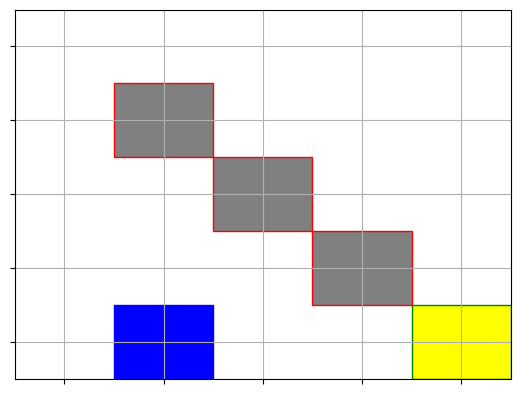

State: [1 4], Action: 0, Reward: -0.1, Done: False


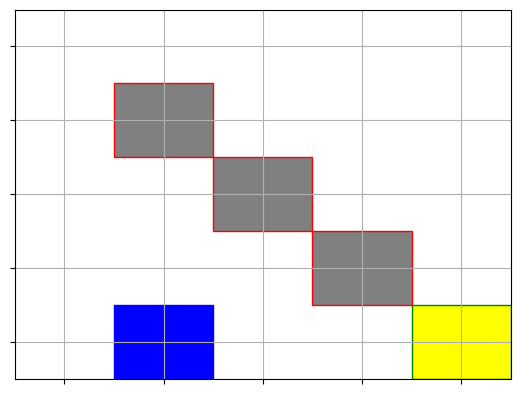

State: [1 3], Action: 2, Reward: -0.1, Done: False


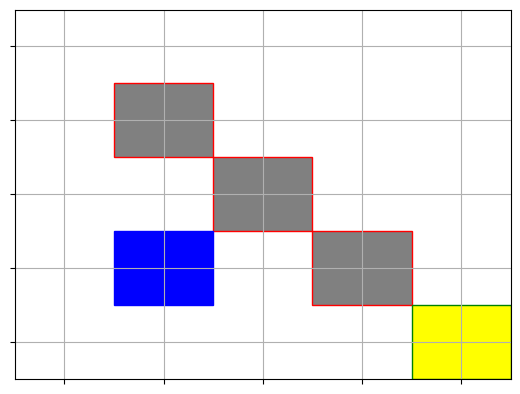

State: [0 3], Action: 3, Reward: -0.1, Done: False


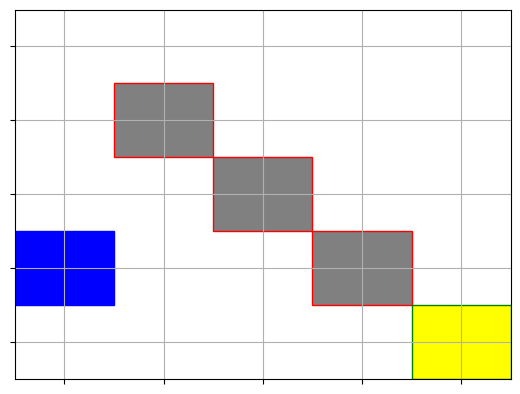

State: [0 4], Action: 0, Reward: -0.1, Done: False


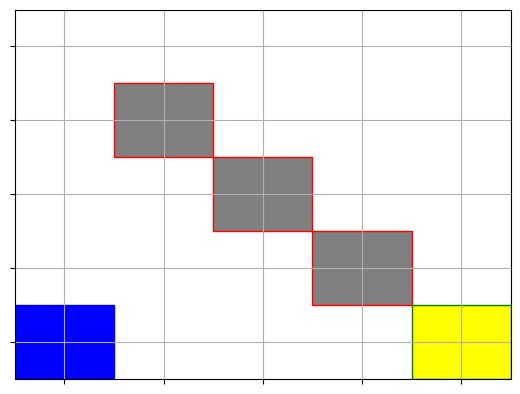

State: [0 3], Action: 2, Reward: -0.1, Done: False


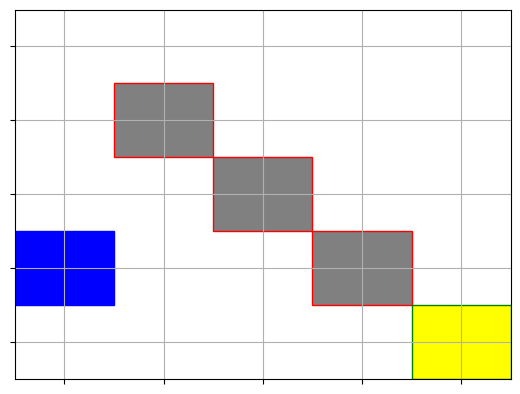

State: [1 3], Action: 1, Reward: -0.1, Done: False


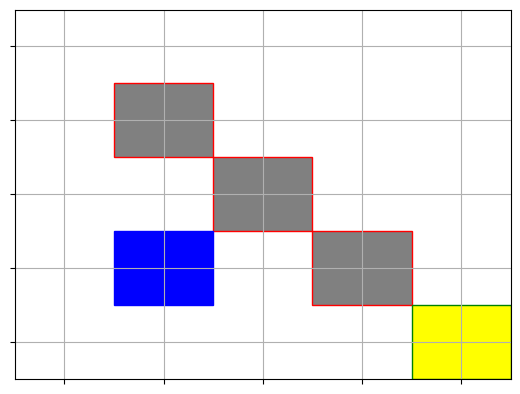

State: [2 3], Action: 1, Reward: -0.1, Done: False


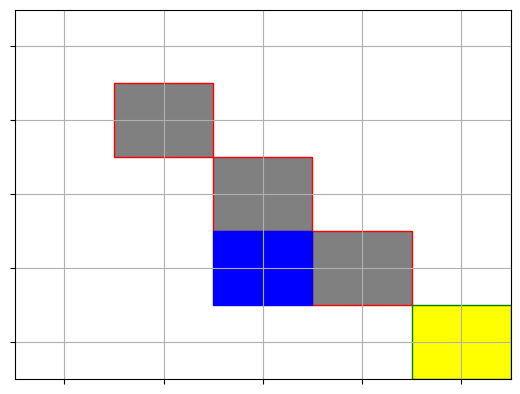

State: [2 3], Action: 2, Reward: -0.1, Done: False


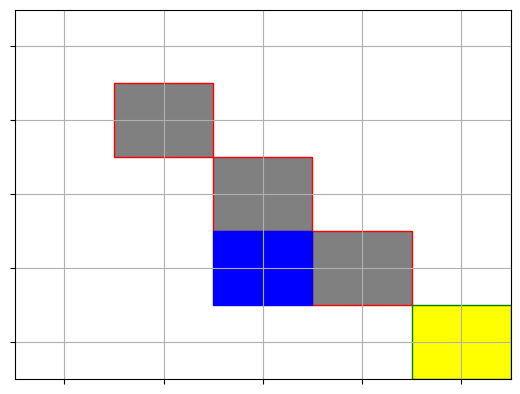

State: [2 3], Action: 2, Reward: -0.1, Done: False


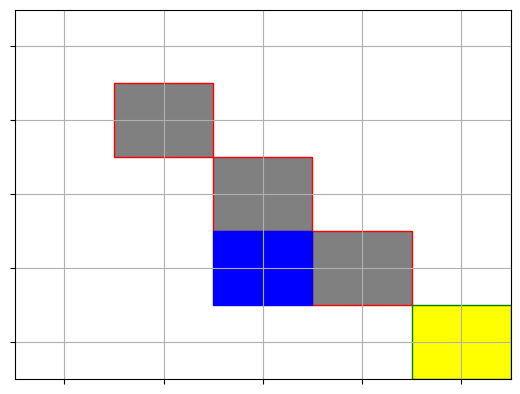

State: [1 3], Action: 3, Reward: -0.1, Done: False


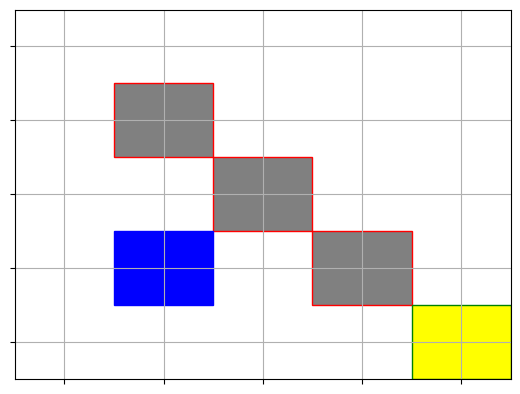

State: [2 3], Action: 1, Reward: -0.1, Done: False


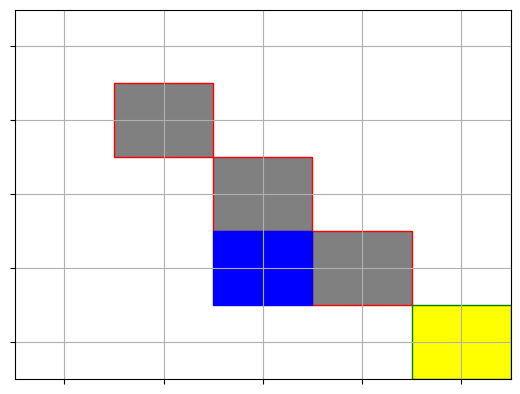

State: [1 3], Action: 3, Reward: -0.1, Done: False


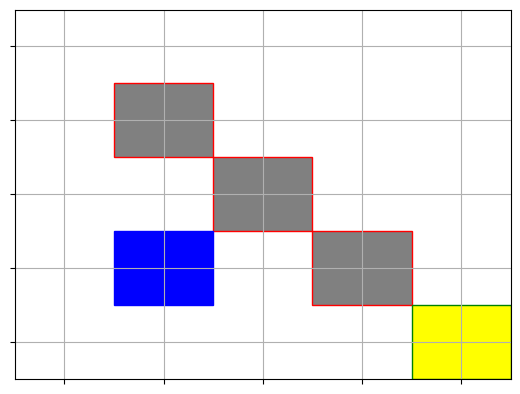

State: [0 3], Action: 3, Reward: -0.1, Done: False


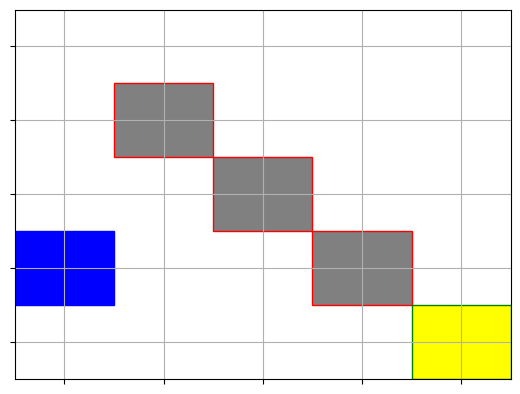

State: [0 2], Action: 2, Reward: -0.1, Done: False


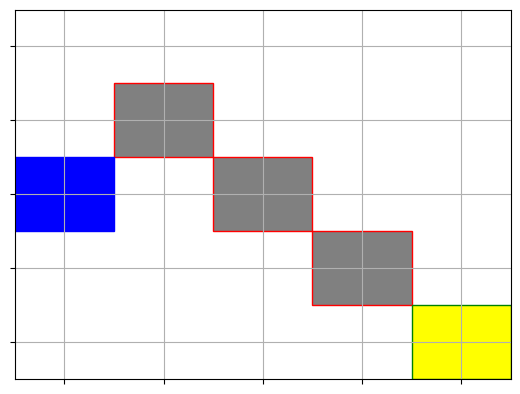

State: [1 2], Action: 1, Reward: -0.1, Done: False


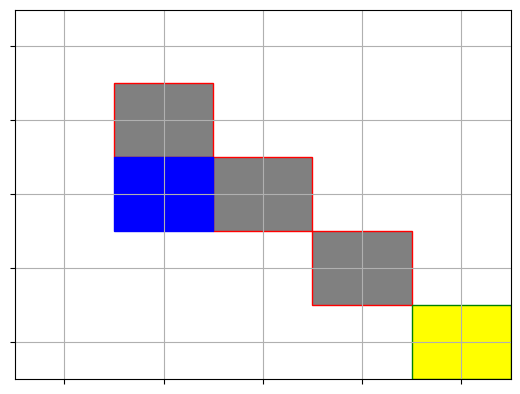

State: [1 2], Action: 2, Reward: -0.1, Done: False


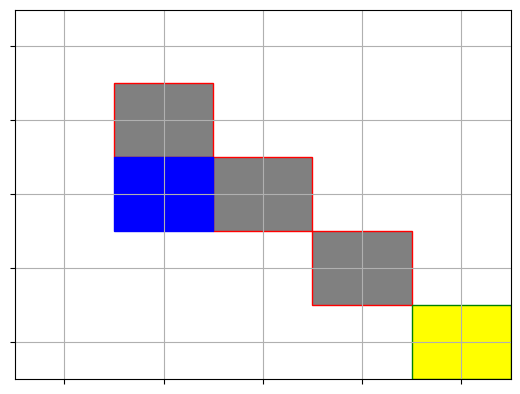

State: [1 2], Action: 2, Reward: -0.1, Done: False


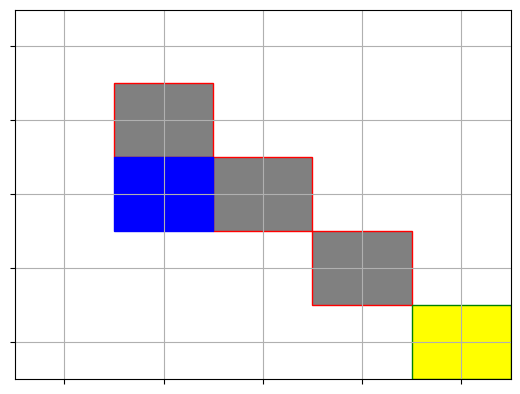

State: [1 2], Action: 2, Reward: -0.1, Done: False


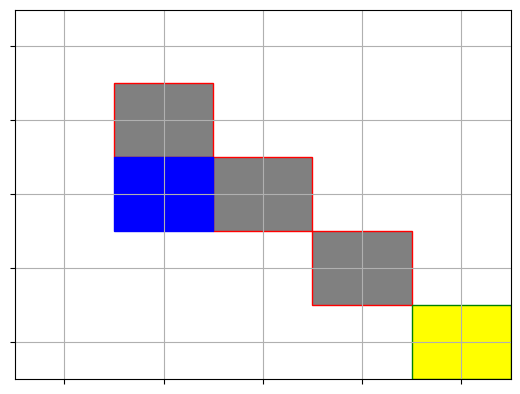

State: [1 3], Action: 0, Reward: -0.1, Done: False


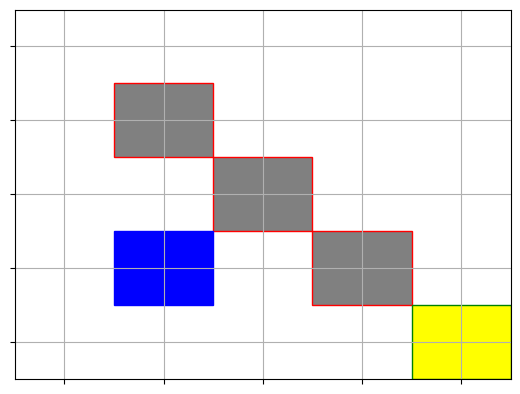

State: [0 3], Action: 3, Reward: -0.1, Done: False


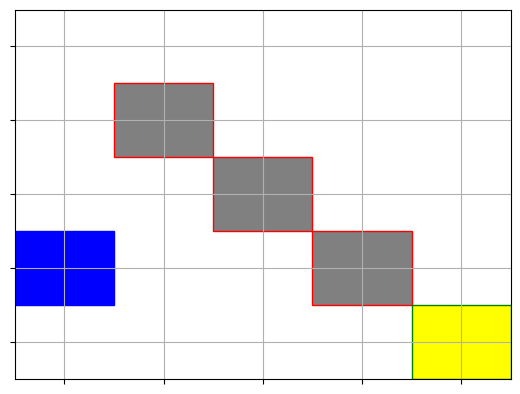

State: [0 3], Action: 3, Reward: -0.1, Done: False


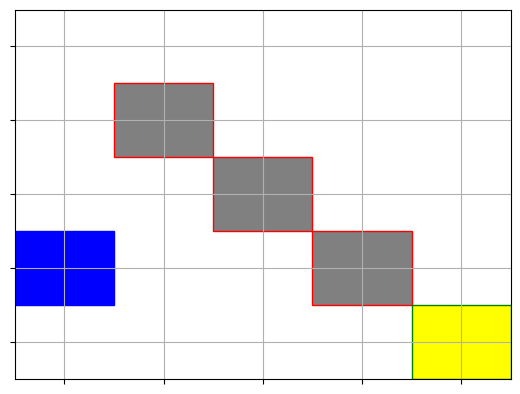

State: [0 2], Action: 2, Reward: -0.1, Done: False


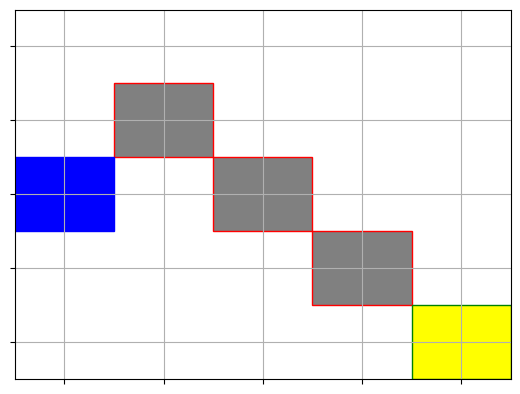

State: [1 2], Action: 1, Reward: -0.1, Done: False


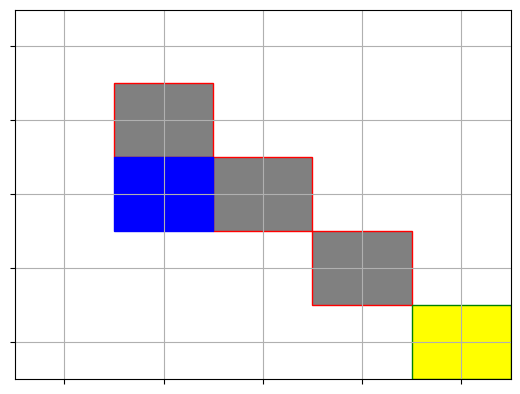

State: [1 2], Action: 2, Reward: -0.1, Done: False


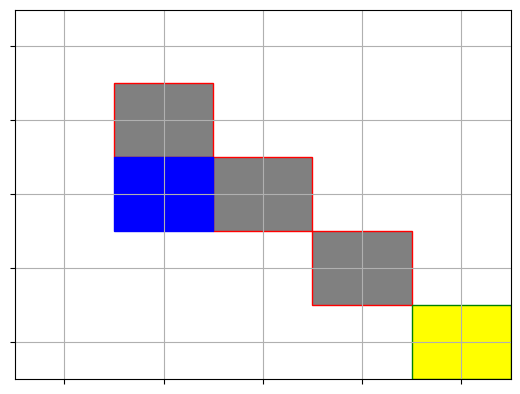

State: [1 2], Action: 1, Reward: -0.1, Done: False


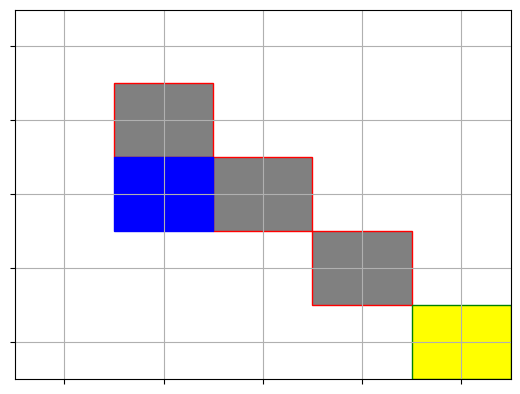

State: [0 2], Action: 3, Reward: -0.1, Done: False


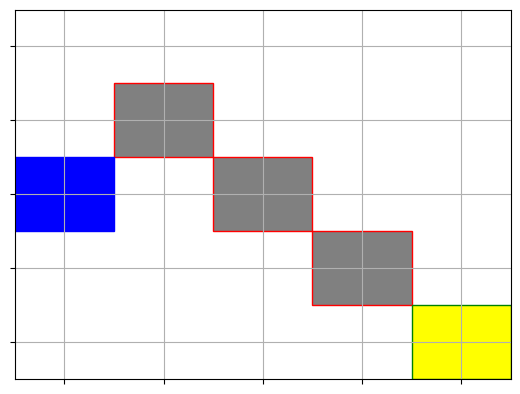

State: [0 2], Action: 3, Reward: -0.1, Done: False


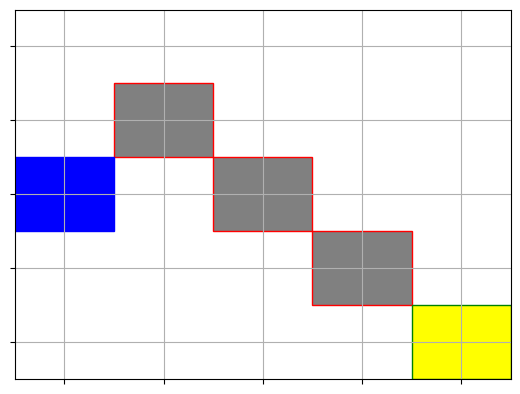

State: [0 3], Action: 0, Reward: -0.1, Done: False


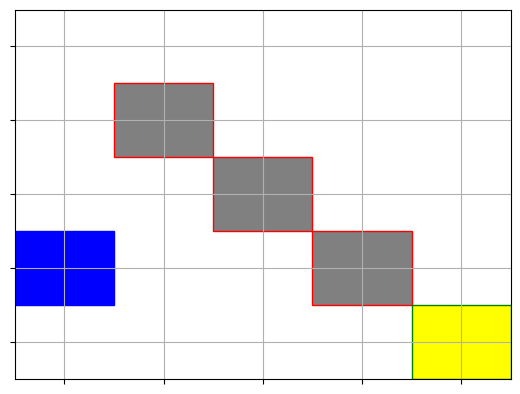

State: [1 3], Action: 1, Reward: -0.1, Done: False


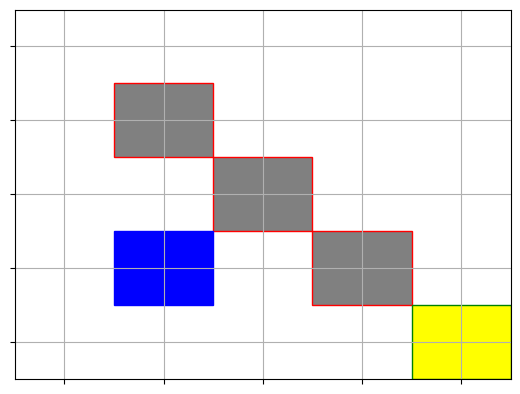

State: [1 4], Action: 0, Reward: -0.1, Done: False


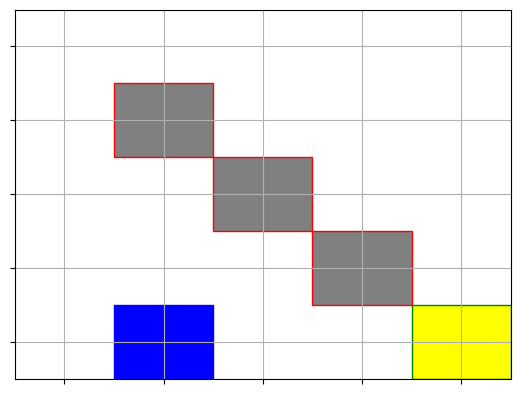

State: [2 4], Action: 1, Reward: -0.1, Done: False


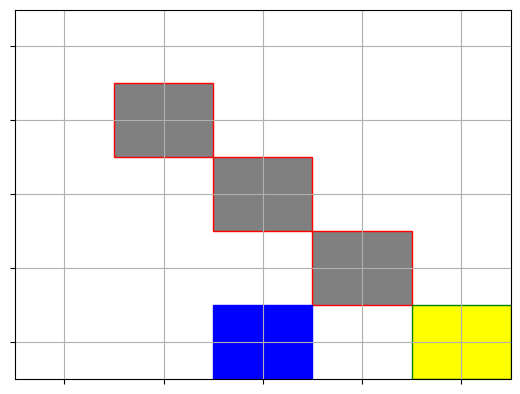

State: [1 4], Action: 3, Reward: -0.1, Done: False


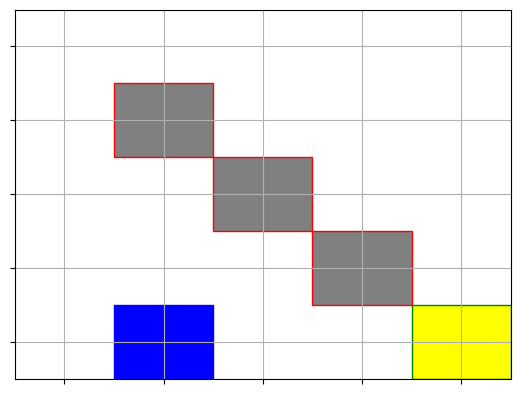

State: [0 4], Action: 3, Reward: -0.1, Done: False


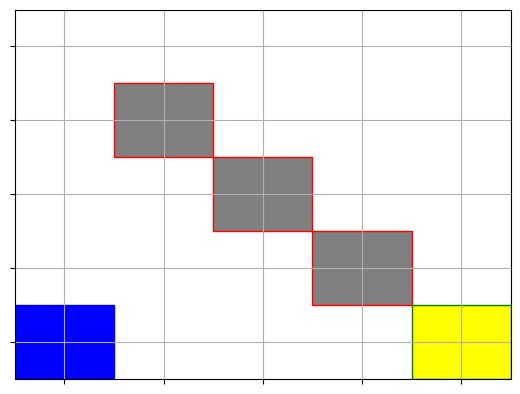

State: [1 4], Action: 1, Reward: -0.1, Done: False


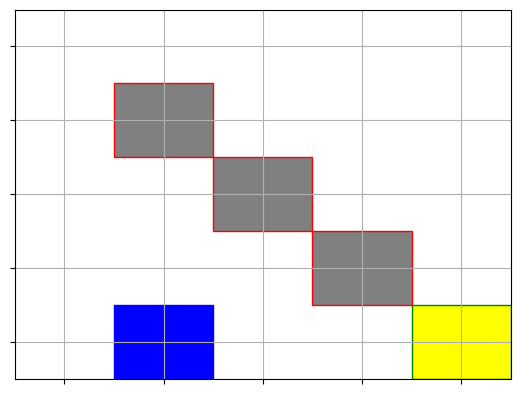

State: [2 4], Action: 1, Reward: -0.1, Done: False


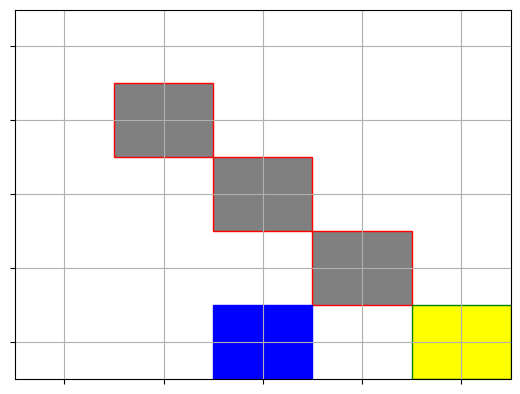

State: [1 4], Action: 3, Reward: -0.1, Done: False


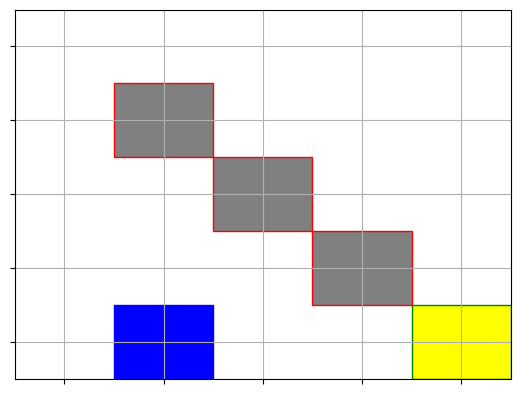

State: [1 4], Action: 0, Reward: -0.1, Done: False


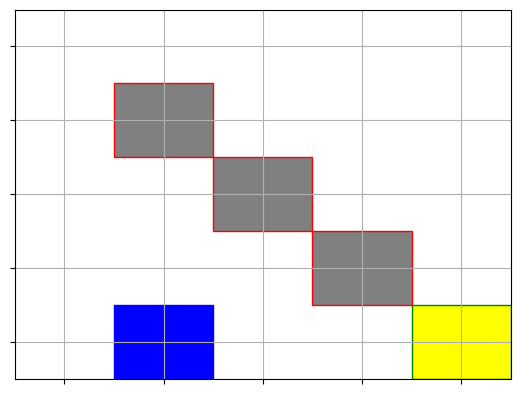

State: [2 4], Action: 1, Reward: -0.1, Done: False


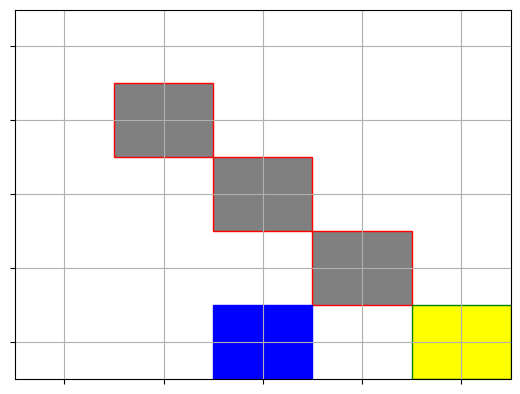

State: [1 4], Action: 3, Reward: -0.1, Done: False


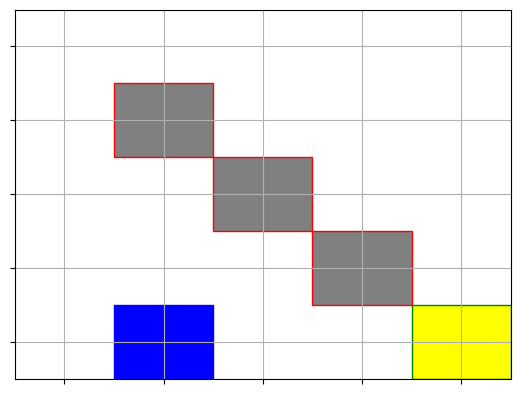

State: [1 3], Action: 2, Reward: -0.1, Done: False


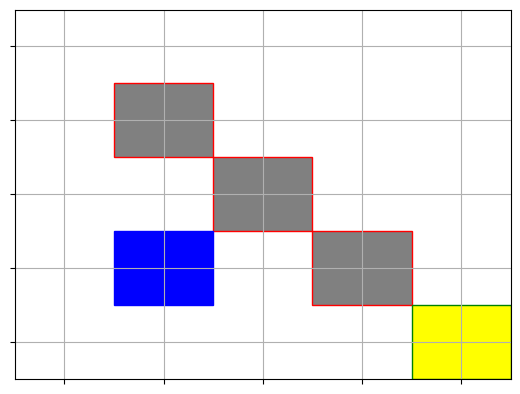

State: [1 2], Action: 2, Reward: -0.1, Done: False


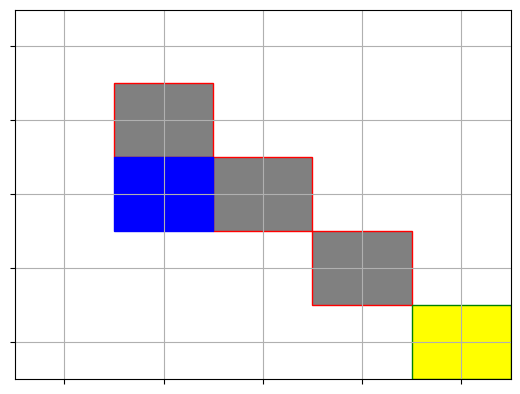

State: [1 2], Action: 1, Reward: -0.1, Done: False


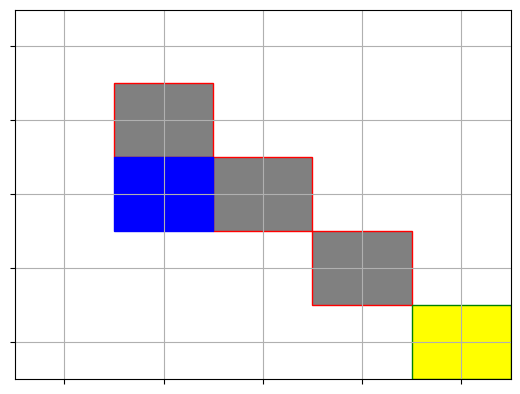

State: [0 2], Action: 3, Reward: -0.1, Done: False


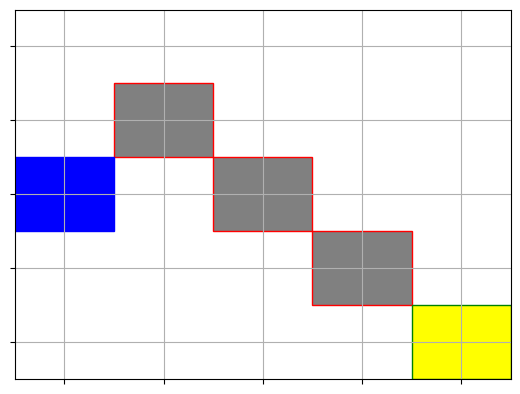

State: [0 3], Action: 0, Reward: -0.1, Done: False


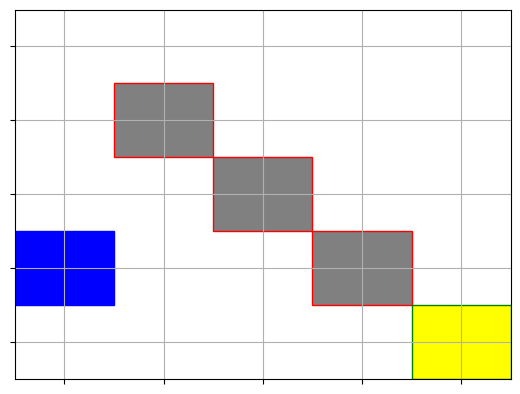

State: [0 2], Action: 2, Reward: -0.1, Done: False


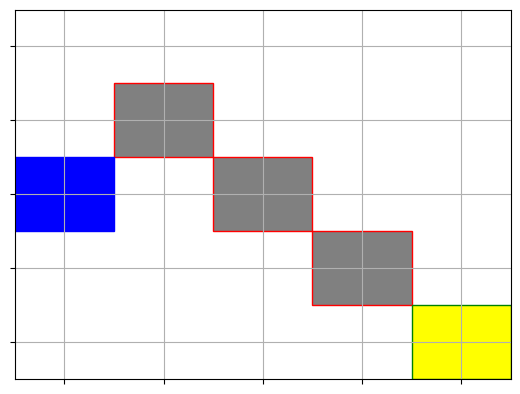

State: [0 2], Action: 3, Reward: -0.1, Done: False


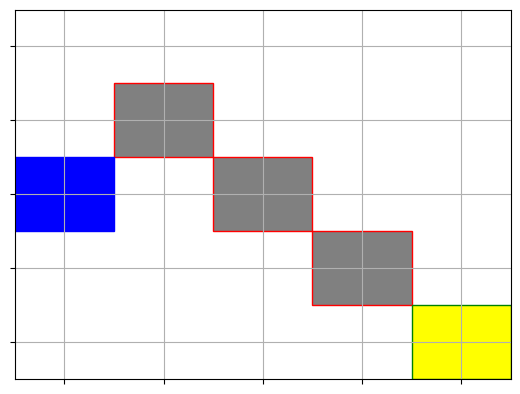

State: [0 1], Action: 2, Reward: -0.1, Done: False


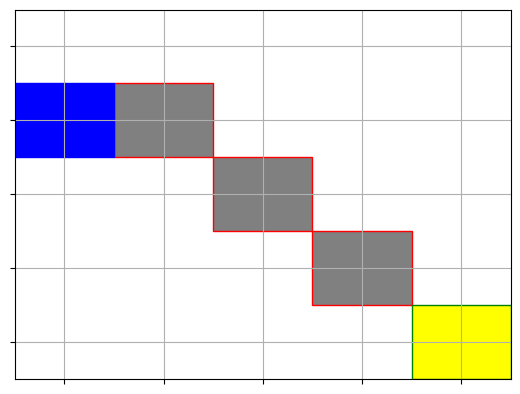

State: [0 2], Action: 0, Reward: -0.1, Done: False


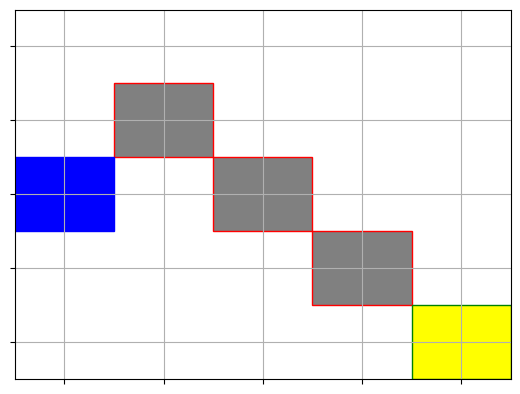

State: [1 2], Action: 1, Reward: -0.1, Done: False


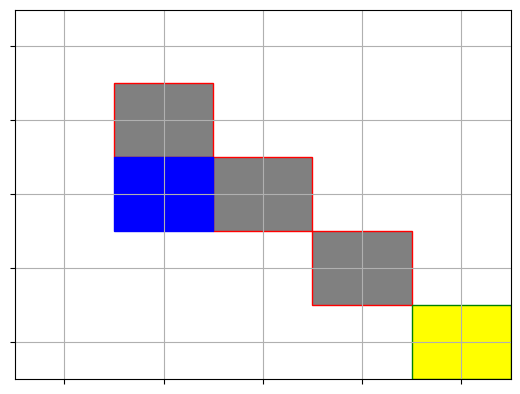

State: [1 2], Action: 2, Reward: -0.1, Done: False


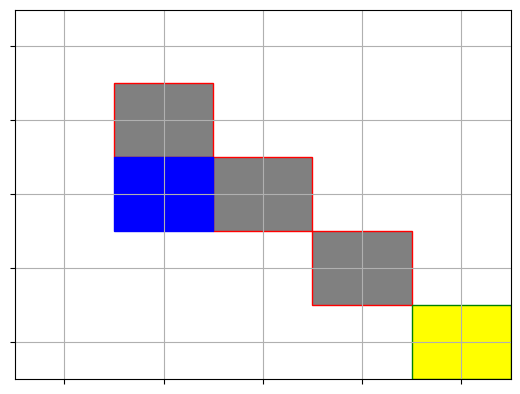

State: [1 2], Action: 1, Reward: -0.1, Done: False


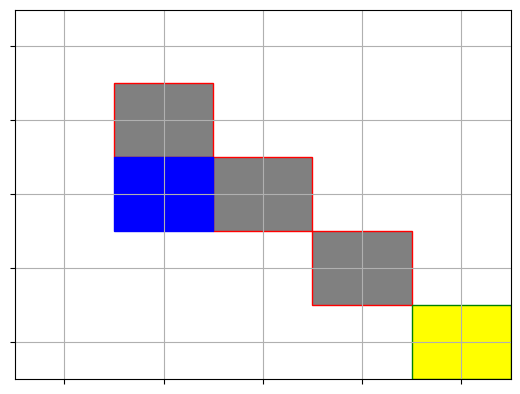

State: [1 2], Action: 1, Reward: -0.1, Done: False


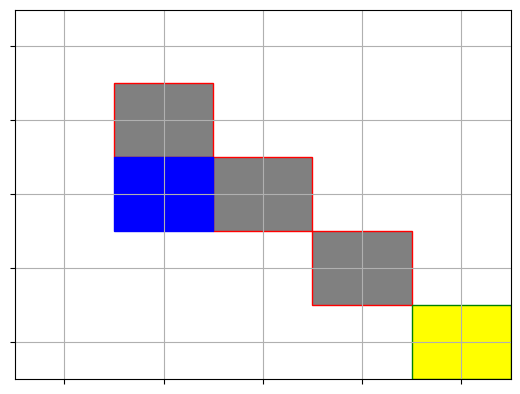

State: [1 2], Action: 1, Reward: -0.1, Done: False


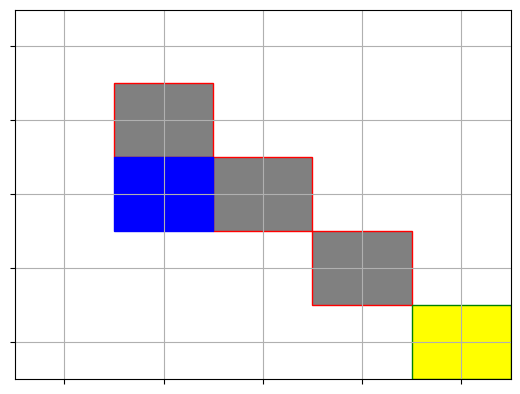

State: [1 2], Action: 1, Reward: -0.1, Done: False


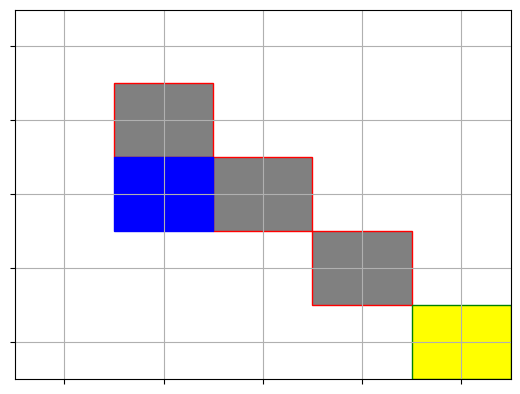

State: [1 2], Action: 1, Reward: -0.1, Done: False


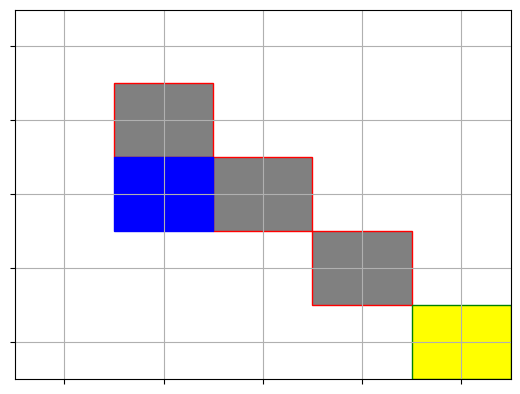

State: [1 2], Action: 2, Reward: -0.1, Done: False


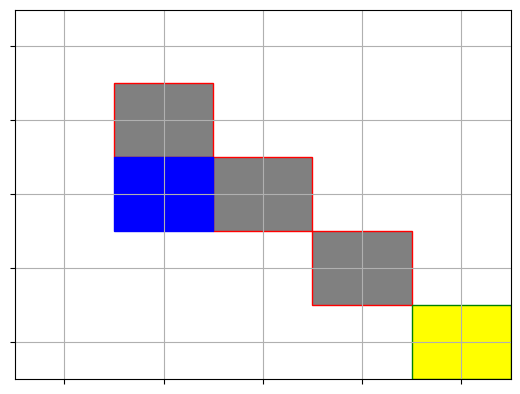

State: [1 2], Action: 1, Reward: -0.1, Done: False


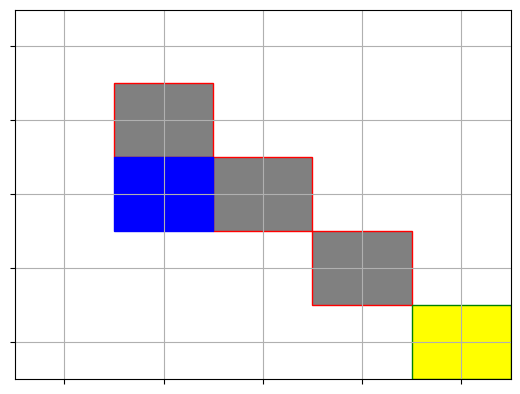

State: [0 2], Action: 3, Reward: -0.1, Done: False


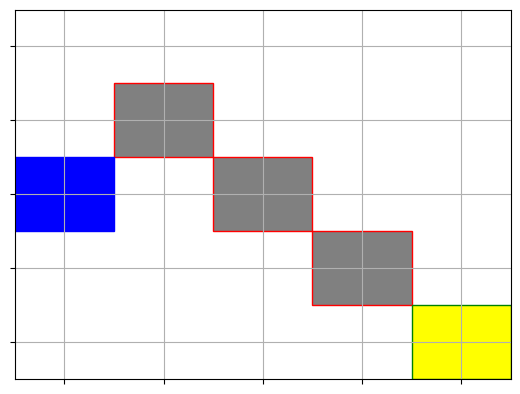

State: [1 2], Action: 1, Reward: -0.1, Done: False


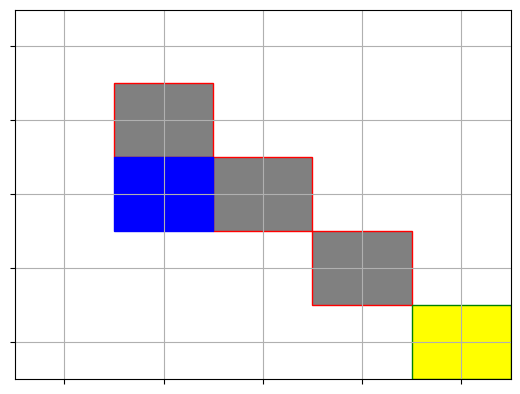

State: [1 3], Action: 0, Reward: -0.1, Done: False


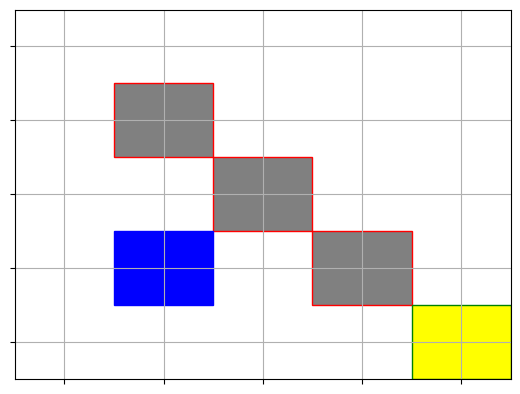

State: [1 2], Action: 2, Reward: -0.1, Done: False


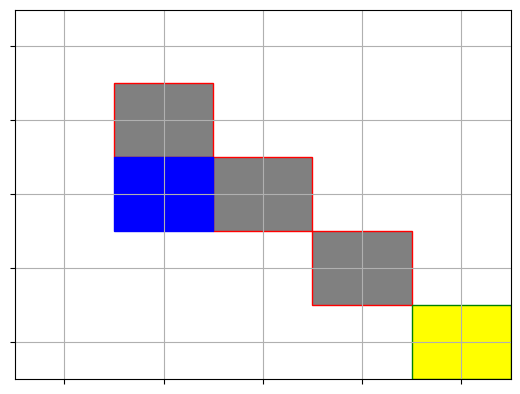

State: [1 2], Action: 2, Reward: -0.1, Done: False


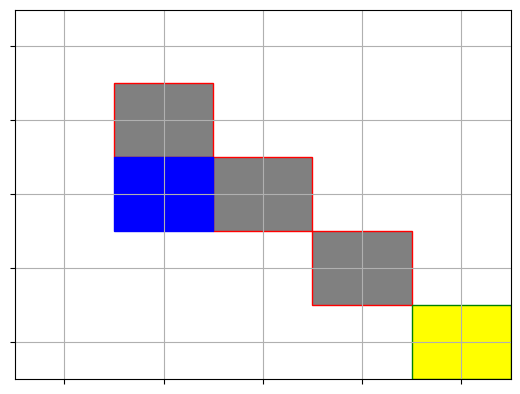

State: [1 2], Action: 1, Reward: -0.1, Done: False


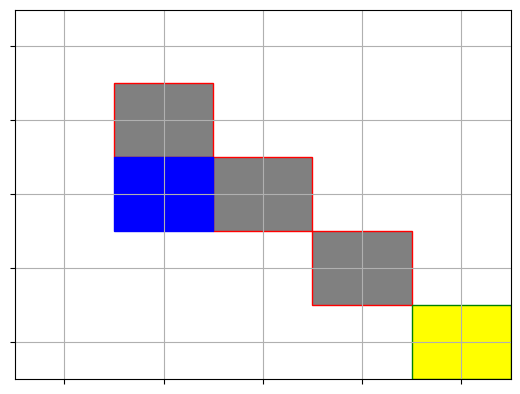

State: [1 2], Action: 1, Reward: -0.1, Done: False


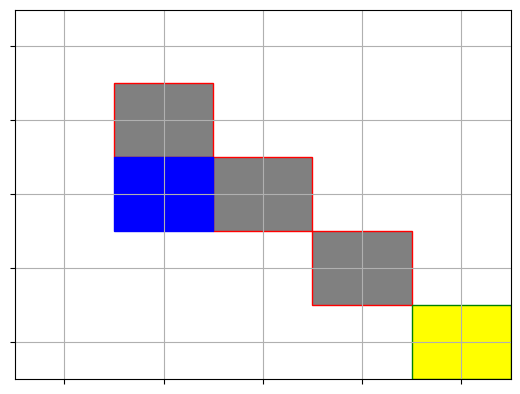

State: [1 2], Action: 1, Reward: -0.1, Done: False


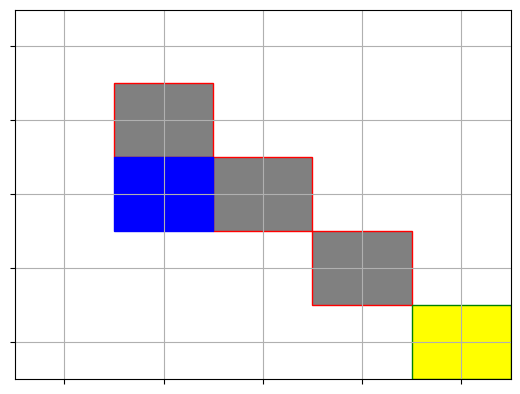

State: [1 3], Action: 0, Reward: -0.1, Done: False


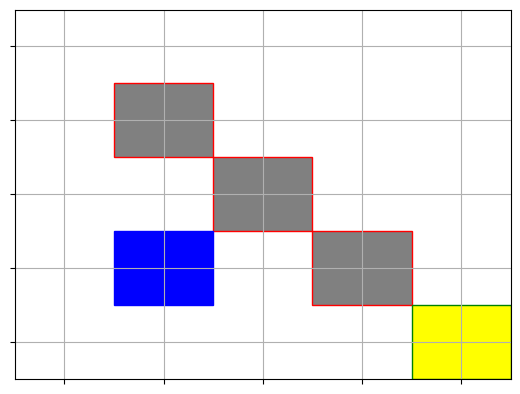

State: [2 3], Action: 1, Reward: -0.1, Done: False


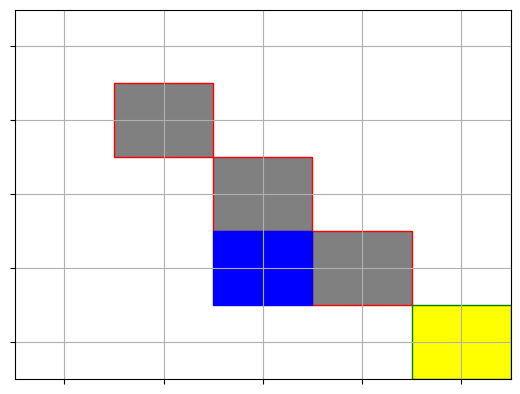

State: [2 3], Action: 2, Reward: -0.1, Done: False


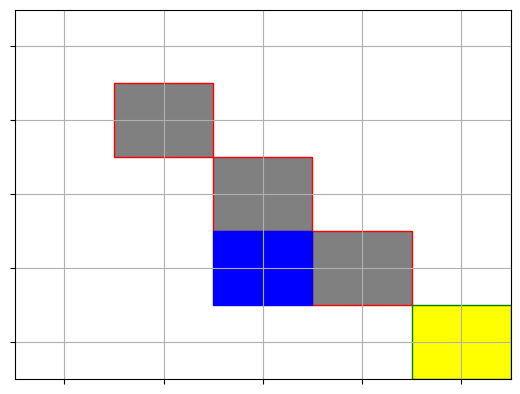

State: [2 3], Action: 2, Reward: -0.1, Done: False


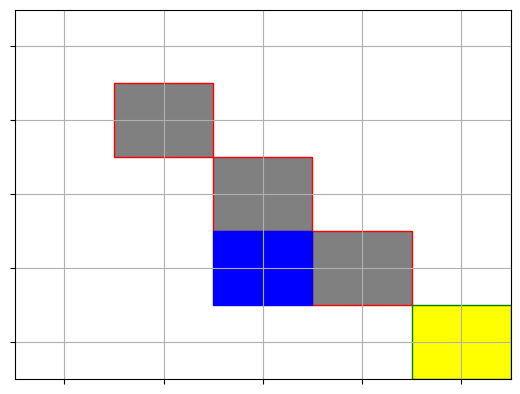

State: [2 3], Action: 1, Reward: -0.1, Done: False


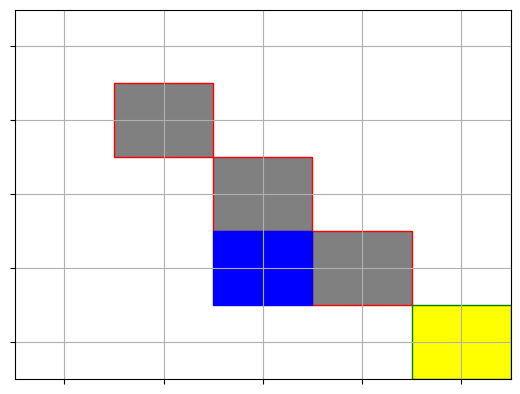

State: [2 4], Action: 0, Reward: -0.1, Done: False


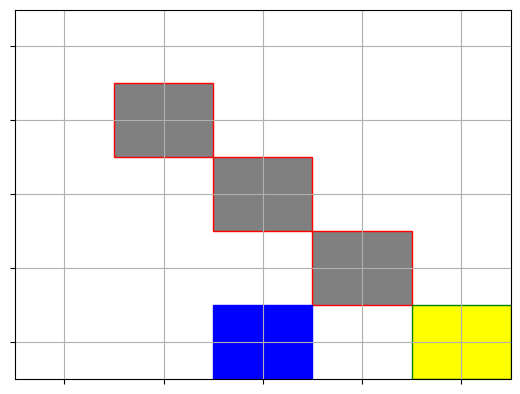

State: [2 4], Action: 0, Reward: -0.1, Done: False


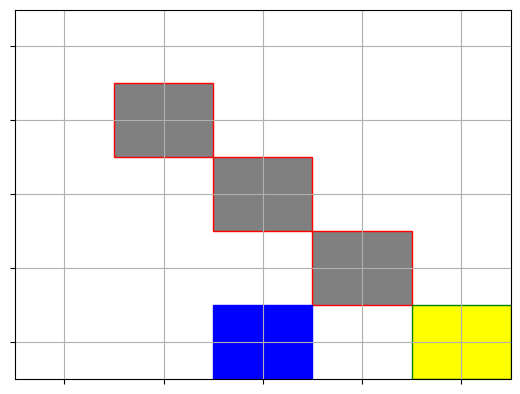

State: [1 4], Action: 3, Reward: -0.1, Done: False


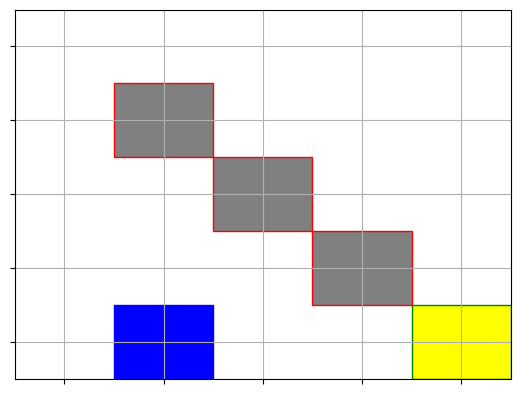

State: [2 4], Action: 1, Reward: -0.1, Done: False


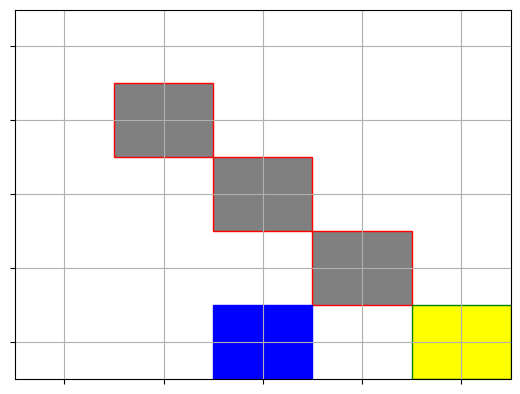

State: [1 4], Action: 3, Reward: -0.1, Done: False


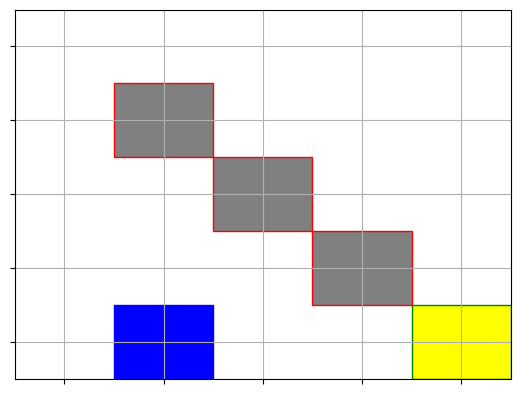

State: [0 4], Action: 3, Reward: -0.1, Done: False


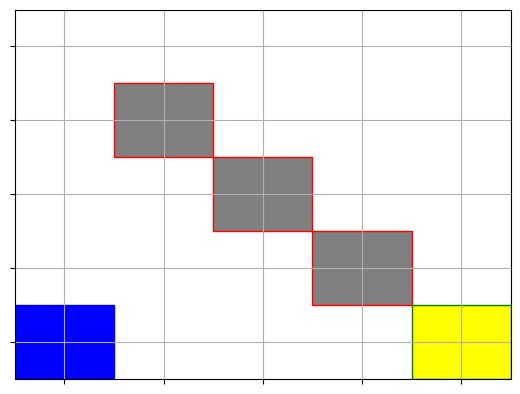

State: [1 4], Action: 1, Reward: -0.1, Done: False


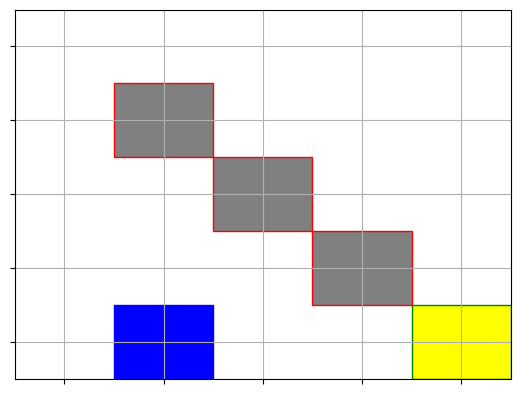

State: [2 4], Action: 1, Reward: -0.1, Done: False


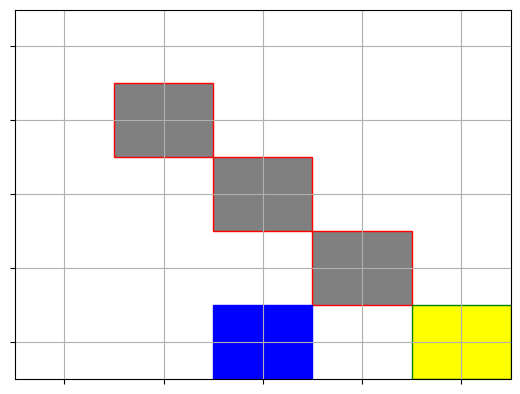

State: [2 3], Action: 2, Reward: -0.1, Done: False


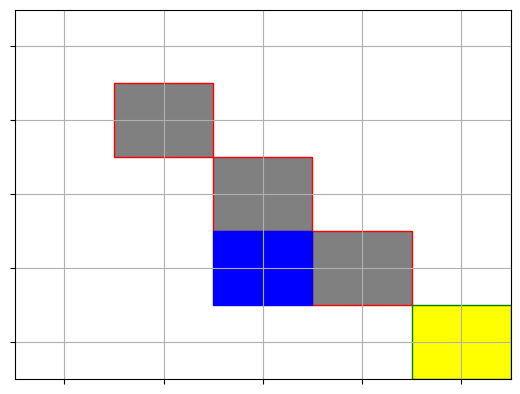

State: [2 3], Action: 1, Reward: -0.1, Done: False


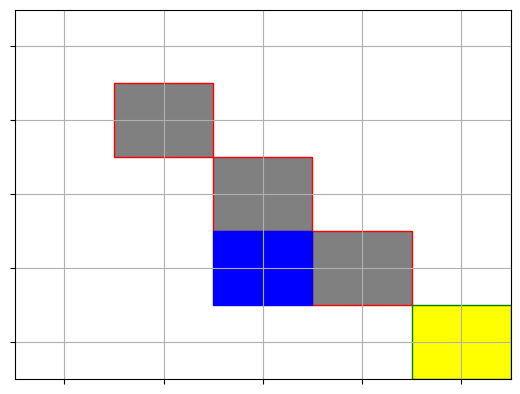

State: [2 3], Action: 2, Reward: -0.1, Done: False


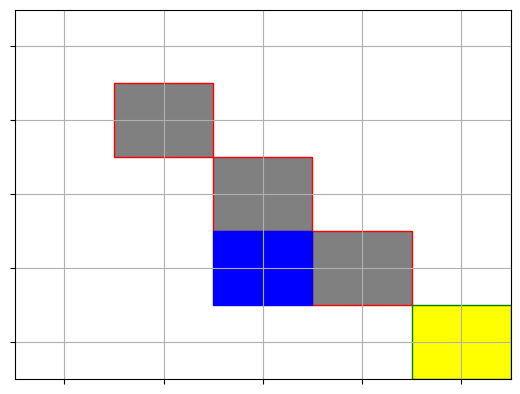

State: [2 4], Action: 0, Reward: -0.1, Done: False


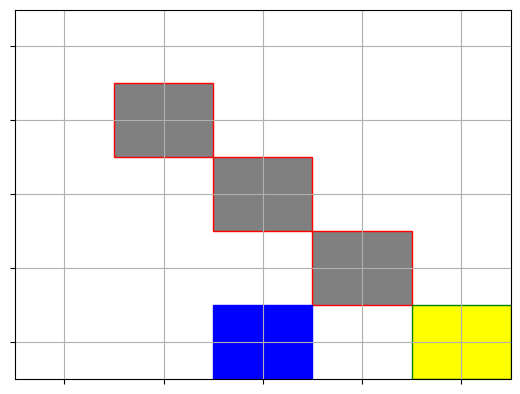

State: [1 4], Action: 3, Reward: -0.1, Done: False


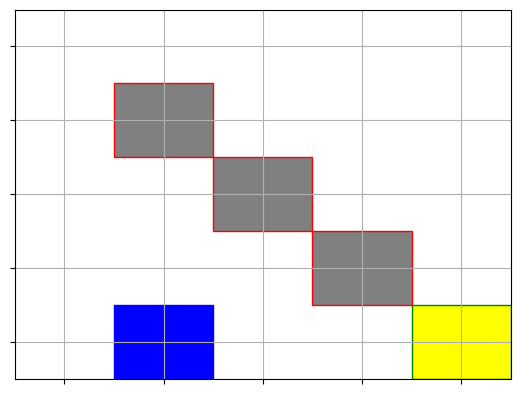

State: [1 4], Action: 0, Reward: -0.1, Done: False


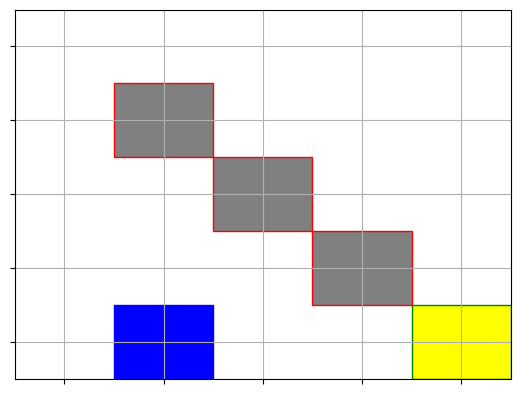

State: [0 4], Action: 3, Reward: -0.1, Done: False


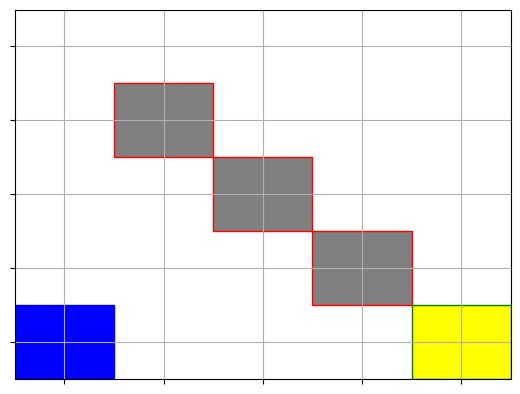

State: [1 4], Action: 1, Reward: -0.1, Done: False


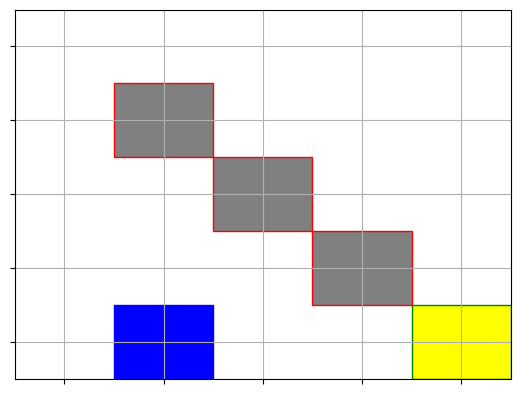

State: [2 4], Action: 1, Reward: -0.1, Done: False


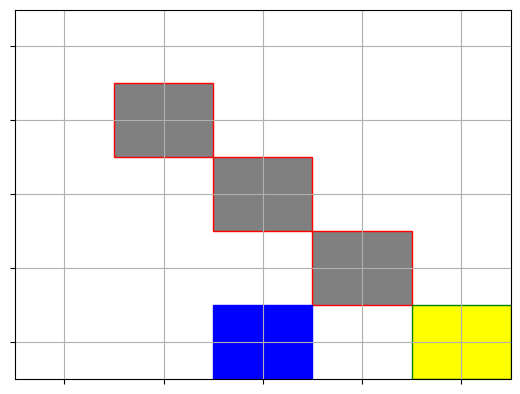

State: [2 4], Action: 0, Reward: -0.1, Done: False


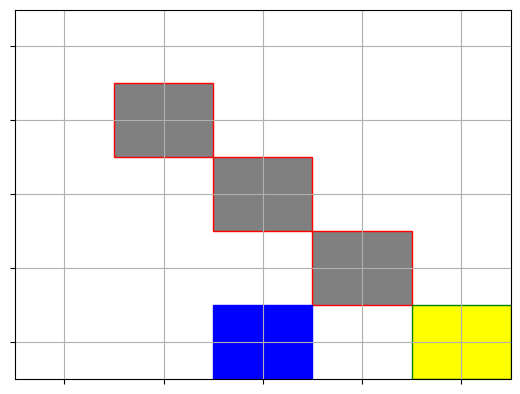

State: [2 4], Action: 0, Reward: -0.1, Done: False


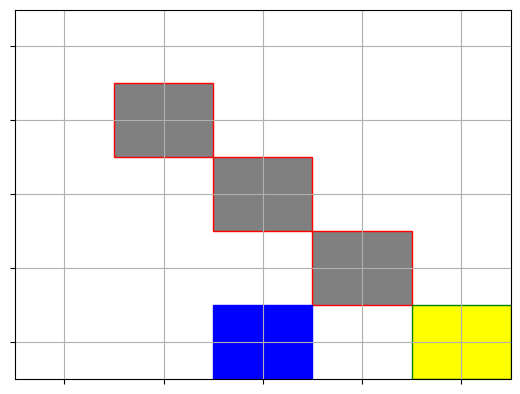

State: [2 3], Action: 2, Reward: -0.1, Done: False


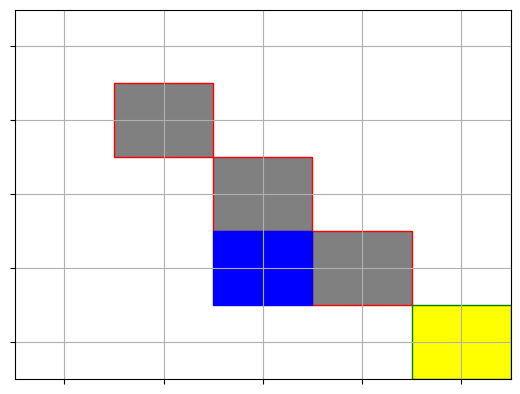

State: [2 4], Action: 0, Reward: -0.1, Done: False


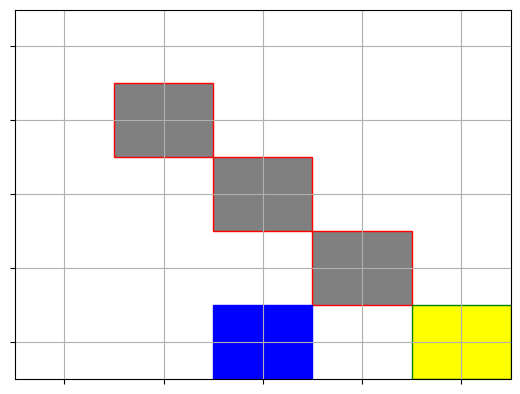

State: [2 3], Action: 2, Reward: -0.1, Done: False


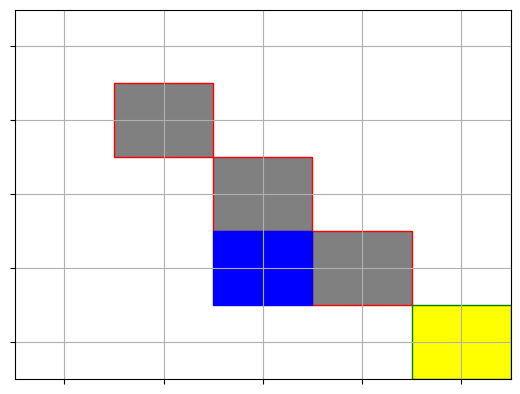

State: [2 3], Action: 1, Reward: -0.1, Done: False


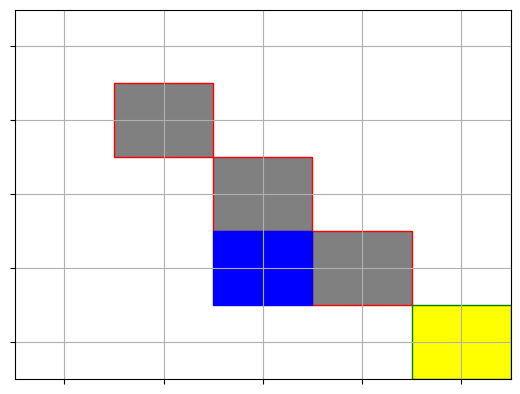

State: [1 3], Action: 3, Reward: -0.1, Done: False


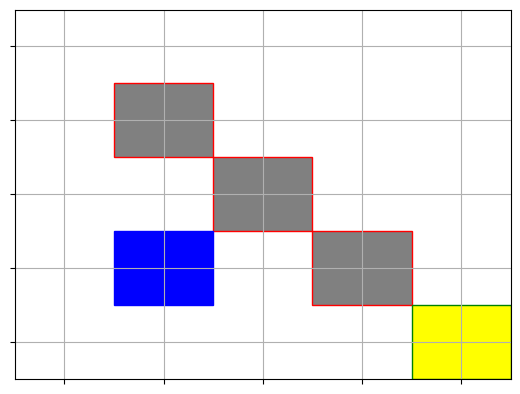

State: [1 4], Action: 0, Reward: -0.1, Done: False


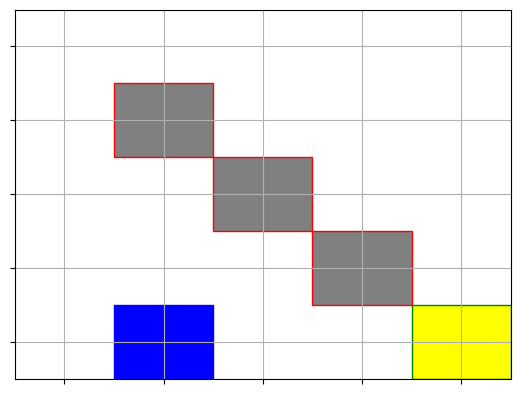

State: [2 4], Action: 1, Reward: -0.1, Done: False


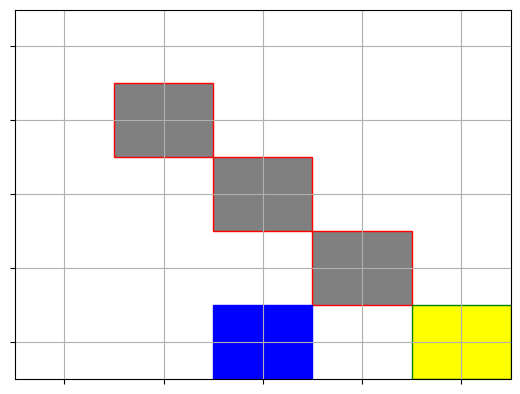

State: [3 4], Action: 1, Reward: -0.1, Done: False


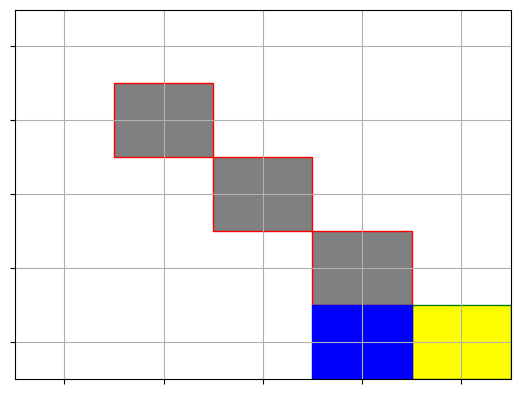

State: [4 4], Action: 1, Reward: 1, Done: True


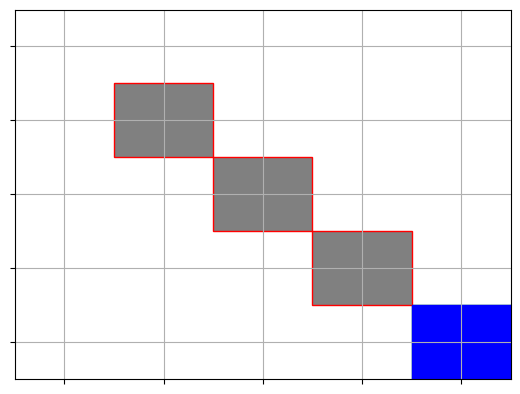

State: [0 1], Action: 0, Reward: -0.1, Done: False


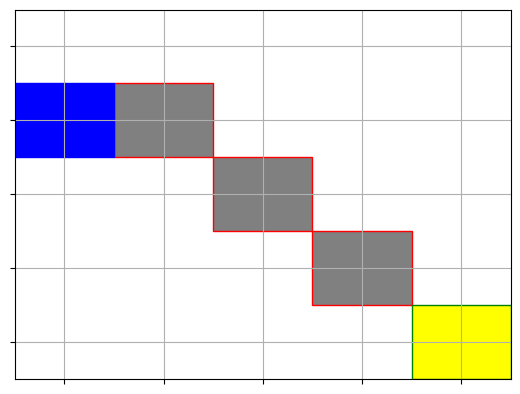

State: [0 1], Action: 3, Reward: -0.1, Done: False


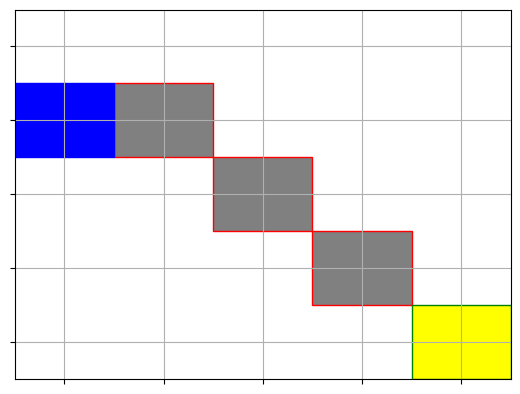

State: [0 1], Action: 3, Reward: -0.1, Done: False


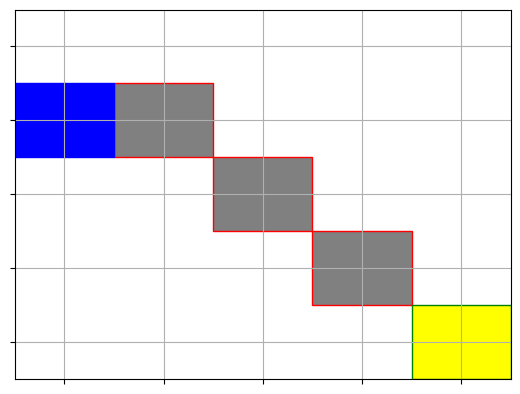

State: [0 1], Action: 1, Reward: -0.1, Done: False


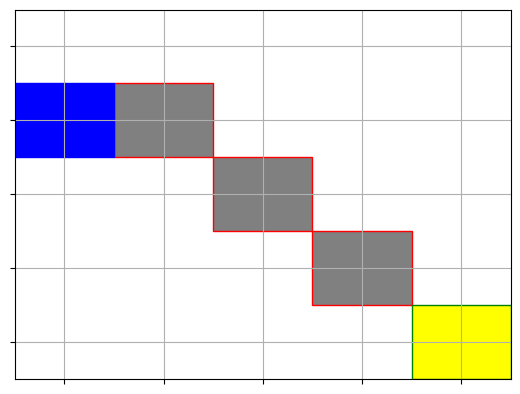

State: [0 2], Action: 0, Reward: -0.1, Done: False


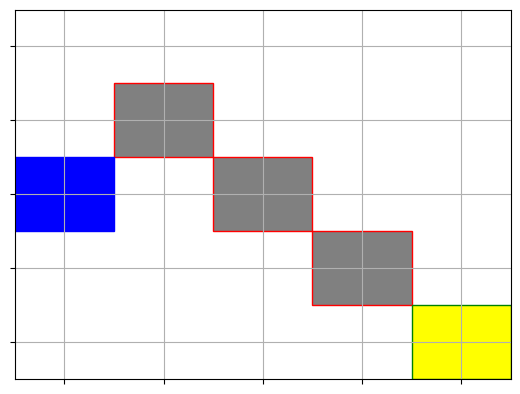

State: [1 2], Action: 1, Reward: -0.1, Done: False


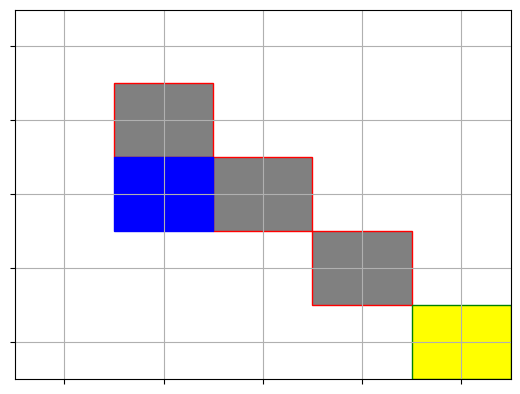

State: [0 2], Action: 3, Reward: -0.1, Done: False


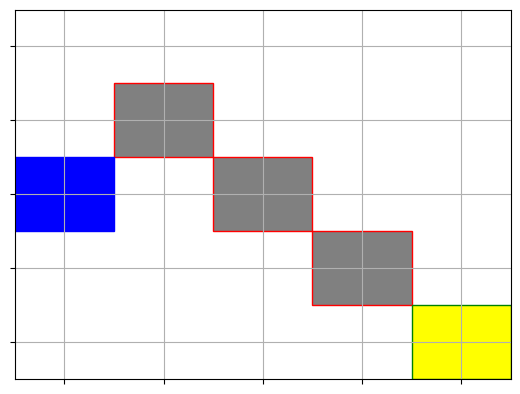

State: [0 1], Action: 2, Reward: -0.1, Done: False


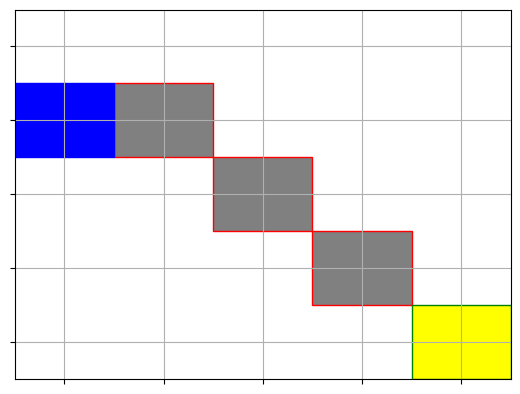

State: [0 1], Action: 3, Reward: -0.1, Done: False


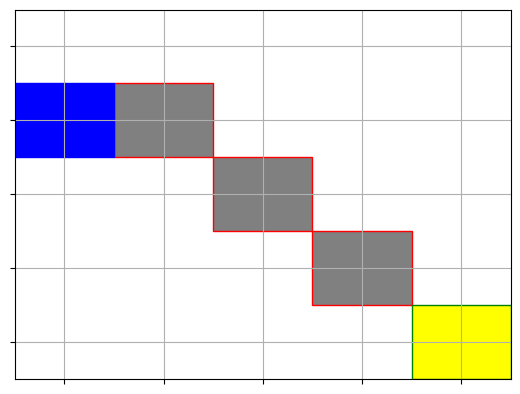

State: [0 1], Action: 3, Reward: -0.1, Done: False


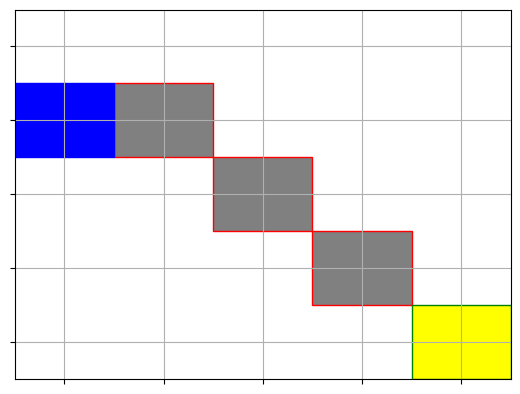

State: [0 1], Action: 3, Reward: -0.1, Done: False


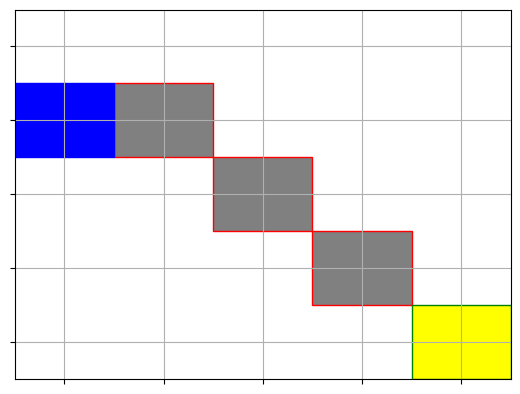

State: [0 1], Action: 3, Reward: -0.1, Done: False


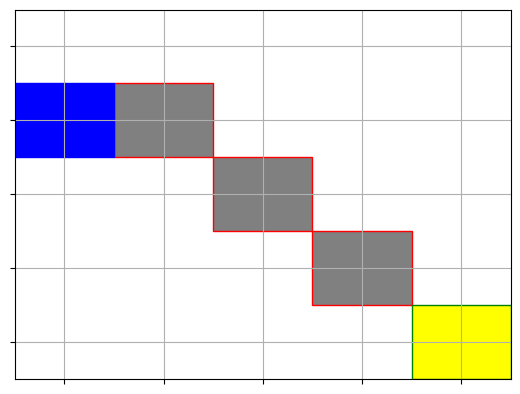

State: [0 2], Action: 0, Reward: -0.1, Done: False


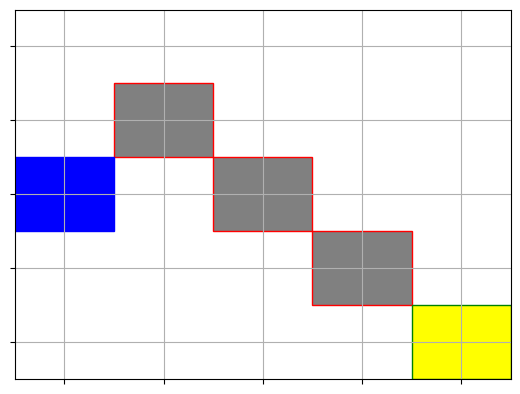

State: [0 1], Action: 2, Reward: -0.1, Done: False


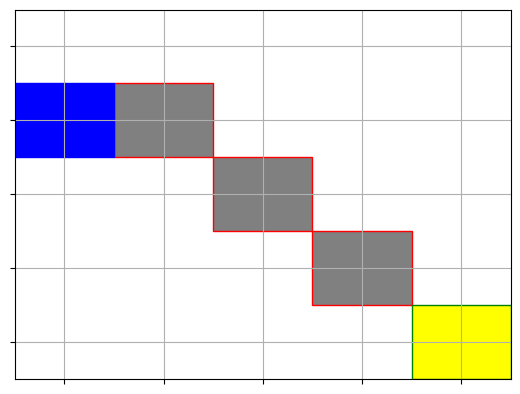

State: [0 0], Action: 2, Reward: -0.1, Done: False


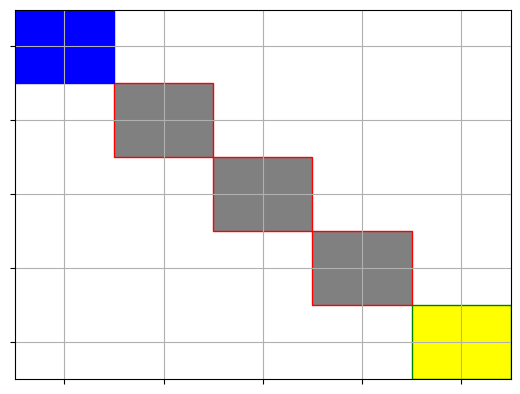

State: [1 0], Action: 1, Reward: -0.1, Done: False


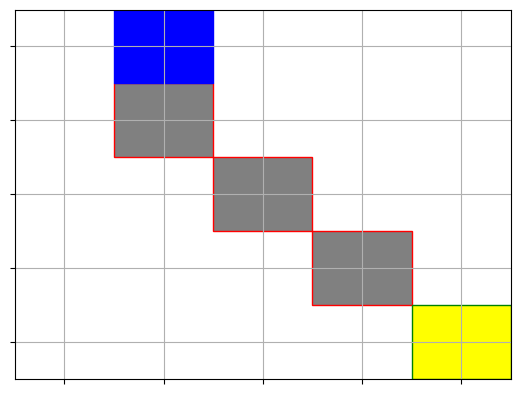

State: [1 0], Action: 2, Reward: -0.1, Done: False


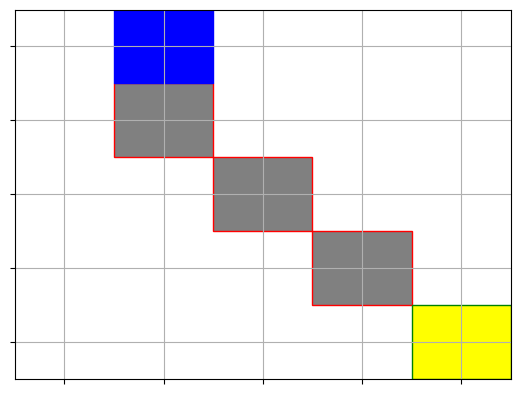

State: [1 0], Action: 2, Reward: -0.1, Done: False


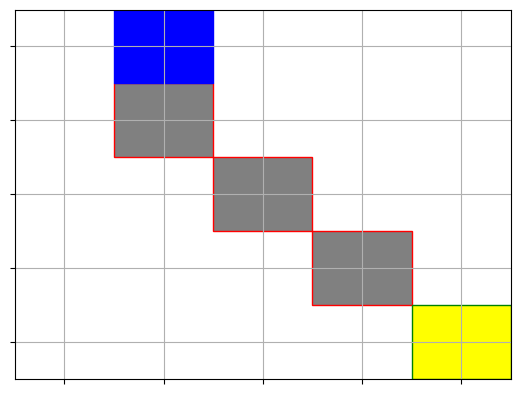

State: [1 0], Action: 0, Reward: -0.1, Done: False


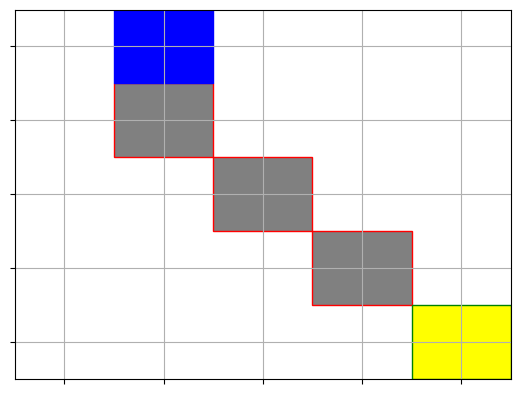

State: [2 0], Action: 1, Reward: -0.1, Done: False


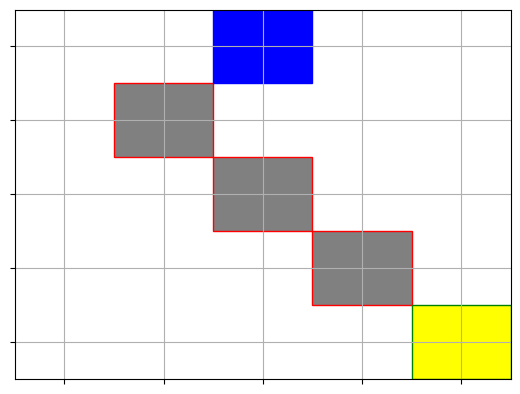

State: [1 0], Action: 3, Reward: -0.1, Done: False


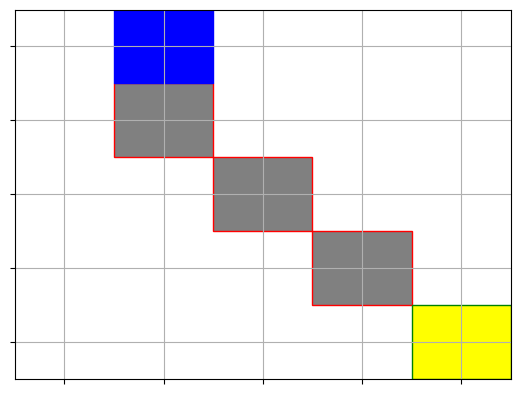

State: [1 0], Action: 0, Reward: -0.1, Done: False


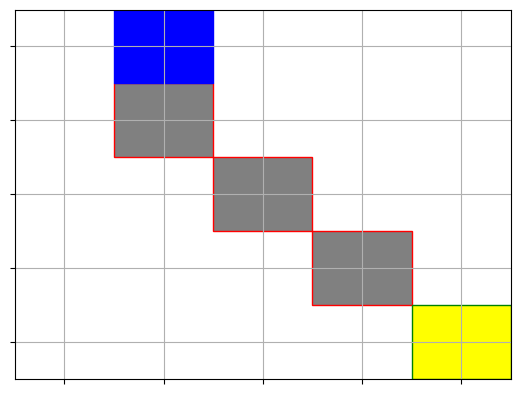

State: [1 0], Action: 2, Reward: -0.1, Done: False


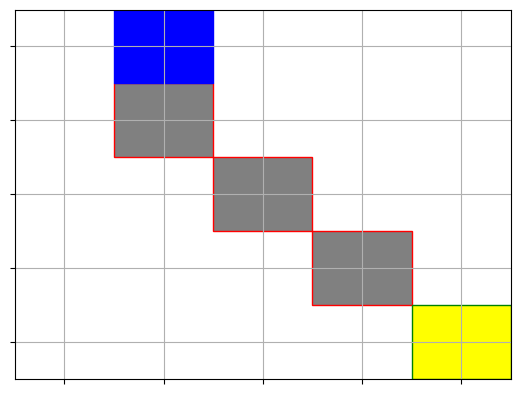

State: [1 0], Action: 2, Reward: -0.1, Done: False


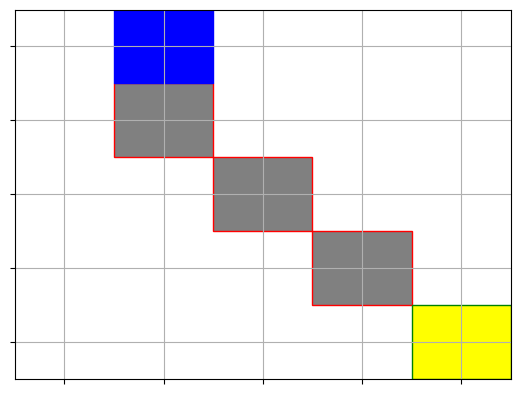

State: [0 0], Action: 3, Reward: -0.1, Done: False


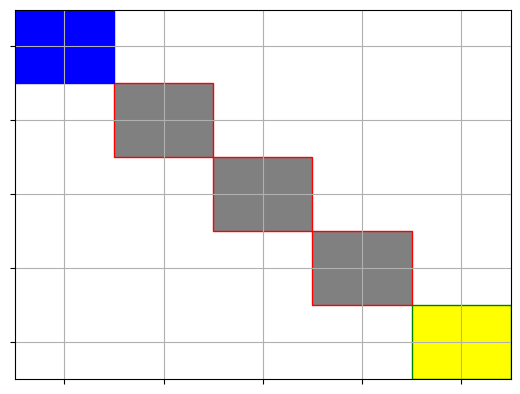

State: [1 0], Action: 1, Reward: -0.1, Done: False


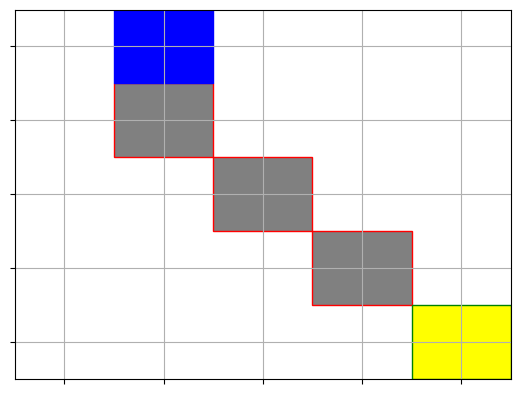

State: [2 0], Action: 1, Reward: -0.1, Done: False


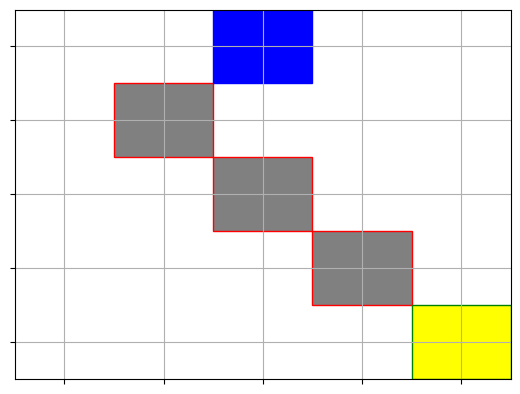

State: [2 0], Action: 2, Reward: -0.1, Done: False


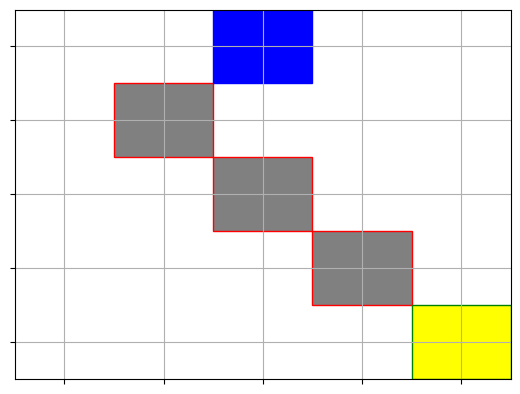

State: [2 0], Action: 2, Reward: -0.1, Done: False


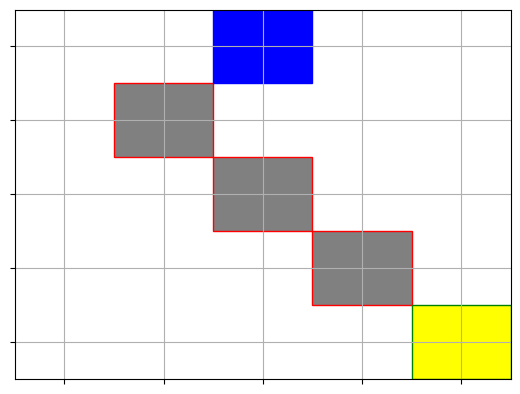

State: [2 1], Action: 0, Reward: -0.1, Done: False


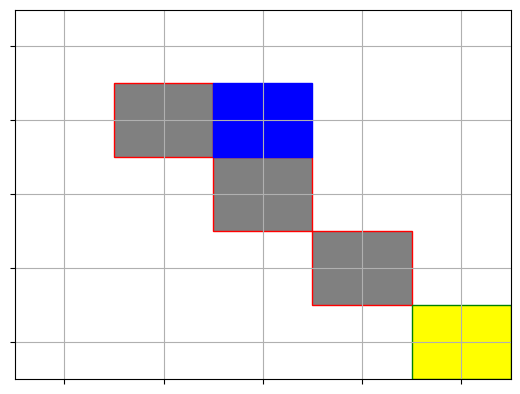

State: [2 0], Action: 2, Reward: -0.1, Done: False


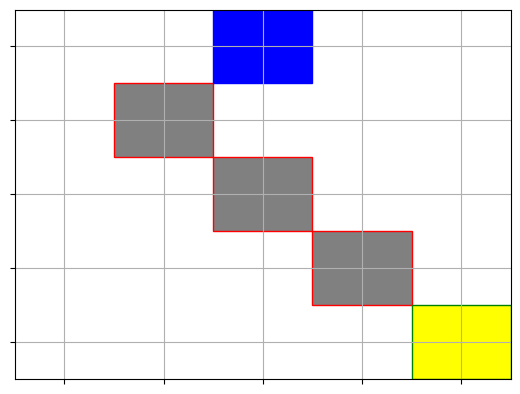

State: [2 0], Action: 2, Reward: -0.1, Done: False


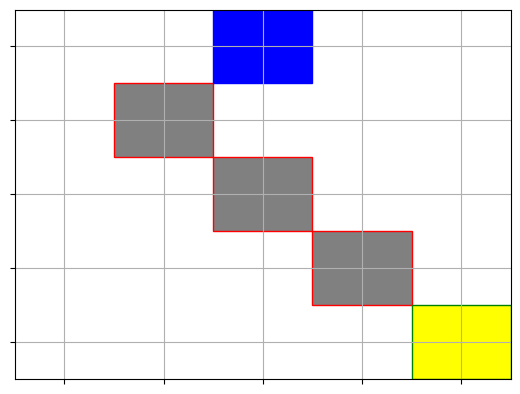

State: [3 0], Action: 1, Reward: -0.1, Done: False


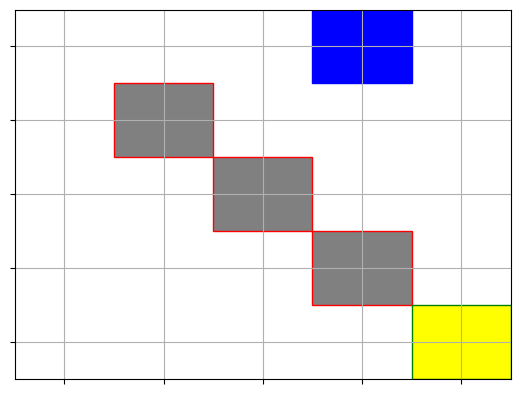

State: [2 0], Action: 3, Reward: -0.1, Done: False


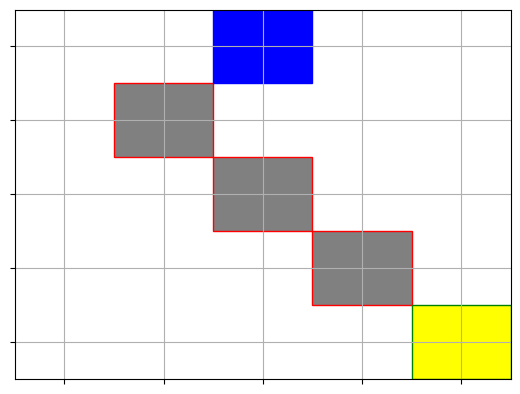

State: [1 0], Action: 3, Reward: -0.1, Done: False


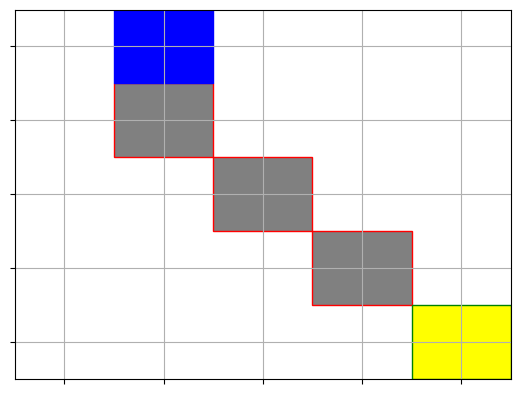

State: [2 0], Action: 1, Reward: -0.1, Done: False


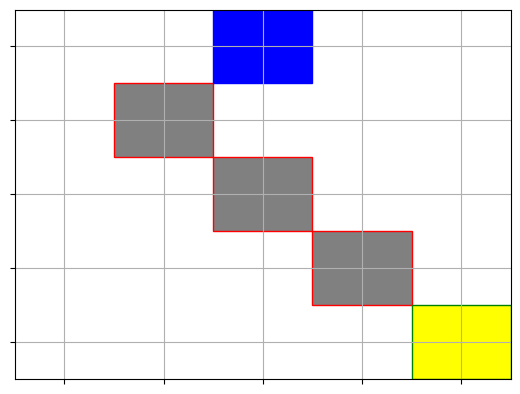

State: [3 0], Action: 1, Reward: -0.1, Done: False


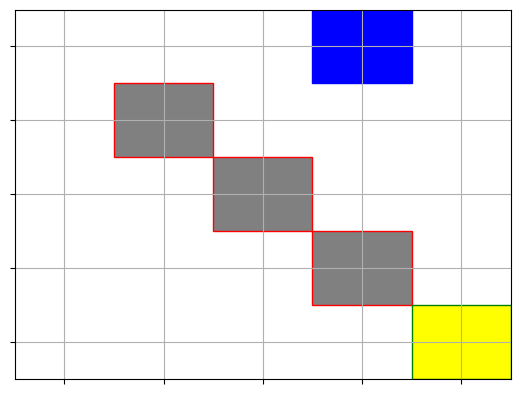

State: [2 0], Action: 3, Reward: -0.1, Done: False


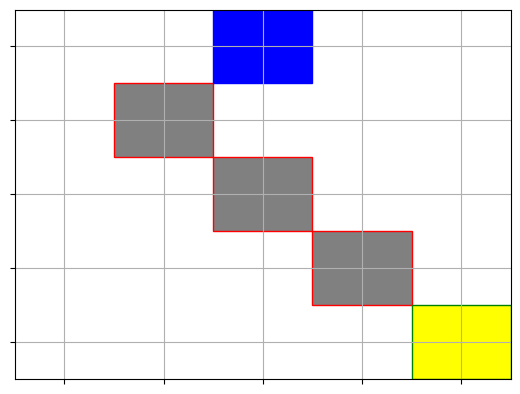

State: [1 0], Action: 3, Reward: -0.1, Done: False


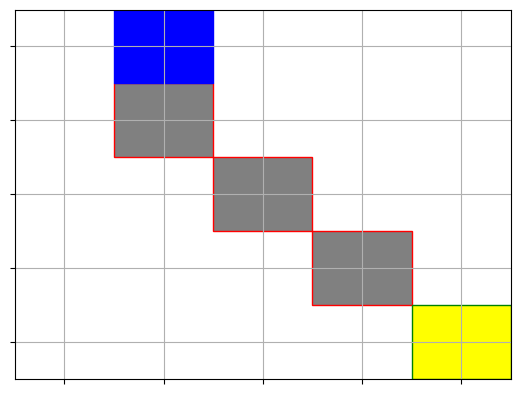

State: [2 0], Action: 1, Reward: -0.1, Done: False


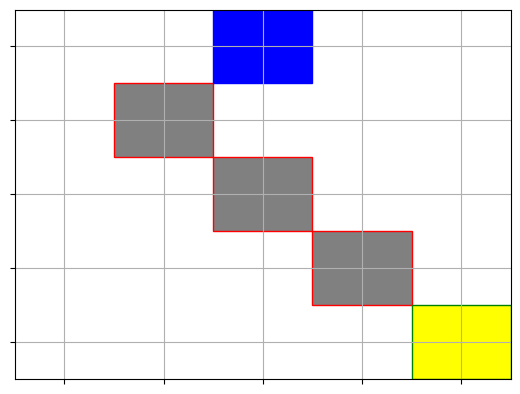

State: [3 0], Action: 1, Reward: -0.1, Done: False


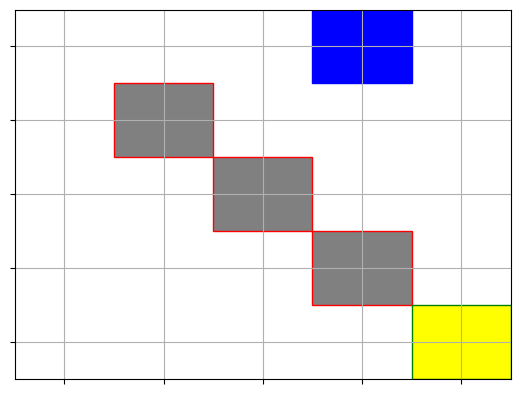

State: [3 1], Action: 0, Reward: -0.1, Done: False


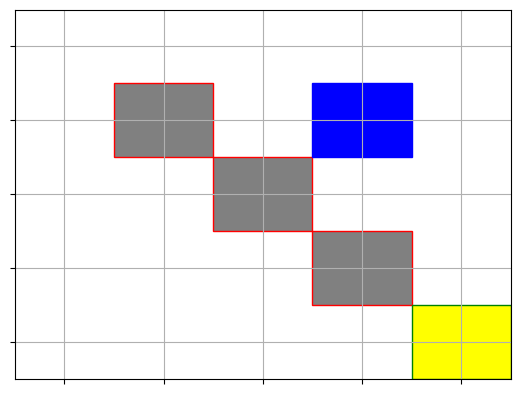

State: [2 1], Action: 3, Reward: -0.1, Done: False


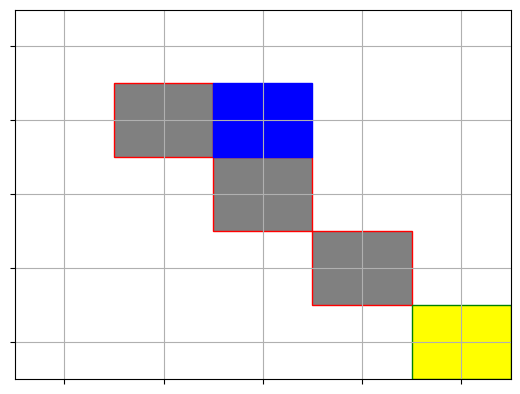

State: [3 1], Action: 1, Reward: -0.1, Done: False


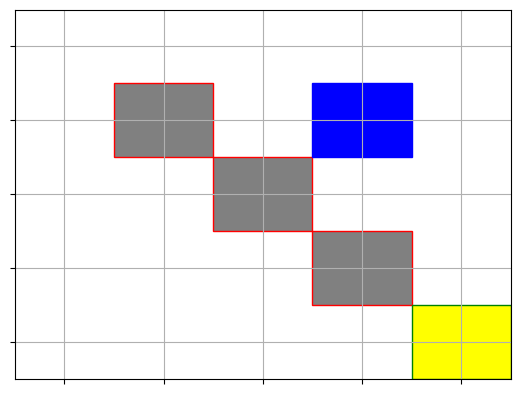

State: [4 1], Action: 1, Reward: -0.1, Done: False


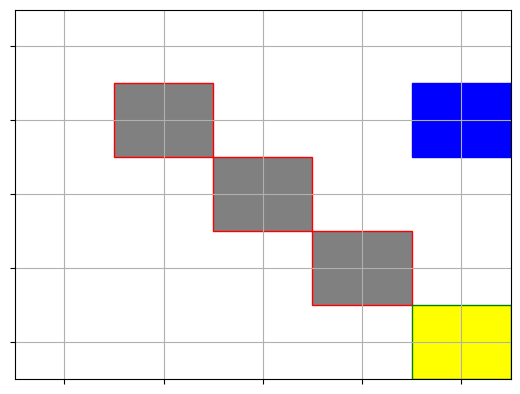

State: [3 1], Action: 3, Reward: -0.1, Done: False


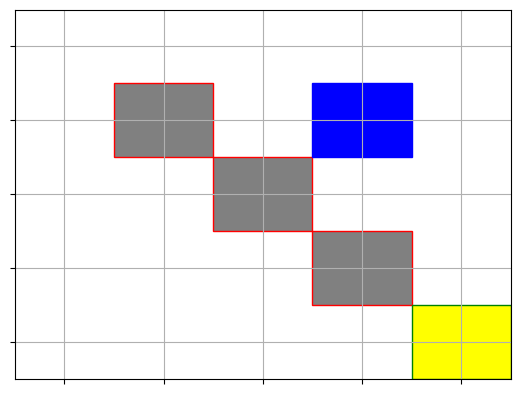

State: [4 1], Action: 1, Reward: -0.1, Done: False


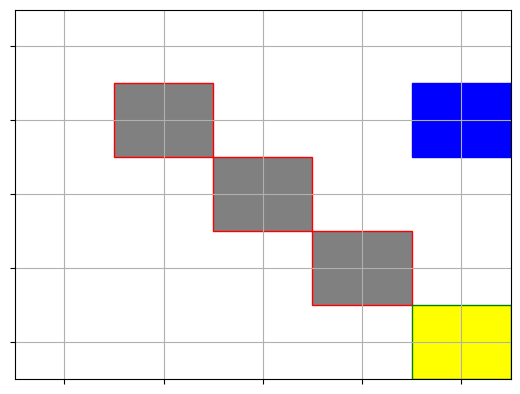

State: [4 2], Action: 0, Reward: -0.1, Done: False


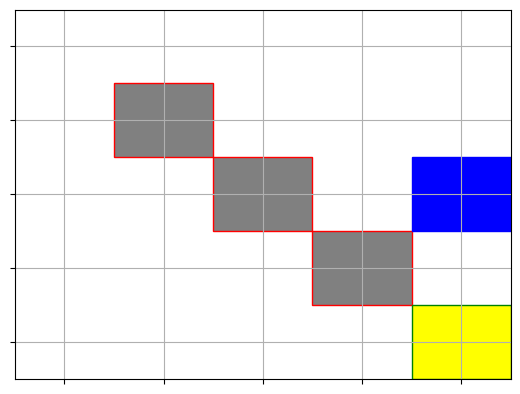

State: [4 2], Action: 1, Reward: -0.1, Done: False


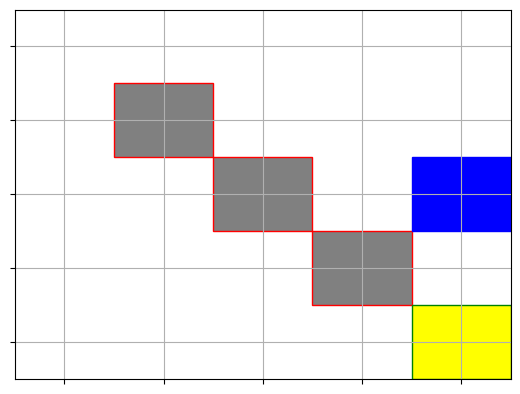

State: [4 2], Action: 1, Reward: -0.1, Done: False


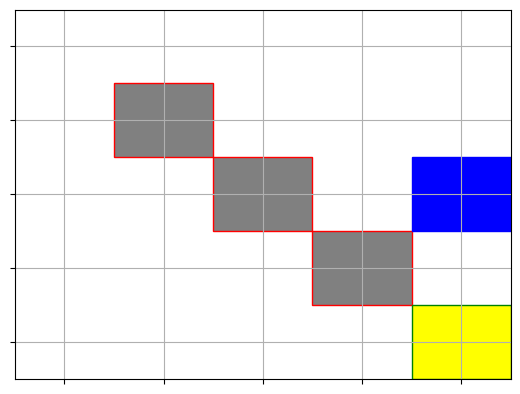

State: [4 1], Action: 2, Reward: -0.1, Done: False


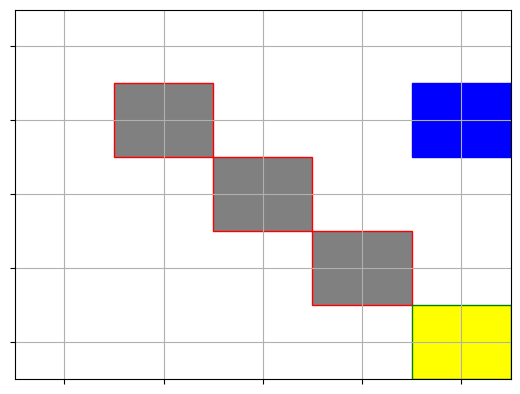

State: [4 0], Action: 2, Reward: -0.1, Done: False


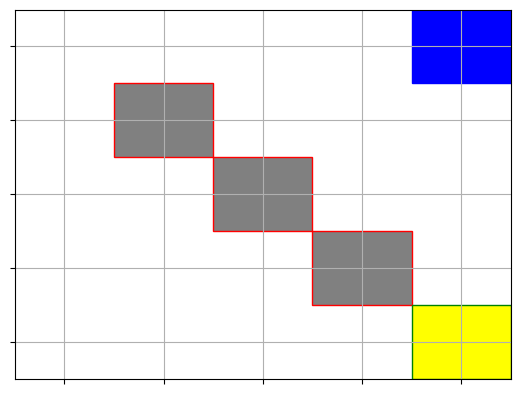

State: [4 0], Action: 1, Reward: -0.1, Done: False


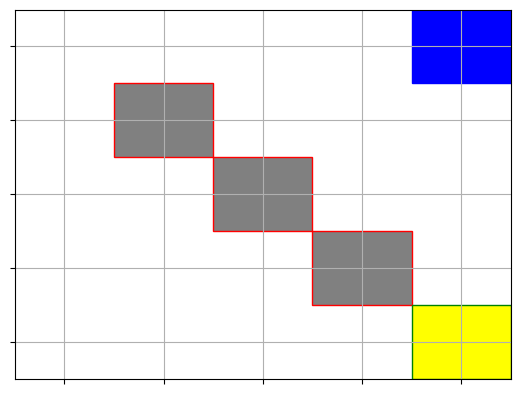

State: [4 0], Action: 2, Reward: -0.1, Done: False


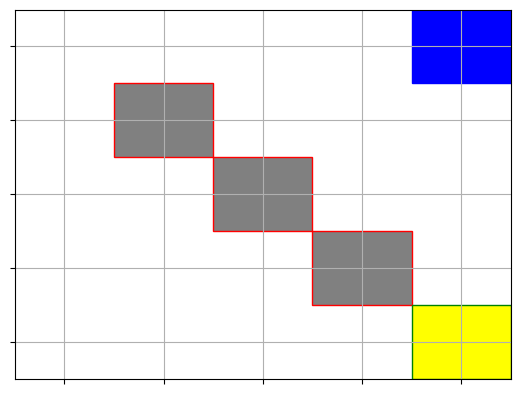

State: [3 0], Action: 3, Reward: -0.1, Done: False


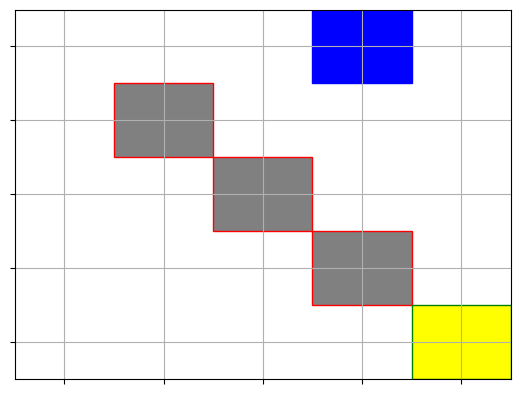

State: [3 0], Action: 2, Reward: -0.1, Done: False


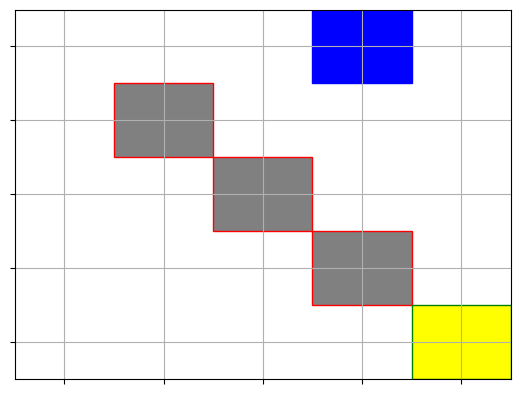

State: [2 0], Action: 3, Reward: -0.1, Done: False


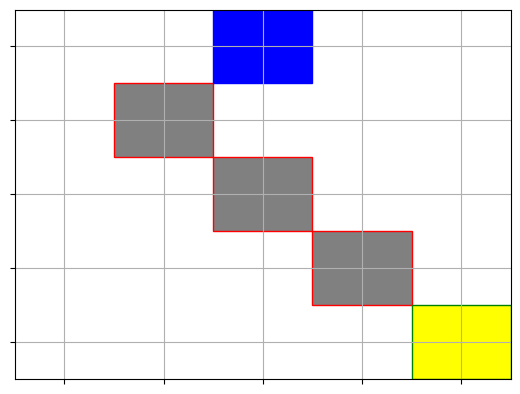

State: [2 1], Action: 0, Reward: -0.1, Done: False


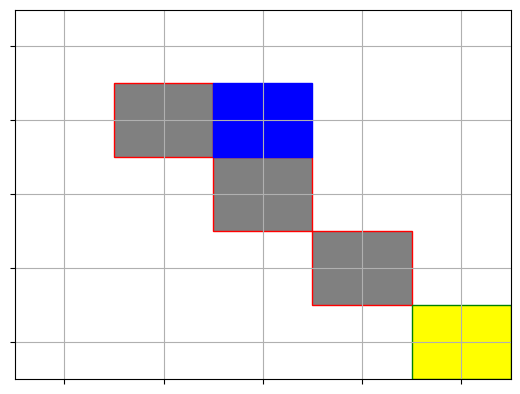

State: [2 0], Action: 2, Reward: -0.1, Done: False


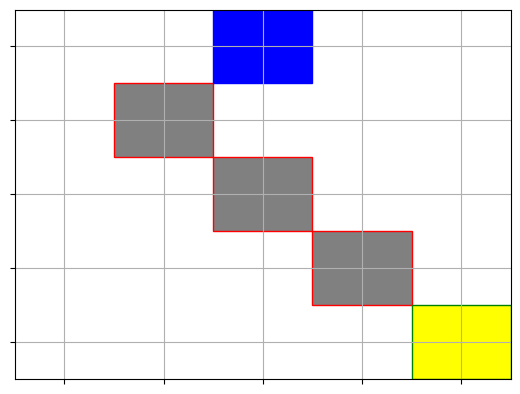

State: [2 0], Action: 2, Reward: -0.1, Done: False


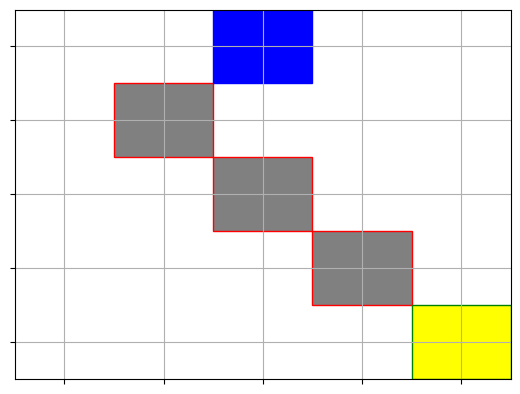

State: [3 0], Action: 1, Reward: -0.1, Done: False


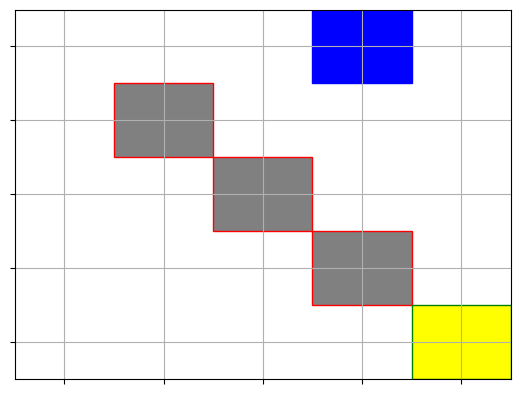

State: [3 0], Action: 2, Reward: -0.1, Done: False


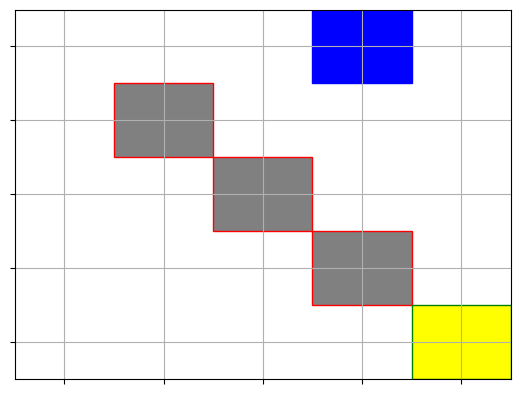

State: [3 1], Action: 0, Reward: -0.1, Done: False


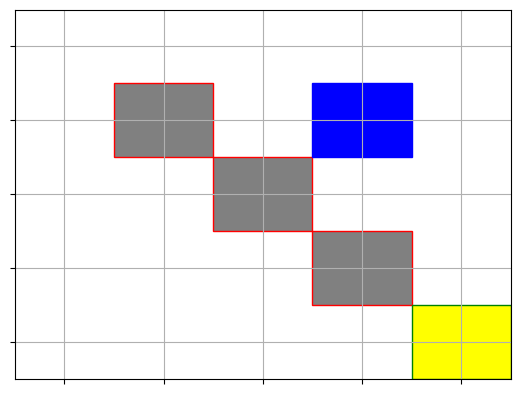

State: [3 0], Action: 2, Reward: -0.1, Done: False


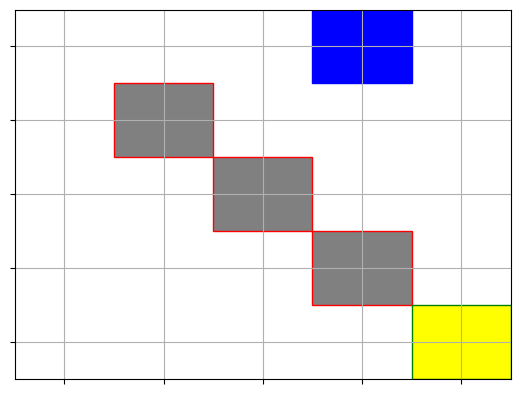

State: [4 0], Action: 1, Reward: -0.1, Done: False


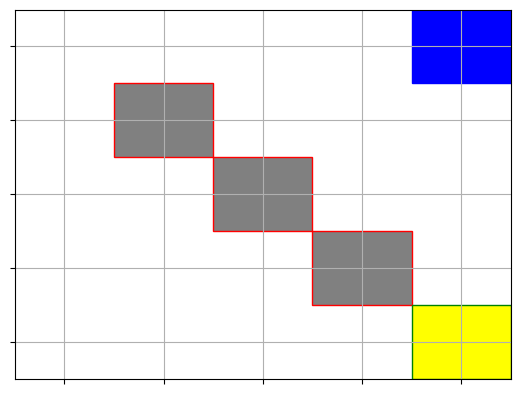

State: [4 1], Action: 0, Reward: -0.1, Done: False


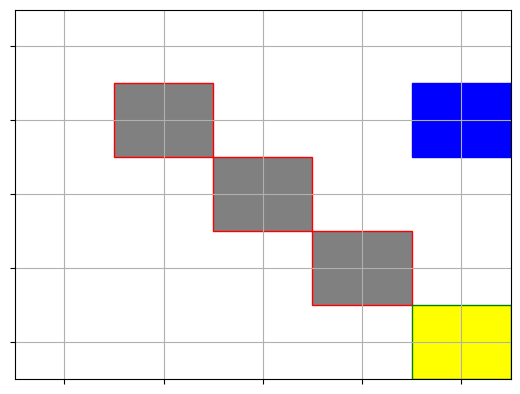

State: [4 0], Action: 2, Reward: -0.1, Done: False


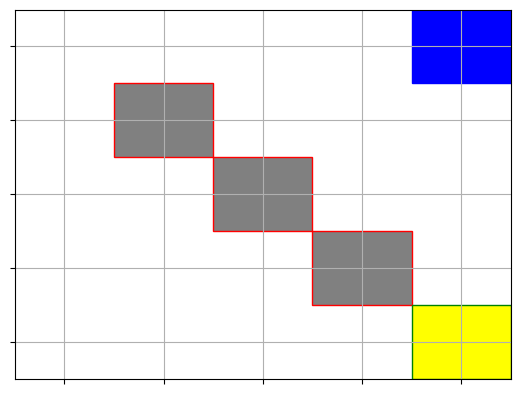

State: [4 0], Action: 1, Reward: -0.1, Done: False


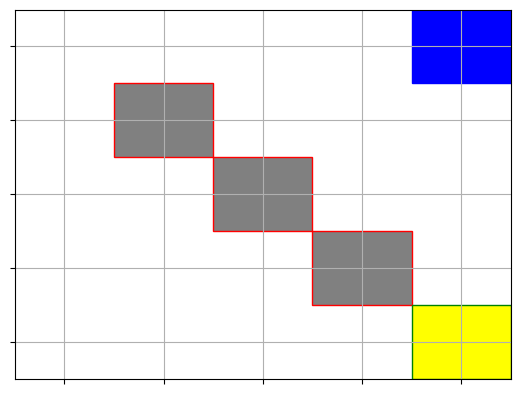

State: [4 0], Action: 1, Reward: -0.1, Done: False


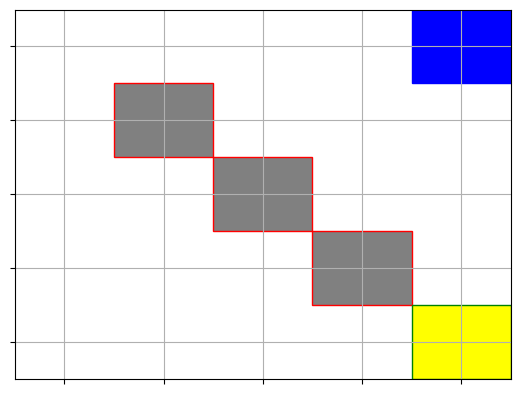

State: [4 0], Action: 2, Reward: -0.1, Done: False


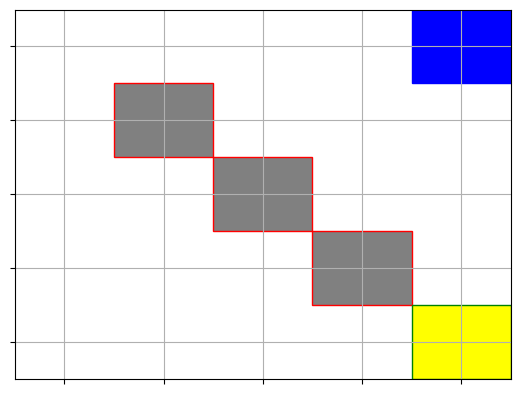

State: [4 1], Action: 0, Reward: -0.1, Done: False


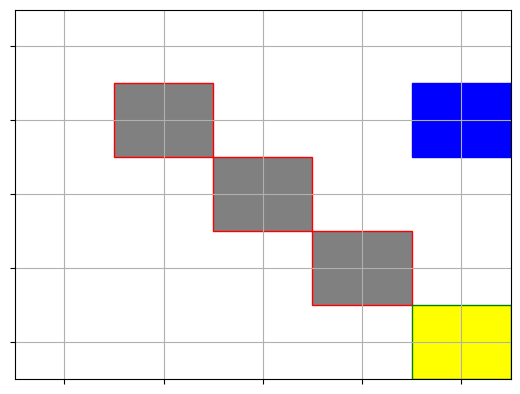

State: [4 0], Action: 2, Reward: -0.1, Done: False


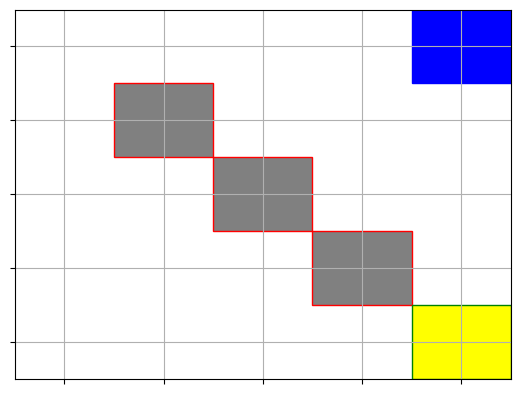

State: [4 1], Action: 0, Reward: -0.1, Done: False


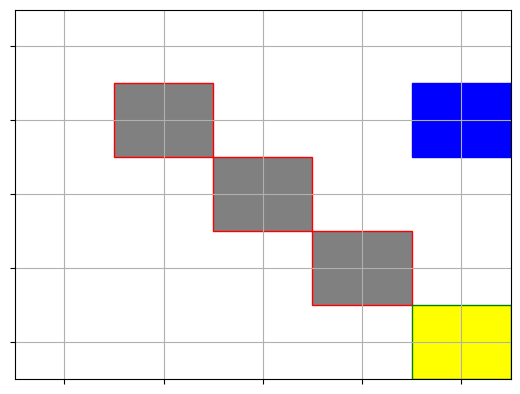

State: [4 1], Action: 1, Reward: -0.1, Done: False


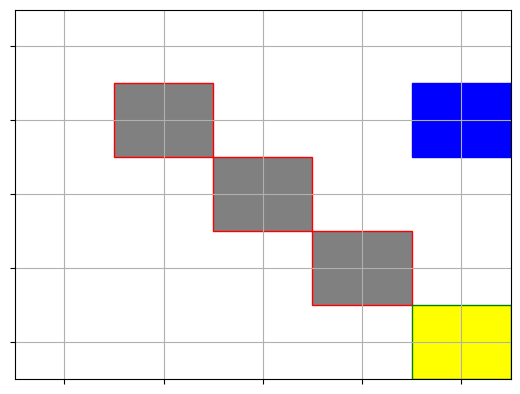

State: [4 0], Action: 2, Reward: -0.1, Done: False


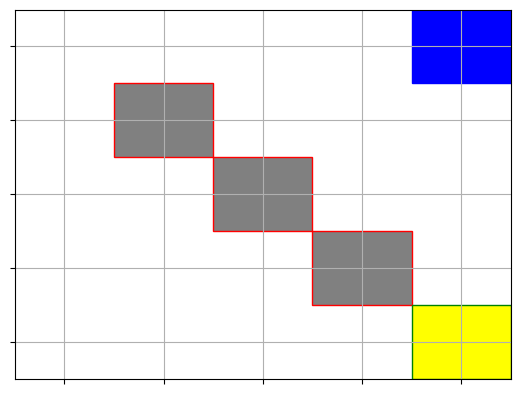

State: [4 0], Action: 2, Reward: -0.1, Done: False


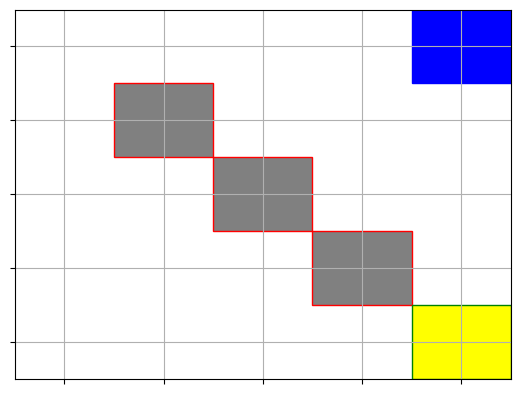

State: [4 0], Action: 2, Reward: -0.1, Done: False


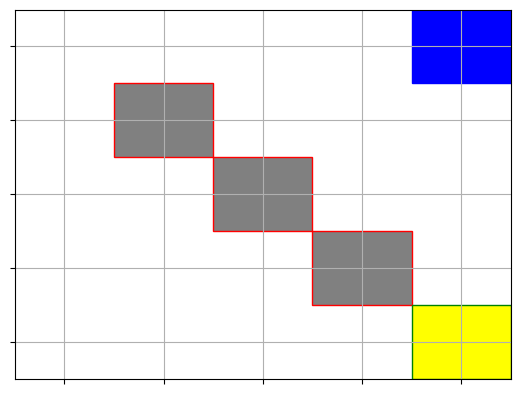

State: [3 0], Action: 3, Reward: -0.1, Done: False


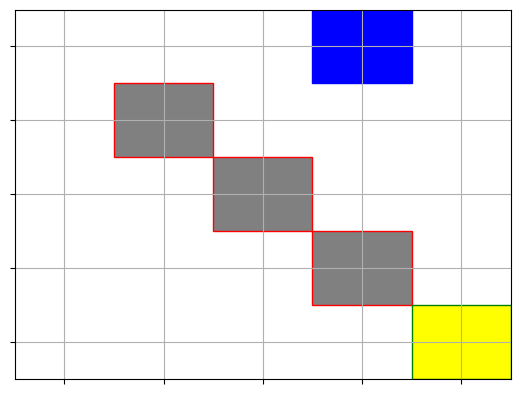

State: [3 1], Action: 0, Reward: -0.1, Done: False


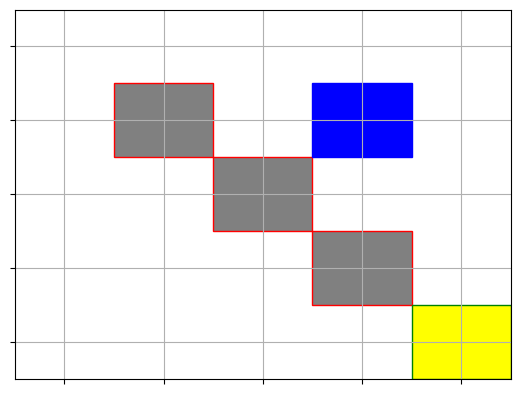

State: [2 1], Action: 3, Reward: -0.1, Done: False


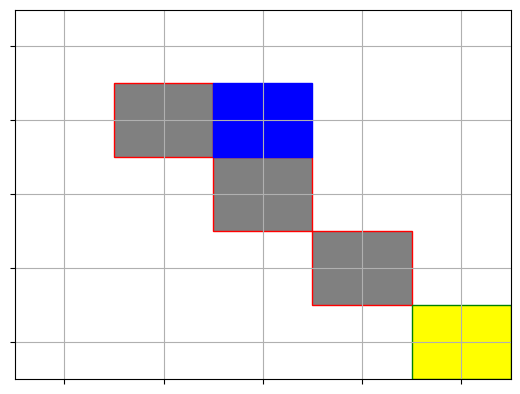

State: [2 1], Action: 3, Reward: -0.1, Done: False


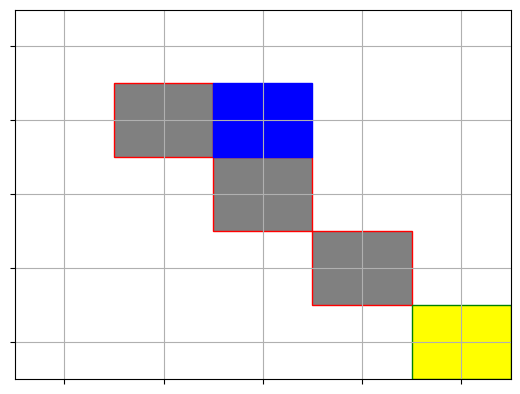

State: [2 0], Action: 2, Reward: -0.1, Done: False


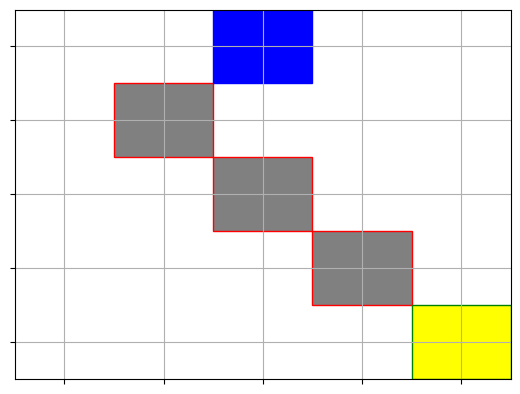

State: [2 0], Action: 2, Reward: -0.1, Done: False


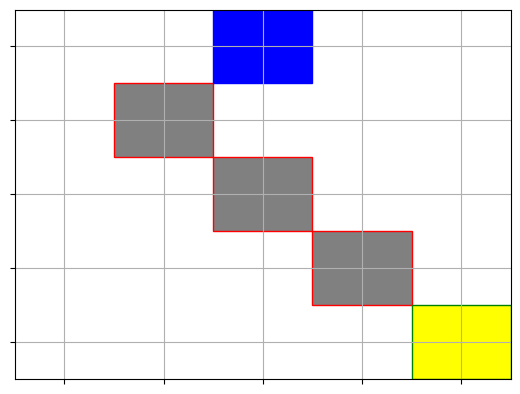

State: [2 1], Action: 0, Reward: -0.1, Done: False


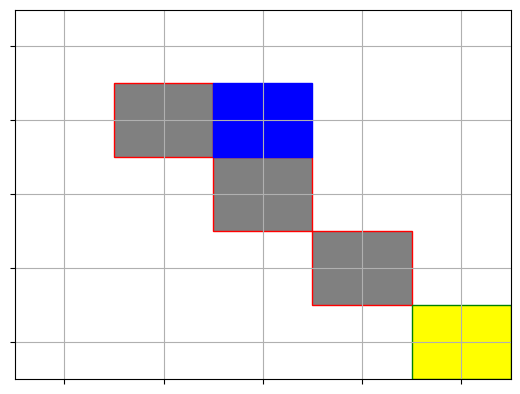

State: [2 0], Action: 2, Reward: -0.1, Done: False


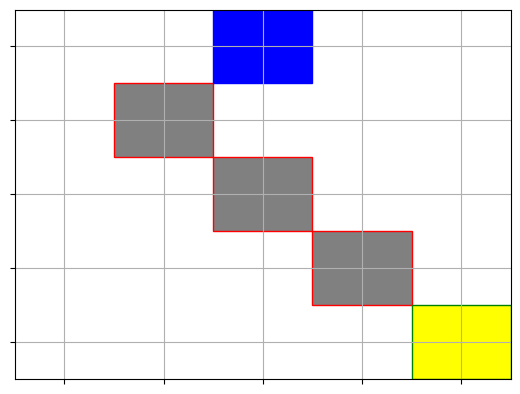

State: [3 0], Action: 1, Reward: -0.1, Done: False


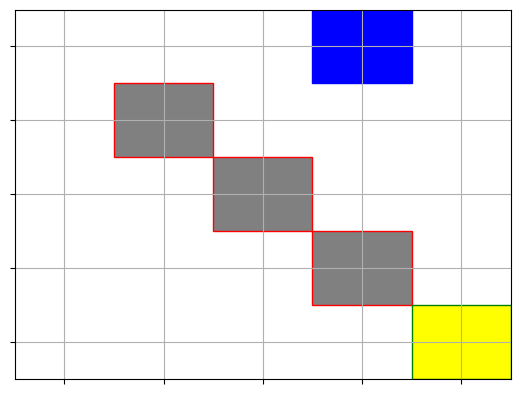

State: [4 0], Action: 1, Reward: -0.1, Done: False


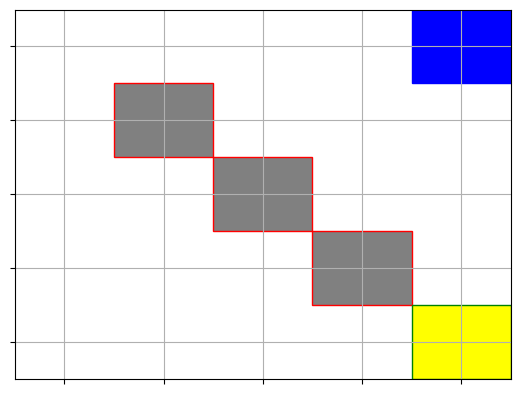

State: [4 1], Action: 0, Reward: -0.1, Done: False


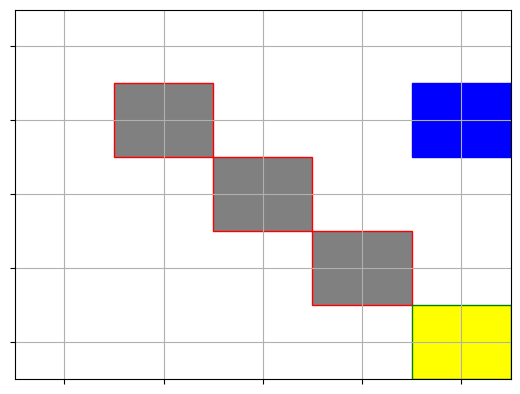

State: [4 0], Action: 2, Reward: -0.1, Done: False


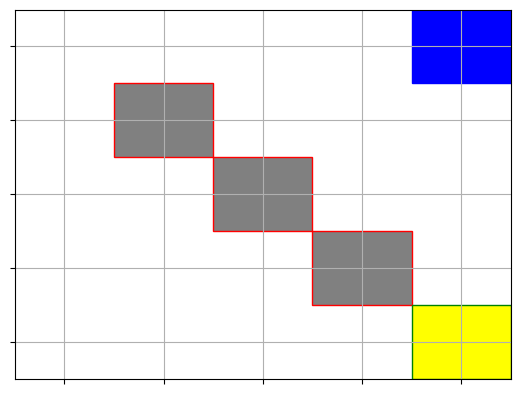

State: [4 0], Action: 1, Reward: -0.1, Done: False


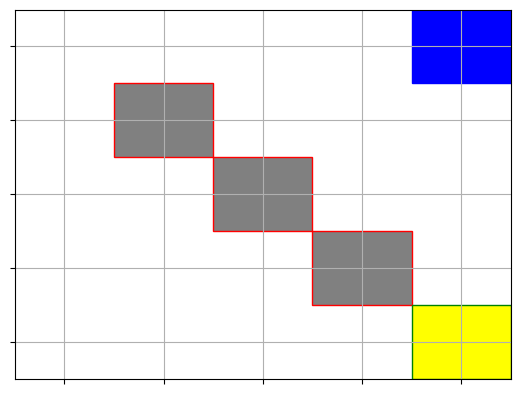

State: [3 0], Action: 3, Reward: -0.1, Done: False


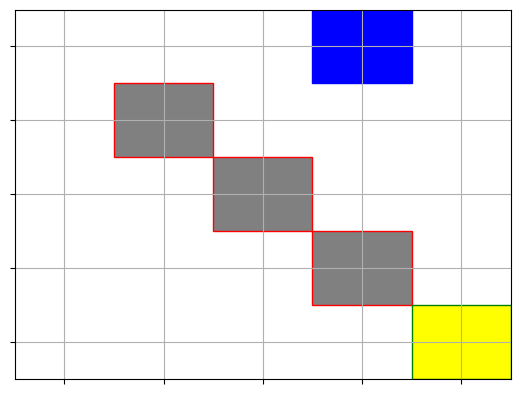

State: [3 1], Action: 0, Reward: -0.1, Done: False


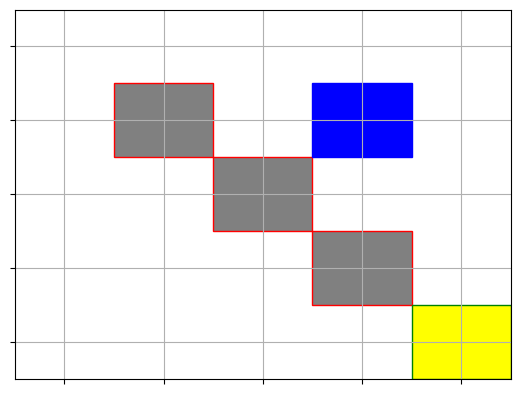

State: [4 1], Action: 1, Reward: -0.1, Done: False


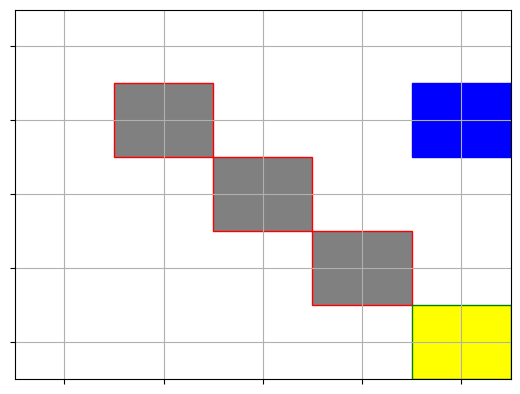

State: [4 1], Action: 1, Reward: -0.1, Done: False


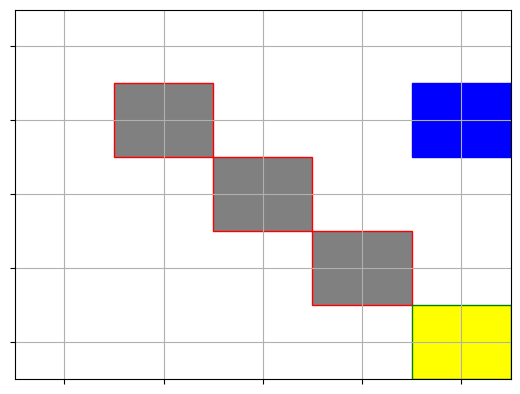

State: [4 0], Action: 2, Reward: -0.1, Done: False


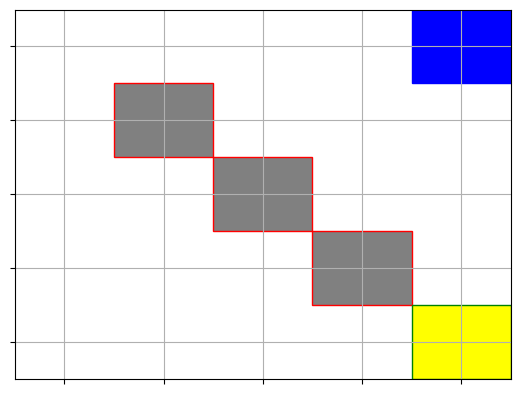

State: [4 0], Action: 1, Reward: -0.1, Done: False


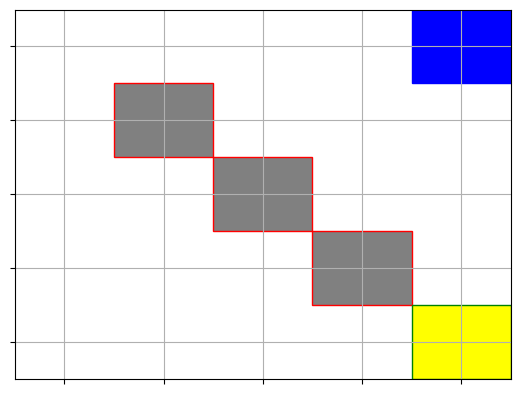

State: [4 0], Action: 2, Reward: -0.1, Done: False


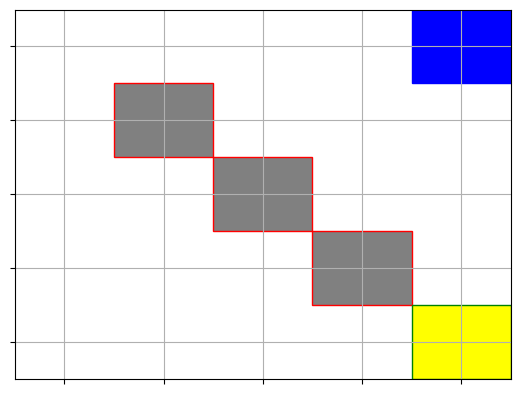

State: [3 0], Action: 3, Reward: -0.1, Done: False


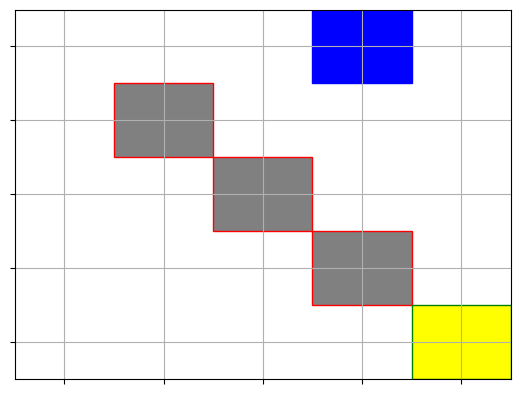

State: [3 1], Action: 0, Reward: -0.1, Done: False


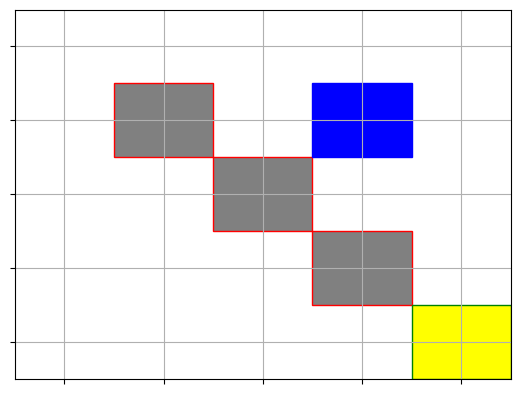

State: [2 1], Action: 3, Reward: -0.1, Done: False


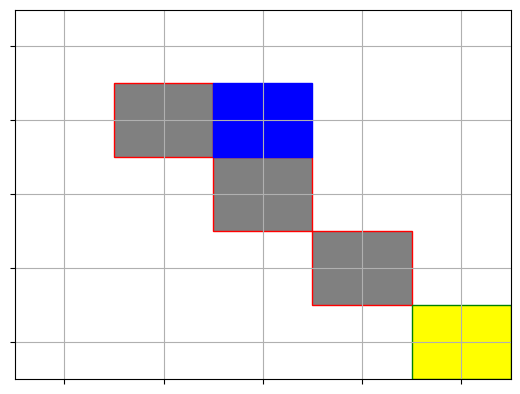

State: [2 1], Action: 3, Reward: -0.1, Done: False


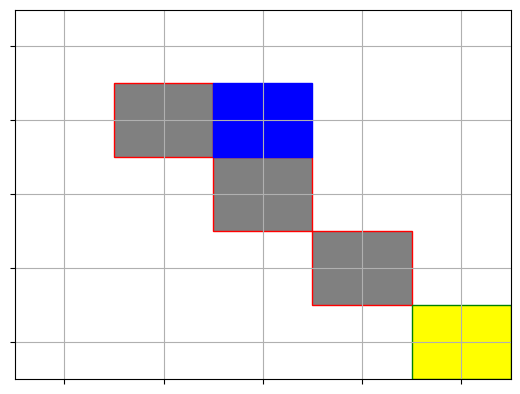

State: [2 1], Action: 3, Reward: -0.1, Done: False


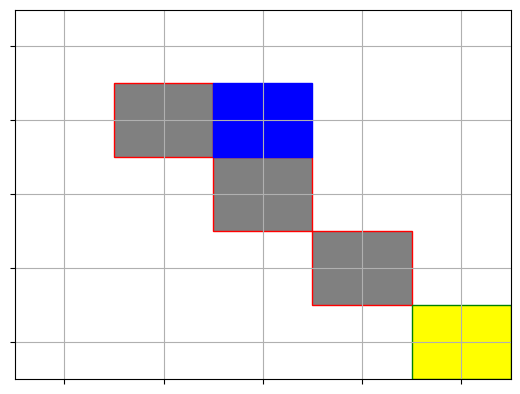

State: [2 1], Action: 3, Reward: -0.1, Done: False


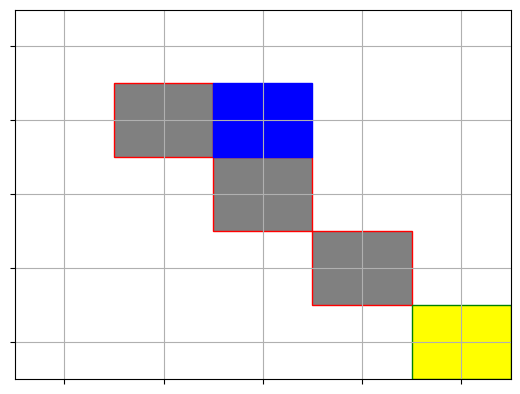

State: [3 1], Action: 1, Reward: -0.1, Done: False


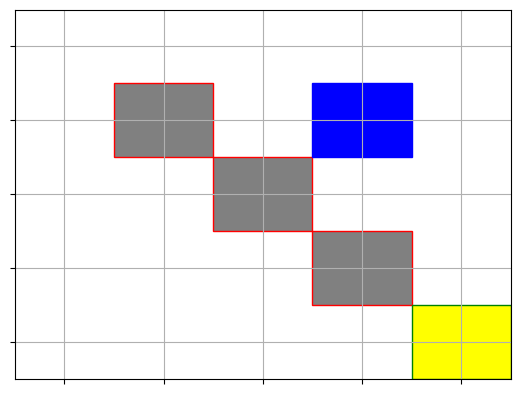

State: [3 2], Action: 0, Reward: -0.1, Done: False


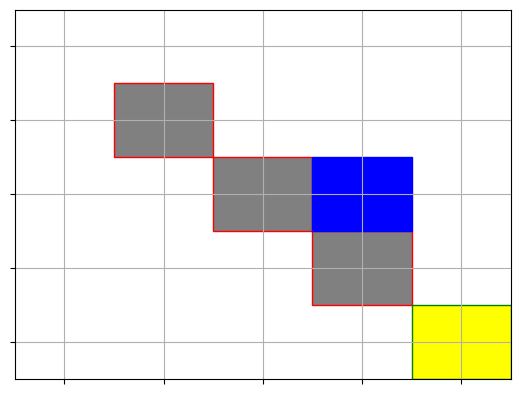

State: [4 2], Action: 1, Reward: -0.1, Done: False


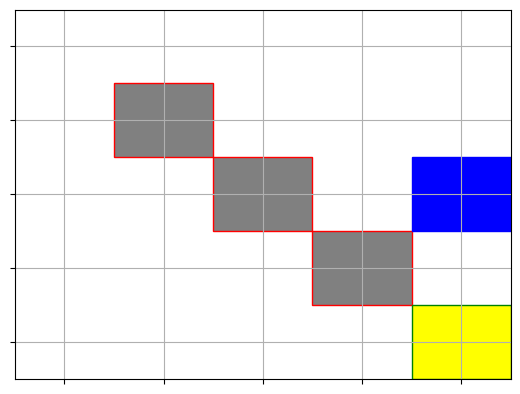

State: [4 3], Action: 0, Reward: -0.1, Done: False


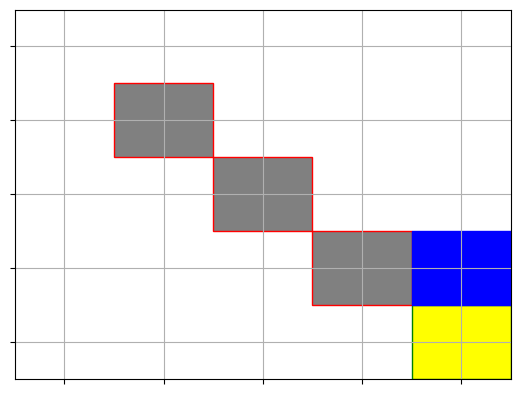

State: [4 2], Action: 2, Reward: -0.1, Done: False


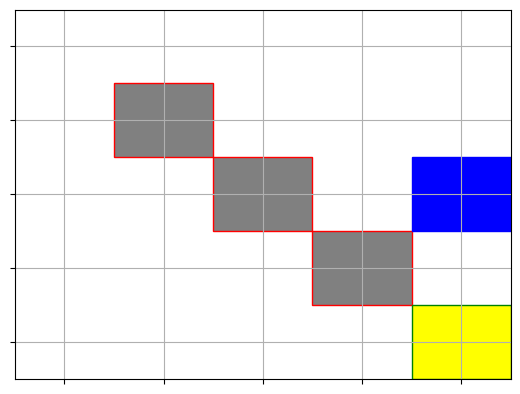

State: [4 1], Action: 2, Reward: -0.1, Done: False


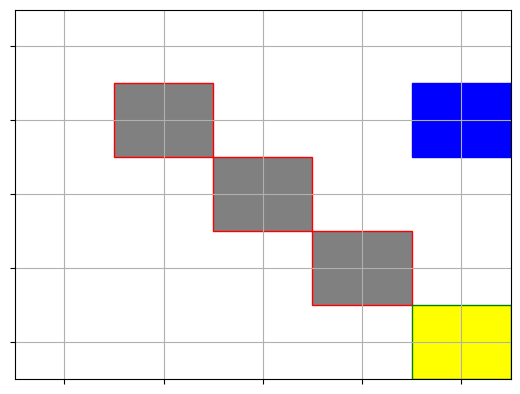

State: [3 1], Action: 3, Reward: -0.1, Done: False


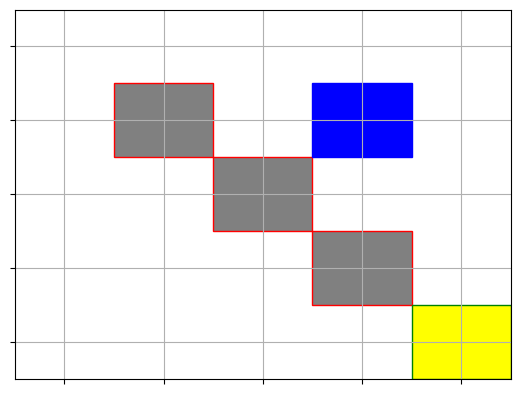

State: [2 1], Action: 3, Reward: -0.1, Done: False


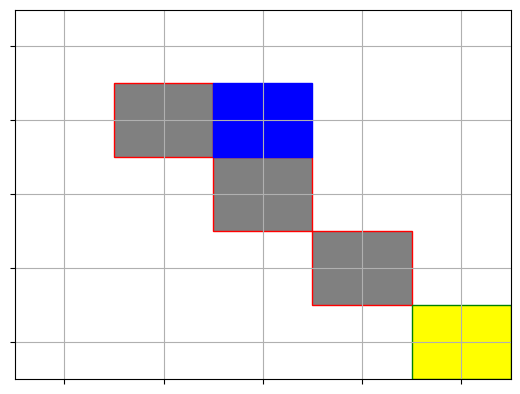

State: [2 1], Action: 0, Reward: -0.1, Done: False


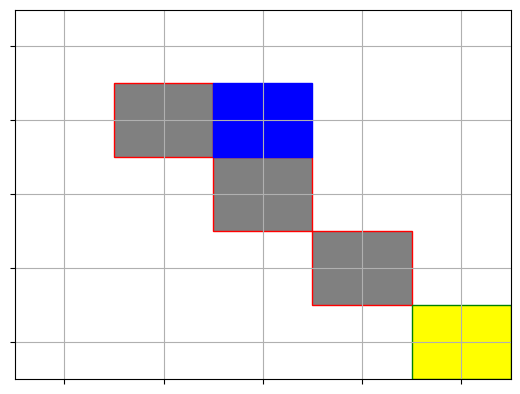

State: [2 1], Action: 3, Reward: -0.1, Done: False


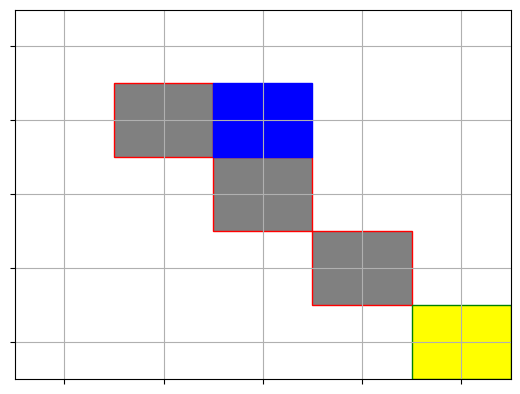

State: [2 0], Action: 2, Reward: -0.1, Done: False


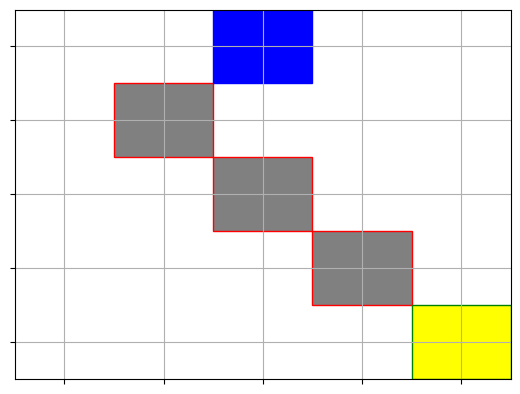

State: [2 0], Action: 2, Reward: -0.1, Done: False


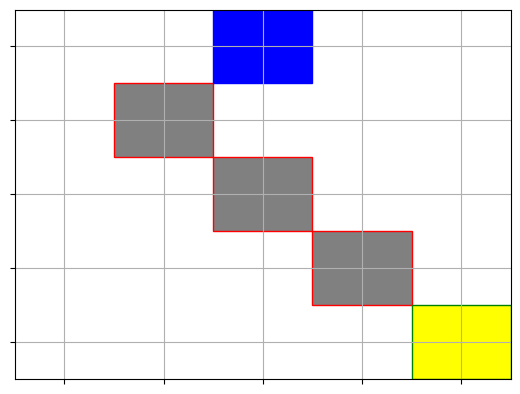

State: [3 0], Action: 1, Reward: -0.1, Done: False


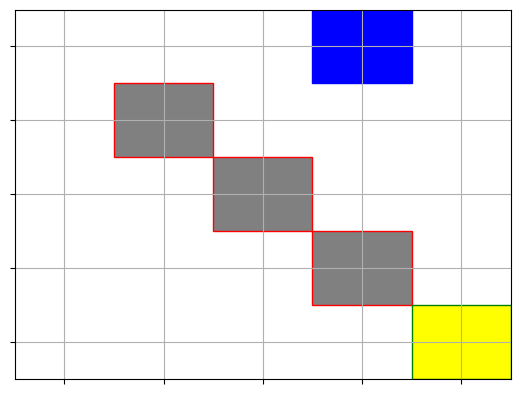

State: [4 0], Action: 1, Reward: -0.1, Done: False


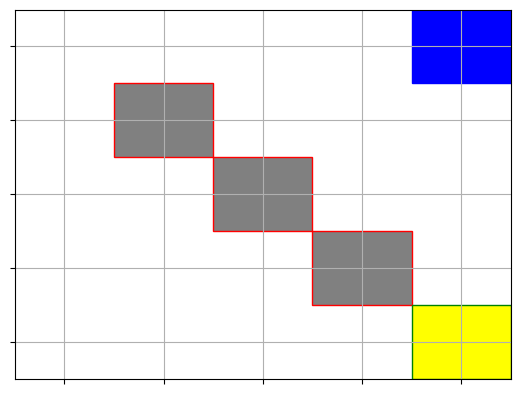

State: [4 1], Action: 0, Reward: -0.1, Done: False


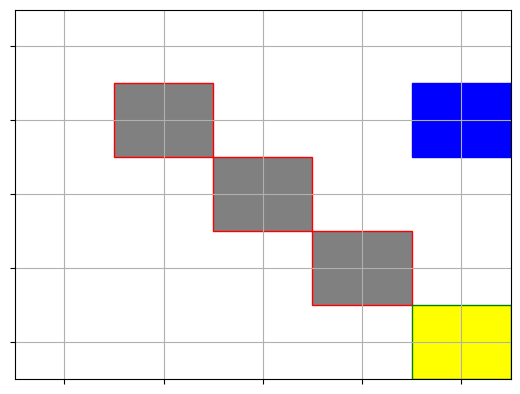

State: [4 2], Action: 0, Reward: -0.1, Done: False


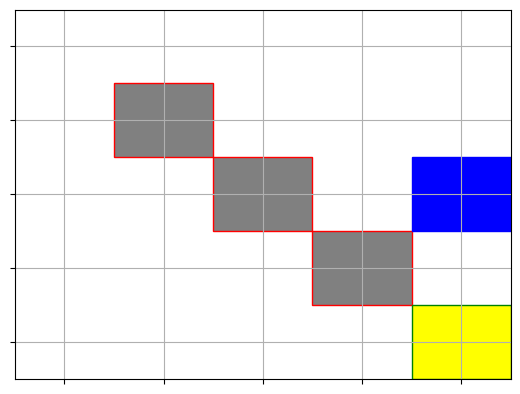

State: [3 2], Action: 3, Reward: -0.1, Done: False


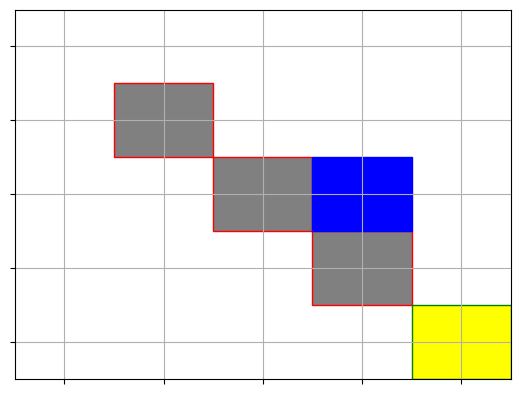

State: [3 2], Action: 3, Reward: -0.1, Done: False


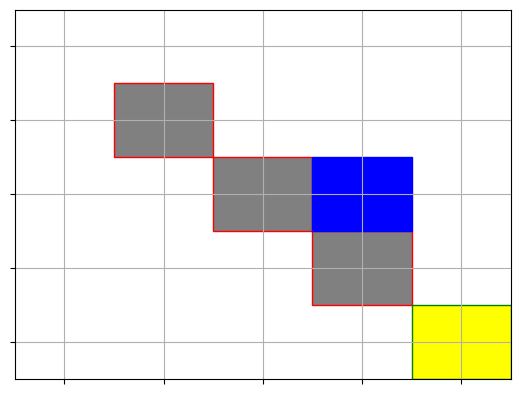

State: [4 2], Action: 1, Reward: -0.1, Done: False


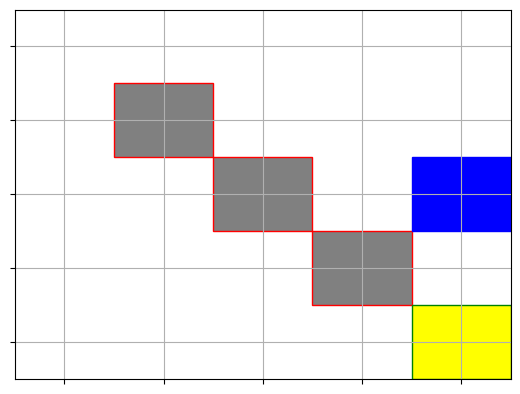

State: [3 2], Action: 3, Reward: -0.1, Done: False


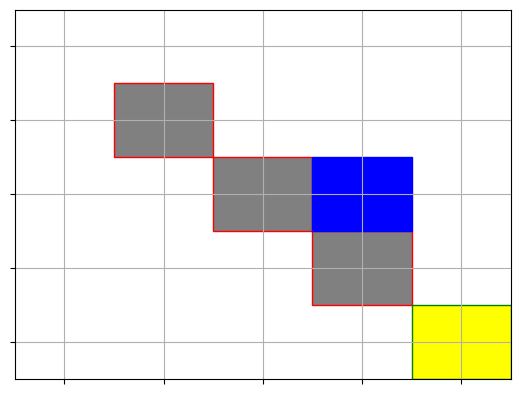

State: [3 1], Action: 2, Reward: -0.1, Done: False


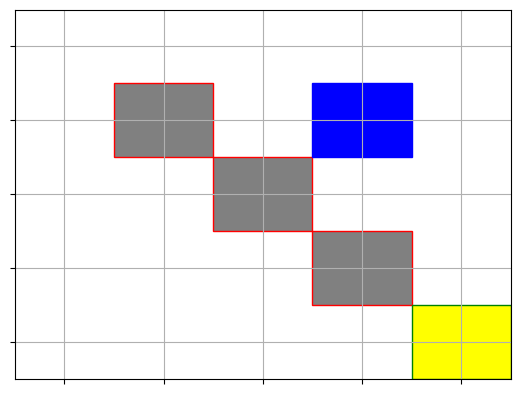

State: [4 1], Action: 1, Reward: -0.1, Done: False


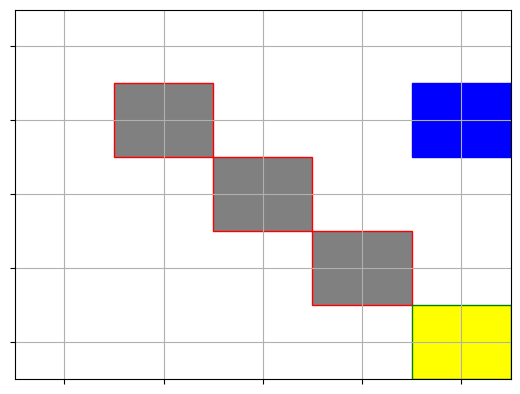

State: [4 2], Action: 0, Reward: -0.1, Done: False


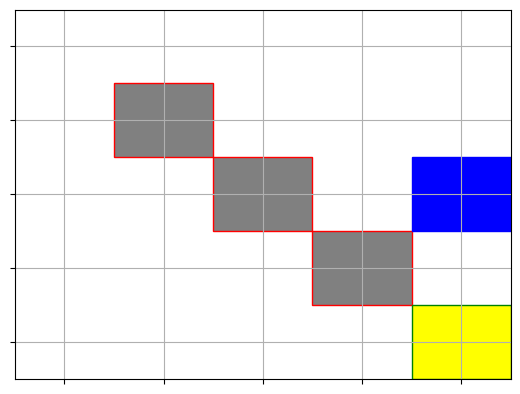

State: [4 2], Action: 1, Reward: -0.1, Done: False


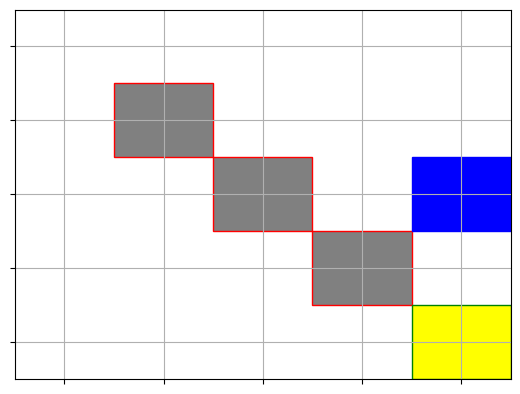

State: [4 1], Action: 2, Reward: -0.1, Done: False


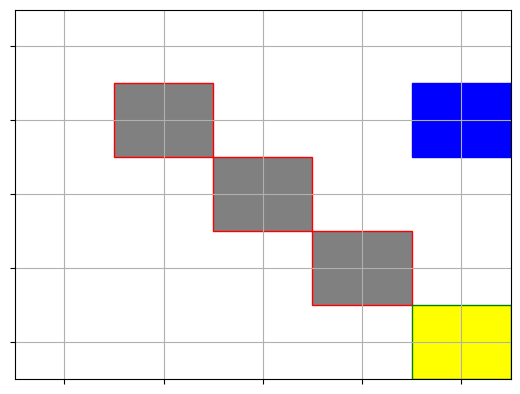

State: [3 1], Action: 3, Reward: -0.1, Done: False


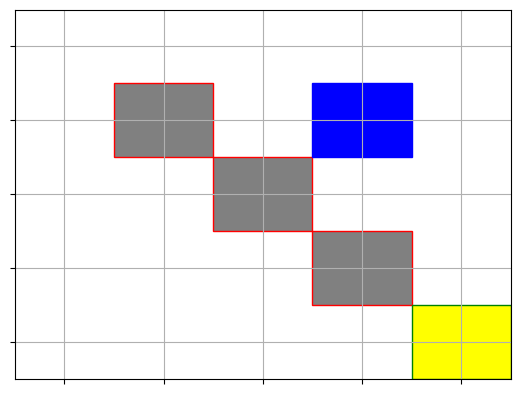

State: [2 1], Action: 3, Reward: -0.1, Done: False


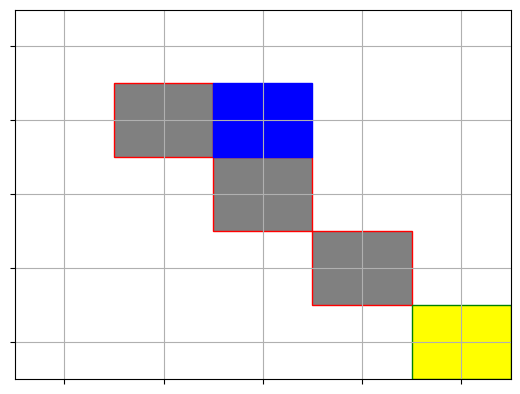

State: [2 1], Action: 0, Reward: -0.1, Done: False


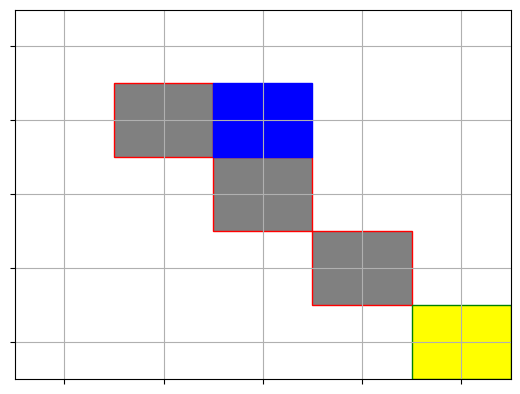

State: [2 1], Action: 0, Reward: -0.1, Done: False


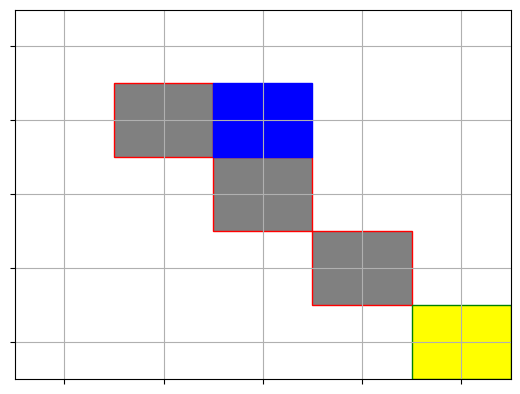

State: [2 1], Action: 3, Reward: -0.1, Done: False


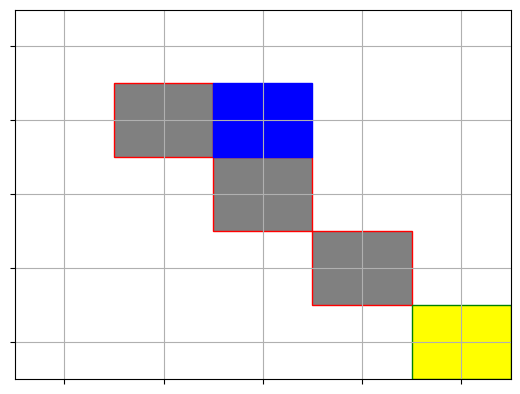

State: [2 1], Action: 0, Reward: -0.1, Done: False


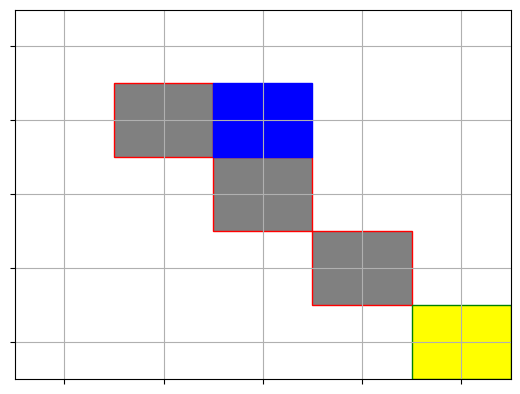

State: [3 1], Action: 1, Reward: -0.1, Done: False


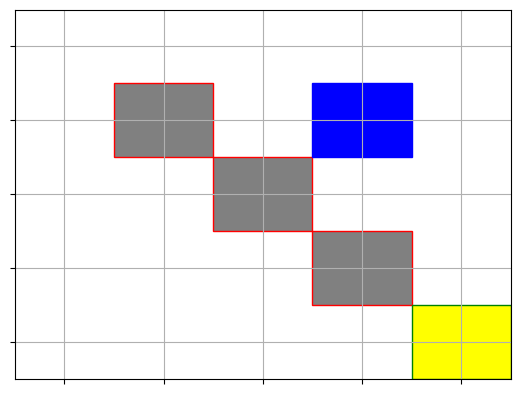

State: [4 1], Action: 1, Reward: -0.1, Done: False


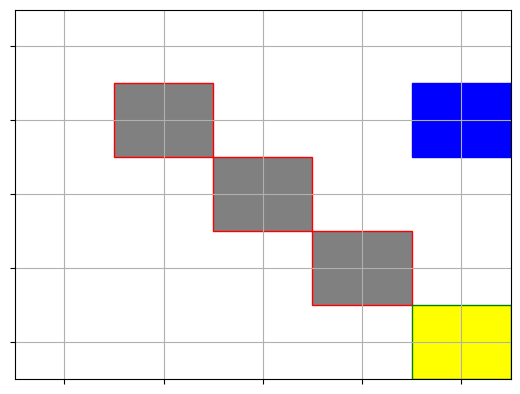

State: [4 0], Action: 2, Reward: -0.1, Done: False


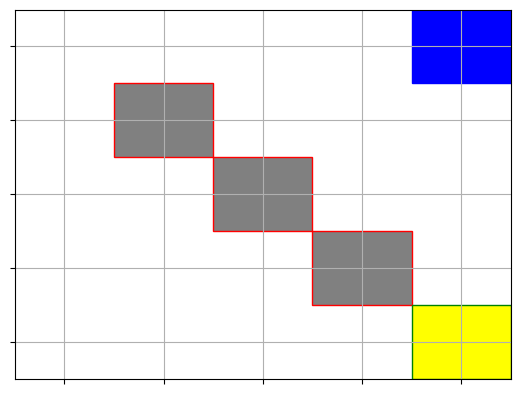

State: [4 1], Action: 0, Reward: -0.1, Done: False


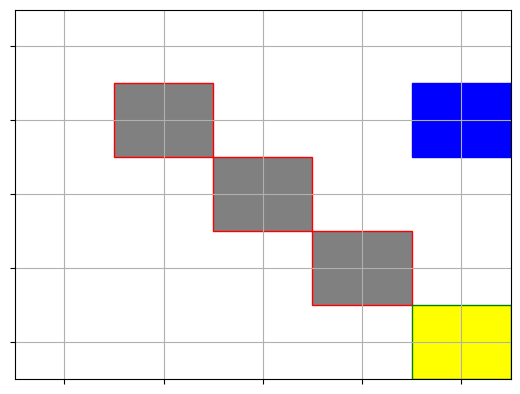

State: [4 0], Action: 2, Reward: -0.1, Done: False


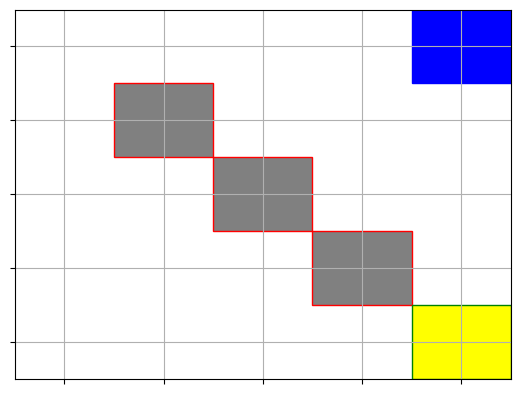

State: [4 1], Action: 0, Reward: -0.1, Done: False


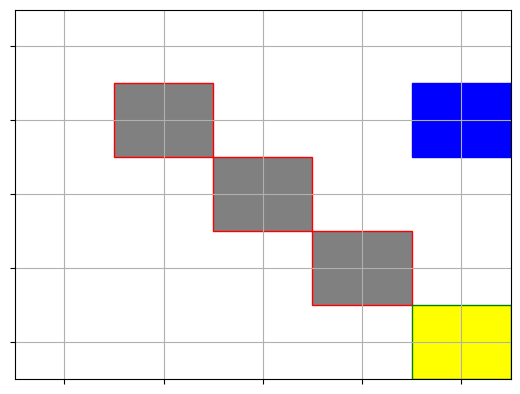

State: [4 2], Action: 0, Reward: -0.1, Done: False


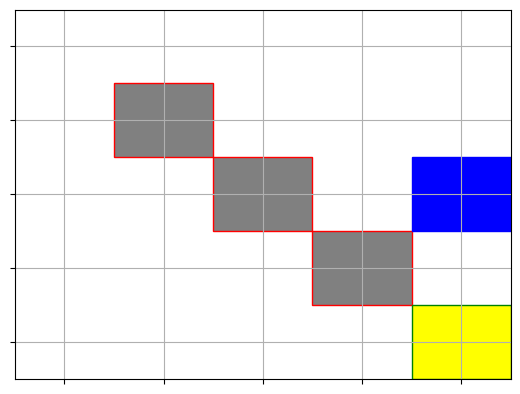

State: [4 3], Action: 0, Reward: -0.1, Done: False


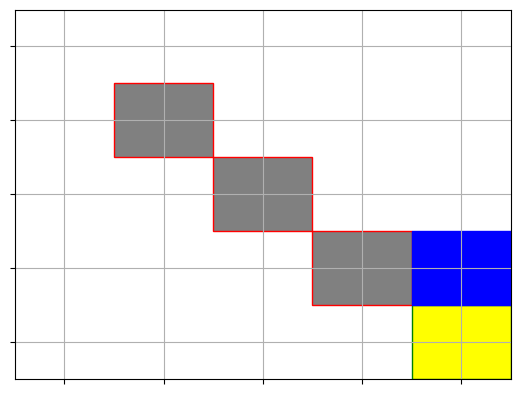

State: [4 2], Action: 2, Reward: -0.1, Done: False


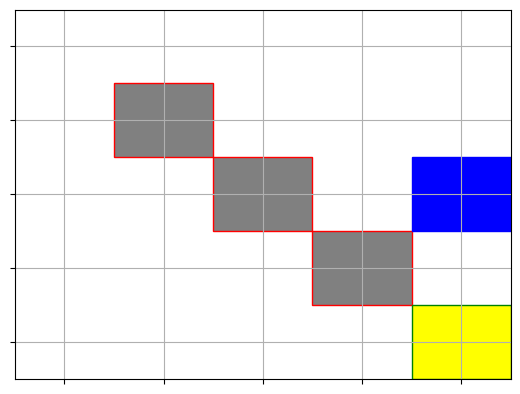

State: [4 1], Action: 2, Reward: -0.1, Done: False


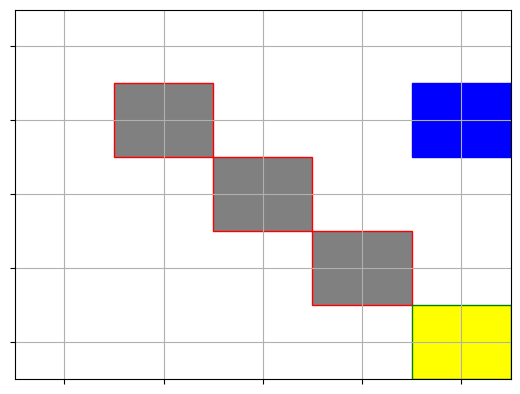

State: [4 2], Action: 0, Reward: -0.1, Done: False


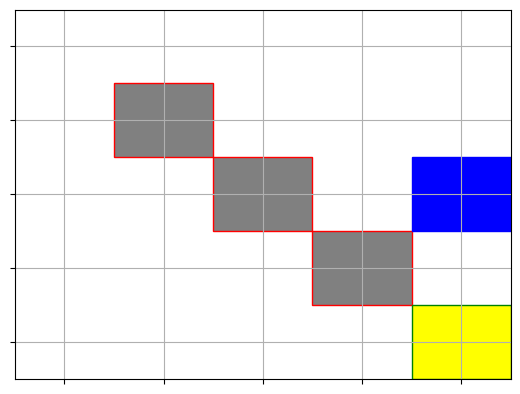

State: [4 1], Action: 2, Reward: -0.1, Done: False


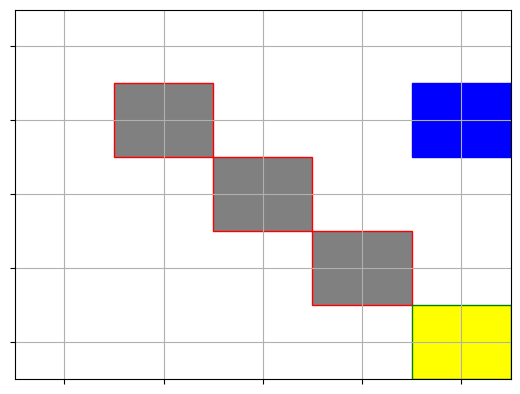

State: [3 1], Action: 3, Reward: -0.1, Done: False


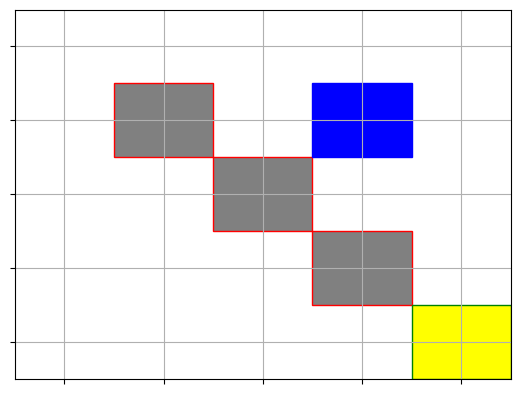

State: [2 1], Action: 3, Reward: -0.1, Done: False


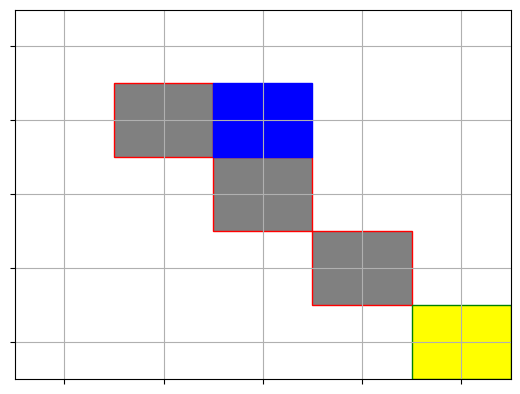

State: [2 1], Action: 3, Reward: -0.1, Done: False


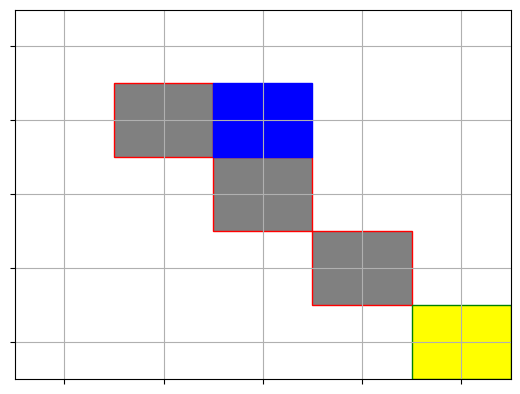

State: [2 1], Action: 3, Reward: -0.1, Done: False


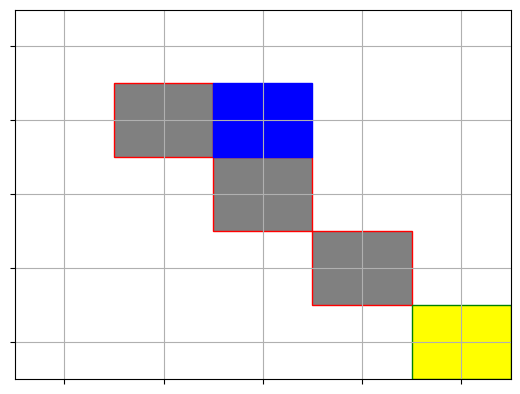

State: [2 0], Action: 2, Reward: -0.1, Done: False


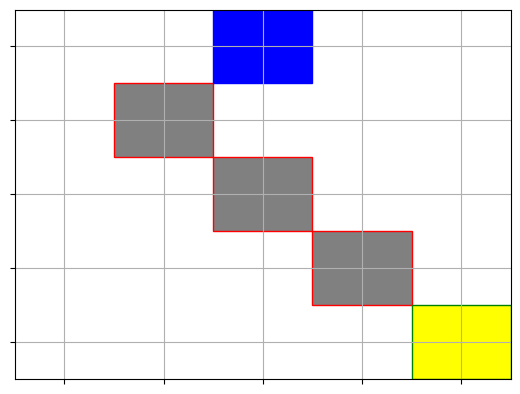

State: [3 0], Action: 1, Reward: -0.1, Done: False


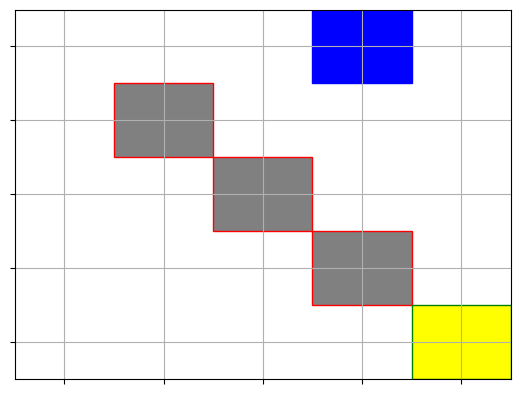

State: [4 0], Action: 1, Reward: -0.1, Done: False


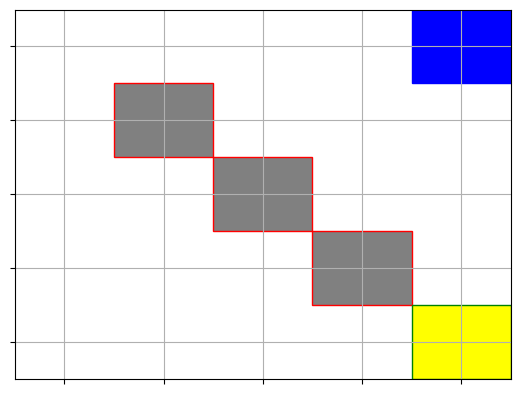

State: [4 0], Action: 1, Reward: -0.1, Done: False


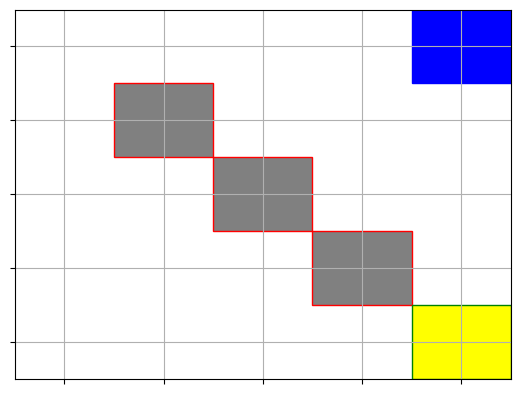

State: [3 0], Action: 3, Reward: -0.1, Done: False


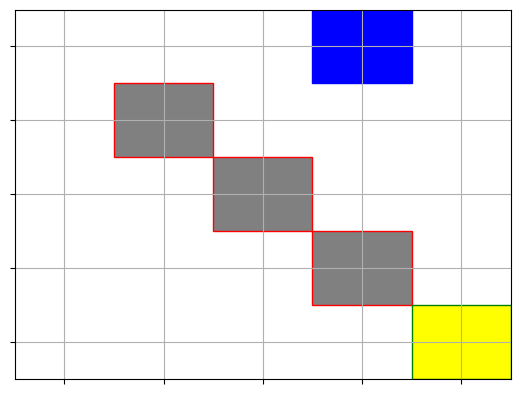

State: [3 0], Action: 2, Reward: -0.1, Done: False


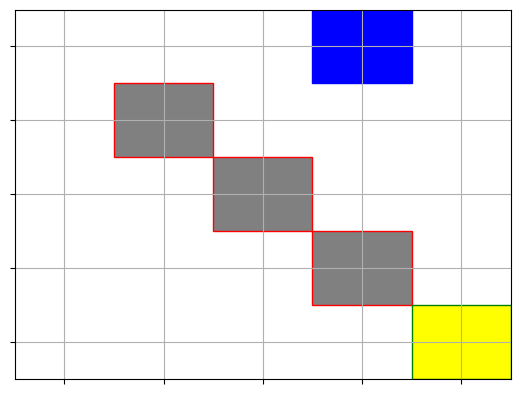

State: [3 1], Action: 0, Reward: -0.1, Done: False


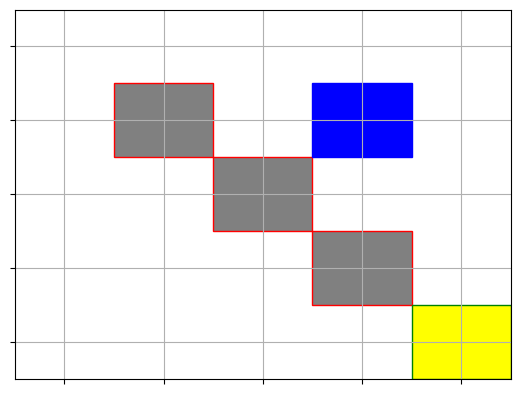

State: [4 1], Action: 1, Reward: -0.1, Done: False


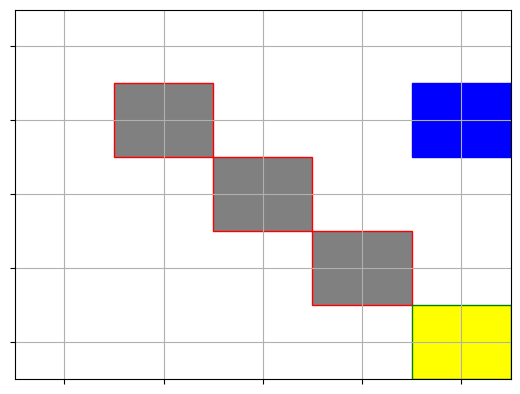

State: [4 0], Action: 2, Reward: -0.1, Done: False


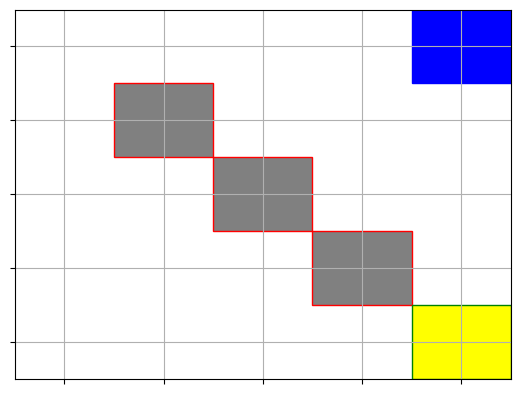

State: [4 1], Action: 0, Reward: -0.1, Done: False


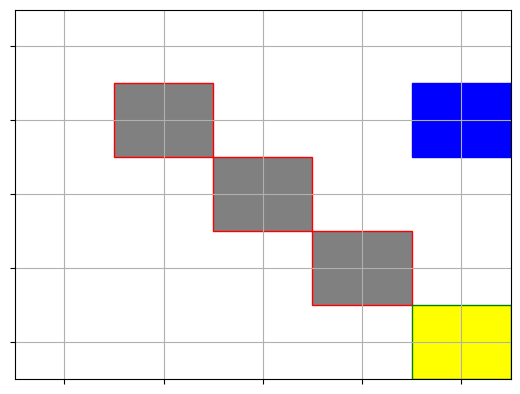

State: [4 0], Action: 2, Reward: -0.1, Done: False


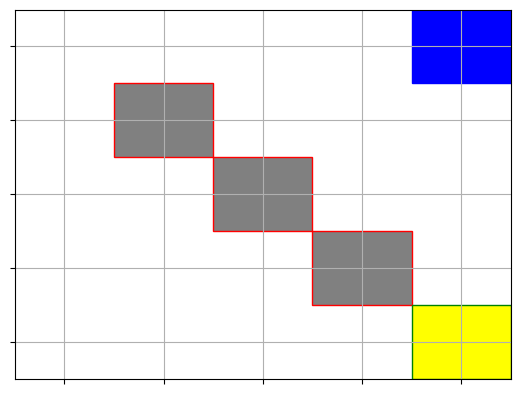

State: [4 1], Action: 0, Reward: -0.1, Done: False


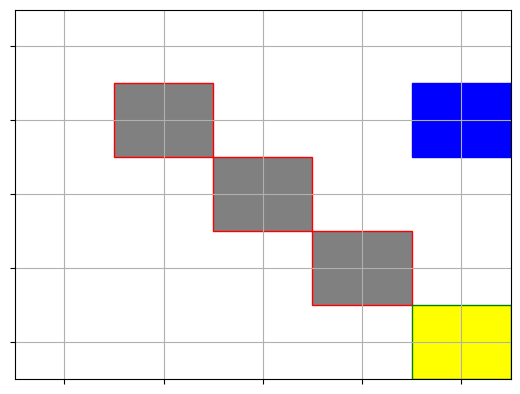

State: [4 2], Action: 0, Reward: -0.1, Done: False


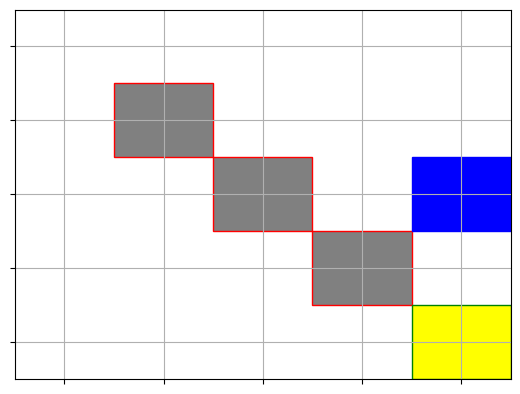

State: [3 2], Action: 3, Reward: -0.1, Done: False


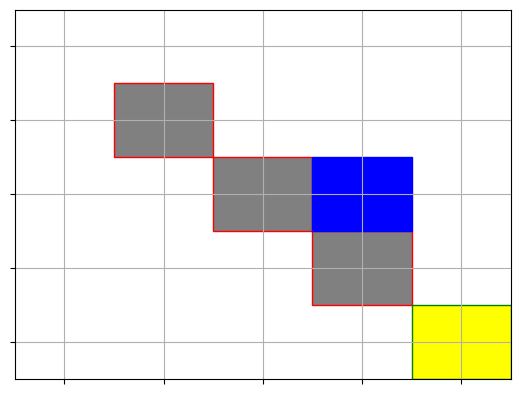

State: [3 2], Action: 0, Reward: -0.1, Done: False


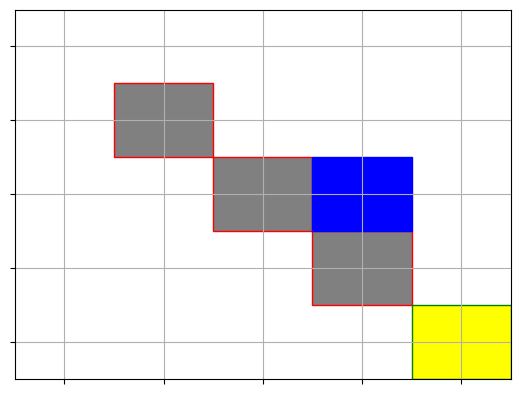

State: [3 2], Action: 3, Reward: -0.1, Done: False


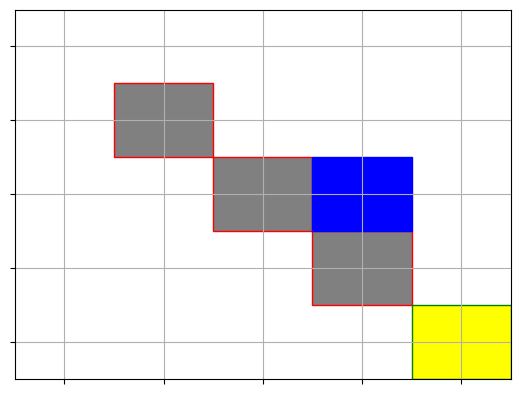

State: [3 1], Action: 2, Reward: -0.1, Done: False


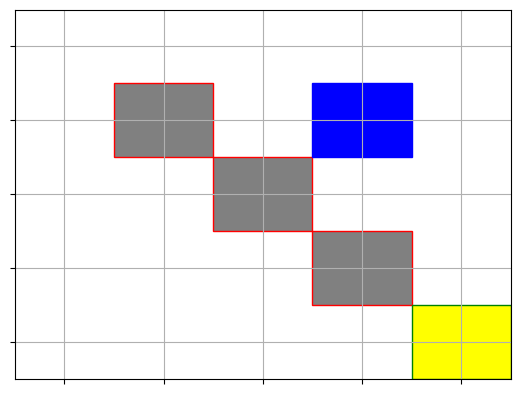

State: [3 0], Action: 2, Reward: -0.1, Done: False


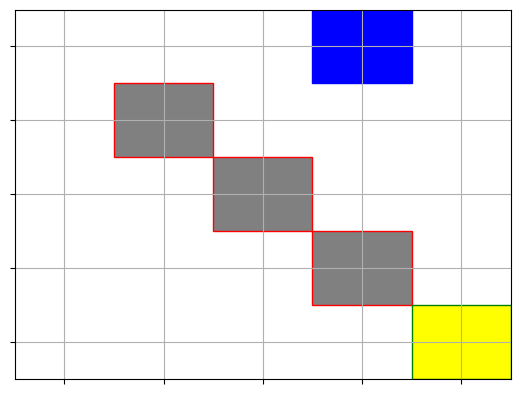

State: [2 0], Action: 3, Reward: -0.1, Done: False


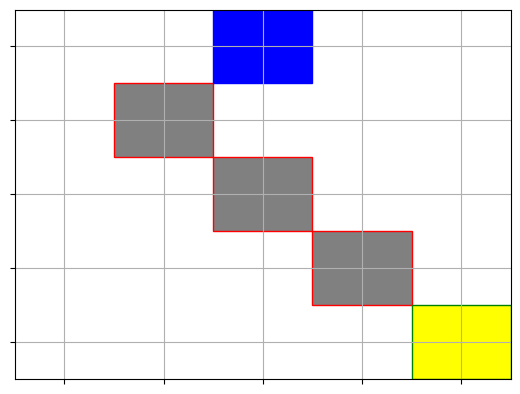

State: [2 0], Action: 2, Reward: -0.1, Done: False


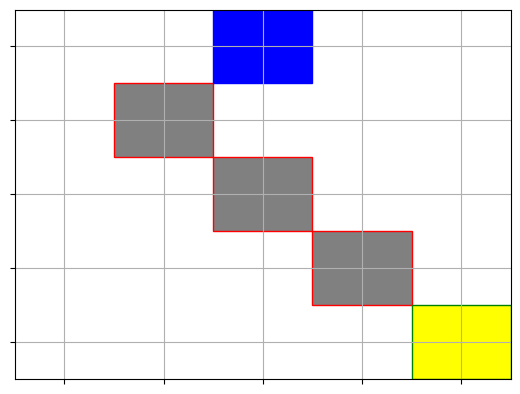

State: [3 0], Action: 1, Reward: -0.1, Done: False


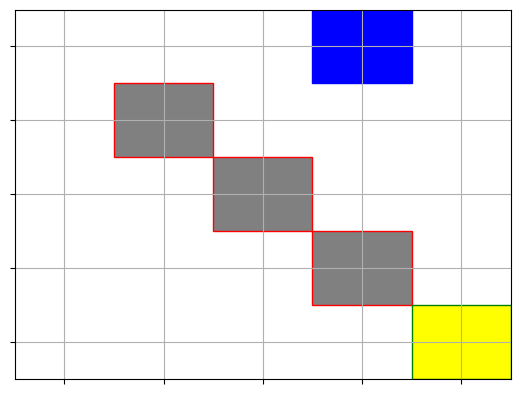

State: [3 1], Action: 0, Reward: -0.1, Done: False


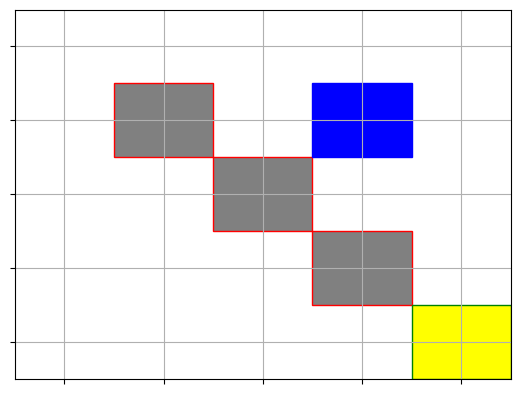

State: [4 1], Action: 1, Reward: -0.1, Done: False


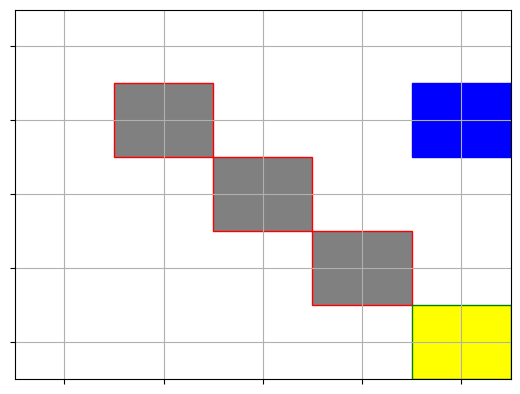

State: [3 1], Action: 3, Reward: -0.1, Done: False


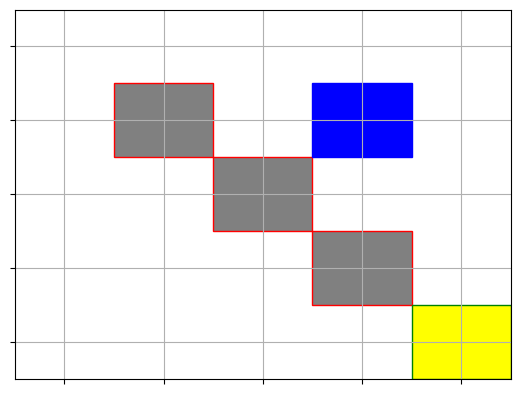

State: [4 1], Action: 1, Reward: -0.1, Done: False


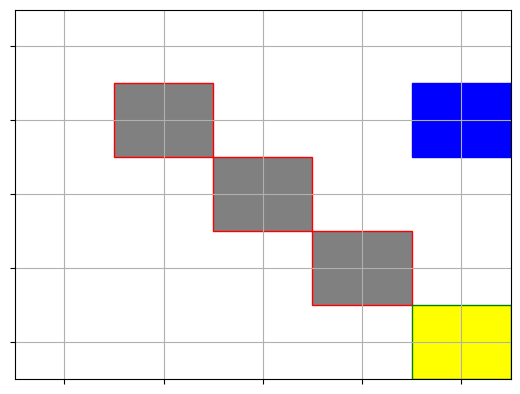

State: [4 0], Action: 2, Reward: -0.1, Done: False


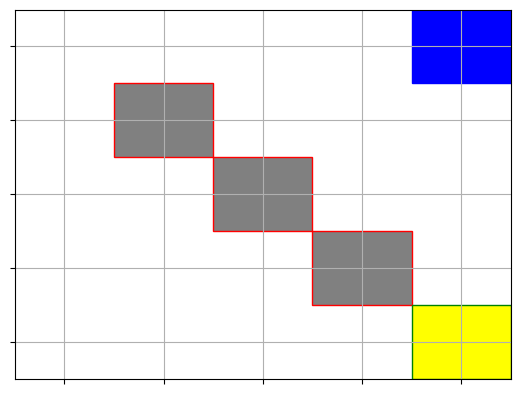

State: [4 1], Action: 0, Reward: -0.1, Done: False


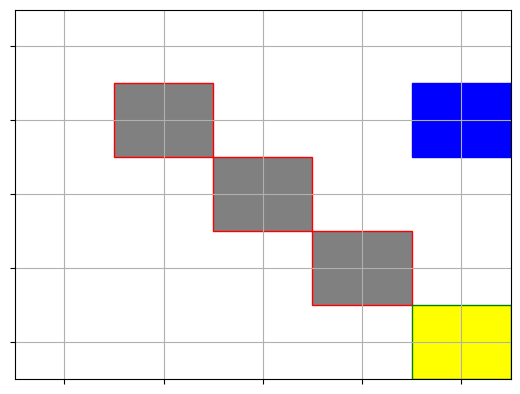

State: [4 1], Action: 1, Reward: -0.1, Done: False


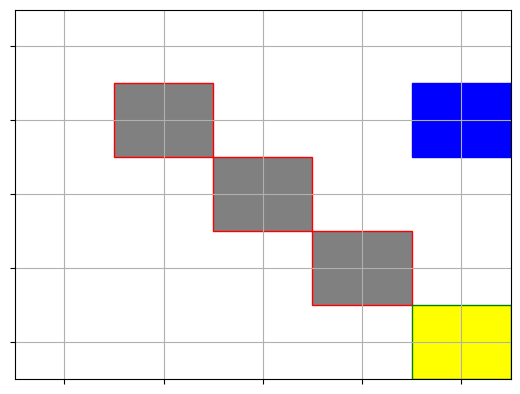

State: [4 2], Action: 0, Reward: -0.1, Done: False


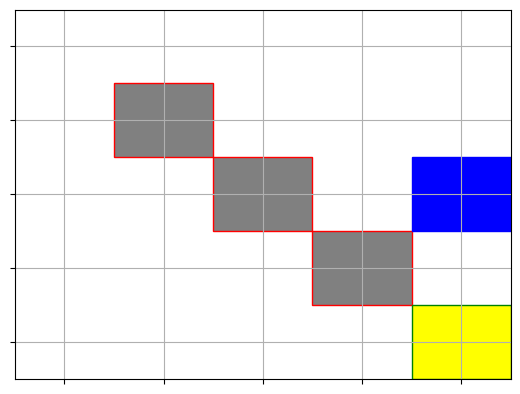

State: [3 2], Action: 3, Reward: -0.1, Done: False


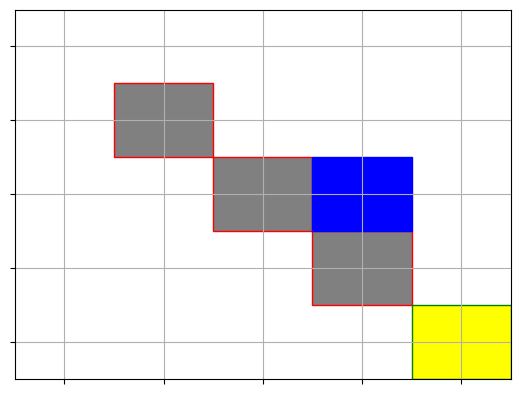

State: [3 2], Action: 0, Reward: -0.1, Done: False


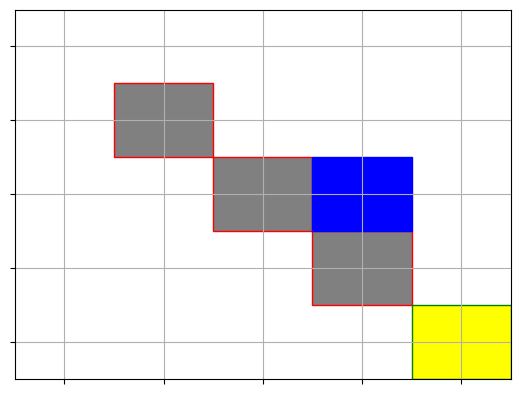

State: [4 2], Action: 1, Reward: -0.1, Done: False


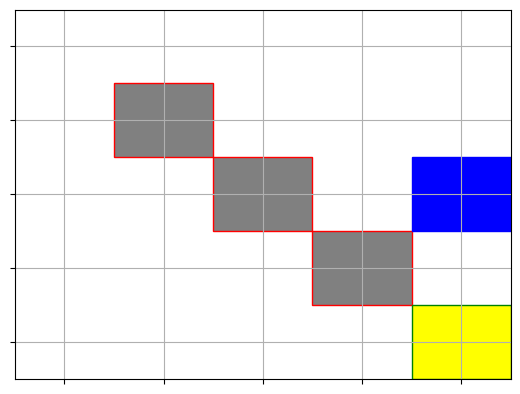

State: [3 2], Action: 3, Reward: -0.1, Done: False


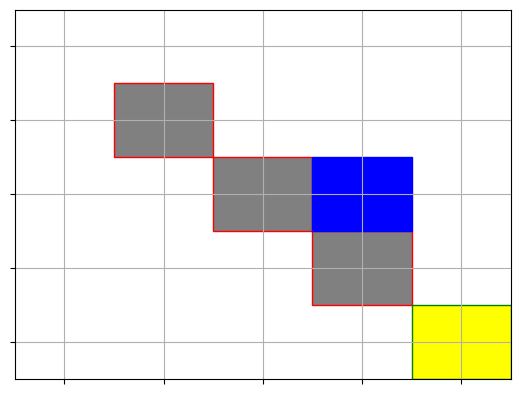

State: [4 2], Action: 1, Reward: -0.1, Done: False


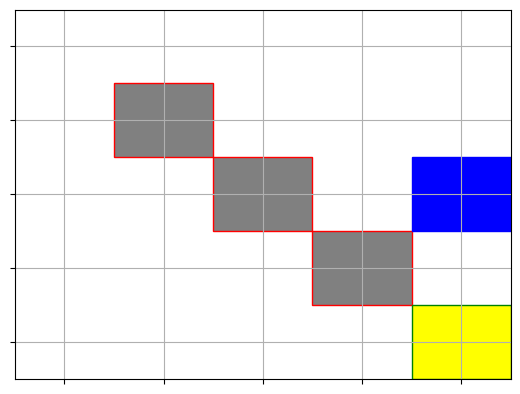

State: [4 3], Action: 0, Reward: -0.1, Done: False


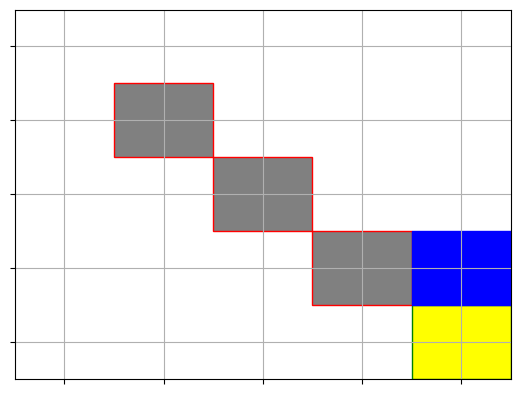

State: [4 4], Action: 0, Reward: 1, Done: True


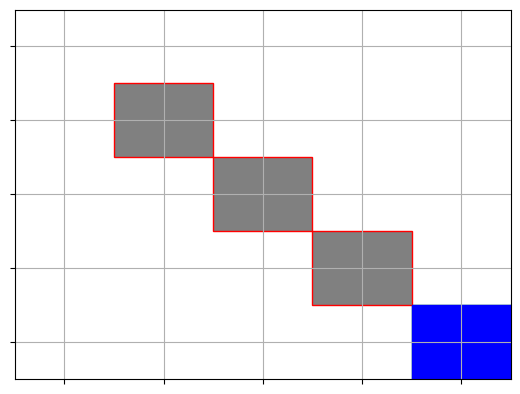

State: [1 0], Action: 1, Reward: -0.1, Done: False


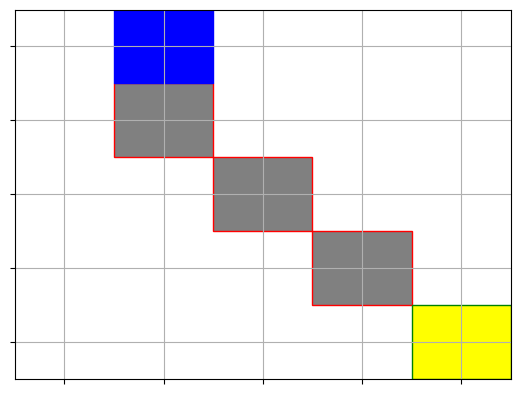

State: [1 0], Action: 0, Reward: -0.1, Done: False


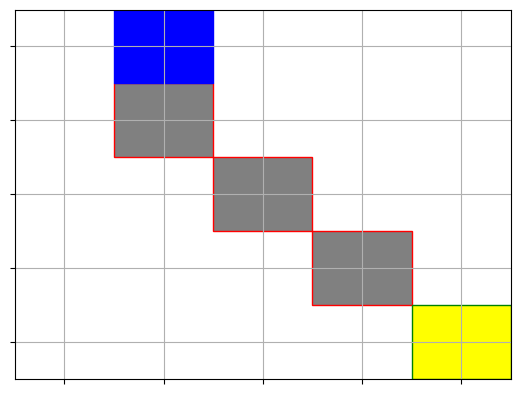

State: [2 0], Action: 1, Reward: -0.1, Done: False


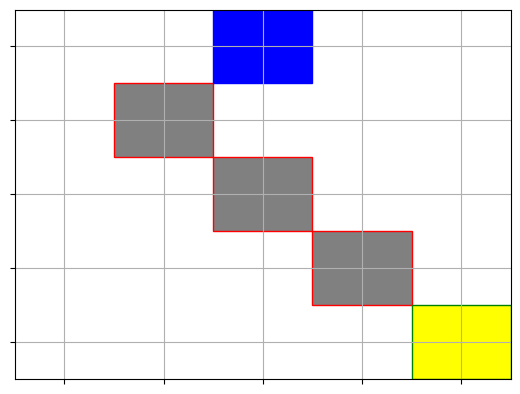

State: [3 0], Action: 1, Reward: -0.1, Done: False


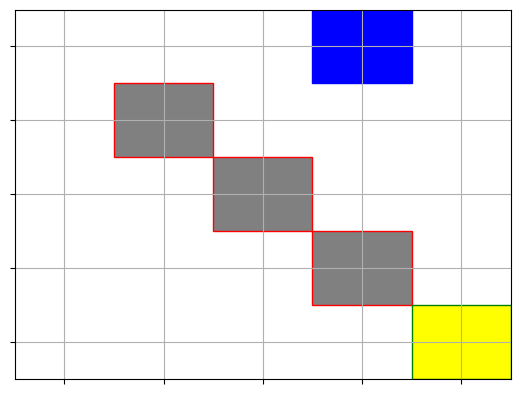

State: [3 0], Action: 2, Reward: -0.1, Done: False


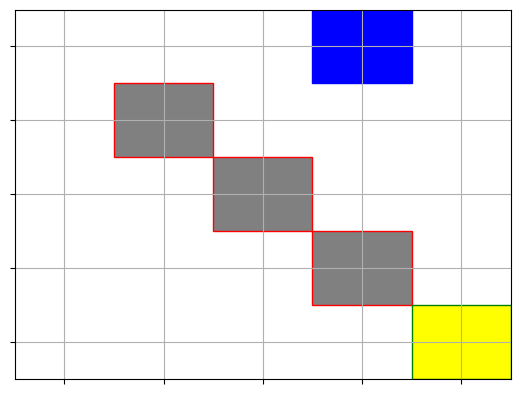

State: [2 0], Action: 3, Reward: -0.1, Done: False


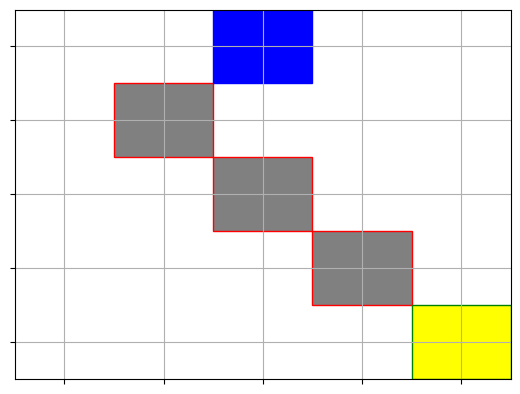

State: [2 1], Action: 0, Reward: -0.1, Done: False


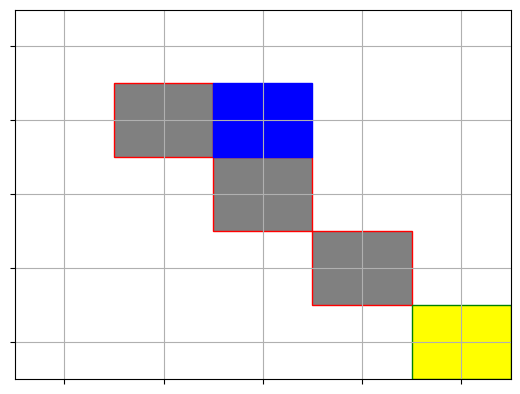

State: [2 0], Action: 2, Reward: -0.1, Done: False


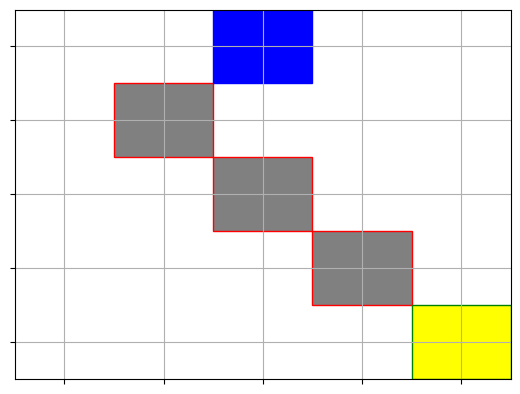

State: [2 0], Action: 2, Reward: -0.1, Done: False


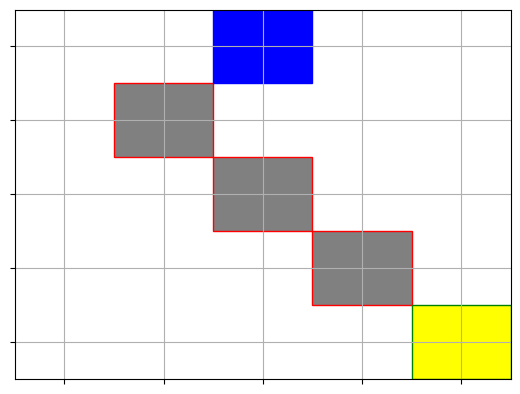

State: [3 0], Action: 1, Reward: -0.1, Done: False


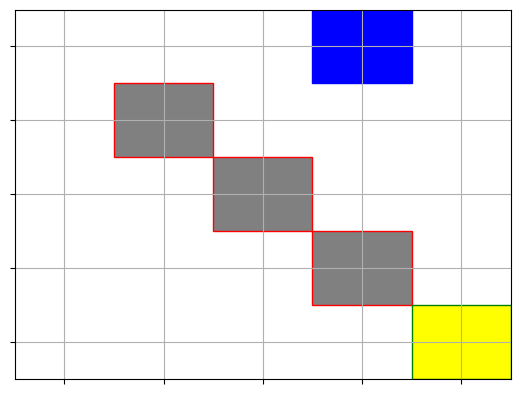

State: [3 0], Action: 2, Reward: -0.1, Done: False


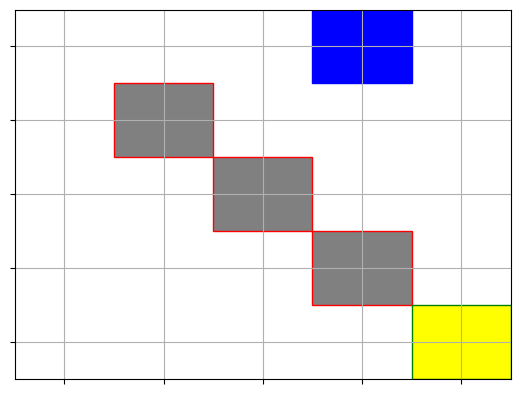

State: [3 1], Action: 0, Reward: -0.1, Done: False


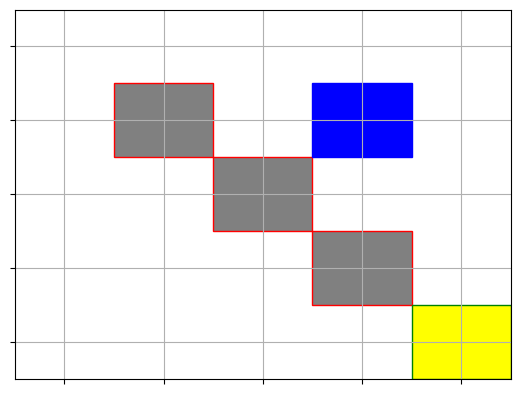

State: [2 1], Action: 3, Reward: -0.1, Done: False


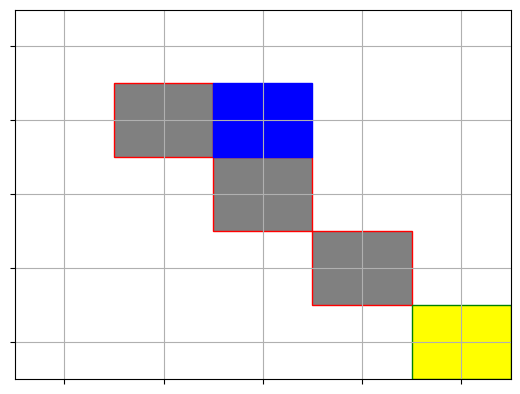

State: [2 1], Action: 0, Reward: -0.1, Done: False


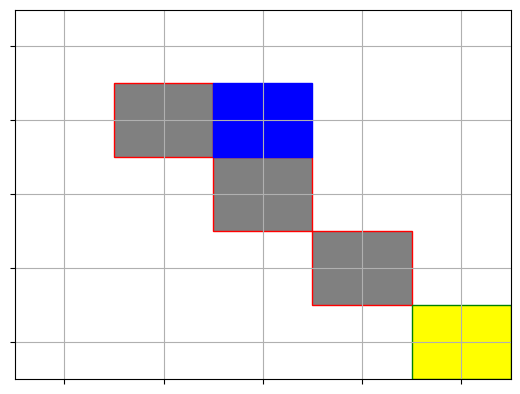

State: [2 0], Action: 2, Reward: -0.1, Done: False


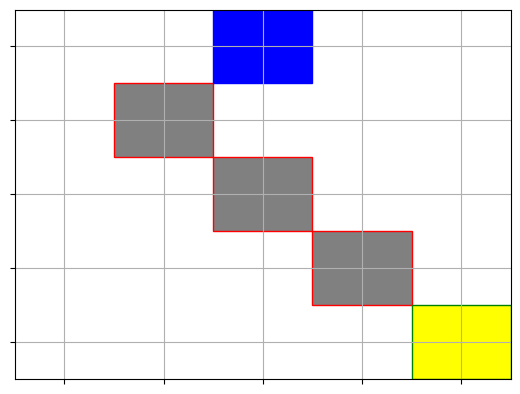

State: [2 0], Action: 2, Reward: -0.1, Done: False


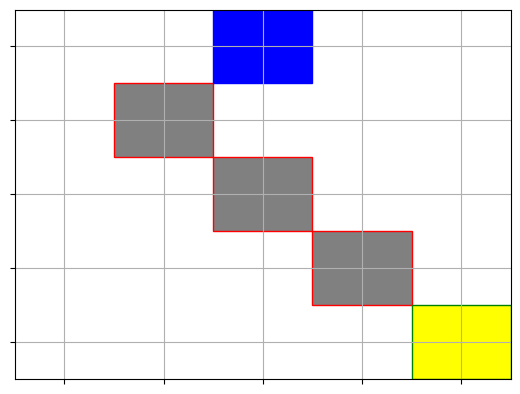

State: [2 1], Action: 0, Reward: -0.1, Done: False


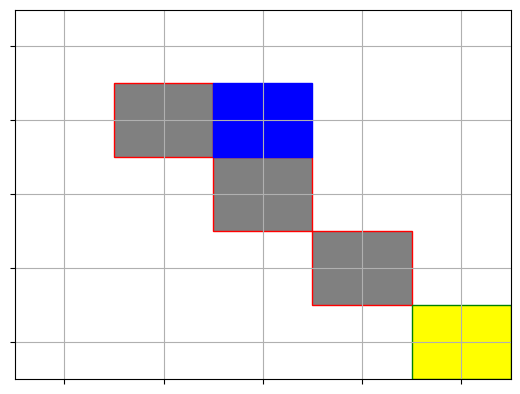

State: [2 1], Action: 3, Reward: -0.1, Done: False


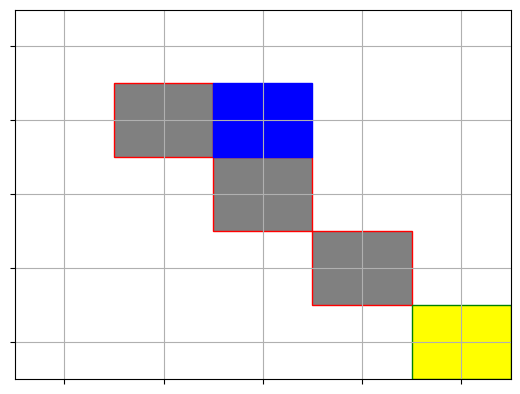

State: [2 1], Action: 3, Reward: -0.1, Done: False


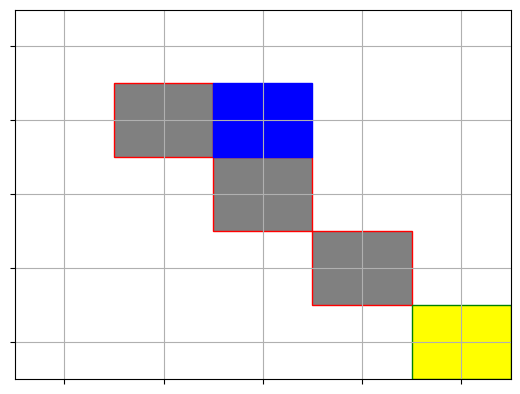

State: [2 1], Action: 3, Reward: -0.1, Done: False


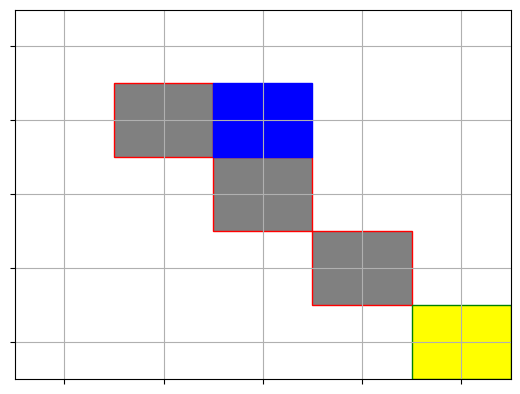

State: [2 1], Action: 0, Reward: -0.1, Done: False


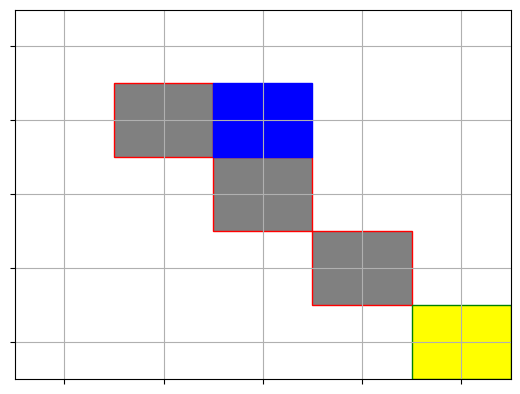

State: [2 0], Action: 2, Reward: -0.1, Done: False


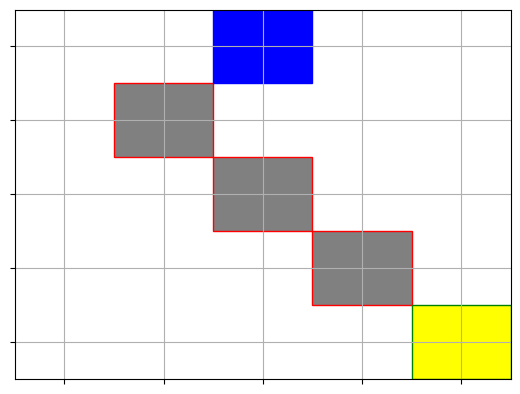

State: [2 0], Action: 2, Reward: -0.1, Done: False


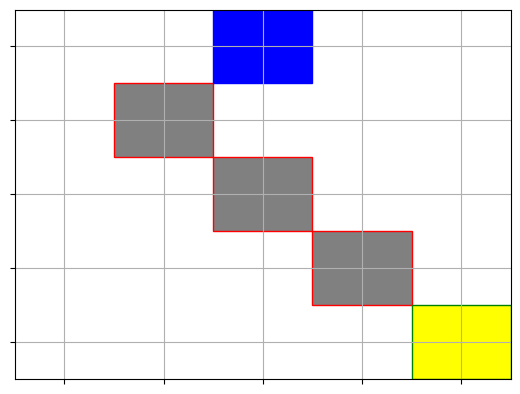

State: [3 0], Action: 1, Reward: -0.1, Done: False


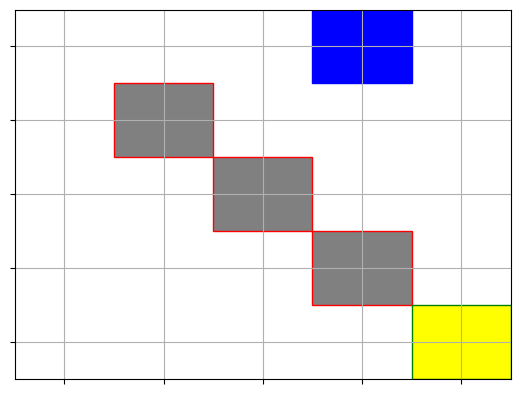

State: [3 1], Action: 0, Reward: -0.1, Done: False


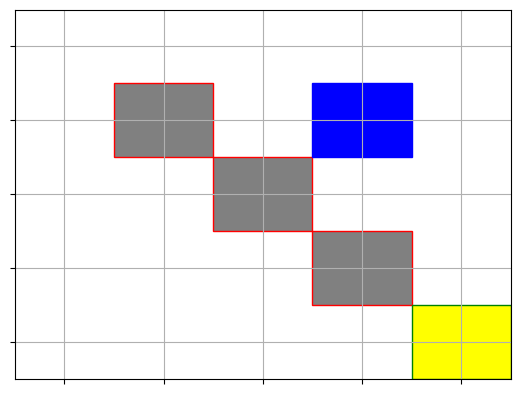

State: [3 2], Action: 0, Reward: -0.1, Done: False


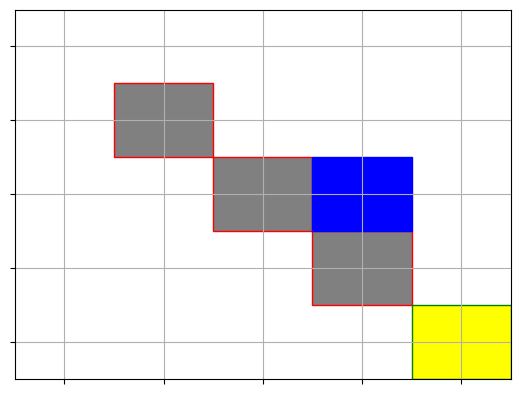

State: [3 1], Action: 2, Reward: -0.1, Done: False


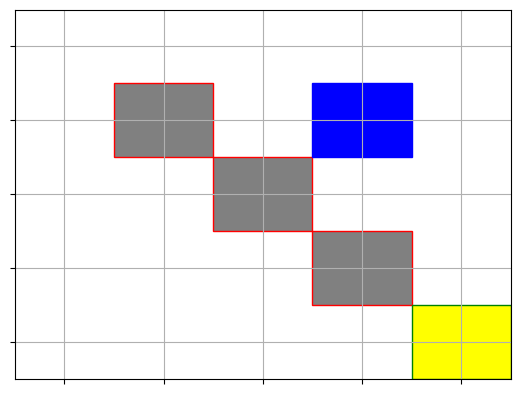

State: [2 1], Action: 3, Reward: -0.1, Done: False


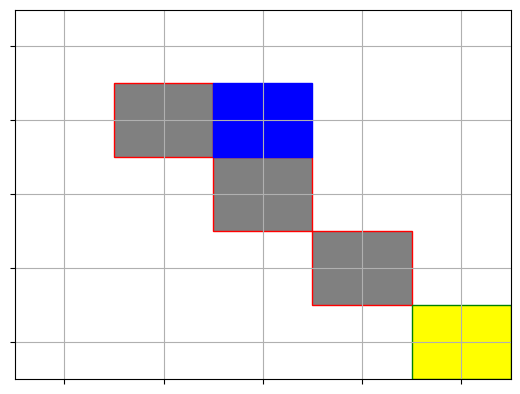

State: [2 0], Action: 2, Reward: -0.1, Done: False


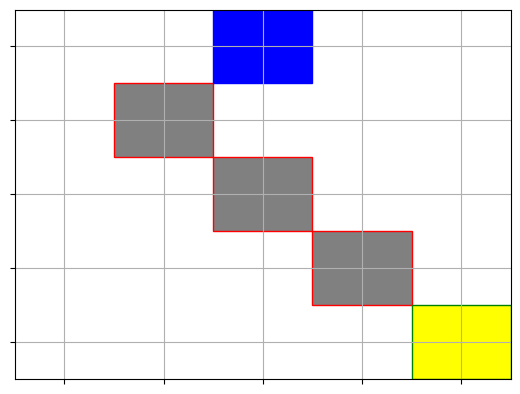

State: [2 0], Action: 2, Reward: -0.1, Done: False


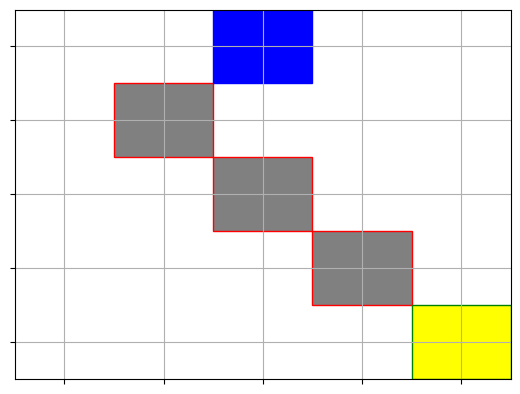

State: [2 1], Action: 0, Reward: -0.1, Done: False


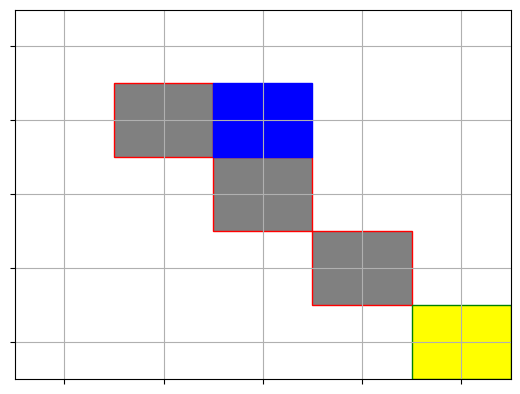

State: [2 0], Action: 2, Reward: -0.1, Done: False


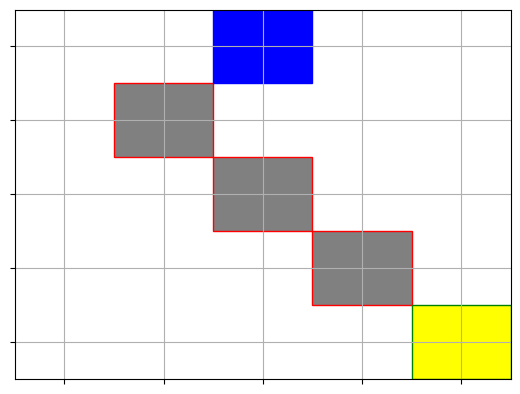

State: [1 0], Action: 3, Reward: -0.1, Done: False


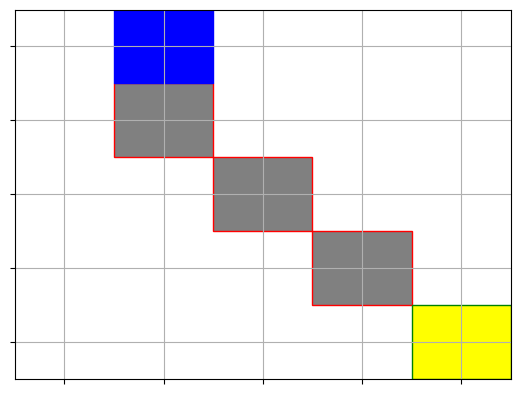

State: [1 0], Action: 2, Reward: -0.1, Done: False


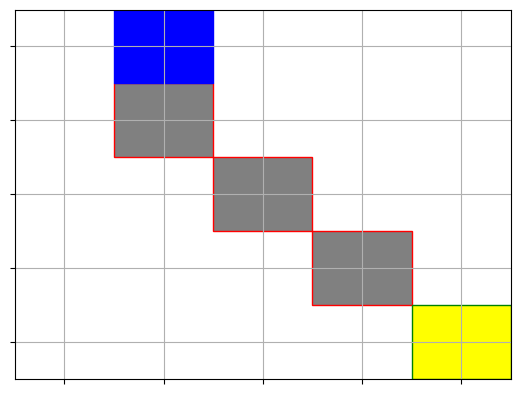

State: [0 0], Action: 3, Reward: -0.1, Done: False


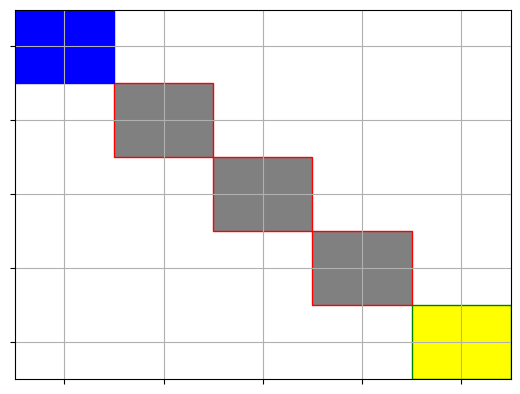

State: [0 0], Action: 3, Reward: -0.1, Done: False


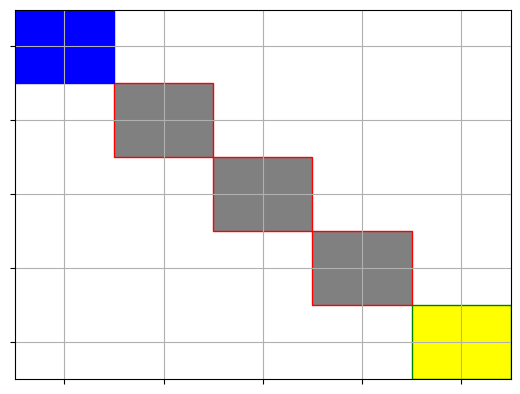

State: [0 0], Action: 2, Reward: -0.1, Done: False


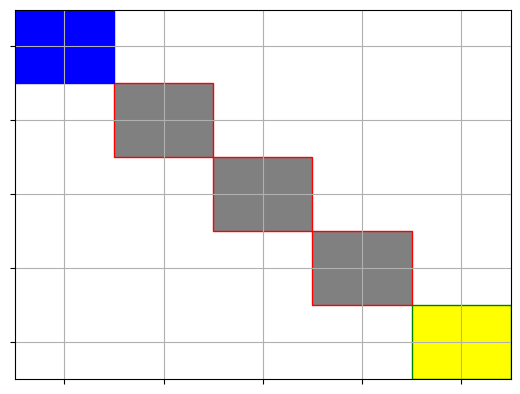

State: [0 0], Action: 2, Reward: -0.1, Done: False


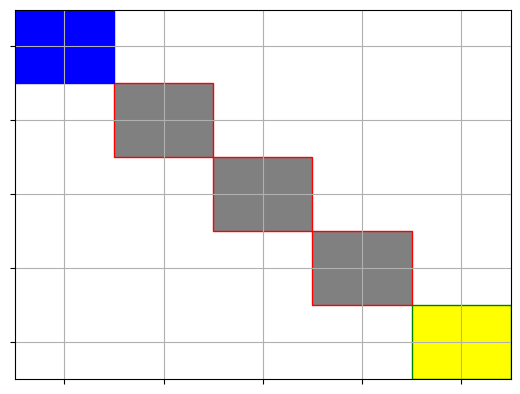

State: [0 1], Action: 0, Reward: -0.1, Done: False


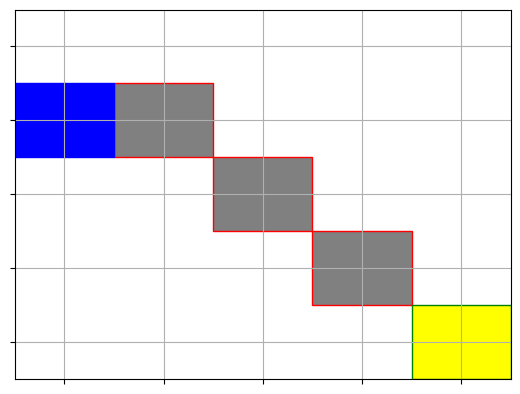

State: [0 1], Action: 3, Reward: -0.1, Done: False


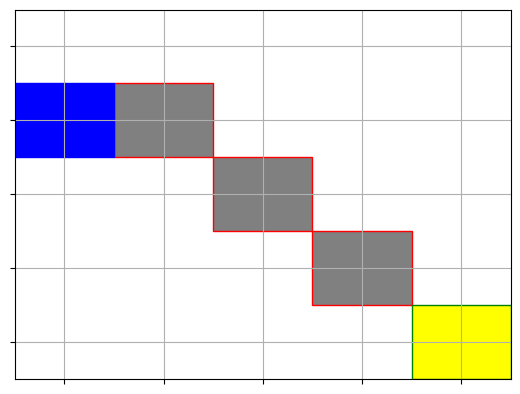

State: [0 1], Action: 1, Reward: -0.1, Done: False


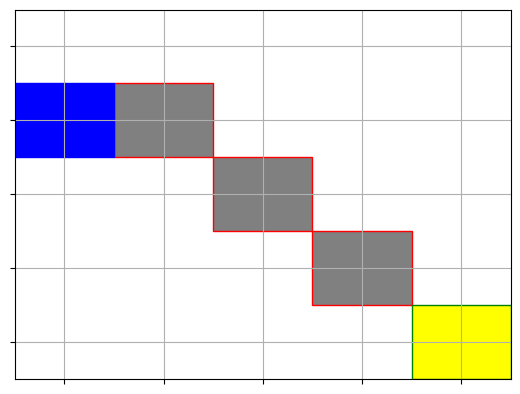

State: [0 2], Action: 0, Reward: -0.1, Done: False


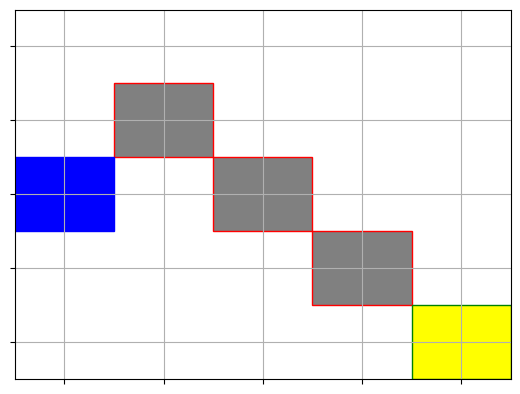

State: [0 2], Action: 3, Reward: -0.1, Done: False


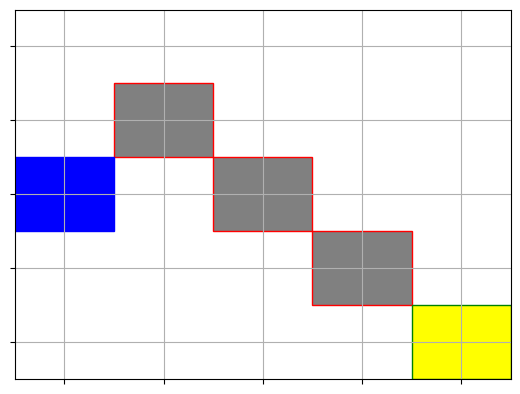

State: [0 2], Action: 3, Reward: -0.1, Done: False


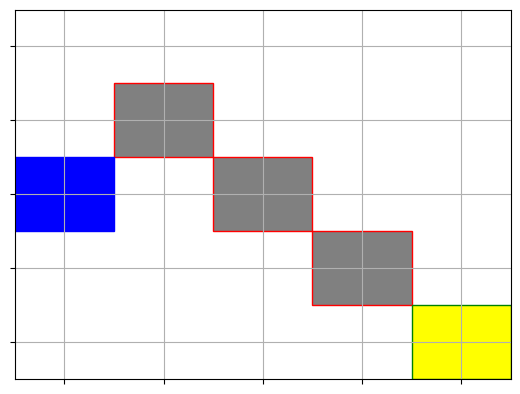

State: [0 2], Action: 3, Reward: -0.1, Done: False


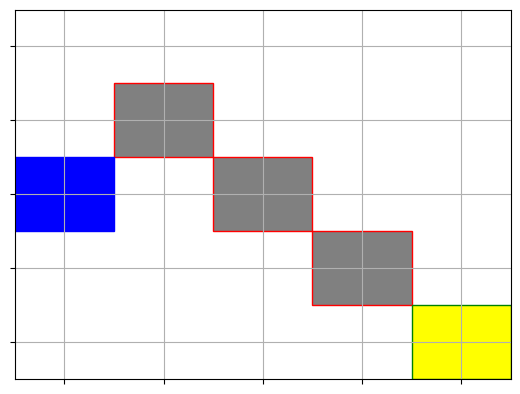

State: [0 2], Action: 3, Reward: -0.1, Done: False


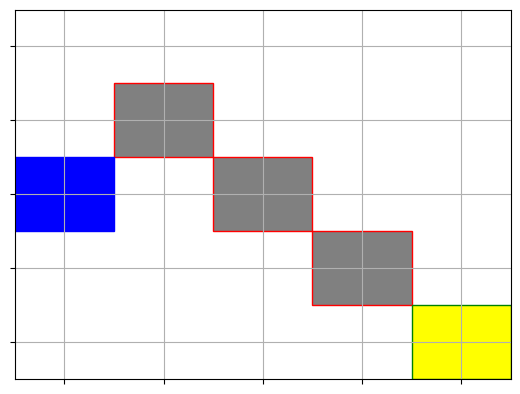

State: [0 2], Action: 3, Reward: -0.1, Done: False


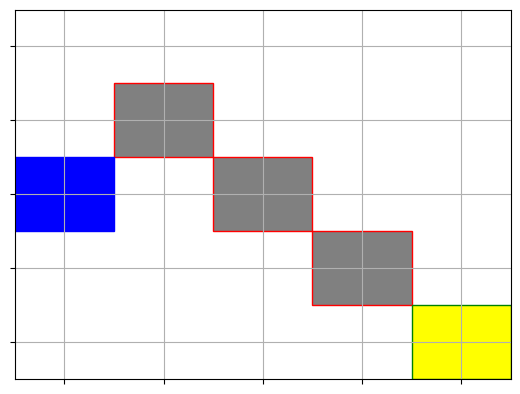

State: [1 2], Action: 1, Reward: -0.1, Done: False


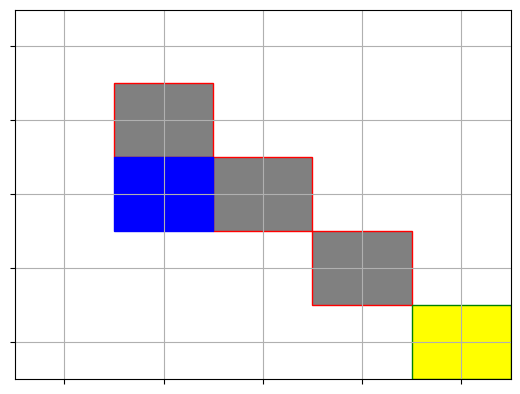

State: [1 3], Action: 0, Reward: -0.1, Done: False


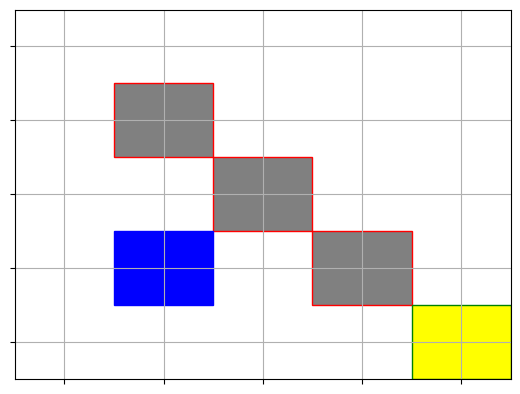

State: [1 4], Action: 0, Reward: -0.1, Done: False


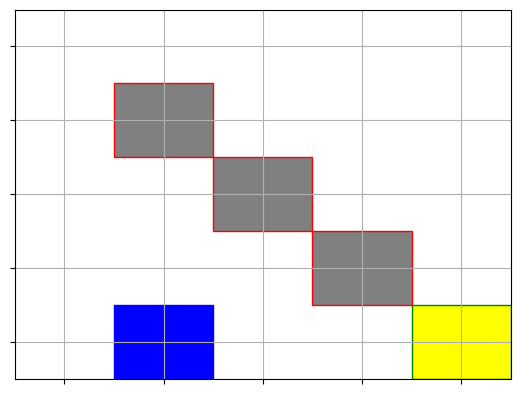

State: [1 3], Action: 2, Reward: -0.1, Done: False


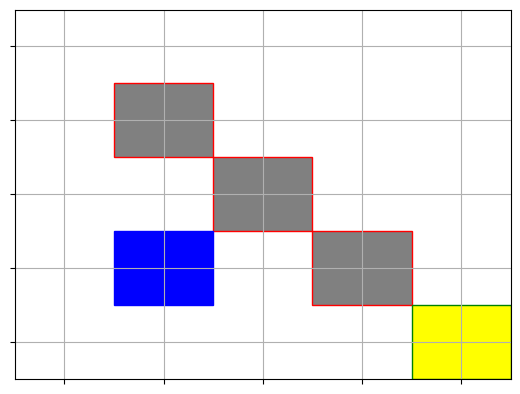

State: [1 4], Action: 0, Reward: -0.1, Done: False


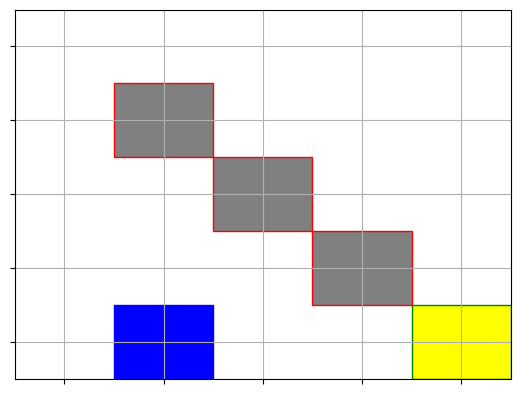

State: [1 4], Action: 0, Reward: -0.1, Done: False


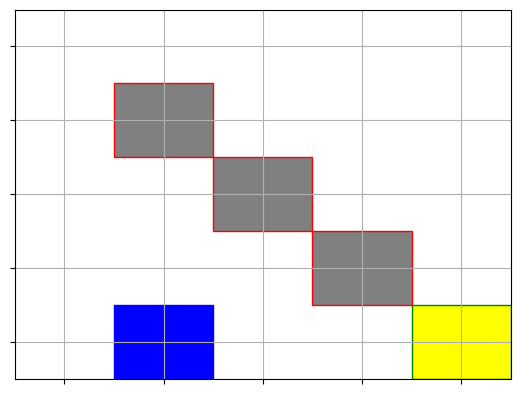

State: [0 4], Action: 3, Reward: -0.1, Done: False


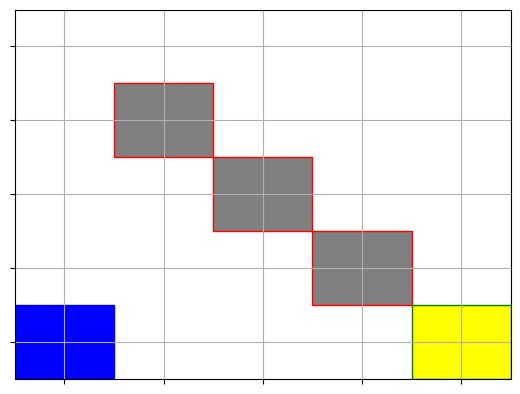

State: [0 4], Action: 0, Reward: -0.1, Done: False


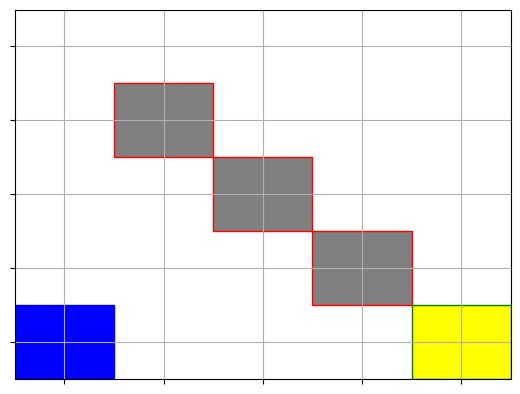

State: [0 4], Action: 0, Reward: -0.1, Done: False


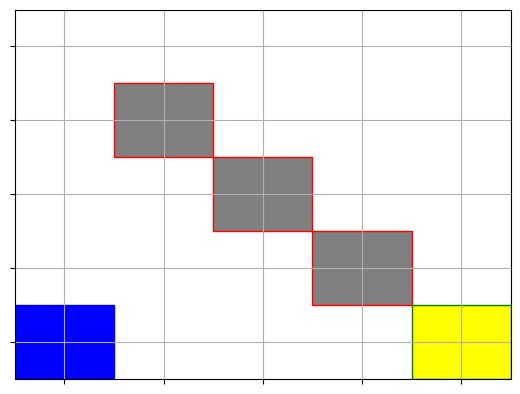

State: [1 4], Action: 1, Reward: -0.1, Done: False


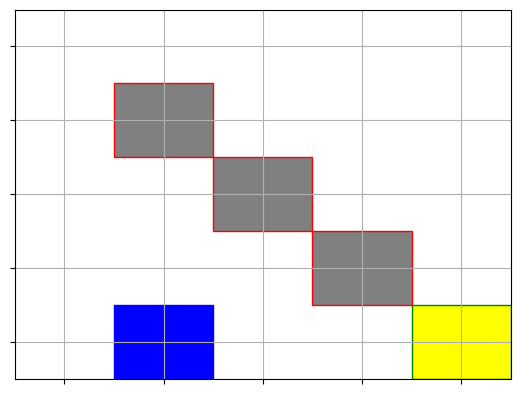

State: [2 4], Action: 1, Reward: -0.1, Done: False


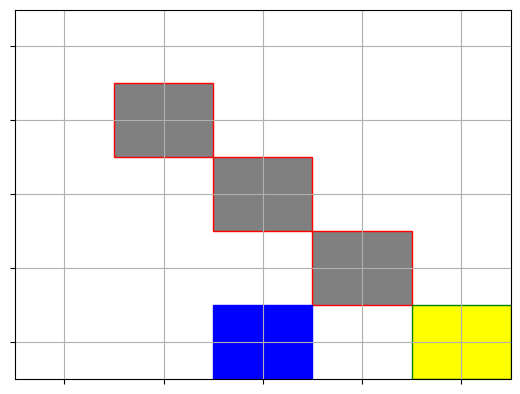

State: [2 3], Action: 2, Reward: -0.1, Done: False


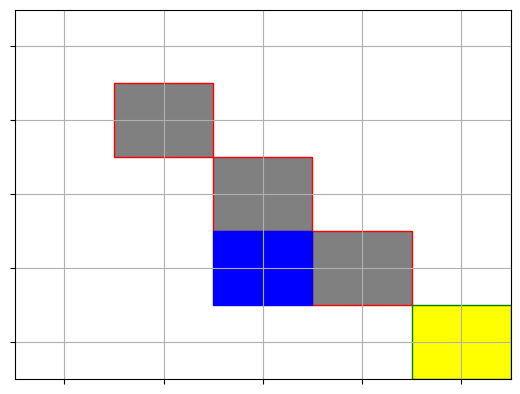

State: [2 3], Action: 1, Reward: -0.1, Done: False


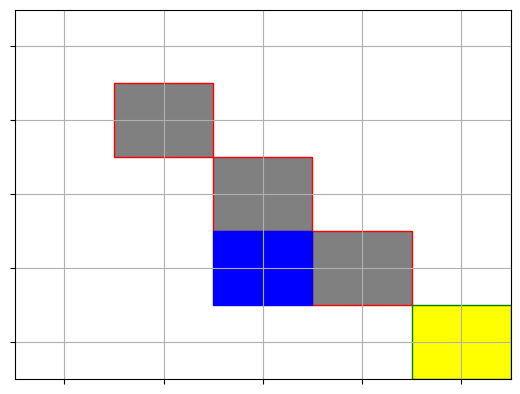

State: [2 4], Action: 0, Reward: -0.1, Done: False


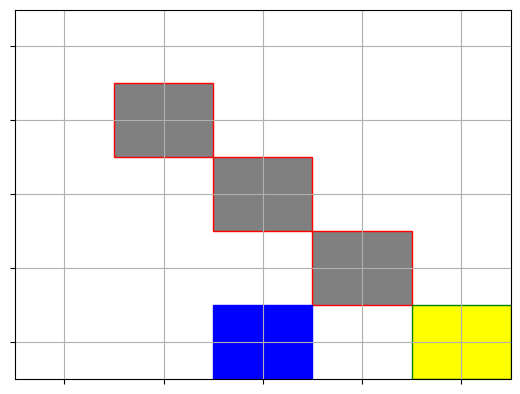

State: [1 4], Action: 3, Reward: -0.1, Done: False


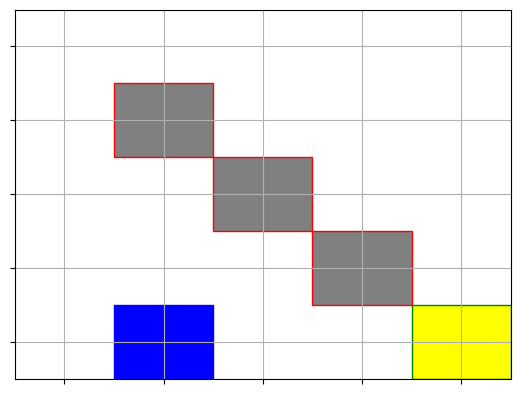

State: [2 4], Action: 1, Reward: -0.1, Done: False


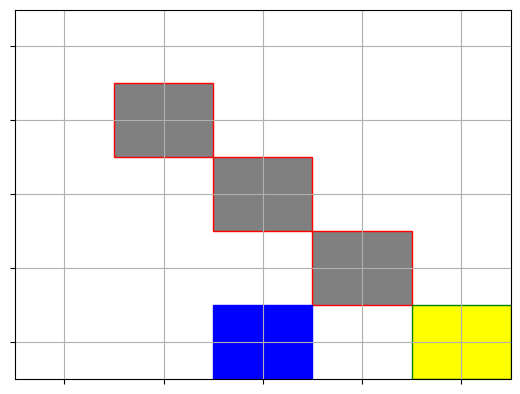

State: [2 4], Action: 0, Reward: -0.1, Done: False


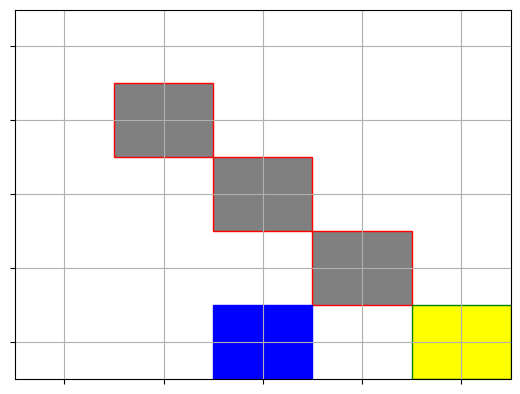

State: [2 4], Action: 0, Reward: -0.1, Done: False


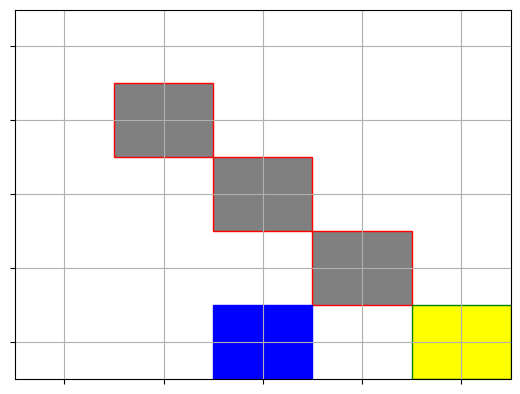

State: [3 4], Action: 1, Reward: -0.1, Done: False


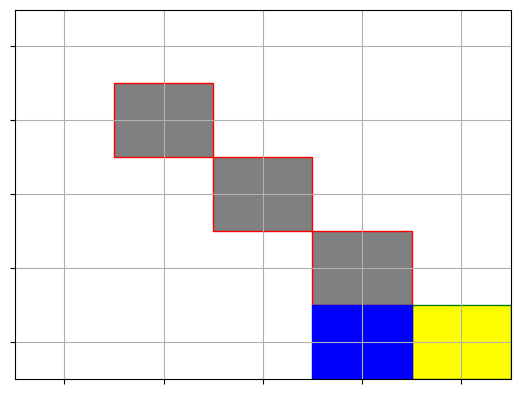

State: [3 4], Action: 2, Reward: -0.1, Done: False


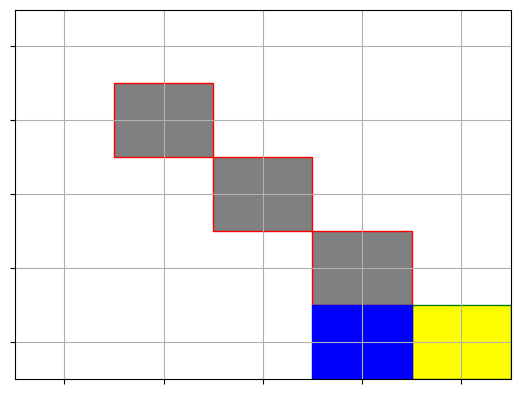

State: [3 4], Action: 2, Reward: -0.1, Done: False


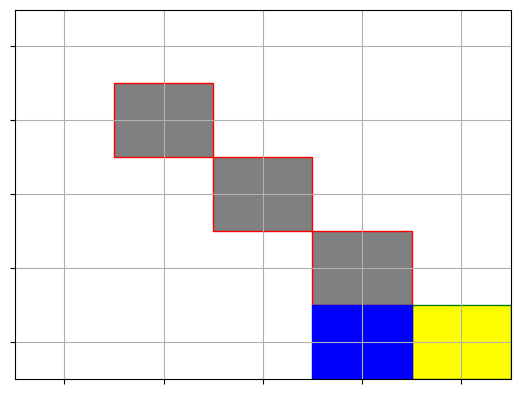

State: [2 4], Action: 3, Reward: -0.1, Done: False


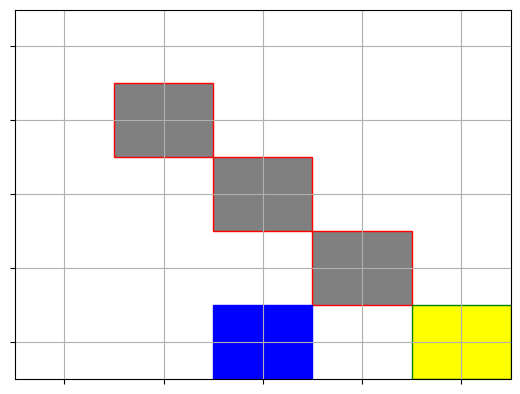

State: [3 4], Action: 1, Reward: -0.1, Done: False


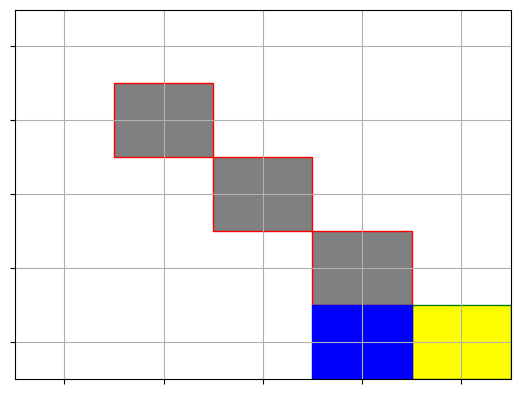

State: [2 4], Action: 3, Reward: -0.1, Done: False


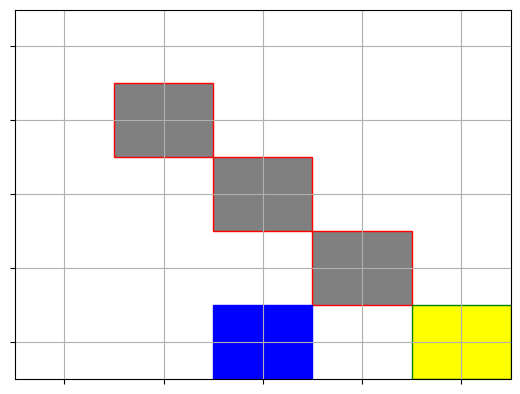

State: [2 3], Action: 2, Reward: -0.1, Done: False


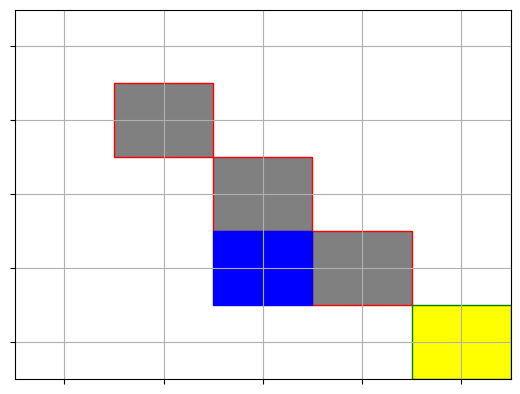

State: [2 4], Action: 0, Reward: -0.1, Done: False


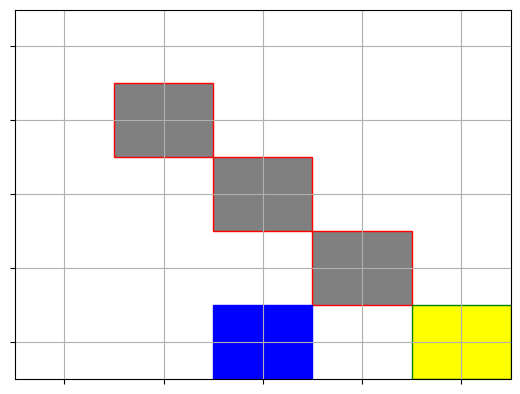

State: [3 4], Action: 1, Reward: -0.1, Done: False


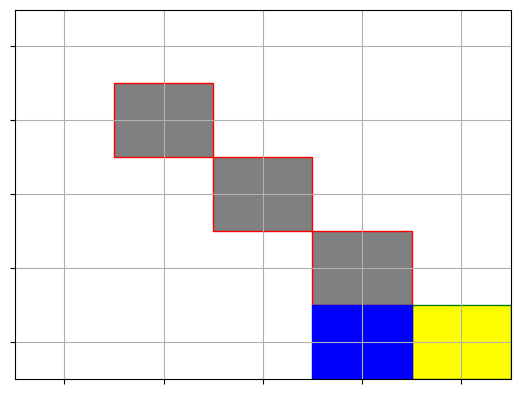

State: [2 4], Action: 3, Reward: -0.1, Done: False


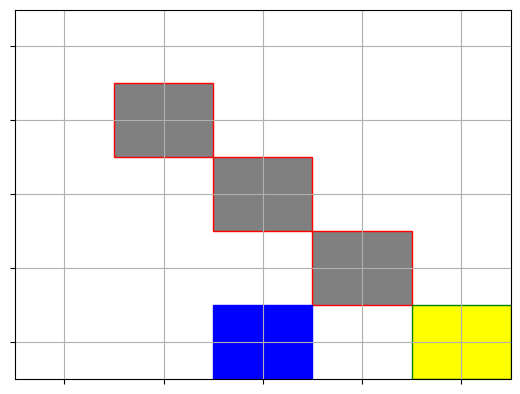

State: [2 3], Action: 2, Reward: -0.1, Done: False


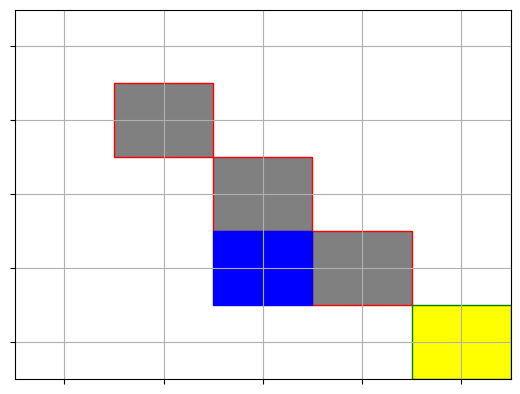

State: [2 4], Action: 0, Reward: -0.1, Done: False


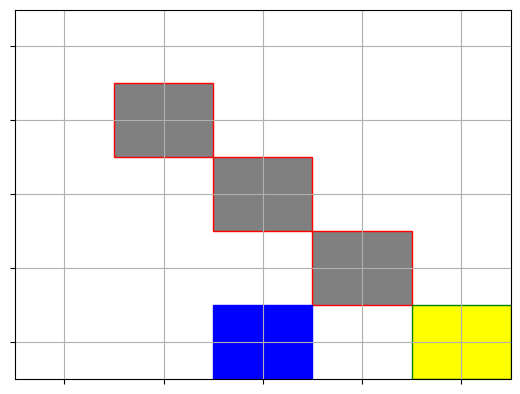

State: [2 4], Action: 0, Reward: -0.1, Done: False


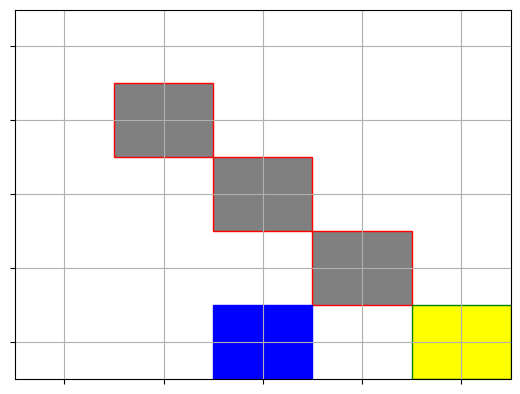

State: [1 4], Action: 3, Reward: -0.1, Done: False


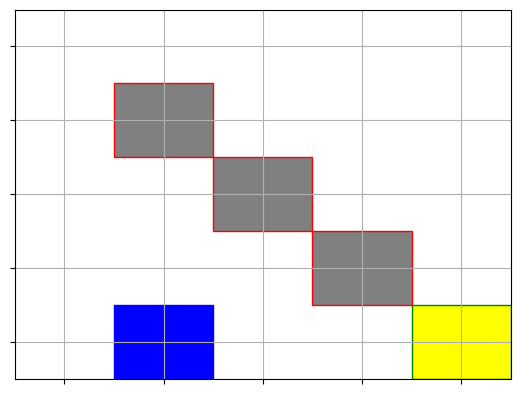

State: [1 3], Action: 2, Reward: -0.1, Done: False


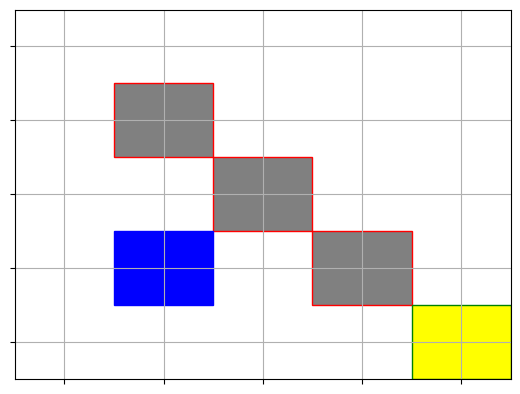

State: [2 3], Action: 1, Reward: -0.1, Done: False


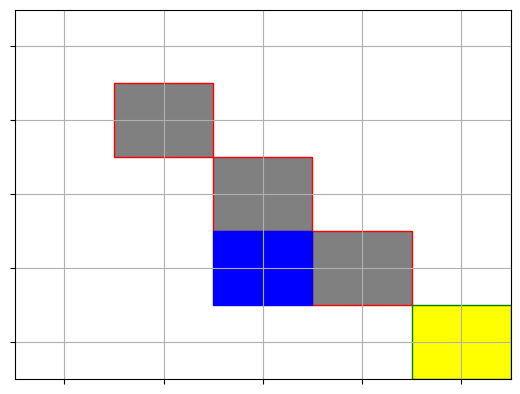

State: [2 3], Action: 2, Reward: -0.1, Done: False


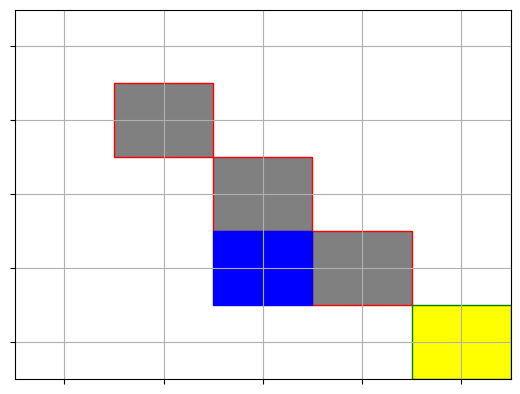

State: [2 4], Action: 0, Reward: -0.1, Done: False


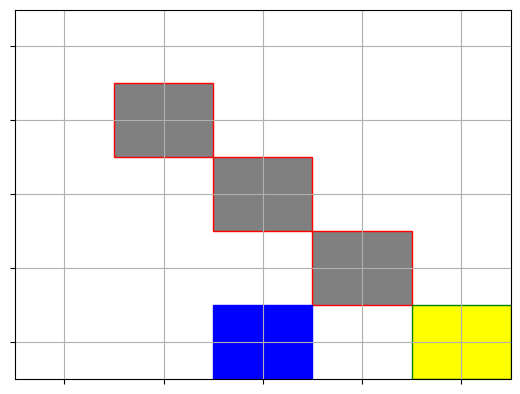

State: [2 4], Action: 0, Reward: -0.1, Done: False


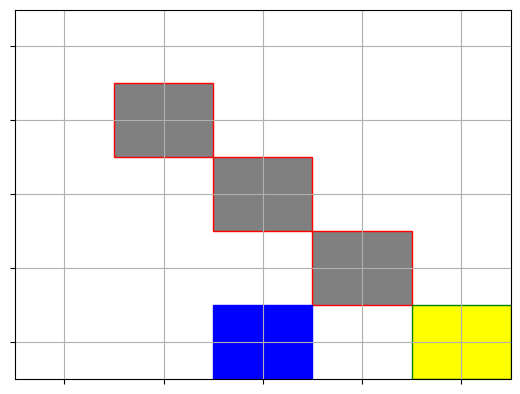

State: [2 3], Action: 2, Reward: -0.1, Done: False


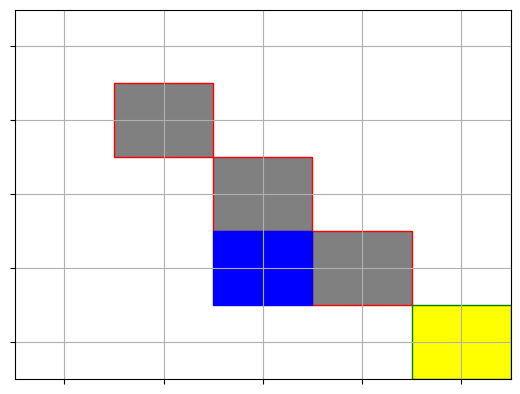

State: [2 3], Action: 2, Reward: -0.1, Done: False


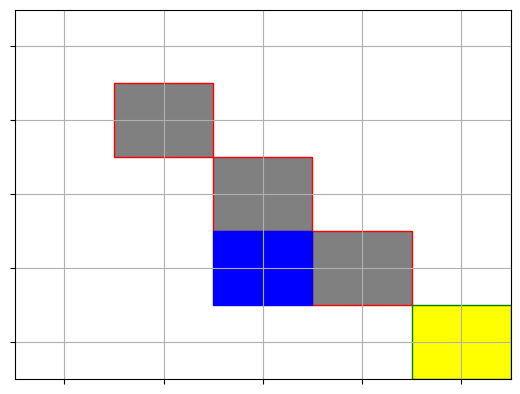

State: [2 4], Action: 0, Reward: -0.1, Done: False


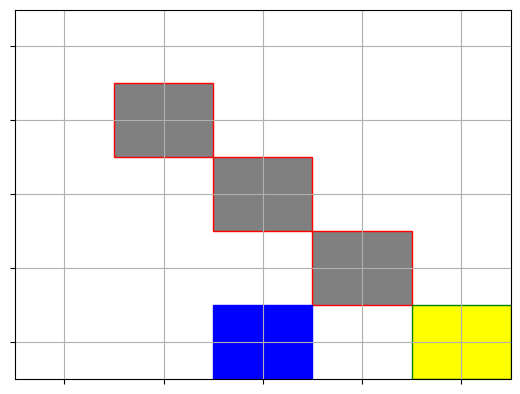

State: [1 4], Action: 3, Reward: -0.1, Done: False


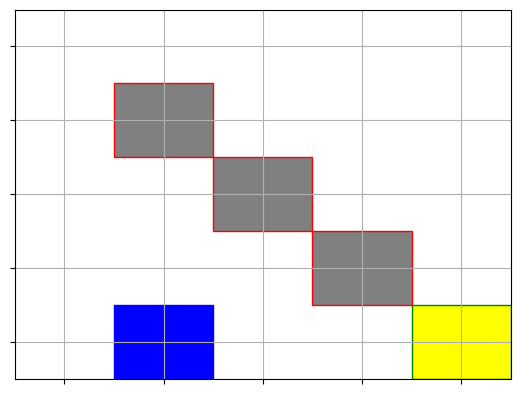

State: [2 4], Action: 1, Reward: -0.1, Done: False


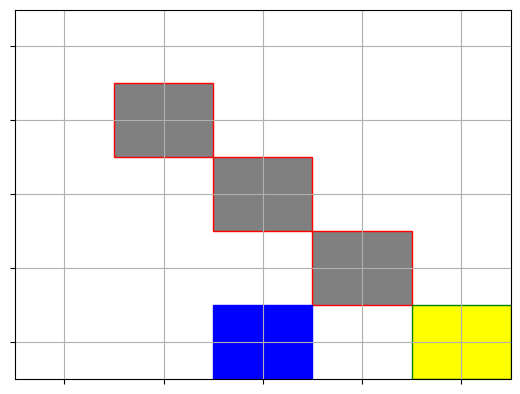

State: [2 3], Action: 2, Reward: -0.1, Done: False


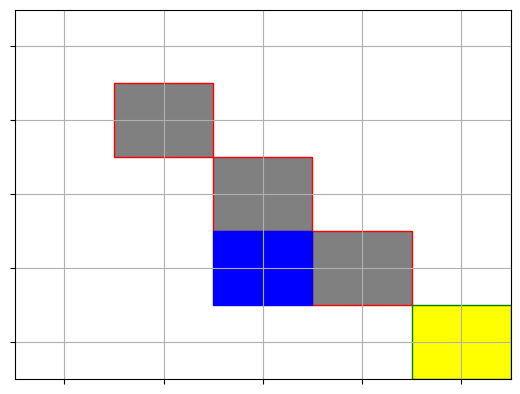

State: [2 3], Action: 1, Reward: -0.1, Done: False


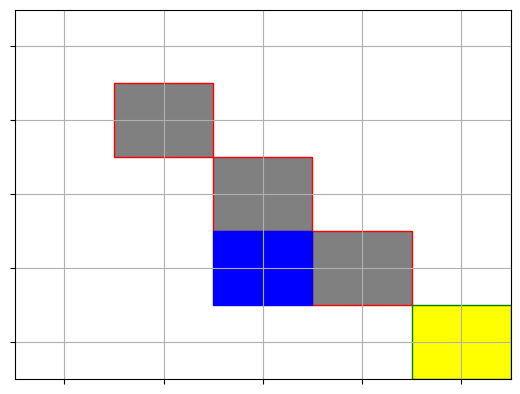

State: [2 4], Action: 0, Reward: -0.1, Done: False


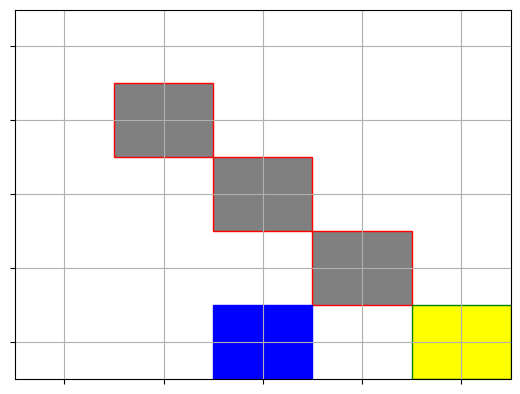

State: [2 4], Action: 0, Reward: -0.1, Done: False


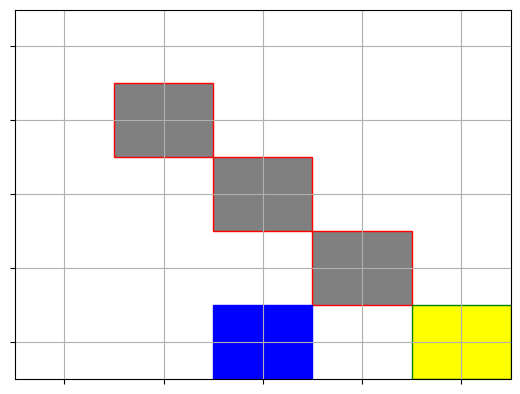

State: [2 4], Action: 0, Reward: -0.1, Done: False


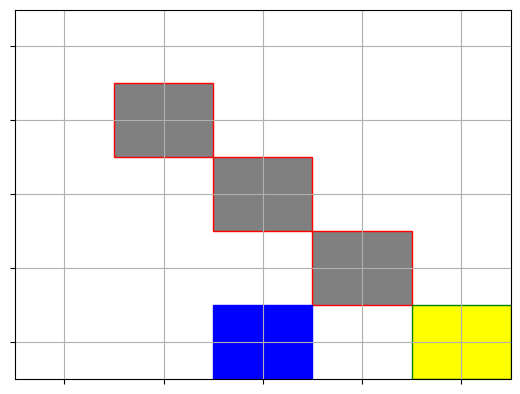

State: [1 4], Action: 3, Reward: -0.1, Done: False


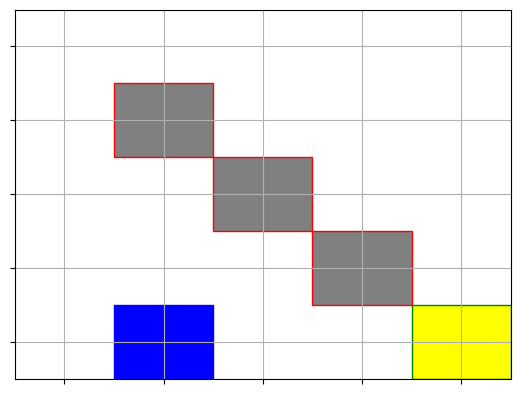

State: [0 4], Action: 3, Reward: -0.1, Done: False


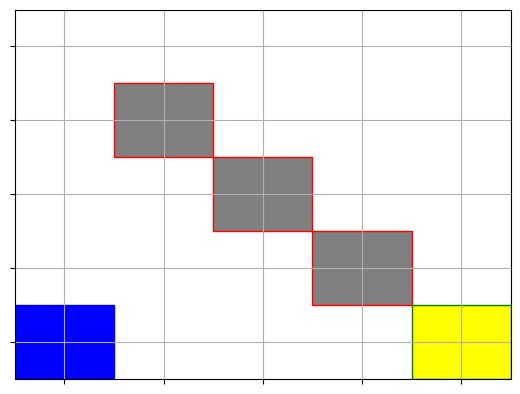

State: [0 3], Action: 2, Reward: -0.1, Done: False


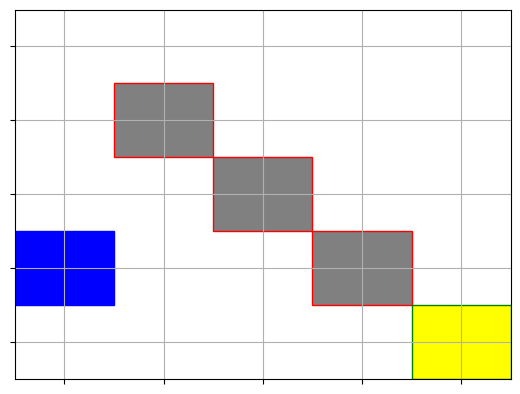

State: [1 3], Action: 1, Reward: -0.1, Done: False


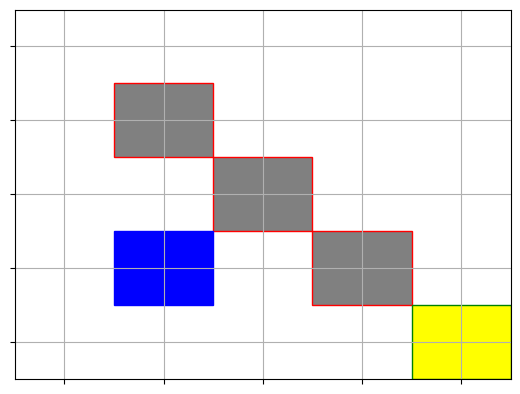

State: [1 4], Action: 0, Reward: -0.1, Done: False


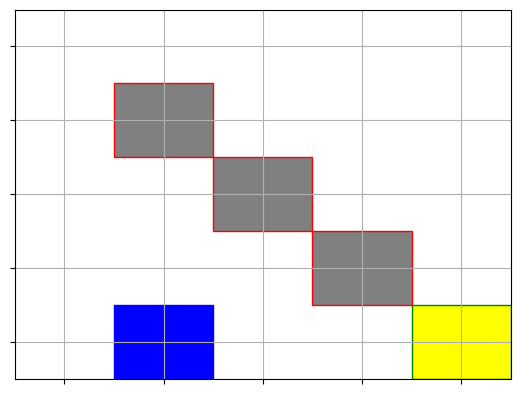

State: [0 4], Action: 3, Reward: -0.1, Done: False


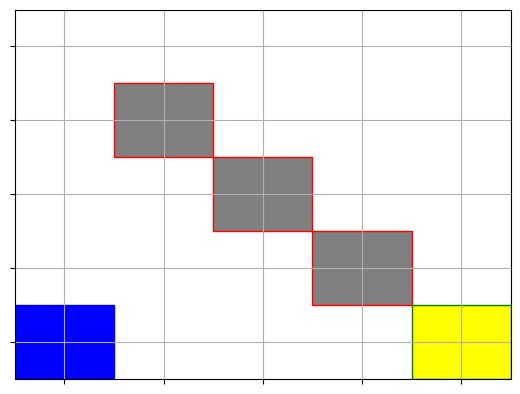

State: [0 3], Action: 2, Reward: -0.1, Done: False


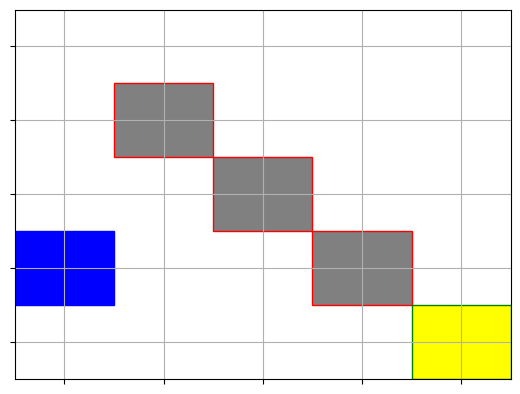

State: [1 3], Action: 1, Reward: -0.1, Done: False


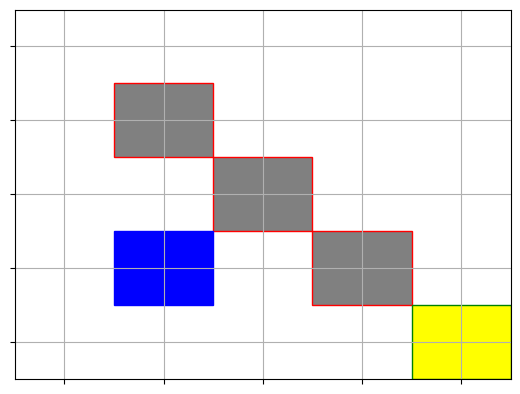

State: [1 2], Action: 2, Reward: -0.1, Done: False


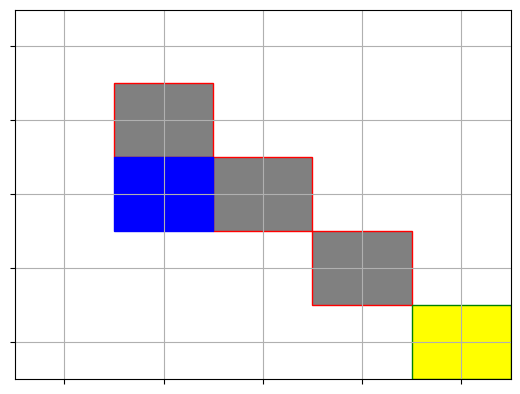

State: [1 2], Action: 1, Reward: -0.1, Done: False


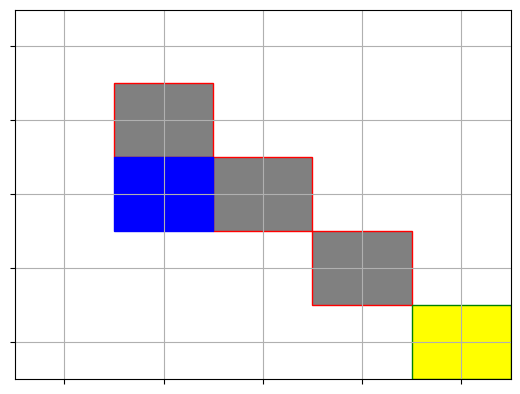

State: [1 2], Action: 1, Reward: -0.1, Done: False


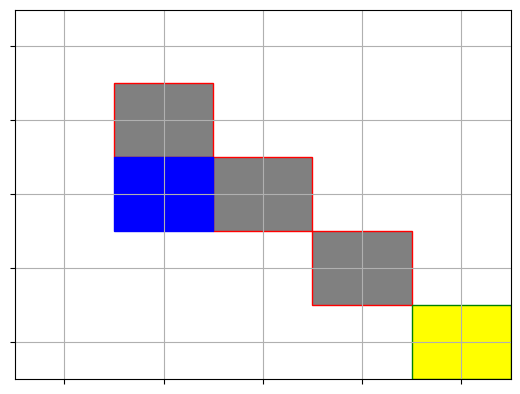

State: [1 2], Action: 1, Reward: -0.1, Done: False


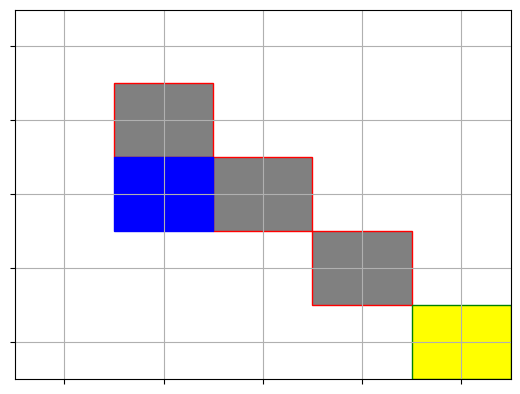

State: [1 2], Action: 2, Reward: -0.1, Done: False


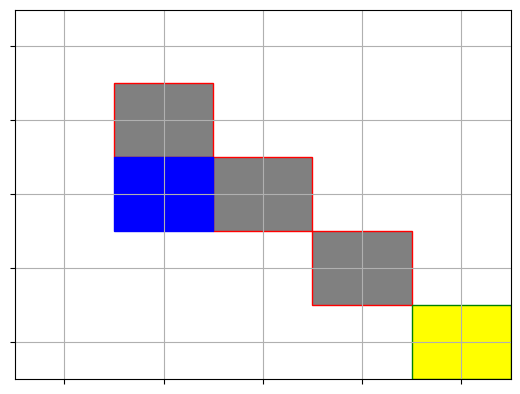

State: [1 3], Action: 0, Reward: -0.1, Done: False


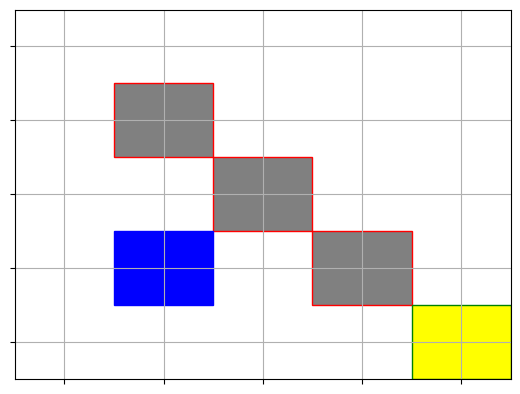

State: [1 4], Action: 0, Reward: -0.1, Done: False


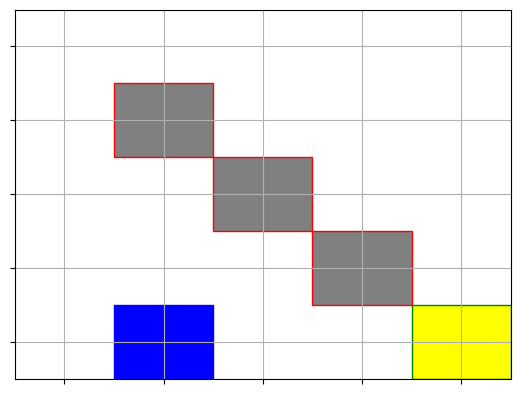

State: [1 3], Action: 2, Reward: -0.1, Done: False


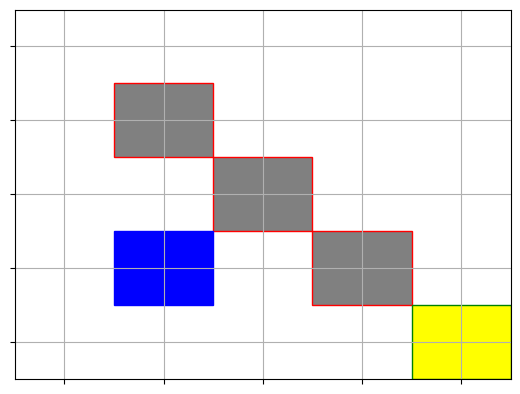

State: [0 3], Action: 3, Reward: -0.1, Done: False


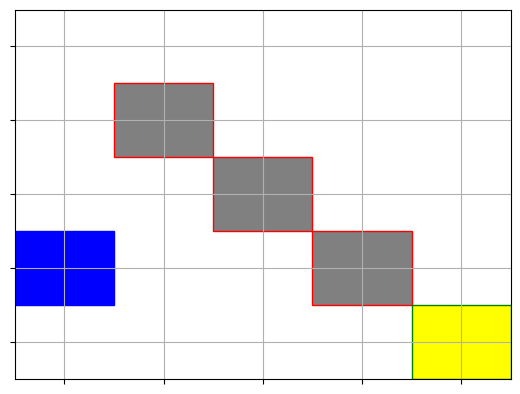

State: [0 3], Action: 3, Reward: -0.1, Done: False


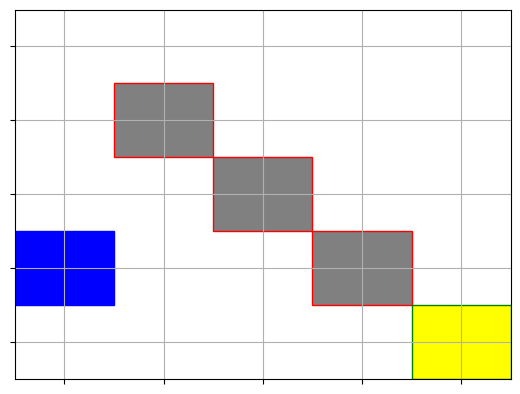

State: [1 3], Action: 1, Reward: -0.1, Done: False


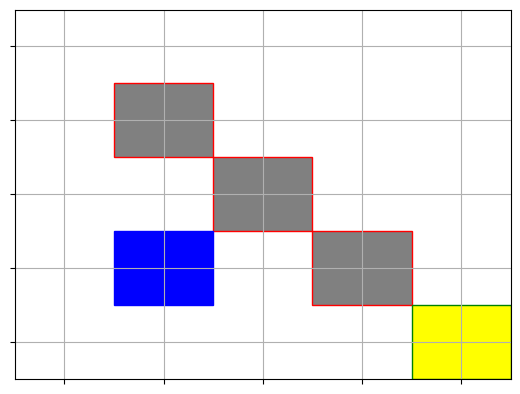

State: [0 3], Action: 3, Reward: -0.1, Done: False


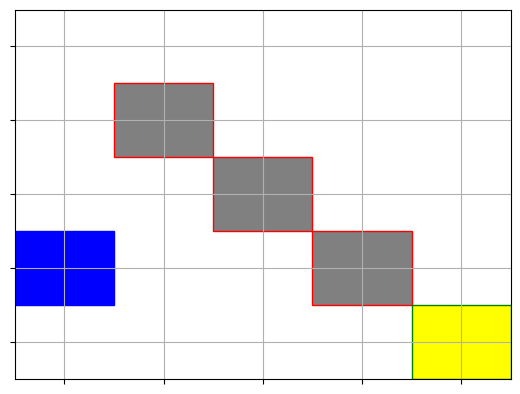

State: [0 2], Action: 2, Reward: -0.1, Done: False


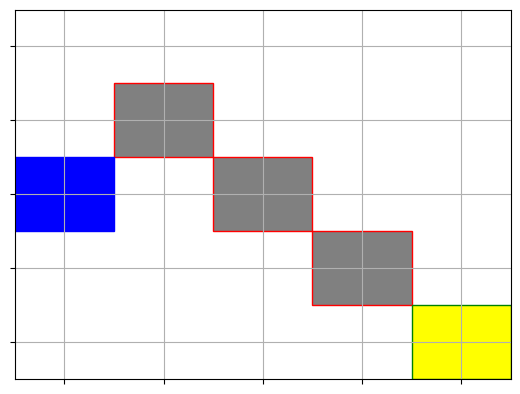

State: [0 1], Action: 2, Reward: -0.1, Done: False


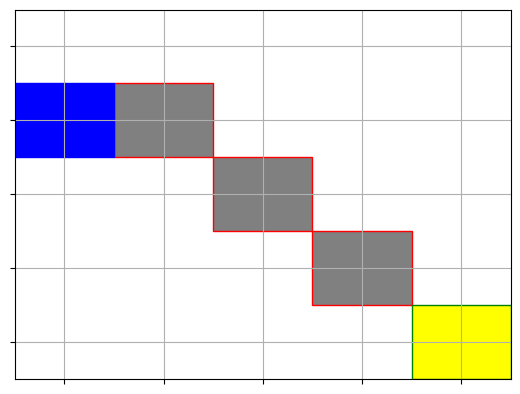

State: [0 1], Action: 1, Reward: -0.1, Done: False


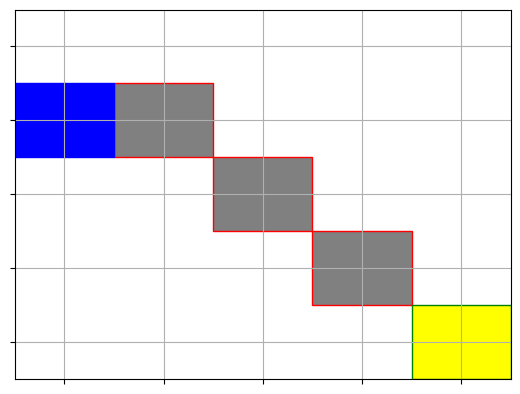

State: [0 0], Action: 2, Reward: -0.1, Done: False


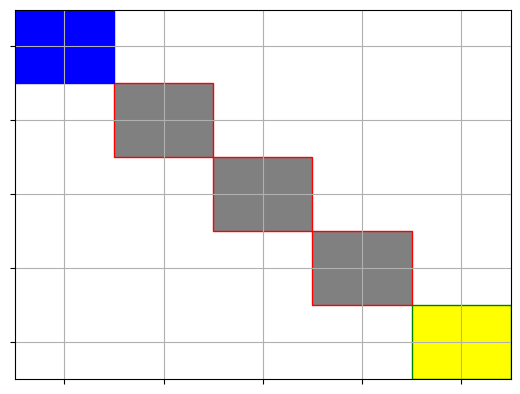

State: [0 0], Action: 3, Reward: -0.1, Done: False


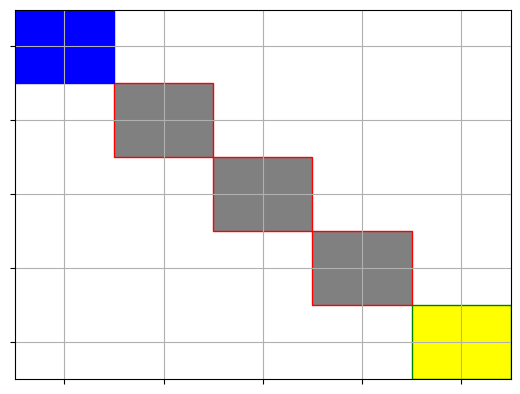

State: [0 0], Action: 2, Reward: -0.1, Done: False


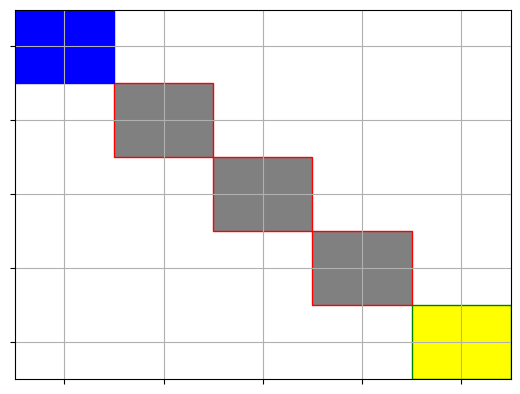

State: [0 0], Action: 2, Reward: -0.1, Done: False


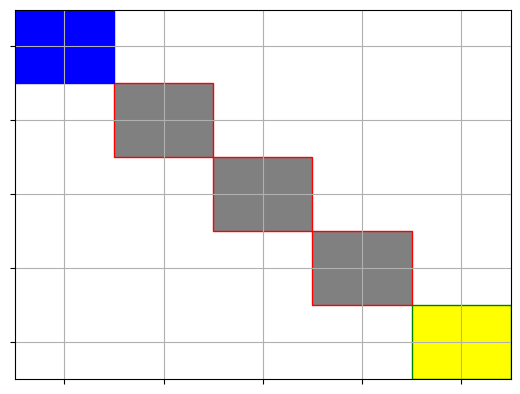

State: [0 0], Action: 2, Reward: -0.1, Done: False


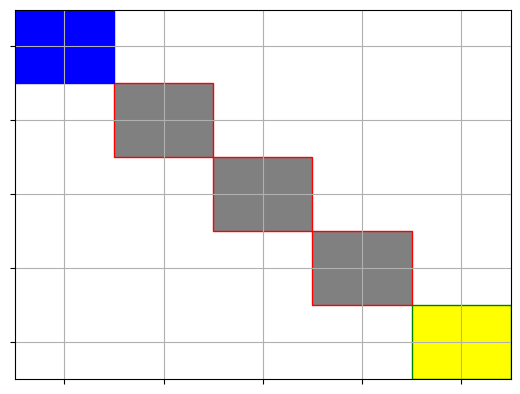

State: [0 0], Action: 2, Reward: -0.1, Done: False


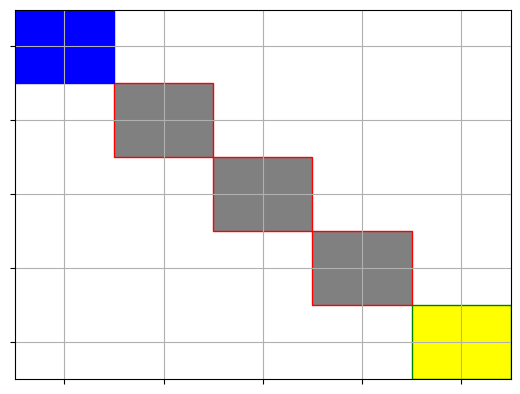

State: [0 0], Action: 3, Reward: -0.1, Done: False


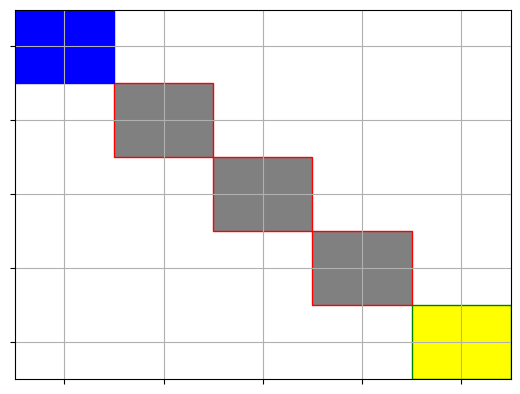

State: [1 0], Action: 1, Reward: -0.1, Done: False


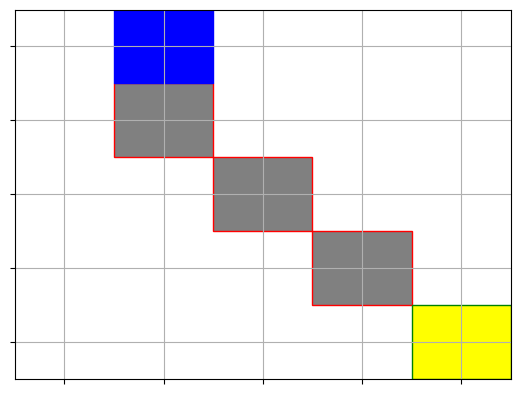

State: [2 0], Action: 1, Reward: -0.1, Done: False


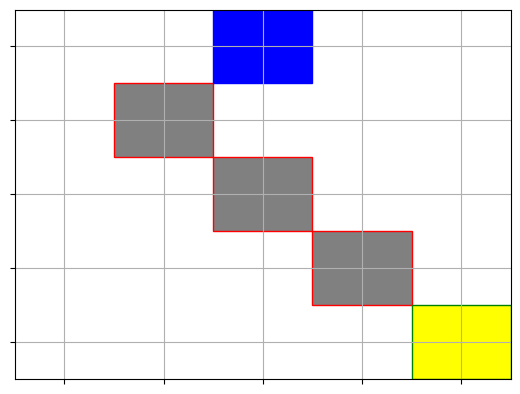

State: [3 0], Action: 1, Reward: -0.1, Done: False


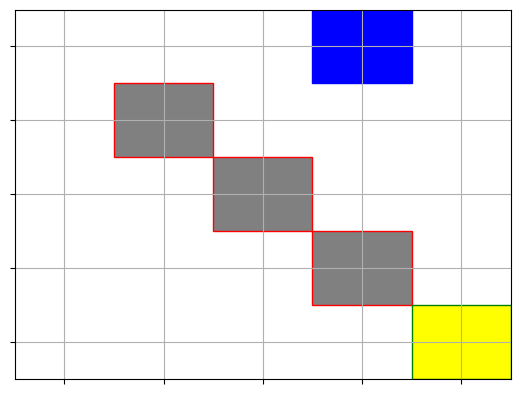

State: [3 1], Action: 0, Reward: -0.1, Done: False


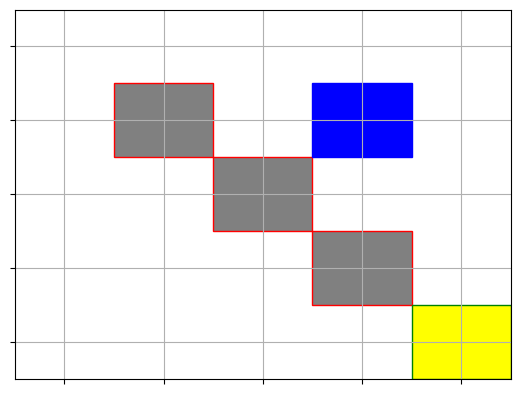

State: [2 1], Action: 3, Reward: -0.1, Done: False


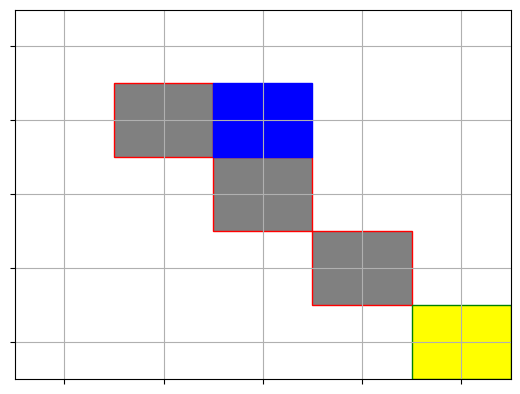

State: [2 1], Action: 3, Reward: -0.1, Done: False


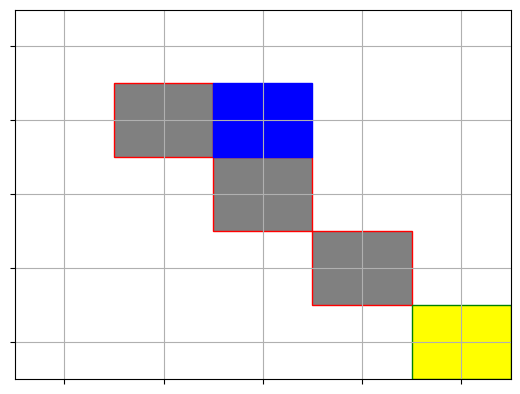

State: [2 0], Action: 2, Reward: -0.1, Done: False


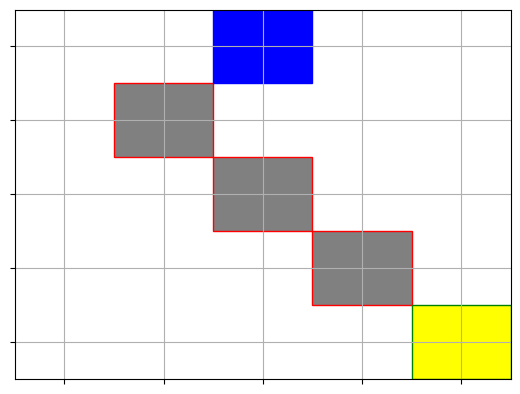

State: [3 0], Action: 1, Reward: -0.1, Done: False


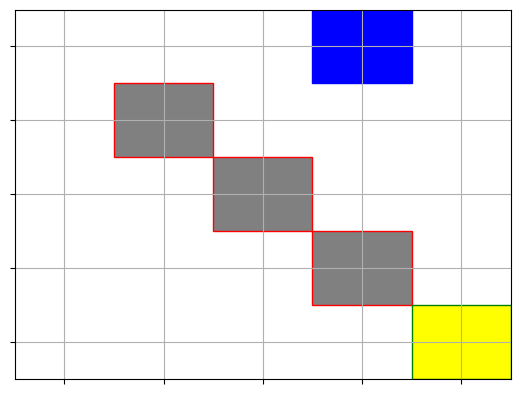

State: [3 1], Action: 0, Reward: -0.1, Done: False


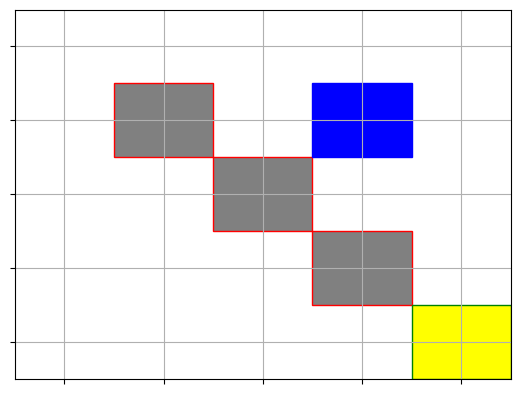

State: [2 1], Action: 3, Reward: -0.1, Done: False


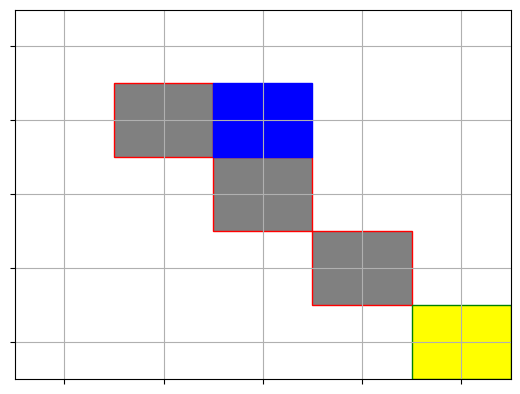

State: [2 1], Action: 3, Reward: -0.1, Done: False


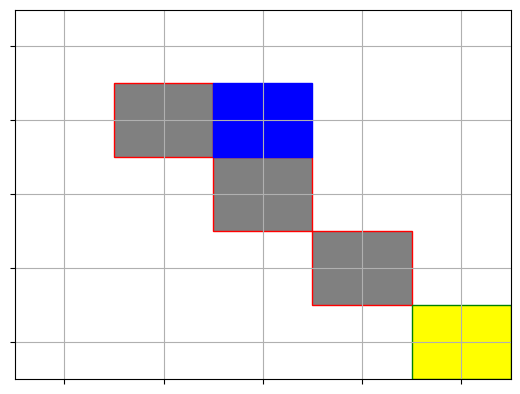

State: [2 0], Action: 2, Reward: -0.1, Done: False


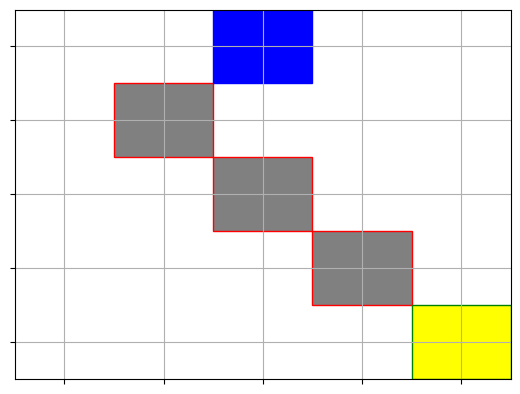

State: [2 0], Action: 2, Reward: -0.1, Done: False


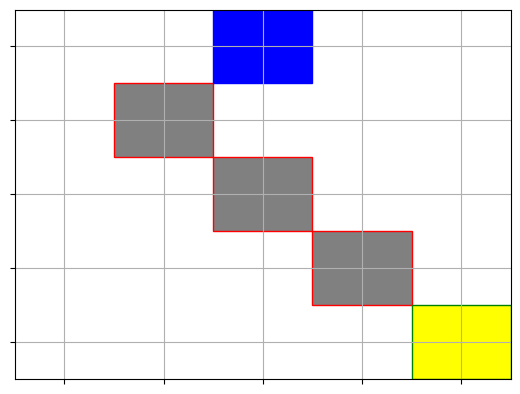

State: [2 0], Action: 2, Reward: -0.1, Done: False


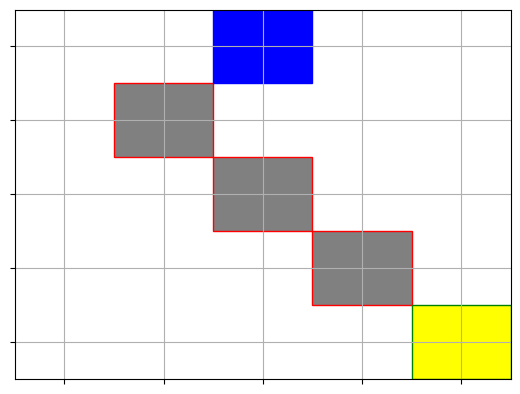

State: [2 0], Action: 2, Reward: -0.1, Done: False


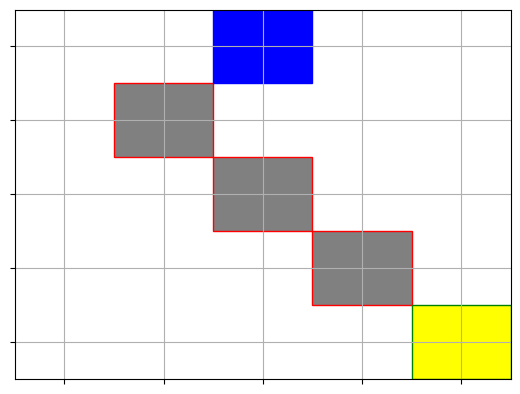

State: [2 0], Action: 2, Reward: -0.1, Done: False


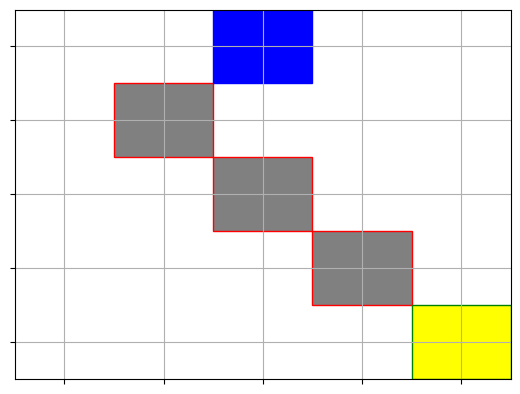

State: [1 0], Action: 3, Reward: -0.1, Done: False


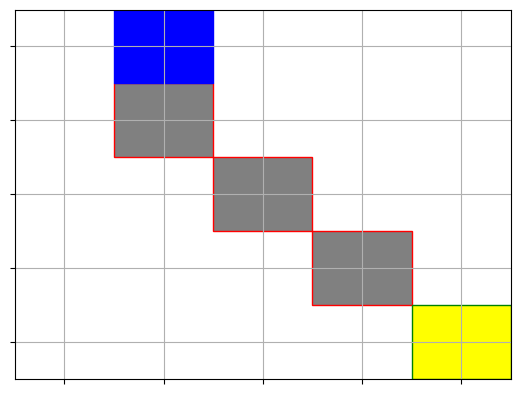

State: [1 0], Action: 2, Reward: -0.1, Done: False


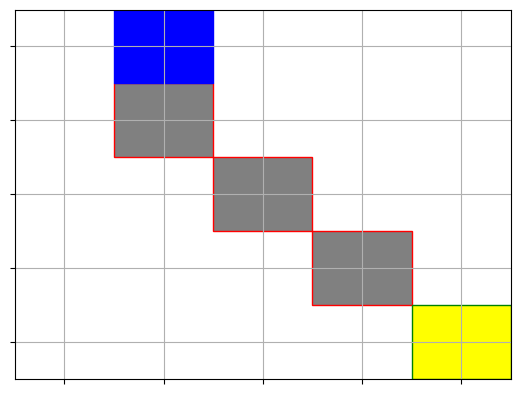

State: [0 0], Action: 3, Reward: -0.1, Done: False


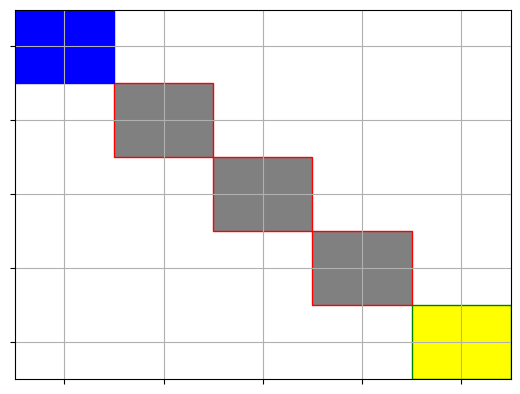

State: [0 0], Action: 2, Reward: -0.1, Done: False


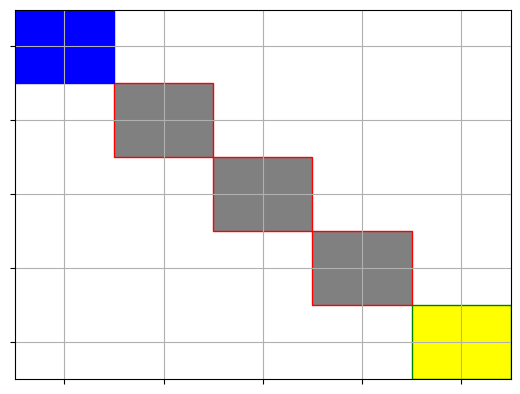

State: [0 0], Action: 3, Reward: -0.1, Done: False


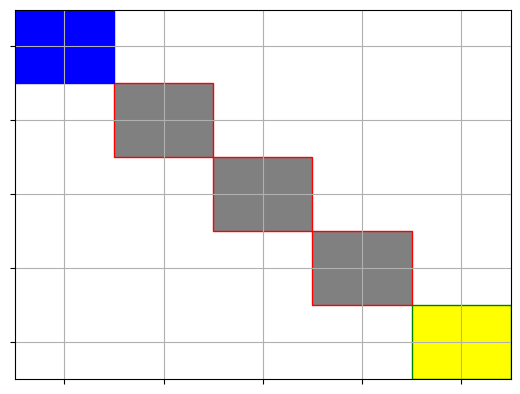

State: [0 0], Action: 3, Reward: -0.1, Done: False


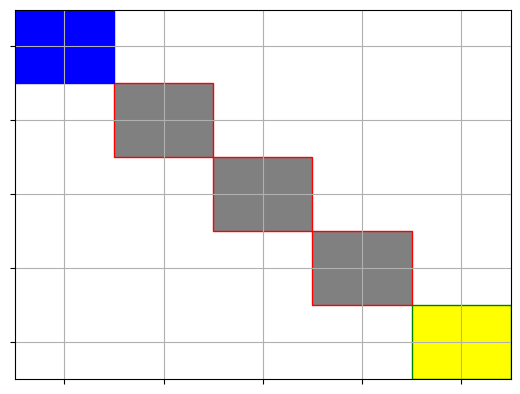

State: [0 0], Action: 3, Reward: -0.1, Done: False


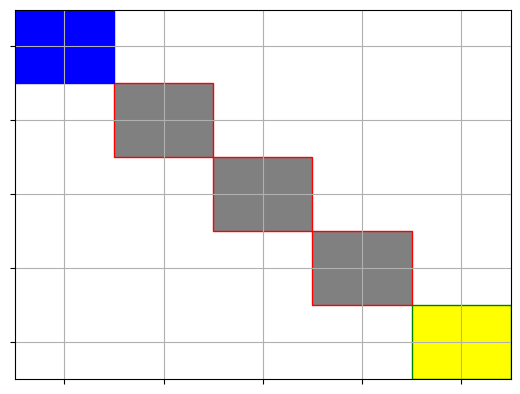

State: [1 0], Action: 1, Reward: -0.1, Done: False


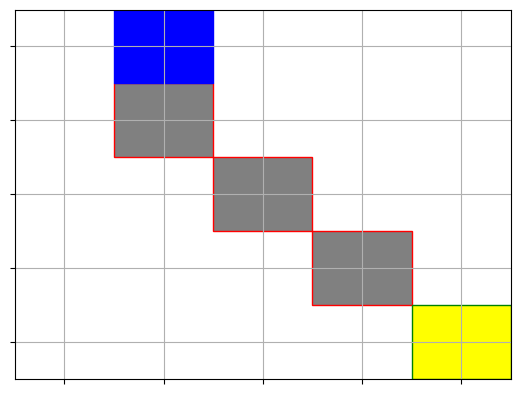

State: [1 0], Action: 0, Reward: -0.1, Done: False


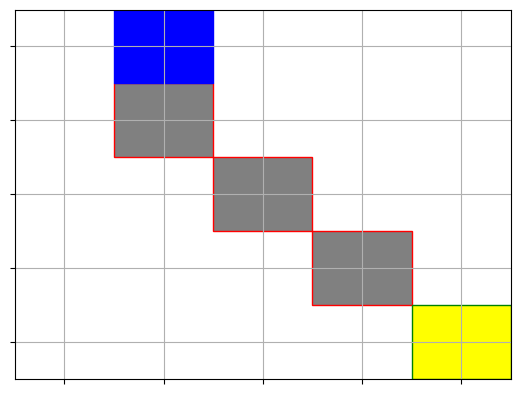

State: [1 0], Action: 0, Reward: -0.1, Done: False


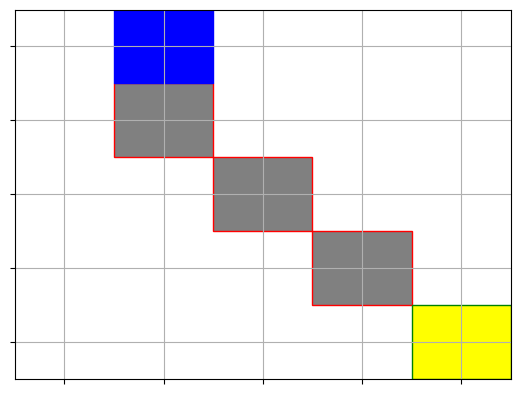

State: [2 0], Action: 1, Reward: -0.1, Done: False


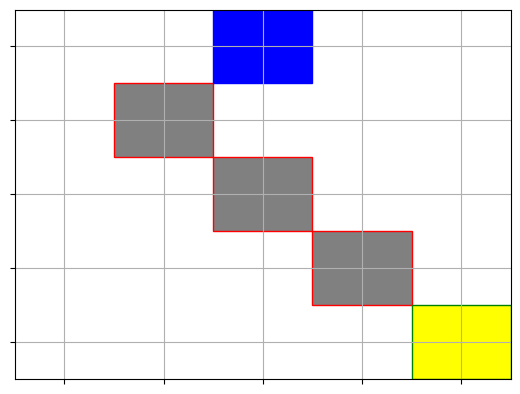

State: [2 1], Action: 0, Reward: -0.1, Done: False


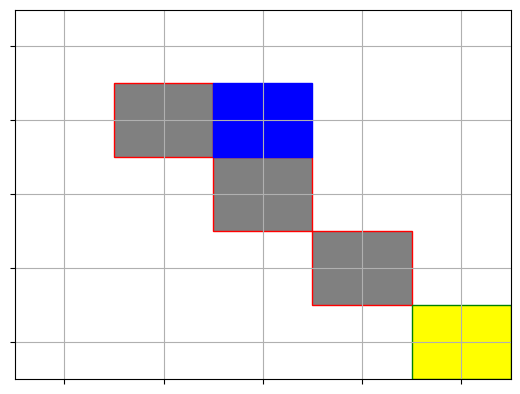

State: [2 1], Action: 0, Reward: -0.1, Done: False


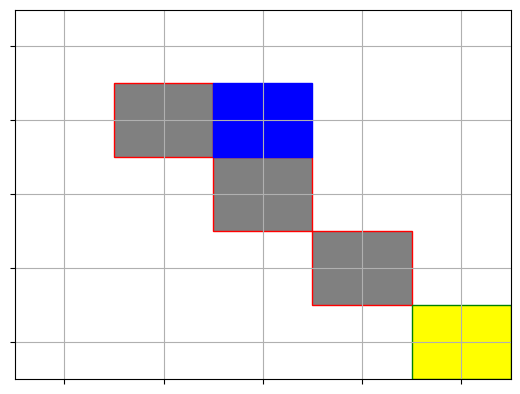

State: [3 1], Action: 1, Reward: -0.1, Done: False


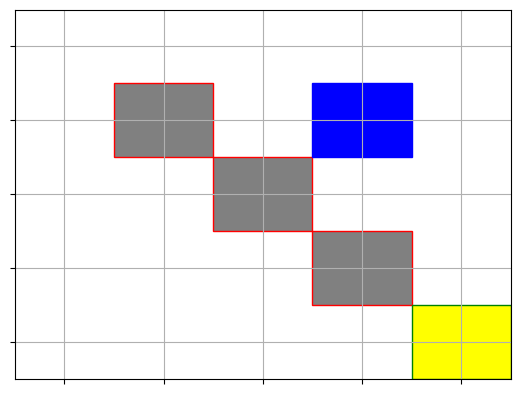

State: [4 1], Action: 1, Reward: -0.1, Done: False


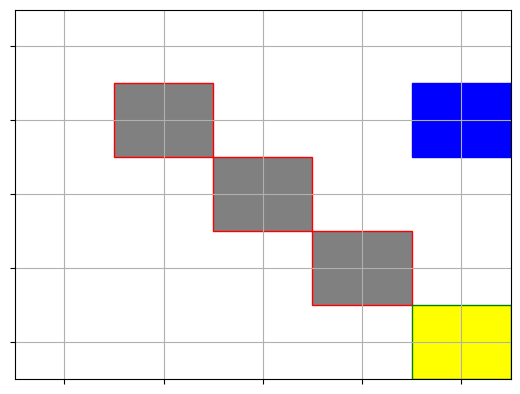

State: [4 2], Action: 0, Reward: -0.1, Done: False


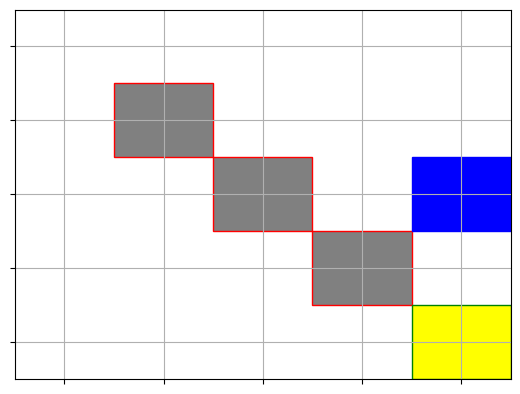

State: [4 3], Action: 0, Reward: -0.1, Done: False


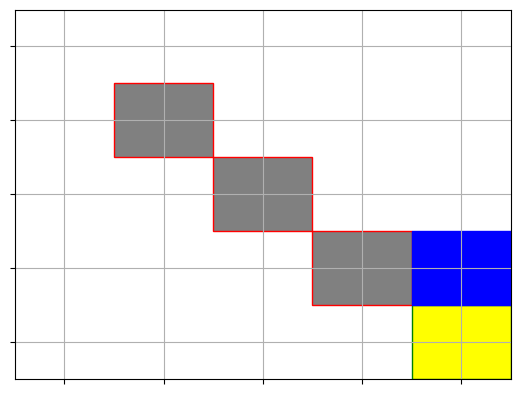

State: [4 2], Action: 2, Reward: -0.1, Done: False


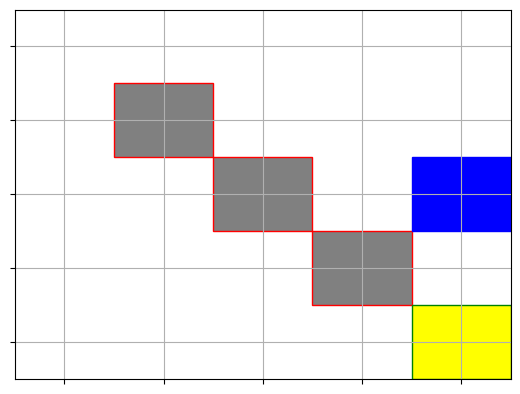

State: [4 2], Action: 1, Reward: -0.1, Done: False


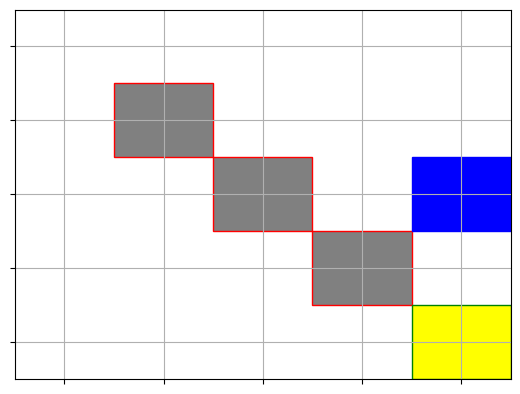

State: [4 2], Action: 1, Reward: -0.1, Done: False


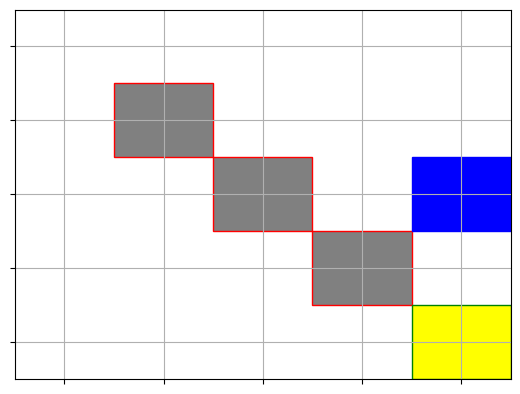

State: [4 3], Action: 0, Reward: -0.1, Done: False


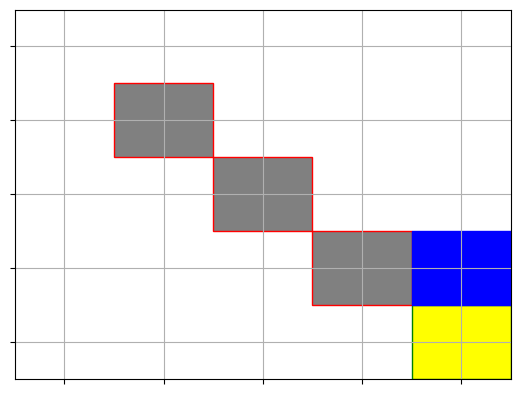

State: [4 3], Action: 1, Reward: -0.1, Done: False


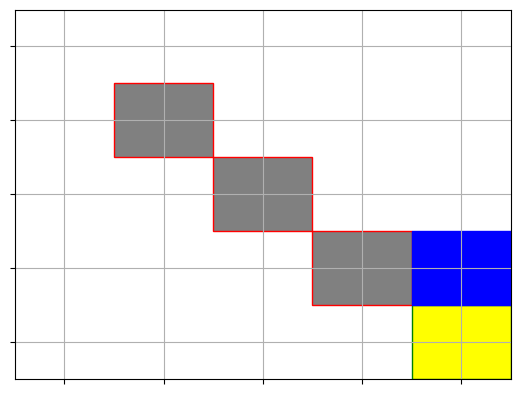

State: [4 3], Action: 3, Reward: -0.1, Done: False


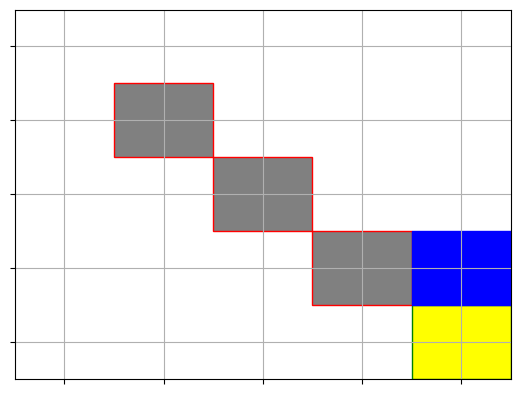

State: [4 4], Action: 0, Reward: 1, Done: True


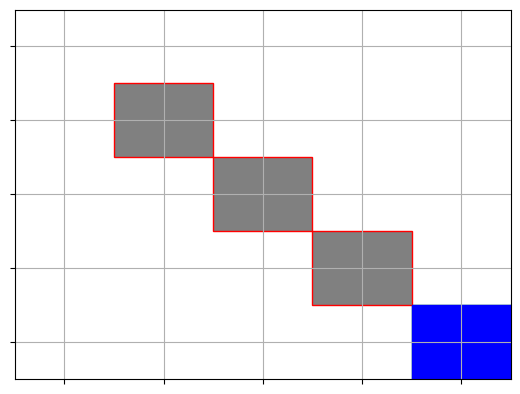

State: [0 1], Action: 0, Reward: -0.1, Done: False


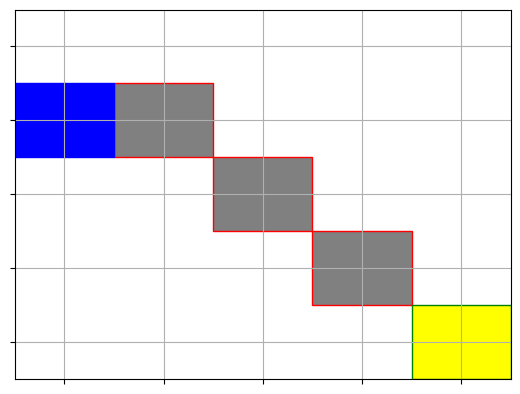

State: [0 1], Action: 1, Reward: -0.1, Done: False


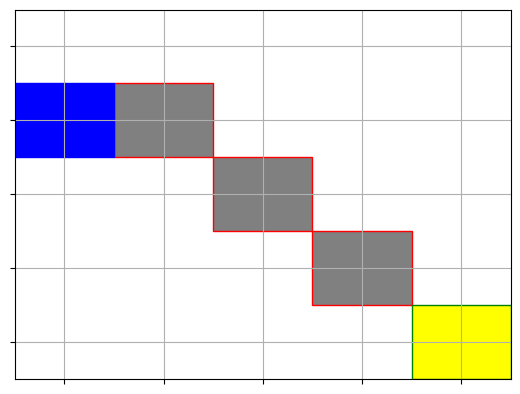

State: [0 0], Action: 2, Reward: -0.1, Done: False


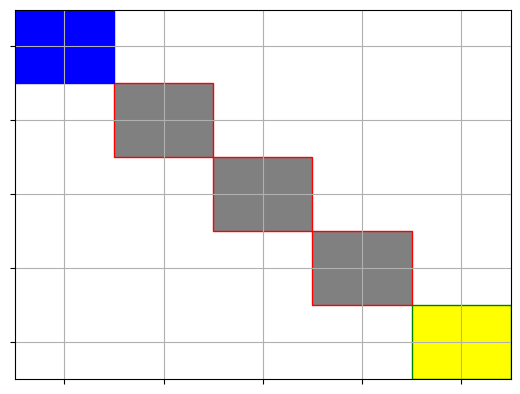

State: [0 1], Action: 0, Reward: -0.1, Done: False


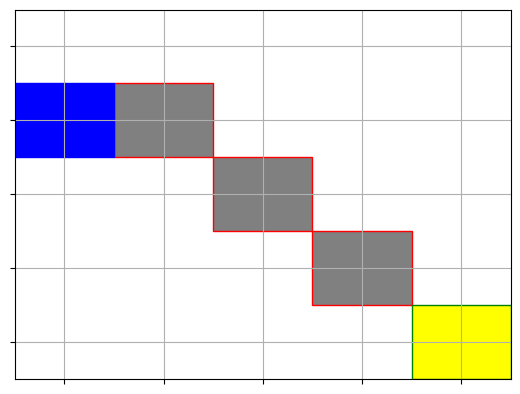

State: [0 1], Action: 3, Reward: -0.1, Done: False


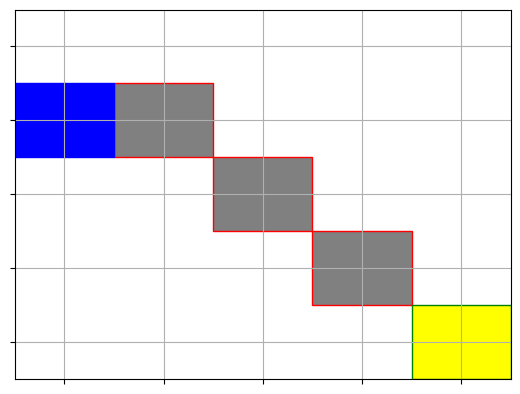

State: [0 1], Action: 3, Reward: -0.1, Done: False


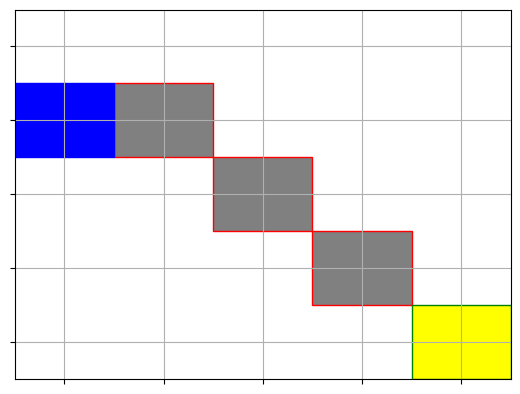

State: [0 1], Action: 1, Reward: -0.1, Done: False


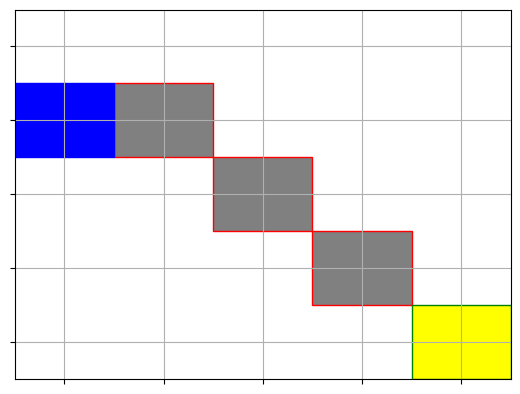

State: [0 1], Action: 3, Reward: -0.1, Done: False


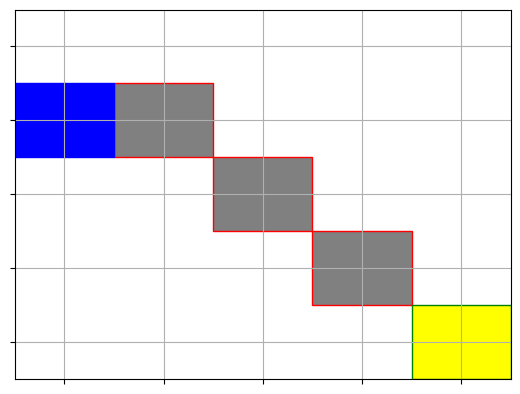

State: [0 2], Action: 0, Reward: -0.1, Done: False


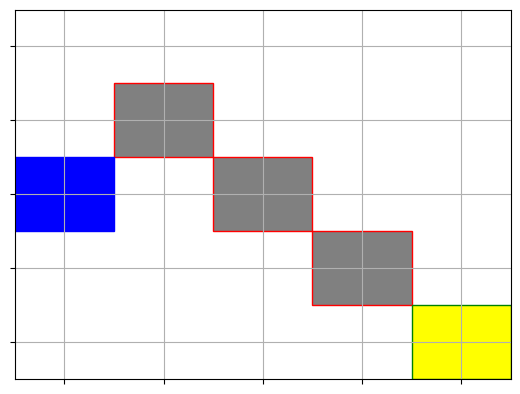

State: [1 2], Action: 1, Reward: -0.1, Done: False


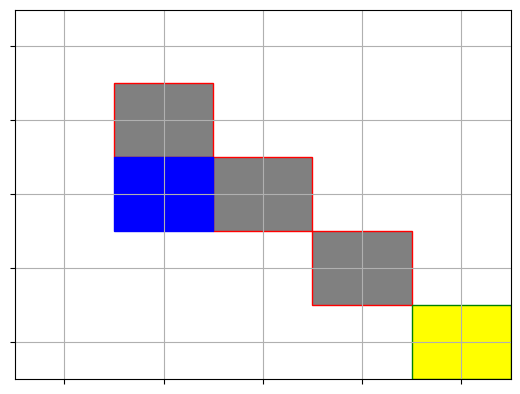

State: [1 2], Action: 1, Reward: -0.1, Done: False


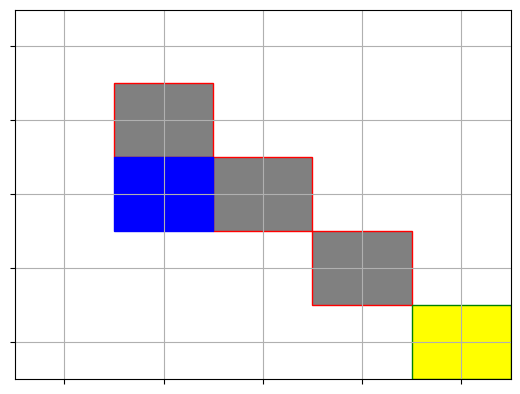

State: [1 2], Action: 2, Reward: -0.1, Done: False


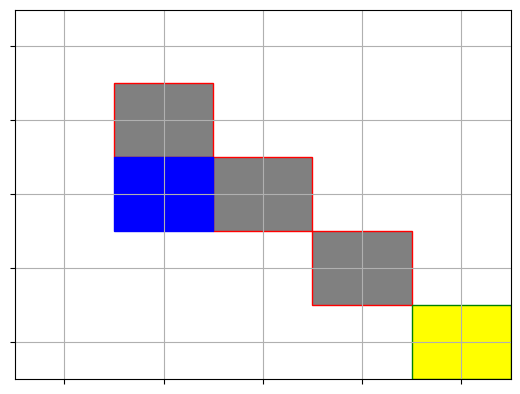

State: [1 2], Action: 2, Reward: -0.1, Done: False


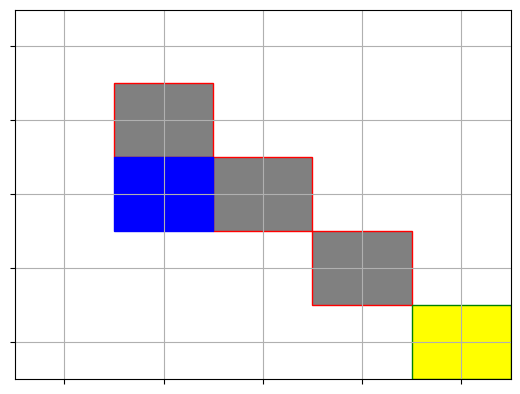

State: [1 2], Action: 1, Reward: -0.1, Done: False


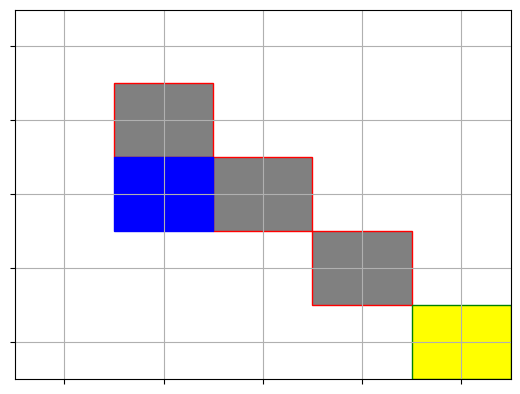

State: [1 2], Action: 1, Reward: -0.1, Done: False


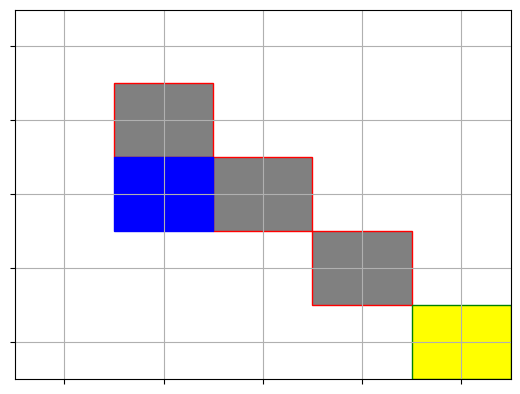

State: [0 2], Action: 3, Reward: -0.1, Done: False


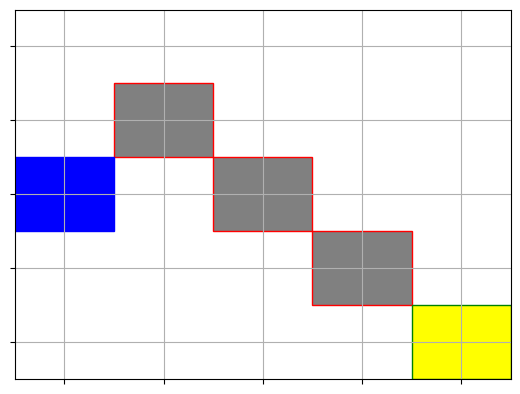

State: [0 3], Action: 0, Reward: -0.1, Done: False


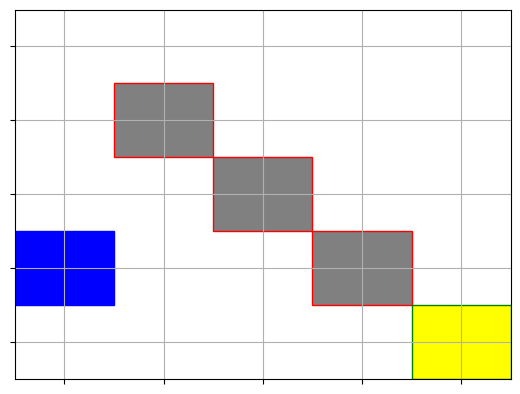

State: [0 4], Action: 0, Reward: -0.1, Done: False


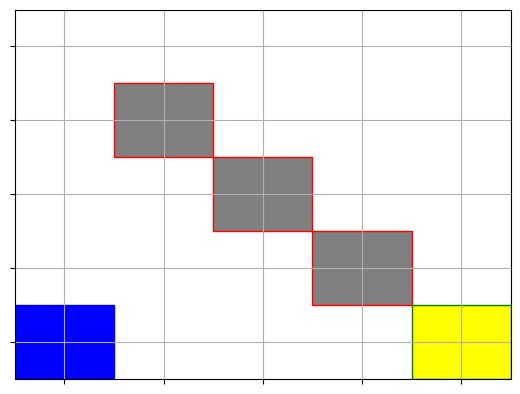

State: [1 4], Action: 1, Reward: -0.1, Done: False


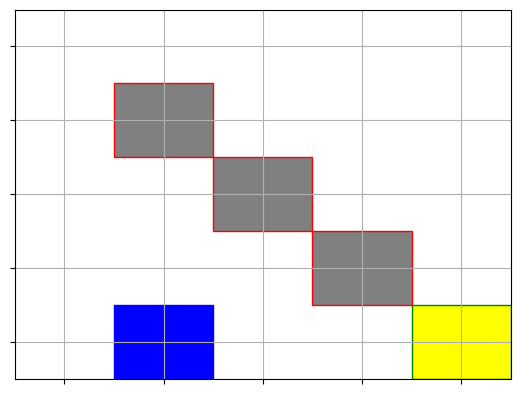

State: [1 3], Action: 2, Reward: -0.1, Done: False


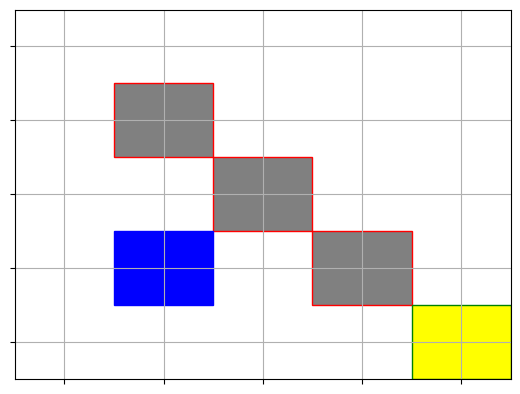

State: [1 4], Action: 0, Reward: -0.1, Done: False


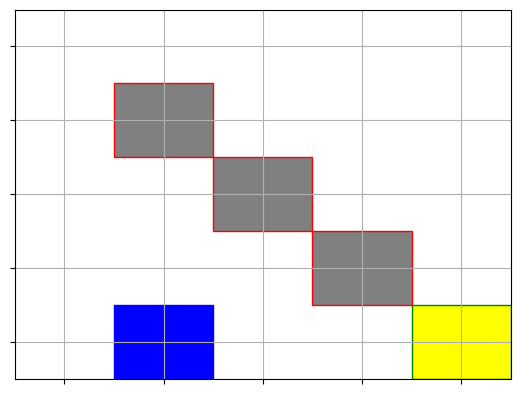

State: [2 4], Action: 1, Reward: -0.1, Done: False


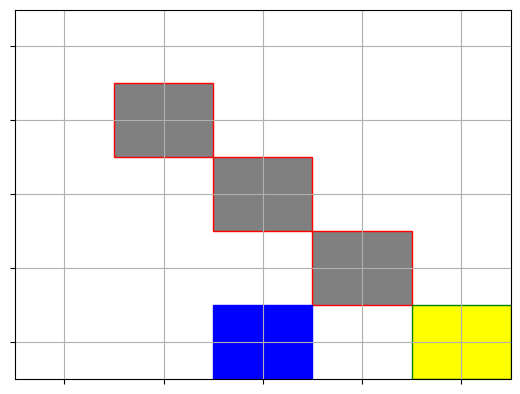

State: [2 4], Action: 0, Reward: -0.1, Done: False


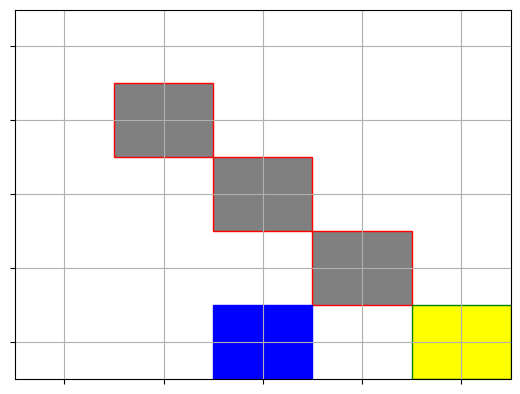

State: [1 4], Action: 3, Reward: -0.1, Done: False


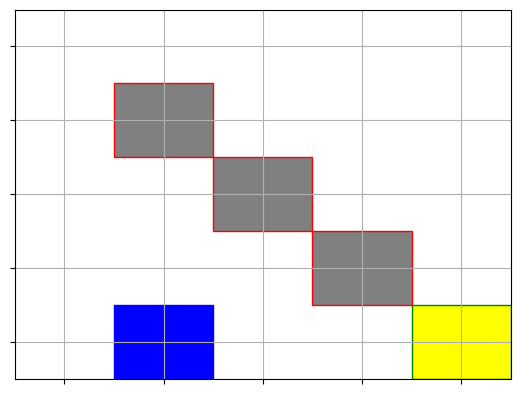

State: [2 4], Action: 1, Reward: -0.1, Done: False


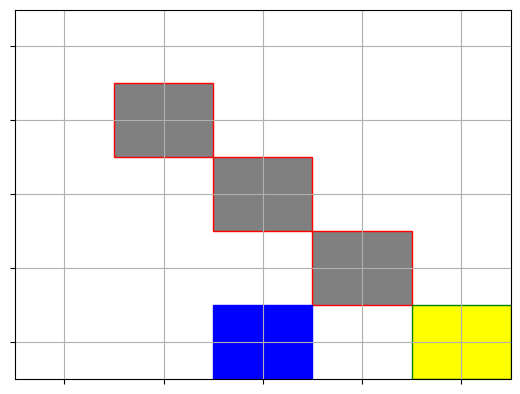

State: [3 4], Action: 1, Reward: -0.1, Done: False


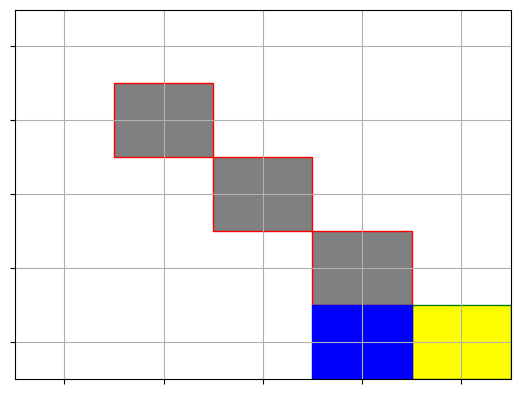

State: [3 4], Action: 2, Reward: -0.1, Done: False


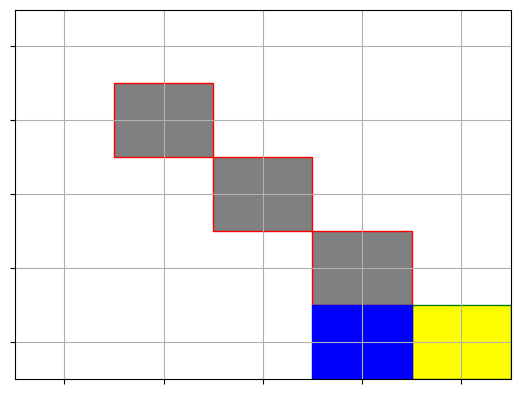

State: [4 4], Action: 1, Reward: 1, Done: True


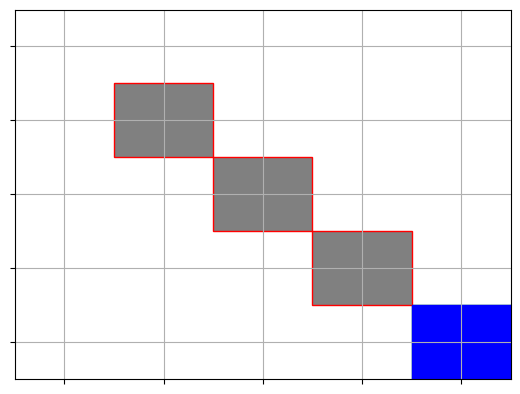

In [9]:
def test_random_agent(episodes=5):
    for episode in range(episodes):
        state = env.reset()
        done = False
        while not done:
            action = env.action_space.sample()  # Take random action
            state, reward, done, _ = env.step(action)
            print(f"State: {state}, Action: {action}, Reward: {reward}, Done: {done}")
            env.render()

test_random_agent(episodes=5)

# I tried  my best to make this code a good representation of the maze runner game, but my abilties in coding fully-fledged games is limited and right now , it is the maximum i can do

### Name-Chirag Sindhwani
### Dept. of EEE
### Roll no. - 23085130